In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
from shapely.geometry import Polygon
from shapely.geometry import box
from shapely.geometry import Point
import random
import shapely

In [3]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is B4E0-BFE8

 Directory of C:\Users\zenus\Downloads\Resilio_box_desktop

03/15/2024  05:01 AM    <DIR>          .
03/01/2024  02:46 PM    <DIR>          ..
07/18/2023  11:37 AM    <DIR>          .ipynb_checkpoints
03/22/2023  04:26 PM           310,268 Ambulance_stuff.ipynb
03/15/2024  05:03 AM    <DIR>          cleanup_folder
11/19/2023  12:21 PM           897,047 Dijkstra_surfaceadjusted.ipynb
03/15/2024  10:49 AM    <DIR>          Dissertation
01/17/2024  05:55 AM    <DIR>          Dolpo
01/11/2024  08:48 PM     1,277,330,317 Dolpo.zip
10/20/2023  03:17 PM        13,890,064 FINAL_dijk.ipynb
01/11/2024  07:06 PM    <DIR>          instate_stuff
02/15/2023  07:46 PM            11,485 metrics analysis three distances.xlsx
03/22/2023  04:26 PM         2,509,649 MY_diss.ipynb
03/15/2024  05:01 AM         3,416,521 port_simulation.ipynb
03/15/2024  05:03 AM    <DIR>          Proposal
02/08/2024  05:02 PM    <DIR>          resume cover

In [4]:
from mcerp import correlate, correlation_matrix, plotcorr
from mcerp import Beta, Uniform, PERT, Binomial
from mcerp import uv, stats

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import rasterio

In [31]:
from scipy import stats as stats
from scipy.stats import rv_continuous, rv_histogram

In [8]:
%cd C:\Users\zenus\Downloads\Resilio_box_desktop\Proposal\PADUS_2_0

C:\Users\zenus\Downloads\Resilio_box_desktop\Proposal\PADUS_2_0


In [3107]:
d3m = rasterio.open('fcl_std_elev') 

In [354]:
divis = 'final_divis_2_0.shp'
divis = gpd.read_file(divis)
divis = gpd.GeoDataFrame(divis,geometry=divis['geometry'])

In [545]:
divis['acres']=divis['geometry'].area*0.0002471
divis['acres'].sum()

219970.4993851267

In [748]:
'''This cell addresses the FRAGSTAT metrics per parent zone'''

nump,mps,pscov,lpi,msi,awmsi = [],[],[],[],[],[] 
for i,p in divis.iterrows():
#     print (type(centr.geometry[i]))
    count = 0
    countt = 0
    
    if type(p.geometry) is shapely.geometry.multipolygon.MultiPolygon:
#         print('fine')
        cot=0
        largpatch = []
        mps.append(p.geometry.area/len(list(p.geometry.geoms)))
        mpsdelete = p.geometry.area/len(list(p.geometry.geoms))
        numerator = 0
        fraction = 0
        secondfraction = 0
        numer = 0
        numer_aw=0
        for k in list(p.geometry.geoms):
            
            
            numerator += (k.area - mpsdelete)**2
            largpatch.append(k.area)
            numer+= k.length/(2*np.sqrt(np.pi*k.area))
            numer_aw = (k.length/(2*np.sqrt(np.pi*k.area)))*(k.area/p.geometry.area)
            
#             print(cot)
        fraction = np.sqrt(numerator/len(list(p.geometry.geoms)))*(100/mpsdelete)
        secondfraction = numer/len(list(p.geometry.geoms))
        awmsi.append(numer_aw)
        
        pscov.append(fraction)
        msi.append(secondfraction)
        lpi.append((np.max(largpatch)/p.geometry.area)*100)
#         print((np.max(largpatch)/p.geometry.area)*100,p.neighb,fraction)
            
    if type(p.geometry) is not shapely.geometry.multipolygon.MultiPolygon:
        mps.append(p.geometry.area/1)
        lpi.append(100)
        msi.append(p.geometry.length/(2*np.sqrt(np.pi*p.geometry.area)))
#         print(p.neighb)
        awmsi.append(p.geometry.length/(2*np.sqrt(np.pi*p.geometry.area)))
        pscov.append(0)
        
mpsfinal = [i/4047 for i in mps]

In [1241]:
divis['MPS'] = mpsfinal
divis['PSCOV'] = pscov
divis['LPI'] = lpi
divis['MSI'] = msi
divis['AWMSI'] = awmsi
# divis

In [576]:
sampledzones = []
for i in range(10000):
    sampledzones.append(divis.sample(n=1))
    
sampledzones = pd.concat(sampledzones,ignore_index=True)

In [601]:
# ?sampledzones.PSCOV.value_counts

In [667]:
# sampledzones.assign(pro=sampledzones.PSCOV.map(sampledzones.PSCOV.value_counts(normalize=True)))


In [741]:
listofpnt,neighbr=[],[]
for i,p in divis.iterrows():
#     print(p.geometry.bounds)
    pnt = gpd.GeoDataFrame(geometry = [shapely.geometry.Point(p.geometry.bounds[0],p.geometry.bounds[1])],crs=divis.crs)
    pnt1 = gpd.GeoDataFrame(geometry = [shapely.geometry.Point(p.geometry.bounds[2],p.geometry.bounds[3])],crs=divis.crs)
    listofpnt.append(pnt)
    listofpnt.append(pnt1)
    neighbr.append(p.neighb)
    neighbr.append(p.neighb)
#     i.geometry[1].bounds[]

In [742]:
pointbound = pd.concat(listofpnt,ignore_index=True)

In [743]:
pointbound['neighb'] = neighbr

In [744]:
pointbound.to_file('boundsofpolygons')

In [30]:
import scipy

In [1195]:
?scipy.stats.gaussian_kde

In [1223]:
# fit = scipy.stats.gaussian_kde(sampledzones.AWMSI)
fitmps=scipy.stats.gaussian_kde(sampledzones.MPS)
fitpscov = scipy.stats.gaussian_kde(sampledzones.PSCOV)
fitlpi = scipy.stats.gaussian_kde(sampledzones.LPI)
fitmsi=scipy.stats.gaussian_kde(sampledzones.MSI)
fitawm=scipy.stats.gaussian_kde(sampledzones.AWMSI)

In [1236]:
mpspro,pscovpro,lpipro,msipro ,awmpro = [],[],[],[],[]
for i,y in divis.iterrows():
    mpspro.append(fitmps.pdf(y.MPS)[0])
    pscovpro.append(fitpscov.pdf(y.PSCOV)[0])
    lpipro.append(fitlpi.pdf(y.LPI)[0])
    msipro.append(fitmsi.pdf(y.MSI)[0])
    awmpro.append(fit.pdf(y.AWMSI)[0])
    

In [1237]:
divis['mpspro'] = mpspro
divis['pscvopro'] = pscovpro
divis['lpipro'] = lpipro
divis['msipro'] = msipro
divis['awmsi'] = awmpro

In [1239]:
divis.to_file('fragmentation_prob')

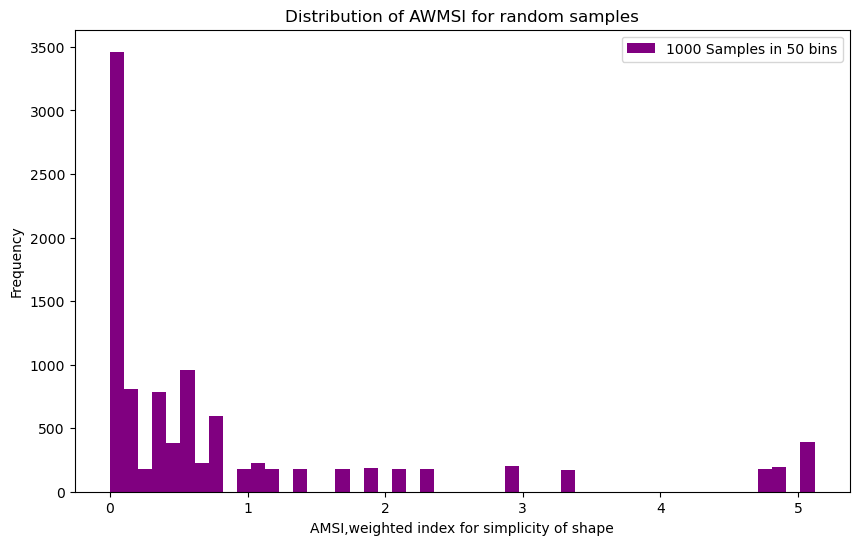

In [1244]:
# sampledzones.AWMSI.hist(),sns.kdeplot(sampledzones.AWMSI)

f, ax = plt.subplots(figsize=(10, 6))
sampledzones.AWMSI.plot.hist(ax=ax,
                       color="purple",
                       bins=50)
ax.set(title="Distribution of AWMSI for random samples",
       xlabel='AMSI,weighted index for simplicity of shape',
       ylabel='Frequency')
ax.legend(labels=['1000 Samples in 50 bins'])
plt.show()

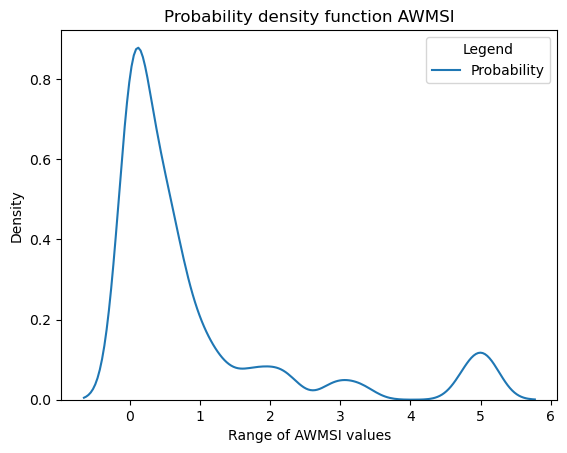

In [1245]:
# sns.kdeplot(sampledzones.MPS)
sns.kdeplot(sampledzones.AWMSI).set(title = 'Probability density function AWMSI', xlabel = 'Range of AWMSI values')
plt.legend(title='Legend', labels = ['Probability'])

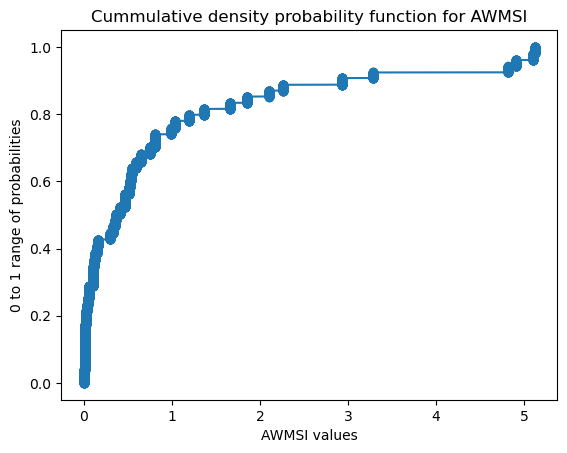

In [1249]:
# N = 10000
  
# # normal distribution 
# data = sampledzones.AWMSI
  
# # sort the data in ascending order 
# x = np.sort(sampledzones.AWMSI) 
  
# # get the cdf values of y 
# y = np.arange(N) / float(N) 
  
# # plotting 
# plt.xlabel('x-axis') 
# plt.ylabel('y-axis') 
  
# plt.title('CDF using sorting the data') 
  
# plt.plot(x, y, marker='o') 

N = 10000
  
# normal distribution 
data = sampledzones.AWMSI
  
# sort the data in ascending order 
x = np.sort(sampledzones.AWMSI) 
  
# get the cdf values of y 
y = np.arange(N) / float(N) 
  
# plotting 
plt.xlabel('AWMSI values') 
plt.ylabel('0 to 1 range of probabilities') 
  
plt.title('Cummulative density probability function for AWMSI') 
  
plt.plot(x, y, marker='o') 

In [298]:
'''This is a function used in order to generate random points within the candidate zones'''
def generate_random(polygon):
  point = None
  minx, miny, maxx, maxy = polygon.bounds
  while point==None:
      pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
      if polygon.contains(pnt):
          point = (pnt)
  return point

In [1165]:
# county = gpd.read_file('county_buff200.shp')

In [3103]:
generate_random(divis_.geometry_x[divis_.geometry_x.index[0]]).x

460199.2394566972

In [3159]:
'''This cell is to do 1,000 random samples of standard deviation of elevation'''
sample_elev = []
for i in range(1000):
    random_inclusive =divis.sample(n=1)
    rnd_pnt = gpd.GeoDataFrame(geometry=[generate_random(random_inclusive.geometry[random_inclusive.index[0]])],crs=divis.crs)
#     rnd_pnt = gpd.GeoDataFrame(geometry=[generate_random(county.geometry[0])],crs = divis.crs)
    rnd_pnt.geometry[0].coords[:]
    for val in d3m.sample([(rnd_pnt.geometry[0].coords[:][0])]): 
#         print(val[0])
        sample_elev.append(val[0])
elevpd = pd.DataFrame(sample_elev)

In [3160]:
'''This cell is important as it fits a kernel density estimator that allows us to get weights based on the random sampling'''
elevkde = scipy.stats.gaussian_kde(elevpd[0])

In [3138]:
elevkde.integrate_box_1d(0,3)

0.583011171363448

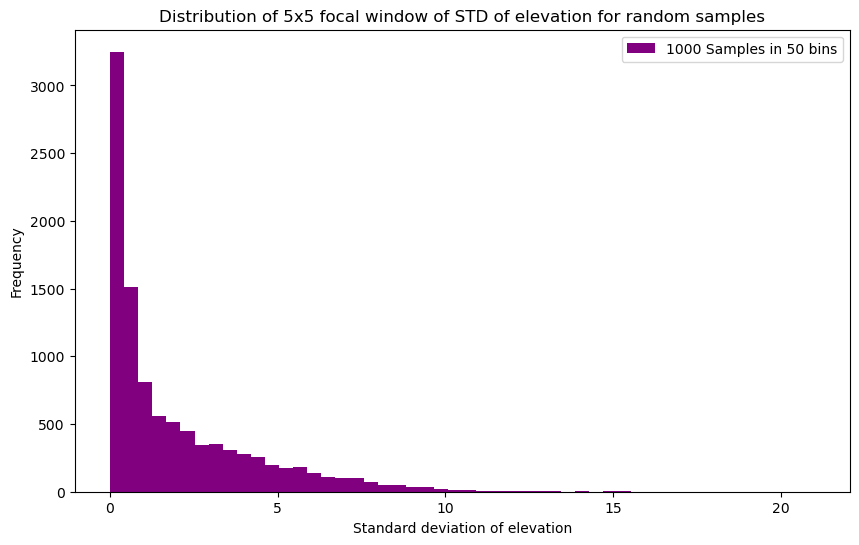

In [3161]:

# elevpd.hist()
# Plot a histogram
f, ax = plt.subplots(figsize=(10, 6))
elevpd.plot.hist(ax=ax,
                       color="purple",
                       bins=50)
ax.set(title="Distribution of 5x5 focal window of STD of elevation for random samples",
       xlabel='Standard deviation of elevation',
       ylabel='Frequency')
ax.legend(labels=['1000 Samples in 50 bins'])
plt.show()

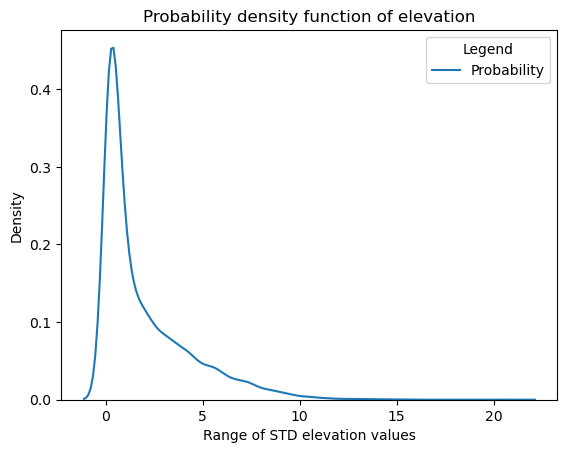

In [3162]:
sns.kdeplot(elevpd).set(title = 'Probability density function of elevation', xlabel = 'Range of STD elevation values')
plt.legend(title='Legend', labels = ['Probability'])

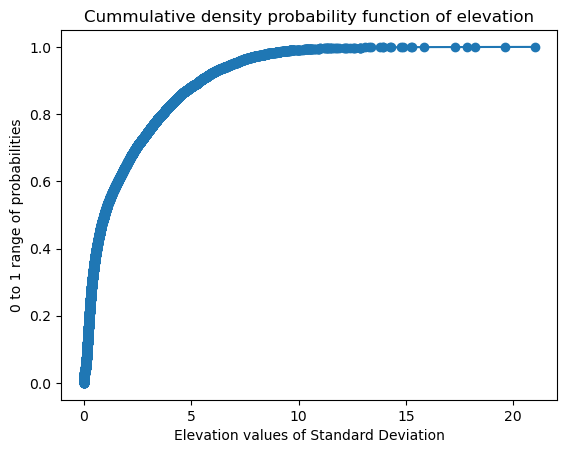

In [3164]:
N = 10000
  
# normal distribution 
data = sample_elev
  
# sort the data in ascending order 
x = np.sort(sample_elev) 
  
# get the cdf values of y 
y = np.arange(N) / float(N) 
  
# plotting 
plt.xlabel('Elevation values of Standard Deviation') 
plt.ylabel('0 to 1 range of probabilities') 
  
plt.title('Cummulative density probability function of elevation') 
  
plt.plot(x, y, marker='o') 

In [510]:
# roadsb = gpd.read_file('C:/Users/zenus/Downloads/Resilio_box_desktop/Proposal/figshare_Dijks/ROUTESfromfarms_tofarmers_Boulder/\
# ROUTESfromfarms_tofarmers_Boulder.shp')
# roadsla=roads = gpd.read_file('C:/Users/zenus/Downloads/Resilio_box_desktop/Proposal/figshare_Dijks/\
# ROUTESfromfarms_tofarmers_Lafayette/ROUTESfromfarms_tofarmers_Lafayette.shp')
# roadslo = roads = gpd.read_file('C:/Users/zenus/Downloads/Resilio_box_desktop/Proposal/\
# figshare_Dijks/ROUTESfromfarms_tofarmers_Longmont/ROUTESfromfarms_tofarmers_Longmont.shp')
# roadsforall = pd.concat([roadsb,roadslo,roadsla],ignore_index=True)

In [3248]:
# decenterpoly = gpd.read_file('C:/Users/zenus/Downloads/Resilio_box_desktop/Proposal/figshare_Dijks/\
# Multipolygons_areafragmentation/Multipolygons_areafragmentation.shp')
# characterizeslope=[]
# for i,p in decenterpoly.iterrows():
#     with rasterio.open('fcl_std_elev')  as src:

#         out_image, out_transform = rasterio.mask.mask(src, [p.geometry], filled=False,  crop=True, nodata=None)
#         out_meta = src.meta
# #         print(np.min(out_image),np.max(out_image),elevkde.integrate_box_1d(np.min(out_image),np.max(out_image)))
#         characterizeslope.append(float(elevkde.integrate_box_1d(np.min(out_image),np.max(out_image))))
# #         characterizeslope.append(float(elevkde.pdf(np.average(out_image))))
# #         print(np.average(out_image))

# # divis['Prob_slp'] = characterizeslope
# decenterpoly['Prob_slp'] = characterizeslope

# # divis.to_file('probability_of_zones')
# # decenterpoly.to_file('probable_slp_samplecandidatezones')

C:\Users\zenus\AppData\Local\Temp\ipykernel_19332\711456480.py:10: UserWarning: Warning: converting a masked element to nan.
  characterizeslope.append(float(elevkde.integrate_box_1d(np.min(out_image),np.max(out_image))))
C:\Users\zenus\AppData\Local\Temp\ipykernel_19332\711456480.py:10: UserWarning: Warning: converting a masked element to nan.
  characterizeslope.append(float(elevkde.integrate_box_1d(np.min(out_image),np.max(out_image))))
C:\Users\zenus\AppData\Local\Temp\ipykernel_19332\711456480.py:10: UserWarning: Warning: converting a masked element to nan.
  characterizeslope.append(float(elevkde.integrate_box_1d(np.min(out_image),np.max(out_image))))
C:\Users\zenus\AppData\Local\Temp\ipykernel_19332\711456480.py:10: UserWarning: Warning: converting a masked element to nan.
  characterizeslope.append(float(elevkde.integrate_box_1d(np.min(out_image),np.max(out_image))))
C:\Users\zenus\AppData\Local\Temp\ipykernel_19332\711456480.py:10: UserWarning: Warning: converting a masked ele

In [540]:
# roadssampled = []
# for i in range(1000):
#     roadssampled.append(roadsforall.sample(n=1))
    
# roadssampled = pd.concat(roadssampled,ignore_index=True)

In [ ]:
import scipy.stats

In [1024]:
# ffs= roadssampled.assign(pro=roadssampled.surface_ad.map(roadssampled.surface_ad.value_counts(normalize=True)))

In [3884]:
# fit = scipy.stats.gaussian_kde(roadssampled.surface_ad)

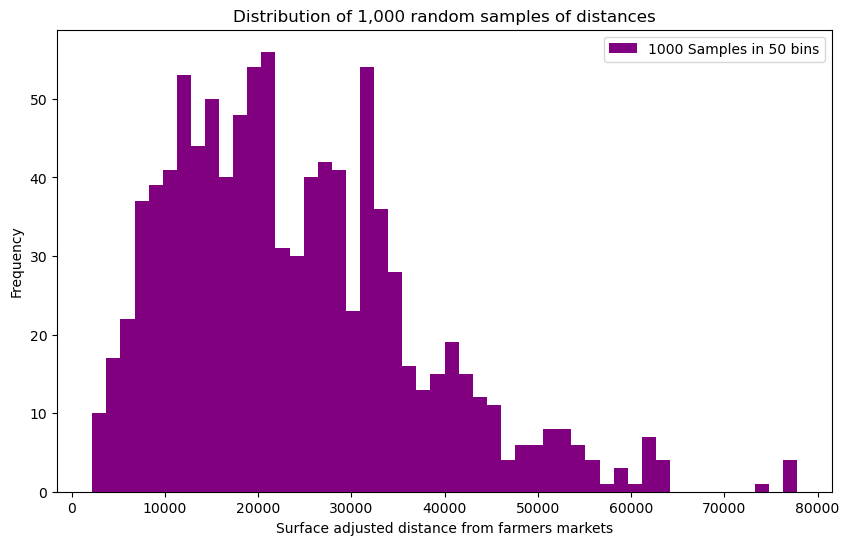

In [1176]:
# # roadssampled.surface_ad.hist()

# f, ax = plt.subplots(figsize=(10, 6))
# roadssampled.surface_ad.plot.hist(ax=ax,
#                        color="purple",
#                        bins=50)
# ax.set(title="Distribution of 1,000 random samples of distances",
#        xlabel='Surface adjusted distance from farmers markets',
#        ylabel='Frequency')
# ax.legend(labels=['1000 Samples in 50 bins'])
# plt.show()

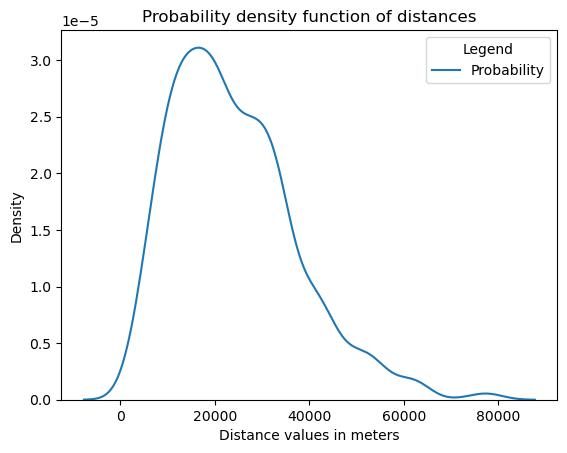

In [1179]:
# # sns.kdeplot(roadssampled.surface_ad)
# sns.kdeplot(roadssampled.surface_ad).set(title = 'Probability density function of distances',\
#                                          xlabel = 'Distance values in meters')
# plt.legend(title='Legend', labels = ['Probability'])

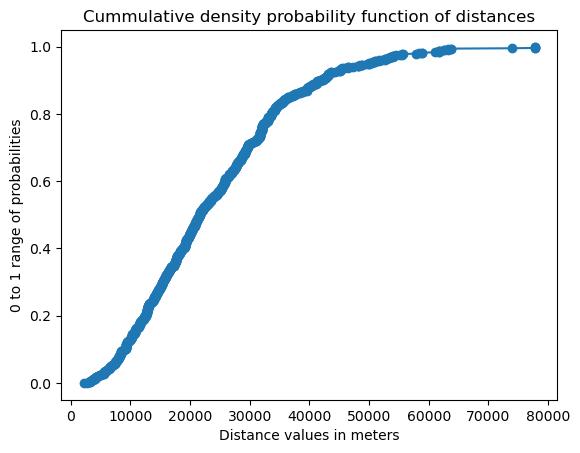

In [1181]:
# # N = 1000
  
# # # normal distribution 
# # data = roadssampled.surface_ad
  
# # # sort the data in ascending order 
# # x = np.sort(roadssampled.surface_ad) 
  
# # # get the cdf values of y 
# # y = np.arange(N) / float(N) 
  
# # # plotting 
# # plt.xlabel('x-axis') 
# # plt.ylabel('y-axis') 
  
# # plt.title('CDF using sorting the data') 
  
# # plt.plot(x, y, marker='o') 

# N = 1000
  
# # normal distribution 
# data = roadssampled.surface_ad
  
# # sort the data in ascending order 
# x = np.sort(roadssampled.surface_ad) 
  
# # get the cdf values of y 
# y = np.arange(N) / float(N) 
  
# # plotting 
# plt.xlabel('Distance values in meters') 
# plt.ylabel('0 to 1 range of probabilities') 
  
# plt.title('Cummulative density probability function of distances') 
  
# plt.plot(x, y, marker='o') 

In [452]:
divis2 = gpd.read_file('probable_slp/probable_slp.shp')

In [393]:
'''These are the shortest paths sufrace adjusted from all children patches to three different farmers markets
'''

rdsbo = gpd.read_file('C:/Users/zenus/Downloads/Resilio_box_desktop/Proposal/figshare_Dijks/\
decenterroutes_tofarmers_Boulder/decenterroutes_tofarmers_Boulder.shp')
rdslo = gpd.read_file('C:/Users/zenus/Downloads/Resilio_box_desktop/Proposal/figshare_Dijks/\
decenterroutes_tofarmers_Longmont/decenterroutes_tofarmers_Longmont.shp')
rdsla = gpd.read_file('C:/Users/zenus/Downloads/Resilio_box_desktop/Proposal/figshare_Dijks/\
decenterroutes_tofarmers_Lafayette/decenterroutes_tofarmers_Lafayette.shp')

rdsbopnts = gpd.read_file('C:/Users/zenus/Downloads/Resilio_box_desktop/Proposal/figshare_Dijks/\
routesfromdecentr_tofarmers_Boulder/routesfromdecentr_tofarmers_Boulder.shp')
rdslopnts = gpd.read_file('C:/Users/zenus/Downloads/Resilio_box_desktop/Proposal/figshare_Dijks/\
routesfromdecentr_tofarmers_Longmont/routesfromdecentr_tofarmers_Longmont.shp')
rdslapnts = gpd.read_file('C:/Users/zenus/Downloads/Resilio_box_desktop/Proposal/figshare_Dijks/\
routesfromdecentr_tofarmers_Lafayette/routesfromdecentr_tofarmers_Lafayette.shp')

In [394]:
decall = pd.concat([rdsbo,rdslo,rdsla],ignore_index=True)#combine the above all together
decpntall = pd.concat([rdsbopnts,rdslopnts,rdslapnts],ignore_index= True)

In [416]:
alldecenters= pd.concat([rdsbo,rdslo,rdsla,rdsbopnts,rdslopnts,rdslapnts], ignore_index=True)

In [454]:
farmersprob,cityf, minf,meanf,maxf = [],[],[],[],[]
for i,y in divis2.iterrows():
    felo = decall.loc[np.where((decall['de_centr']==y.de_centr))]
    
    feloo = decpntall.loc[np.where((decpntall['de_centr']==y.de_centr))]
    
    feloo = feloo.reset_index(drop=True)
    felo = felo.reset_index(drop=True)
    
    feloop = pd.concat([felo,feloo], ignore_index=True)
    cities = ['Boulder','Longmont','Lafayette']
    
    '''The following is to find the minimum mean of the three farmers markets'''
    forc = {}
    for i in cities:
        bould = feloop.loc[np.where(feloop['city']==i)]
        forc[i] = bould['surface_ad'].mean()

    temp = min(forc.values())# This is to grab the minimum of the 3 averages from any zone to 3 farmers market
    res = [key for key in forc if forc[key] == temp] #This is to extract the name of the min ave per zone
#     print(temp)

#     minfarmers =  felo['surface_ad'][felo.loc[np.where(felo['surface_ad']==np.min(felo['surface_ad']))].index[0]]
    '''Here we are grabbing the correct instances for the correct farmers market with feloo'''
    feloo = alldecenters.loc[np.where((alldecenters['city']==\
                                     res[0])\
                                   &(alldecenters['de_centr']==y.de_centr))] 

    feloo = feloo.reset_index(drop=True)
    '''min distance instance for the identified min ave farmers market'''
    minfarmers = feloo['surface_ad'][feloo.loc[np.where(feloo['surface_ad']==np.min(feloo['surface_ad']))].index[0]]
    '''max distance instance for the identified min ave farmers market'''
    maxfarmers= feloo['surface_ad'][feloo.loc[np.where(feloo['surface_ad']==np.max(feloo['surface_ad']))].index[0]]
    
#     print(res[0],minfarmers, temp ,maxfarmers)
#     print(fit.integrate_box_1d(minfarmers,maxfarmers))
    cityf.append(res[0])
    minf.append(minfarmers)
    meanf.append(temp)
    maxf.append(maxfarmers)
    

In [27]:
# rdsforprob = pd.concat([rdsbo,rdslo,rdsla],ignore_index=True)

In [ ]:
fitroads = scipy.stats.gaussian_kde(roadssampled.surface_ad)

In [63]:
# farmersprob,cityf, minf,meanf,maxf = [],[],[],[],[]
# for p,y in divis.iterrows():
    
#     felo = rdsforprob.loc[np.where((rdsforprob['neighb']==y.neighb))]
#     felo = felo.reset_index(drop=True)

#     cities = ['Boulder','Longmont','Lafayette']
#     forc = {}
#     for i in cities:
#         bould = felo.loc[np.where(felo['city']==i)]
#         forc[i] = bould['surface_ad'].mean()

#     temp = min(forc.values())# This is to grab the minimum of the 3 averages from any zone to 3 farmers market
#     res = [key for key in forc if forc[key] == temp] #This is to extract the name of the min ave per zone
# #     print(temp)

# #     minfarmers =  felo['surface_ad'][felo.loc[np.where(felo['surface_ad']==np.min(felo['surface_ad']))].index[0]]
#     '''Here we are grabbing the correct instances for the correct farmers market with feloo'''
#     feloo = rdsforprob.loc[np.where((rdsforprob['city']==\
#                                      res[0])\
#                                    &(rdsforprob['neighb']==y.neighb))] 

#     feloo = feloo.reset_index(drop=True)
#     '''min distance instance for the identified min ave farmers market'''
#     minfarmers = feloo['surface_ad'][feloo.loc[np.where(feloo['surface_ad']==np.min(feloo['surface_ad']))].index[0]]
#     '''max distance instance for the identified min ave farmers market'''
#     maxfarmers= feloo['surface_ad'][feloo.loc[np.where(feloo['surface_ad']==np.max(feloo['surface_ad']))].index[0]]
    
# #     print(res[0],minfarmers, temp ,maxfarmers)
# #     print(fit.integrate_box_1d(minfarmers,maxfarmers))
#     cityf.append(res[0])
#     minf.append(minfarmers)
#     meanf.append(temp)
#     maxf.append(maxfarmers)
    


In [41]:
'''Cell was incorporated on the above window, it works to get the min of the three averages of zone to 3 farmers markets loc'''
# felo = rdsforprob.loc[np.where((rdsforprob['neighb']==52))]
# felo = felo.reset_index(drop=True)
# cities = ['Boulder','Longmont','Lafayette']
# forc = {}
# for i in cities:
#     bould = felo.loc[np.where(felo['city']==i)]
#     forc[i] = bould['surface_ad'].mean()
    
# forc

{'Boulder': 12388.265770068496,
 'Longmont': 32470.165272177637,
 'Lafayette': 24958.29436136797}

In [455]:
divis2['Clfarmers'] = cityf
divis2['Minfrmrs'] = minf
divis2['Meanfrmrs'] = meanf
divis2['Maxfrmrs'] = maxf

In [475]:
'''Random sampling from all adjusted routes and children patches'''
roadssampled = []
for i in range(1000):
    roadssampled.append(divis2.sample(n=1))
    
roadssampled = pd.concat(roadssampled,ignore_index=True)

In [476]:
fitroads = scipy.stats.gaussian_kde(roadssampled.Meanfrmrs) #fit kernel density estimation to derive weights

In [477]:
'''Characterize each patch based on their min and max distances'''
farmersprob = []
for i,t in divis2.iterrows():
    farmersprob.append(fitroads.integrate_box_1d(t.Minfrmrs,t.Maxfrmrs))

In [478]:
divis2['Prob_dist'] = farmersprob

In [479]:
divis2.to_file('probability_of_zones_distancesrevisited_decenter')

In [464]:
import rioxarray as rxr

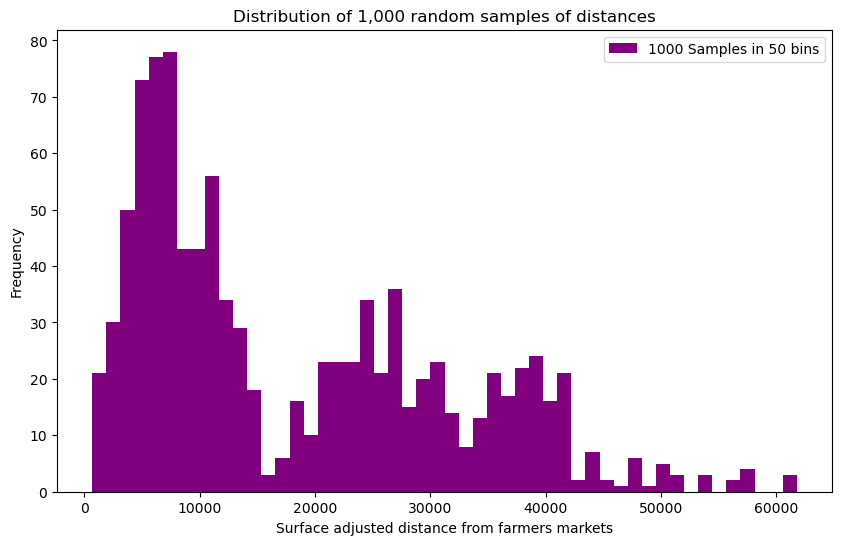

In [465]:
f, ax = plt.subplots(figsize=(10, 6))
roadssampled.Meanfrmrs.plot.hist(ax=ax,
                       color="purple",
                       bins=50)
ax.set(title="Distribution of 1,000 random samples of distances",
       xlabel='Surface adjusted distance from farmers markets',
       ylabel='Frequency')
ax.legend(labels=['1000 Samples in 50 bins'])
plt.show()

In [466]:
import seaborn as sns

[Text(0.5, 1.0, 'Probability density function of distances'),
 Text(0.5, 0, 'Distance values in meters')]

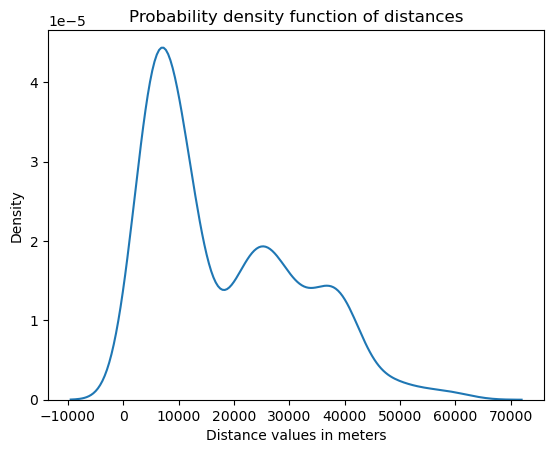

In [467]:
sns.kdeplot(roadssampled.Meanfrmrs).set(title = 'Probability density function of distances',\
                                         xlabel = 'Distance values in meters')
# plt.legend(title='Legend', labels = ['Probability'])

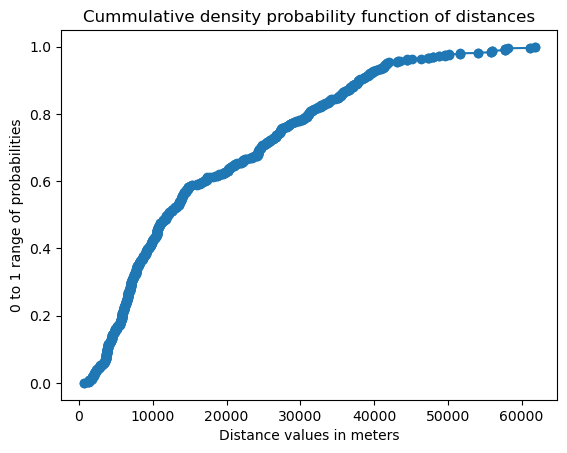

In [480]:
# N = 1000
  
# # normal distribution 
# data = roadssampled.surface_ad
  
# # sort the data in ascending order 
# x = np.sort(roadssampled.surface_ad) 
  
# # get the cdf values of y 
# y = np.arange(N) / float(N) 
  
# # plotting 
# plt.xlabel('x-axis') 
# plt.ylabel('y-axis') 
  
# plt.title('CDF using sorting the data') 
  
# plt.plot(x, y, marker='o') 

N = 1000
  
# normal distribution 
data = roadssampled.Meanfrmrs
  
# sort the data in ascending order 
x = np.sort(roadssampled.Meanfrmrs) 
  
# get the cdf values of y 
y = np.arange(N) / float(N) 
  
# plotting 
plt.xlabel('Distance values in meters') 
plt.ylabel('0 to 1 range of probabilities') 
  
plt.title('Cummulative density probability function of distances') 
  
plt.plot(x, y, marker='o') 

In [880]:
# out_meta.update({"driver": "GTiff",
#                  "height": out_image.shape[1],
#                  "width": out_image.shape[2],
#                  "transform": out_transform})


# with rasterio.open(os.getcwd()+'/'+'clipped_small_.tif', "w", **out_meta) as dest:
#     dest.write(out_image)

In [268]:
# from osgeo import gdal
# ds = gdal.Open("fcl_std_elev")
# myarray = np.array(ds.GetRasterBand(1).ReadAsArray())

In [941]:
# npts=1000 #No of simulation runs 

# x=Beta(1.5,9,0,20) 
# x.describe()  
# rx=x._mcpts # shows an array of all the individual simulation results
# rx

In [942]:
# npts=1000 #No of simulation runs 

# x=PERT(0,1,20,7) 
# x.describe()  
# rx=x._mcpts # shows an array of all the individual simulation results
# rx

In [943]:
# from pert import PERT
# import seaborn as sns

# pert = PERT(0.01, 1, 20, 7)
# sns.kdeplot(pert.rvs(1000))

In [944]:
# print('Min value',pert.a,'\n''Most likely', pert.b, '\n''Pert maximum', pert.c, \
#      '\n''Pert Lambda', pert.lamb,'\n''Pert alpha', pert.alpha,'\n''Pert beta',pert.beta, '\n''Pert mean',pert.mean,\
#      '\n''Pert variance',pert.var, '\n''Pert skewness', pert.skew, '\n''Pert kurtosis',pert.kurt)

In [215]:
# ''A custom implementation of the Beta-PERT distribution (also shorthand
# referred to as the PERT distributon) using `numpy` and `scipy`. Methods
# mimic `scipy.stats` classes.

# Parameters
# ----------
# min_val: numeric or numeric-array
#     The minimum value(s) of the PERT.
# ml_val: numeric or numeric-array
#     The most-likely value(s) of the PERT.
# max_val: numeric or numeric-array
#     The maximum value(s) of the PERT.
# lamb: float (default 4.0)
#     The PERT's lambda parameter, smaller values give a wider probability spread.
    
# Attributes
# ----------
# a: Array
#     Contains the PERT minimum values in np.array form.
# b: Array
#     Contains the PERT most likely values in np.array form.
# c: Array
#     Contains the PERT maximum values in np.array form.
# range: Array
#     Contains the PERT max - min range.
# lamb: float
#     The PERT lambda parameter. Should be greater than 0.
# alpha: Array
#     Contains the PERT alpha values, as a part of the Beta distribution calculation.
# beta: Array
#     Contains the PERT beta values, as a part of the Beta distribution calculation.
# mean: Array
#     Contains the PERT mean values.
# var: Array
#     Contains the PERT variance values.
# skew: Array
#     Contains the PERT skewness values.
# kurt: Array
#     Contains the PERT kurtosis values.''

In [254]:
# def plot_hist(data, title):
#     hist = np.histogram(data, bins=100)
#     histdist = rv_histogram(hist)

#     X = np.linspace(data.min(), data.max(), 100)
#     plt.title(title)
#     plt.hist(data, density=True, bins=100)
#     plt.plot(X, histdist.pdf(X))
#     plt.show()

# # rx=x._mcpts
# plot_hist(arr,"Example PERT Distribution")

In [482]:
frm = gpd.read_file('add_farms/newfarms_all.shp')

In [527]:
'''This is to see with what zones do farms intersect with'''
intersct=[]
for i,y in frm.iterrows():
    for k,j in divis2.iterrows():
        if y.geometry.intersects(j.geometry):
#             print(j.de_centr)
            intersct.append(j.de_centr)
            break

In [528]:
intersct.insert(65,'48_12')
intersct.insert(139,'48_10')

frm['de_centr'] = intersct
frm.to_file('farms_withdecenterid')

In [ ]:
import statistics as st

In [799]:
# me = 1.96*(st.pstdev(probdistfrms)/np.sqrt(len(probdistfrms)))

# me['85'] = [(np.mean(probdistfrms)+1.44*(st.pstdev(probdistfrms)/np.sqrt(len(probdistfrms))))]
# ma['85'] = [(np.mean(probdistfrms)-1.44*(st.pstdev(probdistfrms)/np.sqrt(len(probdistfrms))))]


# me.append(np.mean(probdistfrms)-1.96*(st.pstdev(probdistfrms)/np.sqrt(len(probdistfrms))))
# me.append(np.mean(probdistfrms)+1.96*(st.pstdev(probdistfrms)/np.sqrt(len(probdistfrms))))

# me['85'].append((np.mean(probdistfrms)+1.44*(st.pstdev(probdistfrms)/np.sqrt(len(probdistfrms)))))
# ma['85'].append((np.mean(probdistfrms)-1.44*(st.pstdev(probdistfrms)/np.sqrt(len(probdistfrms)))))

In [10]:
# frm.loc[np.where(frm['acres']<=49)]

In [11]:
# frm.loc[np.where((frm['acres']>179) & (frm['acres']<=499))]

In [2683]:
'''This cell essentially creates the dataframe of the stratification of farms used for the simulation'''
divis = 'final_divis_2_0.shp'
divis = gpd.read_file(divis)
divis = gpd.GeoDataFrame(divis,geometry=divis['geometry'])

# new_cnt = 'cent_grID.shp'
# new__ = gpd.read_file(new_cnt)
# reg_cent = gpd.GeoDataFrame(new__ , geometry=new__['geometry'])

'''These are the old ones '''
# num = [713,47,20,7,9,22,18,12,7]
# Acres= [100,139,179,219,259,499,999,1999,2000]

'''These are the new farms coming from the strata break of 2017 census USDA, with farm numbers from phils actual data'''
num = [97,281,93,17,2]
Acres= [49,179,499,999,1000]

# [333,190,83,23,3,3]
# [9,49,179,499,999,1000]
# num_clean = 
# Acres_clean = 

num_100=[188,428,38,59]
acres_100 =[10,50,70,100]

per_alloc=0.8
save_alloc=[]
for i,y in zip(num,Acres):
    save_alloc.append(int(per_alloc*i*y))

saloc = []
percent = 0.7
for i,y in zip(num_100,acres_100):
  saloc.append(percent*i*y)


farms_pd_100 = pd.DataFrame()
farms_pd_100['num_farms'] = [i for i in num_100]
farms_pd_100['Acreage'] = [i for i in acres_100]
farms_pd_100['upper_limit_alloc'] = [i*y for i,y in zip(num_100,acres_100)]
farms_pd_100['allocation_'+str(percent)] = saloc

# yoyo=[zip([num[i]*Acres[i]])[0][0]*float(per_alloc) for i in range(len(num))] With list comprehension in case u want
    
farm_pd=pd.DataFrame()
farm_pd['num_farms']=[i for i in num]
farm_pd['Acreage']=[int(i) for i in Acres]
farm_pd[str(per_alloc)+'_percent_allo']=save_alloc
farm_pd[str(per_alloc)+'_farm_size']=per_alloc*farm_pd['Acreage']

In [2454]:
'''This is an older take on using the APN to create certain lists'''
acr = []
for i,r in farm_pd[::-1].iterrows():
   
  acr.append(farm_pd['Acreage'][i])
  

def get_apn(acre1,acre2):

  if acre2 == 1000:
    fuo = np.where(frm['acres']>acre2)
    frm1 = frm.loc[fuo[0]]
    frm1 = frm1.reset_index(drop=True)
    fuo = np.where(frm1['keep']==1)
    frm3 = frm1.loc[fuo[0]]
    # list(frm3['APN'])
    frm3['APN']

  if acre1 > 9 and acre2 <= 1000:
    fuo = np.where(frm['acres']<=acre2)
    frm1 = frm.loc[fuo[0]]
    frm1 = frm1.reset_index(drop=True)
    fuo = np.where(frm1['acres']>acre1)
    frm2 = frm1.loc[fuo[0]]
    frm2 = frm2.reset_index(drop=True)
    fuo = np.where(frm2['keep']==1)
    frm3 = frm2.loc[fuo[0]]
    frm3['APN']

  if acre1 == 9:
    fuo = np.where(frm['acres']<=acre1)
    frm1 = frm.loc[fuo[0]]
    frm1 = frm1.reset_index(drop=True)
    fuo = np.where(frm1['keep']==1)
    frm3 = frm1.loc[fuo[0]]
    # list(frm3['APN'])
    frm3['APN']



  return(list(frm3['APN']))

apn = []
for i in range(len(acr)-1):
  acre2 = acr[i]
  acre1 = acr[i+1]
  print(acre1,acre2)
  # print(len(get_apn(acre1,acre2)))
  # apn.extend(get_apn(acre1,acre2))
  if acre2 == 1000:
    fuo = np.where(frm['acres']>acre2)
    frm1 = frm.loc[fuo[0]]
    frm1 = frm1.reset_index(drop=True)
    fuo = np.where(frm1['keep']==1)
    frm3 = frm1.loc[fuo[0]]
    # list(frm3['APN'])
    print(len(frm3['APN']))
    apn.extend(list(frm3['APN']))

  if acre1 >= 49 and acre2 < 1000:
    fuo = np.where(frm['acres']<acre2)
    frm1 = frm.loc[fuo[0]]
    frm1 = frm1.reset_index(drop=True)
    fuo = np.where(frm1['acres']>=acre1)
    frm2 = frm1.loc[fuo[0]]
    frm2 = frm2.reset_index(drop=True)
    fuo = np.where(frm2['keep']==1)
    frm3 = frm2.loc[fuo[0]]
    frm3['APN']
    print(len(frm3['APN']))
    apn.extend(list(frm3['APN']))

  if acre1 == 49:
    fuo = np.where(frm['acres']<=acre1)
    frm1 = frm.loc[fuo[0]]
    frm1 = frm1.reset_index(drop=True)
    fuo = np.where(frm1['keep']==1)
    frm3 = frm1.loc[fuo[0]]
    # list(frm3['APN'])
    print(len(frm3['APN']))
    apn.extend(list(frm3['APN']))



    # fuo = np.where(frm2['keep']==1)
    # frm3 = frm2.loc[fuo[0]]
    # frm3['APN']
    # print(len(frm3['APN']))

999 1000
2
499 999
17
179 499
93
49 179
281
97


In [2455]:
len(apn)

490

In [2458]:
divis2 = gpd.read_file('probability_of_zones_distancesrevisited_decenter\probability_of_zones_distancesrevisited_decenter.shp')

In [2561]:
divis_

de_centr  new_fid         Acres  Prob_slp_x  neighb Clfarmers_x  \
0        1_1        1     96.293177    0.743513       1    Longmont   
1        1_2        1     14.225590    0.452439       1    Longmont   
2        1_3        1   1891.534288    0.829784       1    Longmont   
3        1_4        1     39.084654    0.554874       1    Longmont   
4        1_5        1     10.327331    0.461024       1    Longmont   
..       ...      ...           ...         ...     ...         ...   
620     39_7       39     30.217457    0.219176      39    Longmont   
621     39_8       39   1586.068373    0.857439      39    Longmont   
622     39_9       39     10.633477    0.532247      39    Longmont   
623    39_10       39  10868.168415    0.857439      39    Longmont   
624    39_11       39     65.005037    0.296395      39    Longmont   

       Minfrmrs_x   Meanfrmrs_x    Maxfrmrs_x  Prob_dist_x  ...    lpipro  \
0    41563.221122  41582.496935  41601.772747     0.000347  ...  0.013383   
1    44406.592806  44532.625320  44658.657833     0.001347  ...  0.013383   
2    37436.232075  43455.354654  47070.985264     0.079075  ...  0.013383   
3    43251.480567  43287.253025  43323.025484     0.000484  ...  0.013383   
4    47272.321131  47277.630391  47282.939652     0.000035  ...  0.013383   
..            ...           ...           ...          ...  ...       ...   
620  14728.958211  14759.770065  14790.581919     0.001362  ...  0.004074   
621  11781.189016  13582.665002  15857.062754     0.103837  ...  0.004074   
622  19398.248728  19539.222144  19680.195559     0.003858  ...  0.004074   
623  14701.938591  20648.936740  22694.033133     0.124872  ...  0.004074   
624  18797.305621  18983.397736  19169.489851     0.005192  ...  0.004074   

       msipro   awmsi_1                                         geometry_y  \
0    0.593867  0.872613  MULTIPOLYGON (((460150.702 4447016.716, 460150...   
1    0.593867  0.872613  MULTIPOLYGON (((460150.702 4447016.716, 460150...   
2    0.593867  0.872613  MULTIPOLYGON (((460150.702 4447016.716, 460150...   
3    0.593867  0.872613  MULTIPOLYGON (((460150.702 4447016.716, 460150...   
4    0.593867  0.872613  MULTIPOLYGON (((460150.702 4447016.716, 460150...   
..        ...       ...                                                ...   
620  0.943405  0.814904  MULTIPOLYGON (((475780.745 4443499.956, 475780...   
621  0.943405  0.814904  MULTIPOLYGON (((475780.745 4443499.956, 475780...   
622  0.943405  0.814904  MULTIPOLYGON (((475780.745 4443499.956, 475780...   
623  0.943405  0.814904  MULTIPOLYGON (((475780.745 4443499.956, 475780...   
624  0.943405  0.814904  MULTIPOLYGON (((475780.745 4443499.956, 475780...   

     area_leftover  boot    Areaused_1  Areaused_0_7  Areaused_0_65  \
0        72.219883     0     96.293177     67.405224      62.590565   
1        10.669193     0     14.225590      9.957913       9.246634   
2        12.650716     0   1891.534288   1324.074001    1229.497287   
3        29.313490     0     39.084654     27.359258      25.405025   
4         7.745498     0     10.327331      7.229131       6.712765   
..             ...   ...           ...           ...            ...   
620      22.663093     0     30.217457     21.152220      19.641347   
621      11.551280     0   1586.068373   1110.247861    1030.944442   
622       7.975108     0     10.633477      7.443434       6.911760   
623    4918.126311     0  10868.168415   7607.717890    7064.309470   
624      48.753778     0     65.005037     45.503526      42.253274   

     Areaused_0_75  
0        72.219883  
1        10.669193  
2      1418.650716  
3        29.313490  
4         7.745498  
..             ...  
620      22.663093  
621    1189.551280  
622       7.975108  
623    8151.126311  
624      48.753778  

[625 rows x 37 columns]

In [2723]:
'''These used to be different tests to bootstrap information in regards to calculate median from strata'''
def strap (getlist):
        # Example data: heights of individuals in a sample
        heights_sample = getlist

        # Number of bootstrap samples
        num_bootstrap_samples = 1000

        # Generate bootstrap samples
        bootstrap_samples = [np.random.choice(heights_sample, size=len(heights_sample), replace=True) for _ in range(num_bootstrap_samples)]

        # Calculate means for each bootstrap sample
        bootstrap_means = [np.median(bootstrap_sample) for bootstrap_sample in bootstrap_samples]

        # Calculate confidence interval based on percentiles
        confidence_interval_bootstrap = np.percentile(bootstrap_means, [0.5, 99.5])
        return(confidence_interval_bootstrap)

In [2724]:
'''These were different tests to create a simulation depending on confidence intervals derived from the 
validation dataset, they were eventually not used'''
ol = [(0,49),(49,179),(179,499),(499,999),(999,2000)]
intervl = [('95',1.7)]

'''http://www.ltcconline.net/greenl/courses/201/estimation/smallConfLevelTable.htm'''
'''https://www.westga.edu/academics/research/vrc/assets/docs/confidence_intervals_notes.pdf'''

for y in intervl:
    me = {}
    ma = {}
    medist = {}
    madist = {}
    probhi,problow,probdisthi,probdistlow, originhi, originilo, originhid, originlod = [],[],[],[],[],[],[],[]
    for d in ol:
        probdistfrms,probdistfrms2 = [],[]
    #     print(len(frm.loc[np.where((frm.acres > d[0])&(frm.acres<=d[1]))].acres),d[0],d[1])
        for i in list(frm.loc[np.where((frm.acres > d[0])&(frm.acres<=d[1]))].de_centr):
            probdistfrms.append(float(divis2.loc[np.where(divis2.de_centr==i)].Prob_slp))
            probdistfrms2.append(float(divis2.loc[np.where(divis2.de_centr==i)].Prob_dist))

#         probhi.append(np.median(probdistfrms)+y[1]*(st.pstdev(probdistfrms)/np.sqrt(len(probdistfrms))))
#         problow.append(np.median(probdistfrms)-y[1]*(st.pstdev(probdistfrms)/np.sqrt(len(probdistfrms))))

#         probdisthi.append(np.median(probdistfrms2)+y[1]*(st.pstdev(probdistfrms2)/np.sqrt(len(probdistfrms2))))
#         probdistlow.append(np.median(probdistfrms2)-y[1]*(st.pstdev(probdistfrms2)/np.sqrt(len(probdistfrms2))))
        
        probhi.append(strap(probdistfrms)[1])
        problow.append(strap(probdistfrms)[0])
        probdisthi.append(strap(probdistfrms2)[1])
        probdistlow.append(strap(probdistfrms2)[0])
        
        originilo.append(np.min(probdistfrms))
        originhi.append(np.max(probdistfrms))
        originlod.append(np.min(probdistfrms2))
        originhid.append(np.max(probdistfrms2))
        
    me[y[0]] = probhi
    ma[y[0]] = problow
    medist[y[0]] = probdisthi
    madist[y[0]] = probdistlow
    
    farm_pd['confup'+y[0]] = list(me.values())[0]
    farm_pd['conflow'+y[0]] = list(ma.values())[0]
    farm_pd['confupdis'+y[0]] = list(medist.values())[0]
    farm_pd['conflowdis'+y[0]] = list(madist.values())[0]
    
#     print(len(probdistfrms))

In [2695]:
farm_pd['originallo'] = originilo
farm_pd['originalhi'] = originhi
farm_pd['originallod'] = originlod
farm_pd['originalhid'] = originhid
farm_pd

num_farms  Acreage  0.8_percent_allo  0.8_farm_size  confup95  conflow95  \
0         97       49              3802           39.2  0.814594   0.656830   
1        281      179             40239          143.2  0.780138   0.678788   
2         93      499             37125          399.2  0.857439   0.842981   
3         17      999             13586          799.2  0.857439   0.763354   
4          2     1000              1600          800.0  0.821466   0.704526   

   confupdis95  conflowdis95  originallo  originalhi  originallod  originalhid  
0     0.129590      0.094070    0.264909    0.857439     0.000324     0.585839  
1     0.093022      0.080609    0.175934    0.857439     0.000000     0.585839  
2     0.129590      0.108738    0.335009    0.857439     0.000000     0.585839  
3     0.124872      0.039365    0.037921    0.857439     0.002986     0.585839  
4     0.143466      0.016663    0.704526    0.821466     0.016663     0.143466

In [3016]:
thereal = [int(y.de_centr.split('_')[0]) for i,y in frm.iterrows()]
frm['neighb'] = thereal

In [3330]:
coverage = []
for i,y in divis_.iterrows():
    thereal = frm.loc[np.where(frm['neighb']==y.neighb)]
    coverage.append((np.sum(thereal.acres)/y.acres)*100)


In [3353]:
divis_['coverage'] = coverage

In [3067]:
frm.to_file('farms_thatcontainallinfo')

Confidence Interval (Bootstrap): [0.72028741 0.81490911]


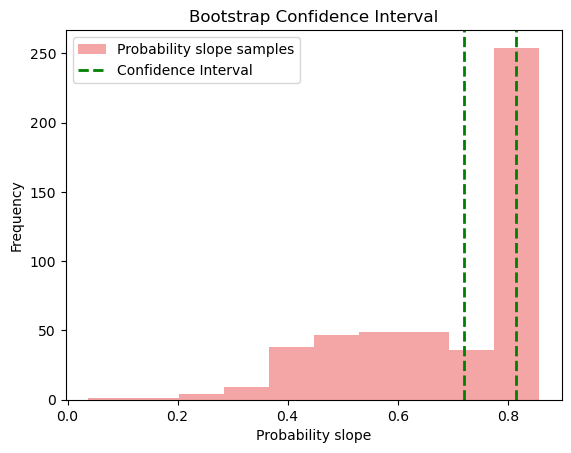

In [2954]:
'''This work but not used, this was to figure out confidence intervals to use from the validation dataset'''
import numpy as np
import matplotlib.pyplot as plt

get=[]
for i in list(frm.loc[np.where((frm.acres > 0)&(frm.acres<=179))].de_centr):
    get.append(float(divis2.loc[np.where(divis2.de_centr==i)].Prob_slp))

# Example data: heights of individuals in a sample
heights_sample = get

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Generate bootstrap samples
bootstrap_samples = [np.random.choice(heights_sample, size=len(heights_sample), replace=True) for _ in range(num_bootstrap_samples)]

# Calculate means for each bootstrap sample
bootstrap_means = [np.median(bootstrap_sample) for bootstrap_sample in bootstrap_samples]

# Calculate confidence interval based on percentiles
confidence_interval_bootstrap = np.percentile(bootstrap_means, [0.5, 99.05])

# print(f"Bootstrap Means: {bootstrap_means}")
print(f"Confidence Interval (Bootstrap): {confidence_interval_bootstrap}")

# Plotting the data
plt.hist(heights_sample, bins=10, color='lightcoral', alpha=0.7, label='Probability slope samples')

# Plotting the confidence interval
plt.axvline(confidence_interval_bootstrap[0], color='green', linestyle='dashed', linewidth=2, label='Confidence Interval')
plt.axvline(confidence_interval_bootstrap[1], color='green', linestyle='dashed', linewidth=2)

plt.xlabel('Probability slope')
plt.ylabel('Frequency')
plt.title('Bootstrap Confidence Interval')
plt.legend()
plt.show()

In [1582]:
'''This one were the parent candidate zones'''
divis2 = gpd.read_file('probable_slp/probable_slp.shp')
# divis_= divis2

In [3314]:
'''This one were the children patch zones'''
divis1 = gpd.read_file('fragmentation_prob/fragmentation_prob.shp')


In [3904]:
divis1.to_excel('zones52parents_withFRAGSTATS.xlsx')

In [3347]:
divisrevisited = gpd.read_file('probability_of_zones_distancesrevisited_decenter/\
probability_of_zones_distancesrevisited_decenter.shp')

In [3348]:
divis1['Prob_dist'] = divisrevisited.Prob_dist

In [3349]:
divisrevisited['neighb'] = divisrevisited['new_fid']

In [3350]:
divis_ = divisrevisited.merge(divis1, on = 'neighb')

In [3351]:
'''Polsby popper score calculation'''
polsby = []
for i,y in divis_.iterrows():
    polsby.append(((4*np.pi)*y.geometry_x.area)/(y.geometry_x.length*y.geometry_x.length))
#     print(y.geometry_x.area,y.geometry_x.length)

In [3352]:
'''These are the children patch polygons and will have Polsby Popper score'''
divis_['polsby'] = polsby

In [93]:
from sklearn import preprocessing
saf=preprocessing.minmax_scale(divis_.MSI, feature_range=(0,1),axis=0, copy=True)

In [105]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

saff= NormalizeData(divis_.MSI)

In [211]:
divis_['saf'] = saf #these were efforts to normalize data between 0-1

In [237]:
'''This was to avoid dividing by 0 when values became too small'''
# divis_.loc[divis_.loc[np.where(divis_.saf==0.0)].index,['saf']] = float(0.00009)
divis_.loc[divis_.loc[np.where(divis_.Prob_slp_x==0.0)].index,['Prob_slp_x']] = float(0.00009)


In [3193]:
divis2['polsby'] = polsby
divis2.to_file('Testing_polsby')

In [267]:
ave_prob = [((i.Prob_dist)/i.Prob_slp_x)/(np.average(i.MSI+i.AWMSI)) for y,i in divis_.iterrows()]
divis_['ave_prob'] = ave_prob

In [137]:
ave_prob = [(i.Prob_slp_x+i.Prob_dist+i.awmsi_1)/3 for y,i in divis_.iterrows()]
divis_['ave_prob'] = ave_prob

In [245]:
divisout = gpd.GeoDataFrame(divis_, geometry = divis_.geometry_x, crs = divis2.crs)
divisout = divisout.drop(columns=['geometry_x','geometry_y'])
divisout.to_file('testing_probability_divisionwithMSIandAWMSI')

In [11]:
divis['acres']=divis['geometry'].area*0.0002471
divis['acres'].sum()

219970.4993851267

In [12]:
divis['new_fid'] = divis.neighb
divis['acres']=divis['geometry'].area*0.0002471
divis

neighb     Shape_Leng    Shape_Area  \
0        1  193576.263600  2.692458e+07   
1        2   76732.604800  2.362700e+07   
2        3  149735.368728  2.113230e+07   
3        4   55450.304400  1.857283e+07   
4        5   17338.442800  8.674718e+06   
5        6   37875.592400  8.497506e+06   
6        7   52378.817800  1.107864e+07   
7        8   61084.389200  6.206962e+06   
8        9   15702.740800  2.892866e+06   
9       10   83417.528770  7.724716e+06   
10      14   29951.523800  4.997775e+06   
11      15   73433.764481  1.023281e+07   
12      16   55086.815600  1.063627e+07   
13      17   77768.549600  1.968746e+07   
14      18  102776.617200  3.150261e+07   
15      19  212041.522600  2.038880e+07   
16      20  260967.188600  3.139023e+07   
17      21  234596.037200  2.076717e+07   
18      22  181871.902000  1.872254e+07   
19      23  109810.140800  1.536691e+07   
20      24   46617.511200  1.354607e+07   
21      25  201627.554600  4.666787e+07   
22      26  120096.886200  1.751005e+07   
23      27  136781.048400  5.438955e+07   
24      28   23147.725578  1.394565e+06   
25      29   45458.988235  1.302457e+07   
26      30  175401.794200  1.283243e+07   
27      31  170930.876000  8.613610e+06   
28      32  208043.137000  3.112375e+07   
29      33   76496.336600  1.853228e+07   
30      34   82818.686287  9.616681e+06   
31      36   69299.632252  7.346266e+06   
32      37  112881.622800  8.788262e+06   
33      38   33979.568149  5.289405e+06   
34      40   21434.405427  1.991821e+06   
35      41  103612.643600  1.661268e+07   
36      42   68161.108584  8.900152e+06   
37      43  142637.663267  1.291393e+07   
38      44   31696.272200  7.907735e+06   
39      45   75948.025305  1.188002e+07   
40      46   78277.435400  2.288975e+07   
41      47   88402.703472  2.373174e+07   
42      48   74876.935682  7.539843e+06   
43      49  108247.138400  1.214092e+07   
44      50   73786.336214  8.994711e+06   
45      51  224145.719000  1.175991e+07   
46      52  194822.846913  6.845730e+07   
47      11   50325.101800  5.837674e+06   
48      12   31496.354600  9.195206e+06   
49      13   42164.768000  1.316480e+07   
50      35   76041.975000  2.480514e+07   
51      39  158527.066342  5.182654e+07   

                                             geometry         acres  new_fid  
0   MULTIPOLYGON (((460150.702 4447016.716, 460150...   6653.064344        1  
1   MULTIPOLYGON (((484686.234 4445408.276, 484686...   5838.232298        2  
2   MULTIPOLYGON (((487784.981 4443845.271, 487784...   5221.790504        3  
3   MULTIPOLYGON (((488775.489 4451224.105, 488775...   4589.345380        4  
4   POLYGON ((472127.676 4454595.469, 472127.676 4...   2143.522814        5  
5   MULTIPOLYGON (((458996.623 4453432.303, 458996...   2099.733737        6  
6   MULTIPOLYGON (((463122.227 4449733.799, 463285...   2737.532182        7  
7   MULTIPOLYGON (((458923.925 4444953.914, 458923...   1533.740383        8  
8   MULTIPOLYGON (((455552.561 4441473.503, 455498...    714.827295        9  
9   MULTIPOLYGON (((465766.612 4418455.539, 465766...   1908.777384       10  
10  MULTIPOLYGON (((486349.198 4419409.698, 486349...   1234.950229       14  
11  MULTIPOLYGON (((483886.557 4436402.827, 483886...   2528.528289       15  
12  MULTIPOLYGON (((480542.455 4434539.943, 480542...   2628.222787       16  
13  MULTIPOLYGON (((477498.232 4434258.239, 477498...   4864.771848       17  
14  MULTIPOLYGON (((480060.832 4419773.188, 480060...   7784.296043       18  
15  MULTIPOLYGON (((454871.019 4424007.839, 454871...   5038.071358       19  
16  MULTIPOLYGON (((469301.547 4429478.354, 469283...   7756.524907       20  
17  MULTIPOLYGON (((458551.348 4424616.684, 458551...   5131.566955       21  
18  MULTIPOLYGON (((461541.048 4436902.624, 461541...   4626.339665       22  
19  MULTIPOLYGON (((490683.809 4427724.518, 490683...   3797.162796       23  
20  MULTIPOLYGON (((491183.606 4437420.597, 491183...   3347.2330

In [2860]:
'''This is my solution with the relaxation and so on '''
import decimal

def float_range(start, stop, step):
    '''https://techbeamers.com/python-float-range/'''
    while start > stop:
        yield float(start)
        start -= decimal.Decimal(step)

percentrelaxation = list(float_range(1, 0, '0.02'))
percentrelaxation.pop(0)

times = list(reversed(np.arange(10,500,10)))

dictloop = {}
for i in range(len(percentrelaxation)):
    dictloop[times[i]] = percentrelaxation[i]

In [2696]:
probib = ['95']
times = list(reversed(np.arange(3100)))
dictloop = {}
for gg in range(len(probib)):  
    dictloop[times[gg]] = [float(farm_pd.loc[np.where(farm_pd.Acreage==siz)][str('conflow')+probib[gg]]),\
                          float(farm_pd.loc[np.where(farm_pd.Acreage==siz)][str('confup')+probib[gg]]),\
                          float(farm_pd.loc[np.where(farm_pd.Acreage==siz)][str('conflowdis')+probib[gg]]),\
                          float(farm_pd.loc[np.where(farm_pd.Acreage==siz)][str('confupdis')+probib[gg]]),probib[gg]]
        

In [3273]:
'''This is IMPORTANT , this is the relaxation rule that takes place to move the simulation forward,
after recording the highest combined weight then there are 490 iterations of random picking on 
previous highest weight * 0.98 and so on. If that fails it moves to the next lower relaxtion'''
dictloop

{490: 0.98,
 480: 0.96,
 470: 0.94,
 460: 0.92,
 450: 0.9,
 440: 0.88,
 430: 0.86,
 420: 0.84,
 410: 0.82,
 400: 0.8,
 390: 0.78,
 380: 0.76,
 370: 0.74,
 360: 0.72,
 350: 0.7,
 340: 0.68,
 330: 0.66,
 320: 0.64,
 310: 0.62,
 300: 0.6,
 290: 0.58,
 280: 0.56,
 270: 0.54,
 260: 0.52,
 250: 0.5,
 240: 0.48,
 230: 0.46,
 220: 0.44,
 210: 0.42,
 200: 0.4,
 190: 0.38,
 180: 0.36,
 170: 0.34,
 160: 0.32,
 150: 0.3,
 140: 0.28,
 130: 0.26,
 120: 0.24,
 110: 0.22,
 100: 0.2,
 90: 0.18,
 80: 0.16,
 70: 0.14,
 60: 0.12,
 50: 0.1,
 40: 0.08,
 30: 0.06,
 20: 0.04,
 10: 0.02}

In [2726]:
'''This is the start of the new simulation'''
boot=[]

def generate_random(polygon):
    point = None
    minx, miny, maxx, maxy = polygon.bounds
    while point==None:
      pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
      if polygon.contains(pnt):
          point = (pnt)
    return point

percntarea = 1
percntofstr= '1'
points_output = []
inclu_area = divis_.sample(n=1)
zone_output = []
for j in range(1):
    storedivis = divis2
    check_grid =[]
    storedivis['boot'] = int(j)
    divis_['boot'] = int(j)
    divis_['Areau_'+ percntofstr] = divis_.Acres*percntarea
    divis_['area_leftover'] = divis_.Acres*percntarea #make all leftover area be 0
    #   divis['acres']=divis['geometry'].area*0.0002471
    countapn = 0
    firsttime = None     
    
    inclu_area = divis_.sample(n=1) #we first pick a farm to initiate the process
    
    for d,r in farm_pd[::-1].iterrows(): #::-1 to start allocating the bigger farms first
        siz=r.Acreage
        
        '''This is to work with the confidence intervals'''
        probib = ['95']
        times = list(reversed(np.arange(6100)))
        dictloop = {}
        for gg in range(len(probib)):  
            dictloop[times[gg]] = [float(farm_pd.loc[np.where(farm_pd.Acreage==siz)][str('conflow')+probib[gg]]),\
                                  float(farm_pd.loc[np.where(farm_pd.Acreage==siz)][str('confup')+probib[gg]]),\
                                  float(farm_pd.loc[np.where(farm_pd.Acreage==siz)][str('conflowdis')+probib[gg]]),\
                                  float(farm_pd.loc[np.where(farm_pd.Acreage==siz)][str('confupdis')+probib[gg]]),probib[gg]]
        
#         probib = ['originallo','originalhi','originallod','originalhid']
#         times = list(reversed(np.arange(1100,1200,100)))
#         dictloop = {}

#         dictloop[times[gg]] = [float(farm_pd.loc[np.where(farm_pd.Acreage==siz)][probib[0]]),\
#                                   float(farm_pd.loc[np.where(farm_pd.Acreage==siz)][probib[1]]),\
#                                   float(farm_pd.loc[np.where(farm_pd.Acreage==siz)][probib[2]]),\
#                                   float(farm_pd.loc[np.where(farm_pd.Acreage==siz)][probib[3]]),'100range']

        for l in range(int(r['num_farms'])):
            inclu_area = divis_.sample(n=1)
            
            for i,y in dictloop.items():
            #     print(y)
                for k in range(i):
                    
                    if (y[0] > float(inclu_area.Prob_slp_x) or float(inclu_area.Prob_slp_x) > y[1]) or \
                     y[2] > float(inclu_area.Prob_dist_x) or float(inclu_area.Prob_dist_x) > y[3] or float(inclu_area.area_leftover)<siz:
#                         print('ok',k)
                        inclu_area = divis_.sample(n=1)

                    if (y[0]<= float(inclu_area.Prob_slp_x)<=y[1]) and \
                    y[2]<= float(inclu_area.Prob_dist_x) <= y[3] and float(inclu_area.area_leftover)- siz > 0:

                        print(y[0],y[1],y[2],y[3] , float(inclu_area.Prob_slp_x), float(inclu_area.de_centr),\
                             'con',y[4], 'farm', siz, l)
                        confidence = y[4]
                        idd = inclu_area['de_centr'] #if the farm doesn;t fit in the inclusive zone, pick AGAIN
                        # print ('work with this                _________'+str(idd))

                        luoo = np.where(divis_['de_centr'] == idd[idd.index[0]])

                        area_left = (inclu_area.area_leftover) - siz 


                        divis_.loc[[luoo[0][0]],['area_leftover']] = float(area_left.values[0])
                        po_df = gpd.GeoDataFrame(geometry=[generate_random(divis_.loc[luoo[0][0]].geometry_x)],crs=divis2.crs)

                        po_df['boot'] = int(j)
                        # po_df['new_fid'] = int(divis.loc[idd,'new_fid'])
                        po_df['neighb'] = divis_.loc[[luoo[0][0]]].new_fid.values[0]
                        po_df['confsloplo'] = y[0]
                        po_df['confslophi'] = y[1]
                        po_df['confzoneslp'] = float(inclu_area.Prob_slp_x)
                        po_df['confdistlo'] = y[2]
                        po_df['confdisthi'] = y[3]
                        
                        po_df['confzonedis'] = float(inclu_area.Prob_dist_x)
                        po_df['area_left'] = float(area_left.values[0])
                        po_df['confidence'] = confidence

                        po_df['new_fid'] = divis_.loc[[luoo[0][0]]].de_centr.values[0]
            #                 po_df['Areaused_'+ percntofstr] = divis_.loc[[luoo[0][0]]].Acres.values[0]*percntarea
                        po_df['farm_siz']=(float(siz))
                        po_df['APN'] = apn[countapn]
            #                     po_df['Ave_prob'] = inclu_area.ave_prob[inclu_area.index[0]]

                        zone_output.append(gpd.GeoDataFrame(divis_.loc[[luoo[0][0]]], \
                                  geometry = [divis_.loc[[luoo[0][0]]].geometry_x[divis_.loc[[luoo[0][0]]].geometry_x.index[0]]]\
                                  ,crs=divis2.crs))
                        points_output.append(po_df)
                        

                        break
                if y[0]<= float(inclu_area.Prob_slp_x)<=y[1] and \
                y[2]<= float(inclu_area.Prob_dist_x) <= y[3] and float(inclu_area.area_leftover)- siz > 0:

#                     print('ok',y[0],y[1],y[2],y[3] , float(inclu_area.Prob_slp_x), float(inclu_area.Prob_dist_x))
                    confidence = y[4]

                    break
                    
            


0.704525894106408 0.821466032931141 0.016662816824388 0.143465579003848 0.792779137250223 42.0 con 95 farm 1000.0 0
0.704525894106408 0.821466032931141 0.016662816824388 0.143465579003848 0.785711514208868 174.0 con 95 farm 1000.0 1
0.7630444411288626 0.857438674509525 0.039364534724117 0.207858980646785 0.857438674509525 398.0 con 95 farm 999.0 0
0.7630444411288626 0.857438674509525 0.039364534724117 0.207858980646785 0.853324327468872 73.0 con 95 farm 999.0 1
0.7630444411288626 0.857438674509525 0.039364534724117 0.207858980646785 0.829784144997597 13.0 con 95 farm 999.0 2
0.7630444411288626 0.857438674509525 0.039364534724117 0.207858980646785 0.857438537538052 131.0 con 95 farm 999.0 3
0.7630444411288626 0.857438674509525 0.039364534724117 0.207858980646785 0.857438674509525 2214.0 con 95 farm 999.0 4
0.7630444411288626 0.857438674509525 0.039364534724117 0.207858980646785 0.829996677423696 23.0 con 95 farm 999.0 5
0.7630444411288626 0.857438674509525 0.039364534724117 0.2078589806

0.656830110663039 0.795368354558945 0.071830406617187 0.094069947048677 0.748535548627377 331.0 con 95 farm 179.0 14
0.656830110663039 0.795368354558945 0.071830406617187 0.094069947048677 0.748535548627377 331.0 con 95 farm 179.0 15
0.656830110663039 0.795368354558945 0.071830406617187 0.094069947048677 0.76945101159811 1012.0 con 95 farm 179.0 16
0.656830110663039 0.795368354558945 0.071830406617187 0.094069947048677 0.748535548627377 331.0 con 95 farm 179.0 17
0.656830110663039 0.795368354558945 0.071830406617187 0.094069947048677 0.748535548627377 331.0 con 95 farm 179.0 18
0.656830110663039 0.795368354558945 0.071830406617187 0.094069947048677 0.748535548627377 331.0 con 95 farm 179.0 19
0.623686650366611 0.817096201181412 0.087755085964722 0.141421534454237 0.623686650366611 2520.0 con 95 farm 49.0 0
0.623686650366611 0.817096201181412 0.087755085964722 0.141421534454237 0.623686650366611 2520.0 con 95 farm 49.0 1
0.623686650366611 0.817096201181412 0.087755085964722 0.1414215344

0.623686650366611 0.817096201181412 0.087755085964722 0.141421534454237 0.806287346771158 186.0 con 95 farm 49.0 65
0.623686650366611 0.817096201181412 0.087755085964722 0.141421534454237 0.691328935342228 4511.0 con 95 farm 49.0 66
0.623686650366611 0.817096201181412 0.087755085964722 0.141421534454237 0.623686650366611 2520.0 con 95 farm 49.0 67
0.623686650366611 0.817096201181412 0.087755085964722 0.141421534454237 0.674517306997396 347.0 con 95 farm 49.0 68
0.623686650366611 0.817096201181412 0.087755085964722 0.141421534454237 0.691328935342228 4511.0 con 95 farm 49.0 69
0.623686650366611 0.817096201181412 0.087755085964722 0.141421534454237 0.792779137250223 42.0 con 95 farm 49.0 70
0.623686650366611 0.817096201181412 0.087755085964722 0.141421534454237 0.623686650366611 2520.0 con 95 farm 49.0 71
0.623686650366611 0.817096201181412 0.087755085964722 0.141421534454237 0.681812348434919 4516.0 con 95 farm 49.0 72
0.623686650366611 0.817096201181412 0.087755085964722 0.141421534454

In [2721]:
len(zone_output)

156

In [2703]:
points_output = gpd.GeoDataFrame(pd.concat(points_output,ignore_index=True))
points_output.to_file('out_points_confidence_interval_boot1')

C:\Users\zenus\AppData\Local\Temp\ipykernel_19332\553630057.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  points_output.to_file('out_points_confidence_interval_boot1')


In [2704]:
div = gpd.GeoDataFrame(pd.concat(zone_output,ignore_index = True))
div = div.drop(columns=['geometry_x','geometry_y'])
div.to_file('zonesoutput_confidenceinterval_boot1')

C:\Users\zenus\AppData\Local\Temp\ipykernel_19332\1575741707.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  div.to_file('zonesoutput_confidenceinterval_boot1')


In [2375]:
farm_pd

num_farms  Acreage  0.8_percent_allo  0.8_farm_size  confup95  conflow95  \
0         97       49              3802           39.2  0.722235   0.655259   
1        281      179             40239          143.2  0.702045   0.661323   
2         93      499             37125          399.2  0.809716   0.758090   
3         17      999             13586          799.2  0.851989   0.670010   
4          2     1000              1600          800.0  0.844031   0.681961   

   confup92  conflow92  confup90  conflow90  ...  confupdis90  conflowdis90  \
0  0.718647   0.658847  0.716853   0.660641  ...     0.171509      0.123880   
1  0.699864   0.663504  0.698773   0.664595  ...     0.115468      0.095129   
2  0.806950   0.760856  0.805567   0.762238  ...     0.185226      0.129535   
3  0.842240   0.679759  0.837366   0.684633  ...     0.232156      0.084894   
4  0.835349   0.690643  0.831008   0.694984  ...     0.153812      0.006316   

   confupdis85  conflowdis85  confupdis80  conflowdis80  confupdis75  \
0     0.168541      0.126848     0.166225      0.129164     0.164343   
1     0.114201      0.096397     0.113212      0.097386     0.112408   
2     0.181756      0.133005     0.179048      0.135713     0.176847   
3     0.222980      0.094070     0.215818      0.101232     0.210000   
4     0.144622      0.015507     0.137449      0.022680     0.131620   

   conflowdis75  confupdis70  conflowdis70  
0      0.131046     0.162751      0.132638  
1      0.098189     0.111728      0.098870  
2      0.137914     0.174985      0.139776  
3      0.107050     0.205076      0.111974  
4      0.028508     0.126689      0.033439  

[5 rows x 32 columns]

In [1934]:
inclu_area

de_centr  new_fid       Acres  Prob_slp_x  neighb Clfarmers_x  \
191    21_15       21  209.710116    0.792963      21     Boulder   

       Minfrmrs_x   Meanfrmrs_x   Maxfrmrs_x  Prob_dist_x  ...   Meanfrmrs_y  \
191  20864.487625  21948.864291  22310.32318     0.020098  ...  24444.676703   

       Maxfrmrs_y  Prob_dist_y    mpspro  pscvopro    lpipro    msipro  \
191  36581.097407     0.620411  0.001344       0.0  0.014808  0.341336   

      awmsi_1                                         geometry_y  \
191  0.827149  MULTIPOLYGON (((458551.348 4424616.684, 458551...   

     area_leftover  
191     209.710116  

[1 rows x 32 columns]

In [33]:
'''Did nt work, was a function for relaxation'''
# def relaxation2(area,listofpoints ,probable):
#     picking = None
#     while picking is None:
#         for i,y in dictloop.items():
#             for k in range(i):
#                 if float(area.Acres)<siz\
#                 or listofpoints[-1].Ave_prob[0]* y > probable[probable.index[0]]:
                    
#                     area1 = area.sample(n=1)
#                     probable = area1.ave_prob
                    
#                 if float(area.Acres)>siz\
#                 and listofpoints[-1].Ave_prob[0]* y < probable[probable.index[0]]:
#                     picking = 1
#                     return (area1)
                    
            

In [794]:
'''Same as the cell above, did not use it'''
# def relaxation(times, percent, area, probable):
#     ntimes = 0
#     probablefinal = None
#     while float(area.Acres)<siz  \
#     or points_output[-1].Ave_prob[0]* percent > probable[probable.index[0]]:
#         '''While loop if the farm is bigger than zone, AND if farm is bigger than the remaineder area, PICK AGAIN '''

#         ntimes+=1

#         area1 = area.sample(n=1)
#         probable = area1.ave_prob
# #         print(' PICKED AGAIN CAUSE either farm '+str(siz)+' was BIGGER than inclusive '+\
# #             str(float(inclu_area.Acres)), 'area leftover was '+ str(float(inclu_area['area_leftover']))+\
# #            ' previous probability ', points_output[-1].Ave_prob[0],' New prob ', probabstart[probabstart.index[0]])
# #         print(ntimes)
        
#         if ntimes == times:
#             break
#         if probable is not None and ntimes < ntimes:
#                 return(area)
# #     return(probable,percent)

In [2353]:
# points_output=[]
divis_['area_leftover'] = divis_.Acres

In [114]:
# picking = None
# inclu_area = divis_.loc[np.where(divis_['ave_prob'] == np.max(divis_['ave_prob']))]
# # inclu_area = divis_.sample(n=1)
# # while picking!=1:
# for l,m in dictloop.items():
#     for k in range(l):
# #         print(points_output[-1].Ave_prob[0]* m,float(inclu_area.area_leftover))
#         if float(inclu_area.area_leftover)<siz\
#         or points_output[-1].Ave_prob[0]* m > probabstart[probabstart.index[0]]:

#             inclu_area = divis_.sample(n=1)
#             probabstart = inclu_area.ave_prob
#             print(probabstart[probabstart.index[0]],siz,str(float(inclu_area.area_leftover)),points_output[-1].Ave_prob[0]* m,m)
#     #                                 print('working on relaxation',y)
#     #                                 print(m)
#         if float(inclu_area.area_leftover)-siz>0\
#         and points_output[-1].Ave_prob[0]*m < probabstart[probabstart.index[0]]:
#             picking = 1

#             print('farm ', str(siz), ' inclusive area', str(float(inclu_area.area_leftover)),' previous prob',\
#                  points_output[-1].Ave_prob[0]*m, ' New prob', probabstart[probabstart.index[0]],\
#                  'relaxation',str(m),k, 'probability before relaxation', points_output[-1].Ave_prob[0])

#             idd = inclu_area['de_centr']
#             luoo = np.where(divis_['de_centr'] == idd[idd.index[0]])

#             area_left = (inclu_area.area_leftover) - siz 
#             probfinish = inclu_area.ave_prob

#             divis_.loc[[luoo[0][0]],['area_leftover']] = float(area_left.values[0])


#             break

# luoo = np.where(divis_['de_centr'] == idd[idd.index[0]])

# area_left = (inclu_area.area_leftover) - siz 
# probfinish = inclu_area.ave_prob

# divis_.loc[[luoo[0][0]],['area_leftover']] = float(area_left.values[0])
# # divis.loc[idd,'area_leftover']=float(area_left) #We update the appropriate column that will be used again if 
#                                             #same zone is picked again  


# po_df = gpd.GeoDataFrame(geometry=[generate_random(divis_.loc[luoo[0][0]].geometry_x)],crs=divis2.crs)
# po_df['boot'] = int(j)
# # po_df['new_fid'] = int(divis.loc[idd,'new_fid'])

# po_df['new_fid'] = divis_.loc[[luoo[0][0]]].de_centr.values[0]
# po_df['farm_siz']=(float(siz))
# po_df['APN'] = apn[countapn]
# po_df['Ave_prob'] = inclu_area.ave_prob[inclu_area.index[0]]
# points_output.append(po_df)

In [3355]:
'''Making sure we do not divide by 0'''
divis_.loc[divis_.loc[np.where(divis_.Acres<1)].index,['Prob_slp_x']] = float(0.00009)

In [3391]:
coverage1 = []
for i,y in divis1.iterrows():
    thereal = frm.loc[np.where(frm['neighb']==y.neighb)]
    coverage1.append((np.sum(thereal.acres)/y.acres)*100)

In [3394]:
divis1['coverage'] =coverage1

In [3398]:
fortify = [(y.Acres/y.acres)*100 for i,y in divis_.iterrows()]

In [3400]:
divis_['coverage'] = fortify

In [3403]:
minusarea = []
for i,y in divis_.iterrows():
    gege = divis1.loc[np.where(divis1['neighb']==y['new_fid'])]
    minusarea.append((float(gege.acres)*float(gege.coverage)/100)*y.coverage/100)
    
divis_['minusarea']=minusarea

neighb     Shape_Leng    Shape_Area         acres          MPS  \
0        1  193576.263600  2.692458e+07   6653.064344   369.609622   
1        2   76732.604800  2.362700e+07   5838.232298   973.025386   
2        3  149735.368728  2.113230e+07   5221.790504   186.489963   
3        4   55450.304400  1.857283e+07   4589.345380   764.880418   
4        5   17338.442800  8.674718e+06   2143.522814  2143.493448   
5        6   37875.592400  8.497506e+06   2099.733737   524.926243   
6        7   52378.817800  1.107864e+07   2737.532182   912.498226   
7        8   61084.389200  6.206962e+06   1533.740383   219.102767   
8        9   15702.740800  2.892866e+06    714.827295   238.272501   
9       10   83417.528770  7.724716e+06   1908.777384   146.827018   
10      14   29951.523800  4.997775e+06   1234.950229   205.822218   
11      15   73433.764481  1.023281e+07   2528.528289   126.424682   
12      16   55086.815600  1.063627e+07   2628.222787   328.523348   
13      17   77768.549600  1.968746e+07   4864.771848   972.941040   
14      18  102776.617200  3.150261e+07   7784.296043   973.023675   
15      19  212041.522600  2.038880e+07   5038.071358   251.900117   
16      20  260967.188600  3.139023e+07   7756.524907   369.353269   
17      21  234596.037200  2.076717e+07   5131.566955   285.083147   
18      22  181871.902000  1.872254e+07   4626.339665   257.015349   
19      23  109810.140800  1.536691e+07   3797.162796   210.950599   
20      24   46617.511200  1.354607e+07   3347.233009   669.437430   
21      25  201627.554600  4.666787e+07  11531.630077   443.518158   
22      26  120096.886200  1.751005e+07   4326.733303   618.096290   
23      27  136781.048400  5.438955e+07  13439.658885  3359.868691   
24      28   23147.725578  1.394565e+06    344.596909    43.074023   
25      29   45458.988235  1.302457e+07   3218.371285   643.665439   
26      30  175401.794200  1.283243e+07   3170.893185   137.863032   
27      31  170930.876000  8.613610e+06   2128.423152    92.538869   
28      32  208043.137000  3.112375e+07   7690.678001   549.326617   
29      33   76496.336600  1.853228e+07   4579.326583  2289.631924   
30      34   82818.686287  9.616681e+06   2376.281948   198.020783   
31      36   69299.632252  7.346266e+06   1815.262287    78.923366   
32      37  112881.622800  8.788262e+06   2171.579652   217.154990   
33      38   33979.568149  5.289405e+06   1307.012026   163.374265   
34      40   21434.405427  1.991821e+06    492.179047    70.310329   
35      41  103612.643600  1.661268e+07   4104.992320   293.209720   
36      42   68161.108584  8.900152e+06   2199.227453   169.169025   
37      43  142637.663267  1.291393e+07   3191.031296   145.044890   
38      44   31696.272200  7.907735e+06   1954.001342   976.987286   
39      45   75948.025305  1.188002e+07   2935.554153   133.432452   
40      46   78277.435400  2.288975e+07   6115.087052  1019.167213   
41      47   88402.703472  2.373174e+07   5864.113462   488.669427   
42      48   74876.935682  7.539843e+06   1863.095165    74.522786   
43      49  108247.138400  1.214092e+07   3000.021889   299.998079   
44      50   73786.336214  8.994711e+06   2222.592997   111.128127   
45      51  224145.719000  1.175991e+07   2905.873272   107.623462   
46      52  194822.846913  6.845730e+07  16940.712921   996.498873   
47      11   50325.101800  5.837674e+06   1442.489303   240.411590   
48      12   31496.354600  9.195206e+06   2272.135331  2272.104204   
49      13   42164.768000  1.316480e+07   3253.023246  3252.978680   
50      35   76041.975000  2.480514e+07   6129.350157   766.158273   
51      39  158527.066342  5.182654e+07  12806.337474  1164.196548   

         PSCOV         LPI       MSI     AWMSI  Prob_slp  ...     Meanfrmrs  \
0   159.835583   28.915108  2.443742  0.149695  0.854191  ...  49051.031051   
1    71.371175   36.123907  1.987617  0.292821  0.829997  ...   9748.568418   
2   145.732269   17.603616  2.076058  0.014632  0.776767

In [3430]:
divis_['area_leftover'] = divis_.Acres - divis_.minusarea

In [3357]:
ave_prob = [((i.Prob_dist_x)/i.Prob_slp_x)/(np.average(i.MSI+i.AWMSI)) for y,i in divis_.iterrows()]
divis_['ave_prob_1'] = ave_prob

In [3358]:
ave_prob = [((i.Prob_dist_x)/i.Prob_slp_x)*(i.polsby) for y,i in divis_.iterrows()]

In [3359]:
divis_['ave_prob_2'] = ave_prob

In [3433]:
div = gpd.GeoDataFrame(divis_,geometry = divis_.geometry_x, crs=divis1.crs)
div = div.drop(columns=['geometry_x','geometry_y'])
# divisout.to_file('zonesoutput_1000boots_70percent_awmsiMSIave')

In [3434]:
div.to_file('finalpassdivisaveprob')

C:\Users\zenus\AppData\Local\Temp\ipykernel_19332\2432193378.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  div.to_file('finalpassdivisaveprob')


In [3444]:
'''This is the start of the new simulation'''
'''Depending on how many constraints are worked into this simulation it can run within a day or more'''
boot=[]

def generate_random(polygon):
    point = None
    minx, miny, maxx, maxy = polygon.bounds
    while point==None:
      pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
      if polygon.contains(pnt):
          point = (pnt)
    return point

percntarea = 0.7
percntofstr= '0_7'
points_output = []
zone_output = []
for j in range(1000):
    storedivis = divis2
    check_grid =[]
    storedivis['boot'] = int(j)
    divis_['boot'] = int(j)
    divis_['Areaused_'+ percntofstr] = divis_.Acres*percntarea
    divis_['area_leftover'] = divis_.Acres - divis_.minusarea #make all leftover area be 0
    #   divis['acres']=divis['geometry'].area*0.0002471
    countapn = 0
    firsttime = None     
    
    inclu_area = divis_.sample(n=1) #we first pick a farm to initiate the process
    
    for i,r in farm_pd[::-1].iterrows(): #::-1 to start allocating the bigger farms first
        siz=r.Acreage
        
        for y in range(int(r['num_farms'])):          
                        
            if firsttime ==1:
                inclu_area = divis_.loc[np.where(divis_['ave_prob_2'] == np.max(divis_['ave_prob_2']))]
                picking = None
#                 while picking!=1:
                for l,m in dictloop.items():
                    for k in range(l):
                        if float(inclu_area.area_leftover)<siz\
                        or points_output[-1].ave_prob_2[0]* m > probabstart[probabstart.index[0]]:

                            inclu_area = divis_.sample(n=1)
                            probabstart = inclu_area.ave_prob_2
#                             print(probabstart[probabstart.index[0]],siz,str(float(inclu_area.area_leftover)),\
#                                   points_output[-1].Ave_prob[0]* m,m)
                    #                                 print('working on relaxation',y)
                    #                                 print(m)
                        if float(inclu_area.area_leftover)-siz>0\
                        and points_output[-1].ave_prob_2[0]*m < probabstart[probabstart.index[0]]:
                            picking = 1

#                             print('farm ', str(siz), ' inclusive area', str(float(inclu_area.area_leftover)),\
#                                   ' previous prob',\
#                                  points_output[-1].ave_prob_2[0], ' New prob', probabstart[probabstart.index[0]],\
#                                  'relaxation',str(m),k, 'probability after relaxation',points_output[-1].ave_prob_2[0]*m)

                            idd = inclu_area['de_centr'] #if the farm doesn;t fit in the inclusive zone, pick AGAIN
                            # print ('work with this                _________'+str(idd))

                            luoo = np.where(divis_['de_centr'] == idd[idd.index[0]])

                            area_left = (inclu_area.area_leftover) - siz 
                            probfinish = inclu_area.ave_prob_2

                            divis_.loc[[luoo[0][0]],['area_leftover']] = float(area_left.values[0])



                            po_df = gpd.GeoDataFrame(geometry=[generate_random(divis_.loc[luoo[0][0]].geometry_x)],crs=divis2.crs)
                            po_df['boot'] = int(j)
                            # po_df['new_fid'] = int(divis.loc[idd,'new_fid'])
                            po_df['neighb'] = divis_.loc[[luoo[0][0]]].new_fid.values[0]

                            po_df['new_fid'] = divis_.loc[[luoo[0][0]]].de_centr.values[0]
            #                 po_df['Areaused_'+ percntofstr] = divis_.loc[[luoo[0][0]]].Acres.values[0]*percntarea
                            po_df['farm_siz']=(float(siz))
                            po_df['APN'] = apn[countapn]
                            po_df['ave_prob_2'] = inclu_area.ave_prob_2[inclu_area.index[0]]
                            zone_output.append(gpd.GeoDataFrame(divis_.loc[[luoo[0][0]]], \
                                      geometry = [divis_.loc[[luoo[0][0]]].geometry_x[divis_.loc[[luoo[0][0]]].geometry_x.index[0]]]\
                                      ,crs=divis2.crs))
                            points_output.append(po_df)

                            break
                            
                    if float(inclu_area.area_leftover)-siz>0\
                        and points_output[-1].ave_prob_2[0]*m < probabstart[probabstart.index[0]]:
                                                   
                        break

                    
                                         
               
                    


            if firsttime == None:# This is the first time, initiate with a random probability for the first position
                
                while float(inclu_area['area_leftover'])<siz:
                    '''While loop if the farm is bigger than zone, AND if farm is bigger than the remaineder area, PICK AGAIN '''

                    print(' PICKED for the first time '+str(siz)+' was BIGGER than inclusive '+\
                        str(float(inclu_area.Acres)), 'area leftover was '+ str(float(inclu_area['area_leftover'])))
                    
                    '''Here start with the highest probability for the first point'''
#                     inclu_area = divis_.loc[np.where(divis_['ave_prob'] == np.max(divis_['ave_prob']))]
                    inclu_area = divis_.sample(n=1)
                    probabstart = inclu_area.ave_prob_2
#                     print(probabstart)
                idd = inclu_area['de_centr'] #if the farm doesn;t fit in the inclusive zone, pick AGAIN
                # print ('work with this                _________'+str(idd))
#                 print('post here')

                luoo = np.where(divis_['de_centr'] == idd[idd.index[0]])

                area_left = (inclu_area.area_leftover) - siz 

                firsttime = 1 
                probfinish = inclu_area.ave_prob_2

                divis_.loc[[luoo[0][0]],['area_leftover']] = float(area_left.values[0])
                


                po_df = gpd.GeoDataFrame(geometry=[generate_random(divis_.loc[luoo[0][0]].geometry_x)],crs=divis2.crs)
                
                po_df['boot'] = int(j)
                # po_df['new_fid'] = int(divis.loc[idd,'new_fid'])
                po_df['neighb'] = divis_.loc[[luoo[0][0]]].new_fid.values[0]

                po_df['new_fid'] = divis_.loc[[luoo[0][0]]].de_centr.values[0]
#                 po_df['Areaused_'+ percntofstr] = divis_.loc[[luoo[0][0]]].Acres.values[0]*percntarea
                po_df['farm_siz']=(float(siz))
                po_df['APN'] = apn[countapn]
                po_df['ave_prob_2'] = inclu_area.ave_prob_2[inclu_area.index[0]]
                points_output.append(po_df)
                zone_output.append(gpd.GeoDataFrame(divis_.loc[[luoo[0][0]]], \
                          geometry = [divis_.loc[[luoo[0][0]]].geometry_x[divis_.loc[[luoo[0][0]]].geometry_x.index[0]]]\
                          ,crs=divis2.crs))
    storedivis['Area_'+ percntofstr] = divis_['Areaused_'+ percntofstr]          
    storedivis['ave_prob_2'] = divis_['ave_prob_2']
    storedivis['area_leftover'] = divis_['area_leftover']
    
    print('FINISHED BOOT                   ',str(j))
#     zone_output.append(storedivis)
    

 PICKED for the first time 1000.0 was BIGGER than inclusive 592.3316201696565 area leftover was 411.39396218366664
 PICKED for the first time 1000.0 was BIGGER than inclusive 162.17582925320684 area leftover was 97.80744502233063
 PICKED for the first time 1000.0 was BIGGER than inclusive 65.00503747034972 area leftover was 21.66575967941729
 PICKED for the first time 1000.0 was BIGGER than inclusive 311.1057281531611 area leftover was 157.21772415645188
 PICKED for the first time 1000.0 was BIGGER than inclusive 38.819335672021225 area leftover was 19.617406737737472
 PICKED for the first time 1000.0 was BIGGER than inclusive 652.7852744508546 area leftover was 352.7867367237548
 PICKED for the first time 1000.0 was BIGGER than inclusive 139.94961566991935 area leftover was 77.62015148849804
 PICKED for the first time 1000.0 was BIGGER than inclusive 1287.5691392284562 area leftover was 986.5719523812063
 PICKED for the first time 1000.0 was BIGGER than inclusive 569.5543105798549 are

FINISHED BOOT                    6
 PICKED for the first time 1000.0 was BIGGER than inclusive 29.02265331795033 area leftover was 26.107709987961726
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.70137658799354 area leftover was 85.56509185134644
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.559881079737977 area leftover was 0.4509426890541153
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.2760975945466 area leftover was 0.2735211732504828
 PICKED for the first time 1000.0 was BIGGER than inclusive 988.9736128936894 area leftover was 664.8550621377799
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.91991029784858 area leftover was 14.135474024807916
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.021183584025538 area leftover was 1.2917812327610516
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.47082015200667 area leftover was 17.933333760431772
 PICKED for the first time 1000.0 was BIGGER tha

FINISHED BOOT                    10
 PICKED for the first time 1000.0 was BIGGER than inclusive 64.57479284753963 area leftover was 45.82326392565801
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.327954589557567 area leftover was 10.972592033385109
 PICKED for the first time 1000.0 was BIGGER than inclusive 312.55480684463686 area leftover was 265.9804494388915
FINISHED BOOT                    11
 PICKED for the first time 1000.0 was BIGGER than inclusive 90.53762989662647 area leftover was 62.734295382313476
 PICKED for the first time 1000.0 was BIGGER than inclusive 65.00503747034972 area leftover was 21.66575967941729
 PICKED for the first time 1000.0 was BIGGER than inclusive 500.34488575315913 area leftover was 442.7243708145521
 PICKED for the first time 1000.0 was BIGGER than inclusive 52.33939576138939 area leftover was 35.186087644315194
 PICKED for the first time 1000.0 was BIGGER than inclusive 43.28906253066925 area leftover was 26.39715335194754
 PICKED fo

FINISHED BOOT                    13
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.164130543723765 area leftover was 9.47222506837274
 PICKED for the first time 1000.0 was BIGGER than inclusive 64.57643247269507 area leftover was 61.17466111970827
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.83982104495753 area leftover was 38.47870813575316
 PICKED for the first time 1000.0 was BIGGER than inclusive 959.1151033621111 area leftover was 123.63478626974279
 PICKED for the first time 1000.0 was BIGGER than inclusive 147.21546408621157 area leftover was 101.82856716110638
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.205183135934913 area leftover was 11.404850387993212
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.271375914125755 area leftover was 0.18243727425735745
 PICKED for the first time 1000.0 was BIGGER than inclusive 210.4040558482196 area leftover was 194.05212203079537
 PICKED for the first time 1000.0 was BIGGER

FINISHED BOOT                    17
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.93993311657281 area leftover was 9.208870600564403
 PICKED for the first time 1000.0 was BIGGER than inclusive 733.5058321677843 area leftover was 563.2305882648658
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.231190309589622 area leftover was 0.15542178845208854
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.201112864679668 area leftover was 0.19923616789665283
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.429764864675192 area leftover was 13.880048176719598
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.408968501898622 area leftover was 9.210255090136018
 PICKED for the first time 1000.0 was BIGGER than inclusive 582.0246865946302 area leftover was 404.2354548593752
FINISHED BOOT                    18
FINISHED BOOT                    19
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.246002317202194 area lef

FINISHED BOOT                    24
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.004848146848939 area leftover was 0.0039048227491683446
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.694781248598412 area leftover was 9.419279012983758
 PICKED for the first time 1000.0 was BIGGER than inclusive 117.2690485547745 area leftover was 90.04633951929966
 PICKED for the first time 1000.0 was BIGGER than inclusive 61.22922950718776 area leftover was 56.470688591438176
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.082490833421774 area leftover was 5.6005525747103055
 PICKED for the first time 1000.0 was BIGGER than inclusive 27.144960195982986 area leftover was 20.377987420132072
 PICKED for the first time 1000.0 was BIGGER than inclusive 915.9893267651017 area leftover was 779.4960994962858
 PICKED for the first time 1000.0 was BIGGER than inclusive 441.8709581731778 area leftover was 388.02574408434214
 PICKED for the first time 1000.0 was BIG

FINISHED BOOT                    27
FINISHED BOOT                    28
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.633475346825648 area leftover was 7.148542509408977
 PICKED for the first time 1000.0 was BIGGER than inclusive 745.2005875870517 area leftover was 517.5665318377316
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.70137658799354 area leftover was 85.56509185134644
 PICKED for the first time 1000.0 was BIGGER than inclusive 981.0051000090641 area leftover was 736.4501344904695
 PICKED for the first time 1000.0 was BIGGER than inclusive 86.94551161846266 area leftover was 73.98960358484686
 PICKED for the first time 1000.0 was BIGGER than inclusive 745.2005875870517 area leftover was 517.5665318377316
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.694856581665817 area leftover was 9.727158768715427
 PICKED for the first time 1000.0 was BIGGER than inclusive 151.60358874258046 area leftover was 147.19204311588547
 PICKED for 

FINISHED BOOT                    32
 PICKED for the first time 1000.0 was BIGGER than inclusive 204.85260136886404 area leftover was 113.6172462850272
 PICKED for the first time 1000.0 was BIGGER than inclusive 64.57479284753963 area leftover was 45.82326392565801
 PICKED for the first time 1000.0 was BIGGER than inclusive 56.08598054162761 area leftover was 33.577592102191645
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.675591344944364 area leftover was 11.014674649088866
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.874185526886865 area leftover was 22.66073368997541
 PICKED for the first time 1000.0 was BIGGER than inclusive 74.67925733920902 area leftover was 24.890114758977894
 PICKED for the first time 1000.0 was BIGGER than inclusive 240.8349814783242 area leftover was 193.97471730418076
 PICKED for the first time 1000.0 was BIGGER than inclusive 186.07563623377388 area leftover was 129.2357028553249
FINISHED BOOT                    33
 PICKED 

FINISHED BOOT                    37
 PICKED for the first time 1000.0 was BIGGER than inclusive 104.55911279148054 area leftover was 88.7133525921605
 PICKED for the first time 1000.0 was BIGGER than inclusive 526.9141945640781 area leftover was 423.0411884737557
 PICKED for the first time 1000.0 was BIGGER than inclusive 31.458431688568602 area leftover was 19.840799844590755
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.22628711953537 area leftover was 18.647582866902678
 PICKED for the first time 1000.0 was BIGGER than inclusive 119.17250233948208 area leftover was 82.76925669904213
 PICKED for the first time 1000.0 was BIGGER than inclusive 210.4040558482196 area leftover was 194.05212203079537
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.593509310051434 area leftover was 18.32104877309918
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.37481280585084 area leftover was 77.7804131718714
 PICKED for the first time 1000.0 was BIGGER th

FINISHED BOOT                    39
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.348125603770374 area leftover was 9.460477603446837
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.012383248738249 area leftover was 0.007810101980724608
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.47082015200667 area leftover was 17.933333760431772
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.84423518789521 area leftover was 82.16765189922201
 PICKED for the first time 1000.0 was BIGGER than inclusive 321.43305312655036 area leftover was 132.48264018391916
 PICKED for the first time 1000.0 was BIGGER than inclusive 125.84649036978547 area leftover was 113.20686766930014
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.55408385577803 area leftover was 21.376334169480774
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000316447014982 area leftover was 0.0001950557335274467
 PICKED for the first time 1000.0 was 

FINISHED BOOT                    42
 PICKED for the first time 1000.0 was BIGGER than inclusive 75.597695207981 area leftover was 45.59259818135508
 PICKED for the first time 1000.0 was BIGGER than inclusive 48.43081223602724 area leftover was 39.0074276362579
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.990418889043777 area leftover was 11.37528095209915
 PICKED for the first time 1000.0 was BIGGER than inclusive 58.14736469613083 area leftover was 19.380141578603507
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.654507591024053 area leftover was 13.841836488836321
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.201112864679668 area leftover was 0.19923616789665283
 PICKED for the first time 1000.0 was BIGGER than inclusive 58.14736469613083 area leftover was 19.380141578603507
 PICKED for the first time 1000.0 was BIGGER than inclusive 34.29464170998677 area leftover was 30.115588321620766
 PICKED for the first time 1000.0 was BIGGER th

FINISHED BOOT                    48
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.327793591877487 area leftover was 13.8947595199576
 PICKED for the first time 1000.0 was BIGGER than inclusive 528.2197268803435 area leftover was 523.290612754599
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.429764864675192 area leftover was 13.880048176719598
 PICKED for the first time 1000.0 was BIGGER than inclusive 27.26741751533544 area leftover was 15.123307542568556
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.51226310983826 area leftover was 16.721256513895938
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.919446171414476 area leftover was 1.79428699054308
 PICKED for the first time 1000.0 was BIGGER than inclusive 5.504458761e-06 area leftover was 4.433433322366395e-06
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.266482075137269 area leftover was 12.95287202631947
 PICKED for the first time 1000.0 was BIGGER t

FINISHED BOOT                    51
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.021573500421066 area leftover was 9.059437100194632
 PICKED for the first time 1000.0 was BIGGER than inclusive 855.4744574129112 area leftover was 594.1553930232826
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.43023280931072 area leftover was 18.818801910204915
 PICKED for the first time 1000.0 was BIGGER than inclusive 919.4385545505754 area leftover was 740.5395703014358
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.531428965649708 area leftover was 5.322072672604886
 PICKED for the first time 1000.0 was BIGGER than inclusive 33.24748058588681 area leftover was 28.20888002271871
 PICKED for the first time 1000.0 was BIGGER than inclusive 1076.9201444848213 area leftover was 553.376291057118
 PICKED for the first time 1000.0 was BIGGER than inclusive 160.7675596362298 area leftover was 96.95812454237152
 PICKED for the first time 1000.0 was BIGGER than

FINISHED BOOT                    61
 PICKED for the first time 1000.0 was BIGGER than inclusive 872.3533038883613 area leftover was 448.2594538410256
 PICKED for the first time 1000.0 was BIGGER than inclusive 351.8844137272317 area leftover was 244.3953999154379
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.63370718543008 area leftover was 10.946032106421308
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.351768897491354 area leftover was 41.91708317014353
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.5733324564362 area leftover was 23.733793544078072
 PICKED for the first time 1000.0 was BIGGER than inclusive 209.7101158403744 area leftover was 198.6629607532771
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.042755961560395 area leftover was 15.436180157707772
 PICKED for the first time 1000.0 was BIGGER than inclusive 854.0661493891988 area leftover was 426.6042353217194
 PICKED for the first time 1000.0 was BIGGER tha

FINISHED BOOT                    63
 PICKED for the first time 1000.0 was BIGGER than inclusive 361.0891896525977 area leftover was 307.2826360308177
 PICKED for the first time 1000.0 was BIGGER than inclusive 84.33306649437851 area leftover was 50.860857642572384
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.69579471702061 area leftover was 18.865105796094884
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.355438982993725 area leftover was 16.20281722121297
 PICKED for the first time 1000.0 was BIGGER than inclusive 693.1353399794247 area leftover was 466.46353613501066
FINISHED BOOT                    64
 PICKED for the first time 1000.0 was BIGGER than inclusive 2144.0232293676463 area leftover was 682.9800218830192
 PICKED for the first time 1000.0 was BIGGER than inclusive 109.82482940789954 area leftover was 77.93338424530917
 PICKED for the first time 1000.0 was BIGGER than inclusive 1200.7256962268366 area leftover was 921.99054264082
 PICKED for

FINISHED BOOT                    68
 PICKED for the first time 1000.0 was BIGGER than inclusive 35.14856809813325 area leftover was 22.16816500462872
 PICKED for the first time 1000.0 was BIGGER than inclusive 51.53460161979537 area leftover was 43.72461818140008
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.082490833421774 area leftover was 5.6005525747103055
 PICKED for the first time 1000.0 was BIGGER than inclusive 536.7354349918372 area leftover was 518.3980652388353
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.41794954642921 area leftover was 0.26360034021825596
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.552997749648878 area leftover was 17.67494443378541
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.477988248710647 area leftover was 0.4735278726421985
 PICKED for the first time 1000.0 was BIGGER than inclusive 156.82846686233614 area leftover was 138.76785052559163
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    72
 PICKED for the first time 1000.0 was BIGGER than inclusive 210.4040558482196 area leftover was 194.05212203079537
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.429379440115241 area leftover was 7.243550040021441
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.347739729892742 area leftover was 7.186848552685106
 PICKED for the first time 1000.0 was BIGGER than inclusive 83.99467857364202 area leftover was 48.70747606794866
 PICKED for the first time 1000.0 was BIGGER than inclusive 278.96037961299976 area leftover was 187.53606577925626
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.880096274784925 area leftover was 19.82982435504564
 PICKED for the first time 1000.0 was BIGGER than inclusive 111.39638675563307 area leftover was 67.1826129914635
 PICKED for the first time 1000.0 was BIGGER than inclusive 153.15472706648816 area leftover was 92.36686266038862
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    79
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.164130543723765 area leftover was 9.47222506837274
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.449939247673463 area leftover was 12.087655772089313
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.9400945632104 area leftover was 14.372851316438048
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.266482075137269 area leftover was 12.95287202631947
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.37481280585084 area leftover was 77.7804131718714
 PICKED for the first time 1000.0 was BIGGER than inclusive 362.4362527326977 area leftover was 228.58816415524132
 PICKED for the first time 1000.0 was BIGGER than inclusive 843.3510516262158 area leftover was 777.8084910256014
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.12424343352825 area leftover was 17.158994018396278
 PICKED for the first time 1000.0 was BIGGER tha

FINISHED BOOT                    80
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.429379440115241 area leftover was 7.243550040021441
 PICKED for the first time 1000.0 was BIGGER than inclusive 90.19066730447611 area leftover was 87.10933615543931
 PICKED for the first time 1000.0 was BIGGER than inclusive 240.8349814783242 area leftover was 193.97471730418076
FINISHED BOOT                    81
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.551837882540829 area leftover was 7.328601491128969
 PICKED for the first time 1000.0 was BIGGER than inclusive 873.1084695234001 area leftover was 448.64749631603325
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.1068526866299 area leftover was 60.29959194412389
 PICKED for the first time 1000.0 was BIGGER than inclusive 568.554259503389 area leftover was 394.879796331835
 PICKED for the first time 1000.0 was BIGGER than inclusive 249.06011187516114 area leftover was 127.97974080583289
 PICKED for t

FINISHED BOOT                    86
 PICKED for the first time 1000.0 was BIGGER than inclusive 434.9724691376104 area leftover was 301.396131014358
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.572939620235378 area leftover was 13.88925830759652
 PICKED for the first time 1000.0 was BIGGER than inclusive 432.8294477435295 area leftover was 299.38704308296
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.593509310051434 area leftover was 18.32104877309918
 PICKED for the first time 1000.0 was BIGGER than inclusive 568.554259503389 area leftover was 394.879796331835
 PICKED for the first time 1000.0 was BIGGER than inclusive 48.43081223602724 area leftover was 39.0074276362579
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.531505646264913 area leftover was 7.272908506670719
 PICKED for the first time 1000.0 was BIGGER than inclusive 128.03032330909843 area leftover was 121.28591409555625
FINISHED BOOT                    87
 PICKED for the f

FINISHED BOOT                    92
 PICKED for the first time 1000.0 was BIGGER than inclusive 48.43081223602724 area leftover was 39.0074276362579
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.062314429011485 area leftover was 11.96686350704148
 PICKED for the first time 1000.0 was BIGGER than inclusive 321.43305312655036 area leftover was 132.48264018391916
 PICKED for the first time 1000.0 was BIGGER than inclusive 67.9440398632689 area leftover was 64.45834375073652
 PICKED for the first time 1000.0 was BIGGER than inclusive 52.63673097029067 area leftover was 44.79323643047074
 PICKED for the first time 1000.0 was BIGGER than inclusive 34.92107577985586 area leftover was 23.47631292163704
 PICKED for the first time 1000.0 was BIGGER than inclusive 752.1194857647171 area leftover was 375.68209245231066
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.306997902979393 area leftover was 10.004865993309307
 PICKED for the first time 1000.0 was BIGGER tha

FINISHED BOOT                    93
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.756016084794538 area leftover was 10.5752790826261
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.470588538001108 area leftover was 9.330235861049072
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.246002317202194 area leftover was 8.591693933947905
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.874185526886865 area leftover was 22.66073368997541
 PICKED for the first time 1000.0 was BIGGER than inclusive 208.6896412480903 area leftover was 159.41791733395485
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.797917554196577 area leftover was 22.826988228959337
 PICKED for the first time 1000.0 was BIGGER than inclusive 887.6606118829134 area leftover was 857.3340118597185
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.675538712160893 area leftover was 24.602400712007253
 PICKED for the first time 1000.0 was BIGGER

FINISHED BOOT                    95
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.005393043129053 area leftover was 0.005342717622989146
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.347739729892742 area leftover was 7.186848552685106
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.77688643290534 area leftover was 16.86488849965312
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.92021926638381 area leftover was 11.948098933743527
 PICKED for the first time 1000.0 was BIGGER than inclusive 93.02629924173068 area leftover was 74.68759922684364
 PICKED for the first time 1000.0 was BIGGER than inclusive 42.084894884579015 area leftover was 29.864087216396168
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.490762471807573 area leftover was 10.968671537821184
FINISHED BOOT                    96
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.960029920516176 area leftover was 7.857862507421046
 PICKE

FINISHED BOOT                    98
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.092480903895142 area leftover was 0.05129261510131511
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.12370015586369 area leftover was 15.274332372693602
 PICKED for the first time 1000.0 was BIGGER than inclusive 1082.0429879030696 area leftover was 751.5147543853859
 PICKED for the first time 1000.0 was BIGGER than inclusive 247.48855407815276 area leftover was 222.63158796773706
 PICKED for the first time 1000.0 was BIGGER than inclusive 43.28906253066925 area leftover was 26.39715335194754
 PICKED for the first time 1000.0 was BIGGER than inclusive 250.69289372725586 area leftover was 221.8227003080304
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.531583449912748 area leftover was 12.166924192024755
 PICKED for the first time 1000.0 was BIGGER than inclusive 151.90973305182789 area leftover was 95.80930917868244
 PICKED for the first time 1000.0 was BIGG

FINISHED BOOT                    101
 PICKED for the first time 1000.0 was BIGGER than inclusive 31.2473175669259 area leftover was 26.511838393293775
 PICKED for the first time 1000.0 was BIGGER than inclusive 870.9858473887258 area leftover was 701.5145079261515
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.355438982993725 area leftover was 16.20281722121297
 PICKED for the first time 1000.0 was BIGGER than inclusive 819.165491510087 area leftover was 566.6147152818597
 PICKED for the first time 1000.0 was BIGGER than inclusive 79.37349755605001 area leftover was 47.519378263935934
FINISHED BOOT                    102
 PICKED for the first time 1000.0 was BIGGER than inclusive 155.17528507713908 area leftover was 124.58487111947332
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.70137658799354 area leftover was 85.56509185134644
 PICKED for the first time 1000.0 was BIGGER than inclusive 432.2579731406033 area leftover was 258.7844906137053
 PICKED for

FINISHED BOOT                    108
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.93993311657281 area leftover was 9.208870600564403
 PICKED for the first time 1000.0 was BIGGER than inclusive 111.15146245902068 area leftover was 105.2962015479203
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.408968501898622 area leftover was 9.210255090136018
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.041907084365707 area leftover was 13.302204449335578
 PICKED for the first time 1000.0 was BIGGER than inclusive 2.590715161903236 area leftover was 1.6339613331820066
 PICKED for the first time 1000.0 was BIGGER than inclusive 2.218654846604831 area leftover was 2.1979513355694915
 PICKED for the first time 1000.0 was BIGGER than inclusive 61.22922950718776 area leftover was 56.470688591438176
 PICKED for the first time 1000.0 was BIGGER than inclusive 569.5543105798549 area leftover was 422.615156154088
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    111
 PICKED for the first time 1000.0 was BIGGER than inclusive 41.942026177740374 area leftover was 29.762705389657036
 PICKED for the first time 1000.0 was BIGGER than inclusive 20.04236694349235 area leftover was 16.142640234846823
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.245845362456274 area leftover was 7.331350839482701
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.204761278112833 area leftover was 0.11873853466299354
 PICKED for the first time 1000.0 was BIGGER than inclusive 34.92107577985586 area leftover was 23.47631292163704
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.082490833421774 area leftover was 5.6005525747103055
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.408968501898622 area leftover was 9.210255090136018
 PICKED for the first time 1000.0 was BIGGER than inclusive 476.1389358110695 area leftover was 240.61749140677352
 PICKED for the first time 1000.0 was BIG

FINISHED BOOT                    115
 PICKED for the first time 1000.0 was BIGGER than inclusive 100.33430483903973 area leftover was 55.648341039162595
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.531505646264913 area leftover was 7.272908506670719
FINISHED BOOT                    116
 PICKED for the first time 1000.0 was BIGGER than inclusive 125.84649036978547 area leftover was 113.20686766930014
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.00626956576987 area leftover was 0.0038645166244027467
 PICKED for the first time 1000.0 was BIGGER than inclusive 1073.876410473465 area leftover was 762.039179852185
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.100526651952144 area leftover was 0.08070937308930455
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.43023280931072 area leftover was 18.818801910204915
FINISHED BOOT                    117
 PICKED for the first time 1000.0 was BIGGER than inclusive 151.90973305182789 ar

FINISHED BOOT                    122
 PICKED for the first time 1000.0 was BIGGER than inclusive 536.7354349918372 area leftover was 518.3980652388353
FINISHED BOOT                    123
 PICKED for the first time 1000.0 was BIGGER than inclusive 28.701443195508535 area leftover was 19.295054539786854
 PICKED for the first time 1000.0 was BIGGER than inclusive 193.54560054588944 area leftover was 169.96065090260174
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.38855958501797 area leftover was 9.841308784038011
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.84423518789521 area leftover was 82.16765189922201
 PICKED for the first time 1000.0 was BIGGER than inclusive 834.0033795929357 area leftover was 579.2430171244852
 PICKED for the first time 1000.0 was BIGGER than inclusive 84.33306649437851 area leftover was 50.860857642572384
 PICKED for the first time 1000.0 was BIGGER than inclusive 514.733738360326 area leftover was 438.03233248143385
 PICKED f

FINISHED BOOT                    127
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.050102514496838 area leftover was 0.04399715597627662
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.986952908924344 area leftover was 20.831529004543793
 PICKED for the first time 1000.0 was BIGGER than inclusive 72.49541833585172 area leftover was 66.86130506785712
 PICKED for the first time 1000.0 was BIGGER than inclusive 53.69803911817565 area leftover was 32.3850232987421
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.91991029784858 area leftover was 14.135474024807916
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.874185526886865 area leftover was 22.66073368997541
 PICKED for the first time 1000.0 was BIGGER than inclusive 875.4351532015767 area leftover was 437.2780075318531
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.83982104495753 area leftover was 38.47870813575316
 PICKED for the first time 1000.0 was BIGGER t

FINISHED BOOT                    133
 PICKED for the first time 1000.0 was BIGGER than inclusive 35.063937074962716 area leftover was 17.719610691889027
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.04167165211723 area leftover was 10.46001607163683
 PICKED for the first time 1000.0 was BIGGER than inclusive 356.4357796220003 area leftover was 180.1253304230815
 PICKED for the first time 1000.0 was BIGGER than inclusive 890.1301692091861 area leftover was 553.3286906017067
FINISHED BOOT                    134
 PICKED for the first time 1000.0 was BIGGER than inclusive 31.818789923762182 area leftover was 16.07967094313144
 PICKED for the first time 1000.0 was BIGGER than inclusive 1287.5691392284562 area leftover was 986.5719523812063
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.986952908924344 area leftover was 20.831529004543793
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.69579471702061 area leftover was 18.865105796094884
 PICKED

FINISHED BOOT                    139
FINISHED BOOT                    140
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.062004112933398 area leftover was 6.346095432109708
 PICKED for the first time 1000.0 was BIGGER than inclusive 31.458431688568602 area leftover was 19.840799844590755
 PICKED for the first time 1000.0 was BIGGER than inclusive 434.9724691376104 area leftover was 301.396131014358
 PICKED for the first time 1000.0 was BIGGER than inclusive 79.37349755605001 area leftover was 47.519378263935934
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.014335255596123 area leftover was 0.014201485297023562
 PICKED for the first time 1000.0 was BIGGER than inclusive 1157.7382425780868 area leftover was 888.982149599092
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.042291161216802 area leftover was 13.225502983656693
 PICKED for the first time 1000.0 was BIGGER than inclusive 631.8449473160815 area leftover was 378.2733529471512
 PICKE

FINISHED BOOT                    144
 PICKED for the first time 1000.0 was BIGGER than inclusive 1.56769795898917 area leftover was 1.2626644457820786
 PICKED for the first time 1000.0 was BIGGER than inclusive 50.820263925036244 area leftover was 40.93195377046998
 PICKED for the first time 1000.0 was BIGGER than inclusive 93.02629924173068 area leftover was 74.68759922684364
 PICKED for the first time 1000.0 was BIGGER than inclusive 981.0051000090641 area leftover was 736.4501344904695
 PICKED for the first time 1000.0 was BIGGER than inclusive 870.9858473887258 area leftover was 701.5145079261515
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.633631627840844 area leftover was 6.3844237910729245
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.429764864675192 area leftover was 13.880048176719598
 PICKED for the first time 1000.0 was BIGGER than inclusive 959.1151033621111 area leftover was 123.63478626974279
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    150
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.939621452695539 area leftover was 6.743106384143003
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.756016084794538 area leftover was 10.5752790826261
 PICKED for the first time 1000.0 was BIGGER than inclusive 90.53762989662647 area leftover was 62.734295382313476
 PICKED for the first time 1000.0 was BIGGER than inclusive 35.34967830695512 area leftover was 26.537349645900306
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.715966404932036 area leftover was 20.974048358255907
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.84423518789521 area leftover was 82.16765189922201
 PICKED for the first time 1000.0 was BIGGER than inclusive 34.92107577985586 area leftover was 23.47631292163704
 PICKED for the first time 1000.0 was BIGGER than inclusive 246.12110162146786 area leftover was 147.3479446767265
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    157
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.715966404932036 area leftover was 20.974048358255907
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.85852749079065 area leftover was 10.88991678857416
 PICKED for the first time 1000.0 was BIGGER than inclusive 171.38061955282194 area leftover was 158.06146305073202
 PICKED for the first time 1000.0 was BIGGER than inclusive 733.5058321677843 area leftover was 563.2305882648658
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.02188089676285 area leftover was 15.272010480245628
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.8799426888406 area leftover was 19.034181355131235
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000118152505023 area leftover was 7.943011830108886e-05
 PICKED for the first time 1000.0 was BIGGER than inclusive 155.17528507713908 area leftover was 124.58487111947332
 PICKED for the first time 1000.0 was BI

FINISHED BOOT                    161
 PICKED for the first time 1000.0 was BIGGER than inclusive 34.29464170998677 area leftover was 30.115588321620766
FINISHED BOOT                    162
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.004796851764904 area leftover was 0.0015987597515592917
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.050102514496838 area leftover was 0.04399715597627662
 PICKED for the first time 1000.0 was BIGGER than inclusive 38.578874952132274 area leftover was 30.973644813711143
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.02188089676285 area leftover was 15.272010480245628
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.083107198228436 area leftover was 15.401243533115435
 PICKED for the first time 1000.0 was BIGGER than inclusive 93.02629924173068 area leftover was 74.68759922684364
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.062549412026716 area leftover was 14.983352739336937


FINISHED BOOT                    170
 PICKED for the first time 1000.0 was BIGGER than inclusive 526.9141945640781 area leftover was 423.0411884737557
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.21745718391553 area leftover was 10.071283564268569
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.634483200211 area leftover was 14.906243745651453
 PICKED for the first time 1000.0 was BIGGER than inclusive 432.8294477435295 area leftover was 299.38704308296
 PICKED for the first time 1000.0 was BIGGER than inclusive 105.13059772582294 area leftover was 74.60228540920693
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.8799426888406 area leftover was 19.034181355131235
FINISHED BOOT                    171
 PICKED for the first time 1000.0 was BIGGER than inclusive 64.57643247269507 area leftover was 61.17466111970827
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.308082212461354 area leftover was 20.425181992710744
 PICKED for t

FINISHED BOOT                    174
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.87932205678618 area leftover was 15.890448243032353
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.103829575562408 area leftover was 18.60842134749034
 PICKED for the first time 1000.0 was BIGGER than inclusive 2.218654846604831 area leftover was 2.1979513355694915
 PICKED for the first time 1000.0 was BIGGER than inclusive 139.54141891554494 area leftover was 118.74809955153356
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.531428965649708 area leftover was 5.322072672604886
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.369233180783837 area leftover was 23.085505415802423
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.572694827500726 area leftover was 46.97393471320204
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.429764864675192 area leftover was 13.880048176719598
 PICKED for the first time 1000.0 was BI

FINISHED BOOT                    178
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.91991029784858 area leftover was 14.135474024807916
 PICKED for the first time 1000.0 was BIGGER than inclusive 873.1084695234001 area leftover was 448.64749631603325
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.201112864679668 area leftover was 0.19923616789665283
 PICKED for the first time 1000.0 was BIGGER than inclusive 207.7916008417683 area leftover was 200.69247682685833
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.880096274784925 area leftover was 19.82982435504564
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.389645017441094 area leftover was 18.688036991287365
 PICKED for the first time 1000.0 was BIGGER than inclusive 809.6341428186453 area leftover was 600.7568608279537
FINISHED BOOT                    179
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.24087008486162 area leftover was 10.664538912938522
FINIS

FINISHED BOOT                    183
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.001300727039159 area leftover was 0.0011422239182835962
 PICKED for the first time 1000.0 was BIGGER than inclusive 108.64107382295865 area leftover was 60.25551815662239
 PICKED for the first time 1000.0 was BIGGER than inclusive 235.977469477271 area leftover was 190.4483603218011
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.470588538001108 area leftover was 9.330235861049072
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.021183584025538 area leftover was 1.2917812327610516
 PICKED for the first time 1000.0 was BIGGER than inclusive 570.5952093617074 area leftover was 459.57212590820666
FINISHED BOOT                    184
 PICKED for the first time 1000.0 was BIGGER than inclusive 514.733738360326 area leftover was 438.03233248143385
 PICKED for the first time 1000.0 was BIGGER than inclusive 152.0934159987526 area leftover was 122.74875968823784
 PICK

FINISHED BOOT                    187
 PICKED for the first time 1000.0 was BIGGER than inclusive 75.597695207981 area leftover was 45.59259818135508
 PICKED for the first time 1000.0 was BIGGER than inclusive 50.820263925036244 area leftover was 40.93195377046998
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.022035605635967 area leftover was 19.914632242420467
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.092480903895142 area leftover was 0.05129261510131511
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.22628711953537 area leftover was 18.647582866902678
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.02188089676285 area leftover was 15.272010480245628
FINISHED BOOT                    188
 PICKED for the first time 1000.0 was BIGGER than inclusive 1.448700060420195 area leftover was 1.2721653426230985
 PICKED for the first time 1000.0 was BIGGER than inclusive 82.08798569224791 area leftover was 56.87946489914121
 PICKED 

FINISHED BOOT                    193
 PICKED for the first time 1000.0 was BIGGER than inclusive 631.8449473160815 area leftover was 378.2733529471512
 PICKED for the first time 1000.0 was BIGGER than inclusive 578.6570812255543 area leftover was 400.9564233139256
 PICKED for the first time 1000.0 was BIGGER than inclusive 162.17582925320684 area leftover was 97.80744502233063
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.062004112933398 area leftover was 6.346095432109708
FINISHED BOOT                    194
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.919288093554725 area leftover was 9.569584294517
 PICKED for the first time 1000.0 was BIGGER than inclusive 295.2799909707009 area leftover was 237.8261348186988
 PICKED for the first time 1000.0 was BIGGER than inclusive 135.38439896737572 area leftover was 118.88681791605514
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.960265577312333 area leftover was 8.419367511408062
 PICKED for

FINISHED BOOT                    197
 PICKED for the first time 1000.0 was BIGGER than inclusive 873.1084695234001 area leftover was 448.64749631603325
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.470588538001108 area leftover was 9.330235861049072
 PICKED for the first time 1000.0 was BIGGER than inclusive 2.126696480136534 area leftover was 1.3108808814229658
 PICKED for the first time 1000.0 was BIGGER than inclusive 65.20911675670902 area leftover was 41.12732148953744
 PICKED for the first time 1000.0 was BIGGER than inclusive 83.99467857364202 area leftover was 48.70747606794866
 PICKED for the first time 1000.0 was BIGGER than inclusive 316.47349204947903 area leftover was 234.82658594042556
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.3858230405501 area leftover was 21.7719442756484
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.000852021572026 area leftover was 6.9382258225951485
 PICKED for the first time 1000.0 was BIGGER t

FINISHED BOOT                    201
 PICKED for the first time 1000.0 was BIGGER than inclusive 1157.7382425780868 area leftover was 888.982149599092
FINISHED BOOT                    202
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000736923494503 area leftover was 0.0007300468486272383
FINISHED BOOT                    203
 PICKED for the first time 1000.0 was BIGGER than inclusive 890.1301692091861 area leftover was 553.3286906017067
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.092480903895142 area leftover was 0.05129261510131511
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.429764864675192 area leftover was 13.880048176719598
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.022193458853895 area leftover was 15.989677171858638
 PICKED for the first time 1000.0 was BIGGER than inclusive 54.00419465718629 area leftover was 27.51806065907489
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.756787158369338 ar

FINISHED BOOT                    206
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.470204236381734 area leftover was 7.2719042154858595
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.004796851764904 area leftover was 0.0015987597515592917
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.131285305681624 area leftover was 13.406315663690563
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.04167165211723 area leftover was 10.46001607163683
 PICKED for the first time 1000.0 was BIGGER than inclusive 392.0099685923218 area leftover was 201.43464080227716
 PICKED for the first time 1000.0 was BIGGER than inclusive 35.14856809813325 area leftover was 22.16816500462872
 PICKED for the first time 1000.0 was BIGGER than inclusive 1029.732829922911 area leftover was 764.0723503116162
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000218069688568 area leftover was 0.00017508061307444937
 PICKED for the first time 1000.0 was

FINISHED BOOT                    211
 PICKED for the first time 1000.0 was BIGGER than inclusive 321.43305312655036 area leftover was 132.48264018391916
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.511168019766812 area leftover was 10.986590520238737
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.04167165211723 area leftover was 10.46001607163683
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.355438982993725 area leftover was 16.20281722121297
 PICKED for the first time 1000.0 was BIGGER than inclusive 147.21546408621157 area leftover was 101.82856716110638
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.67653398800174 area leftover was 35.107321062148685
 PICKED for the first time 1000.0 was BIGGER than inclusive 269.445991982364 area leftover was 181.33071994457845
 PICKED for the first time 1000.0 was BIGGER than inclusive 582.0246865946302 area leftover was 404.2354548593752
 PICKED for the first time 1000.0 was BIGGE

FINISHED BOOT                    218
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.004848146848939 area leftover was 0.0039048227491683446
 PICKED for the first time 1000.0 was BIGGER than inclusive 46.10562175383014 area leftover was 23.49331018081261
 PICKED for the first time 1000.0 was BIGGER than inclusive 1463.9705450372114 area leftover was 584.6681088560641
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.116203398596891 area leftover was 0.07328936151829567
 PICKED for the first time 1000.0 was BIGGER than inclusive 90.53762989662647 area leftover was 62.734295382313476
 PICKED for the first time 1000.0 was BIGGER than inclusive 152.0934159987526 area leftover was 122.74875968823784
 PICKED for the first time 1000.0 was BIGGER than inclusive 352.65995863246206 area leftover was 151.92980582591645
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.123538259801753 area leftover was 12.497049071129645
 PICKED for the first time 1000.0 was 

FINISHED BOOT                    224
 PICKED for the first time 1000.0 was BIGGER than inclusive 53.26943861254227 area leftover was 47.13484511365024
 PICKED for the first time 1000.0 was BIGGER than inclusive 83.99467857364202 area leftover was 48.70747606794866
 PICKED for the first time 1000.0 was BIGGER than inclusive 265.8981649984001 area leftover was 251.8911236387558
 PICKED for the first time 1000.0 was BIGGER than inclusive 148.33802144459776 area leftover was 119.09546855097425
 PICKED for the first time 1000.0 was BIGGER than inclusive 43.28906253066925 area leftover was 26.39715335194754
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.919446171414476 area leftover was 1.79428699054308
 PICKED for the first time 1000.0 was BIGGER than inclusive 45.22799340861854 area leftover was 22.85603108010071
 PICKED for the first time 1000.0 was BIGGER than inclusive 114.437438000087 area leftover was 79.48059741858638
 PICKED for the first time 1000.0 was BIGGER than 

FINISHED BOOT                    227
 PICKED for the first time 1000.0 was BIGGER than inclusive 935.2153298464008 area leftover was 649.5380745168005
 PICKED for the first time 1000.0 was BIGGER than inclusive 75.80178864403206 area leftover was 58.0814779867609
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.653936940651407 area leftover was 7.1622981789810485
 PICKED for the first time 1000.0 was BIGGER than inclusive 27.961348763794383 area leftover was 21.424777591080357
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.161736180505291 area leftover was 0.16022692961706514
 PICKED for the first time 1000.0 was BIGGER than inclusive 90.08861081637868 area leftover was 68.81864679992931
 PICKED for the first time 1000.0 was BIGGER than inclusive 28.2879028882467 area leftover was 25.030222881184105
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.491306198709744 area leftover was 14.88939950125649
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    233
 PICKED for the first time 1000.0 was BIGGER than inclusive 752.1194857647171 area leftover was 375.68209245231066
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.355438982993725 area leftover was 16.20281722121297
 PICKED for the first time 1000.0 was BIGGER than inclusive 208.88168072142966 area leftover was 140.5723843571945
 PICKED for the first time 1000.0 was BIGGER than inclusive 49.06502587644057 area leftover was 41.629302547743215
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.123461579276867 area leftover was 10.025006036084873
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.005669379660254 area leftover was 0.004566264876212842
 PICKED for the first time 1000.0 was BIGGER than inclusive 592.3316201696565 area leftover was 411.39396218366664
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.004796851764904 area leftover was 0.0015987597515592917
 PICKED for the first time 1000.0 was

FINISHED BOOT                    238
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.986952908924344 area leftover was 20.831529004543793
FINISHED BOOT                    239
 PICKED for the first time 1000.0 was BIGGER than inclusive 29.451259887820566 area leftover was 21.115266340250958
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.37481280585084 area leftover was 77.7804131718714
 PICKED for the first time 1000.0 was BIGGER than inclusive 135.38439896737572 area leftover was 118.88681791605514
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.042291161216802 area leftover was 13.225502983656693
 PICKED for the first time 1000.0 was BIGGER than inclusive 105.13059772582294 area leftover was 74.60228540920693
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.246541102995042 area leftover was 17.14726801901271
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.919288093554725 area leftover was 9.569584294517
 PICKED

FINISHED BOOT                    242
 PICKED for the first time 1000.0 was BIGGER than inclusive 116.1923769304843 area leftover was 38.72616974191246
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.92021926638381 area leftover was 11.948098933743527
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.001591737677978 area leftover was 0.0011295214820217418
 PICKED for the first time 1000.0 was BIGGER than inclusive 53.59598757124361 area leftover was 47.42378817352299
 PICKED for the first time 1000.0 was BIGGER than inclusive 475.1038931736784 area leftover was 382.66095233667056
 PICKED for the first time 1000.0 was BIGGER than inclusive 244.46123281660792 area leftover was 173.4734421432056
 PICKED for the first time 1000.0 was BIGGER than inclusive 157.6856874137051 area leftover was 109.517941497364
 PICKED for the first time 1000.0 was BIGGER than inclusive 151.60358874258046 area leftover was 147.19204311588547
 PICKED for the first time 1000.0 was BIGGE

FINISHED BOOT                    246
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.005393043129053 area leftover was 0.005342717622989146
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.041594522301475 area leftover was 5.074534136899306
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.8799426888406 area leftover was 19.034181355131235
 PICKED for the first time 1000.0 was BIGGER than inclusive 361.0891896525977 area leftover was 307.2826360308177
 PICKED for the first time 1000.0 was BIGGER than inclusive 240.8349814783242 area leftover was 193.97471730418076
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.41794954642921 area leftover was 0.26360034021825596
 PICKED for the first time 1000.0 was BIGGER than inclusive 67.9440398632689 area leftover was 64.45834375073652
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.613454549608925 area leftover was 15.080026587651794
 PICKED for the first time 1000.0 was BIGGER

FINISHED BOOT                    248
 PICKED for the first time 1000.0 was BIGGER than inclusive 246.12110162146786 area leftover was 147.3479446767265
 PICKED for the first time 1000.0 was BIGGER than inclusive 127.37720540245817 area leftover was 112.70824330108225
 PICKED for the first time 1000.0 was BIGGER than inclusive 37.145735986118645 area leftover was 32.86797379400217
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.092480903895142 area leftover was 0.05129261510131511
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.001887054890641 area leftover was 0.001416630584275884
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.327330588439109 area leftover was 9.29008623019365
 PICKED for the first time 1000.0 was BIGGER than inclusive 571.9319115167216 area leftover was 460.64874036449197
 PICKED for the first time 1000.0 was BIGGER than inclusive 528.2197268803435 area leftover was 523.290612754599
 PICKED for the first time 1000.0 was BIGG

FINISHED BOOT                    252
 PICKED for the first time 1000.0 was BIGGER than inclusive 740.3022480950548 area leftover was 665.9486362243725
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.77688643290534 area leftover was 16.86488849965312
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.348749380116363 area leftover was 15.696611130539264
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.159475086211297 area leftover was 0.09829933115996284
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.047746723153103 area leftover was 0.03388180743832346
 PICKED for the first time 1000.0 was BIGGER than inclusive 582.0246865946302 area leftover was 404.2354548593752
 PICKED for the first time 1000.0 was BIGGER than inclusive 61.22922950718776 area leftover was 56.470688591438176
 PICKED for the first time 1000.0 was BIGGER than inclusive 565.084599443134 area leftover was 456.0580959082298
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    257
 PICKED for the first time 1000.0 was BIGGER than inclusive 348.2310469125012 area leftover was 296.340508410108
 PICKED for the first time 1000.0 was BIGGER than inclusive 872.3533038883613 area leftover was 448.2594538410256
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.38894613249435 area leftover was 12.419827895037079
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.531428965649708 area leftover was 5.322072672604886
 PICKED for the first time 1000.0 was BIGGER than inclusive 339.82224861675957 area leftover was 256.41722672515846
 PICKED for the first time 1000.0 was BIGGER than inclusive 7.571009414259265 area leftover was 6.097886618561717
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.348125603770374 area leftover was 9.460477603446837
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.429379440115241 area leftover was 7.243550040021441
 PICKED for the first time 1000.0 was BIGGER t

FINISHED BOOT                    260
 PICKED for the first time 1000.0 was BIGGER than inclusive 781.2646242522741 area leftover was 589.5132208225906
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.21745718391553 area leftover was 10.071283564268569
 PICKED for the first time 1000.0 was BIGGER than inclusive 1.277793084932163 area leftover was 1.025895887508704
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.8171616628393 area leftover was 8.288415725252145
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.572694827500726 area leftover was 46.97393471320204
 PICKED for the first time 1000.0 was BIGGER than inclusive 2.218654846604831 area leftover was 2.1979513355694915
 PICKED for the first time 1000.0 was BIGGER than inclusive 266.8249291368962 area leftover was 264.33503627530797
 PICKED for the first time 1000.0 was BIGGER than inclusive 959.1151033621111 area leftover was 123.63478626974279
 PICKED for the first time 1000.0 was BIGGER th

FINISHED BOOT                    265
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.490839601619134 area leftover was 10.305645931988701
 PICKED for the first time 1000.0 was BIGGER than inclusive 554.3690471906037 area leftover was 525.9285535639476
 PICKED for the first time 1000.0 was BIGGER than inclusive 981.0051000090641 area leftover was 736.4501344904695
 PICKED for the first time 1000.0 was BIGGER than inclusive 4.304829232331188 area leftover was 3.780254246482251
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.552997749648878 area leftover was 17.67494443378541
 PICKED for the first time 1000.0 was BIGGER than inclusive 104.55911279148054 area leftover was 88.7133525921605
 PICKED for the first time 1000.0 was BIGGER than inclusive 872.3533038883613 area leftover was 448.2594538410256
 PICKED for the first time 1000.0 was BIGGER than inclusive 269.445991982364 area leftover was 181.33071994457845
 PICKED for the first time 1000.0 was BIGGER tha

FINISHED BOOT                    269
 PICKED for the first time 1000.0 was BIGGER than inclusive 53.69803911817565 area leftover was 32.3850232987421
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.355438982993725 area leftover was 16.20281722121297
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.817397768846464 area leftover was 11.723394044270096
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000213219443928 area leftover was 0.00016006592438235834
 PICKED for the first time 1000.0 was BIGGER than inclusive 38.08458456852911 area leftover was 21.122824878333216
FINISHED BOOT                    270
FINISHED BOOT                    271
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.02188089676285 area leftover was 15.272010480245628
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.08241258065327 area leftover was 7.481253829585947
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.083107198228436 are

FINISHED BOOT                    273
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.756016084794538 area leftover was 10.5752790826261
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.572939620235378 area leftover was 13.88925830759652
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.940552176370467 area leftover was 18.514439351114813
 PICKED for the first time 1000.0 was BIGGER than inclusive 48.43081223602724 area leftover was 39.0074276362579
 PICKED for the first time 1000.0 was BIGGER than inclusive 52.33939576138939 area leftover was 35.186087644315194
 PICKED for the first time 1000.0 was BIGGER than inclusive 50.922310306217135 area leftover was 30.71099490361883
 PICKED for the first time 1000.0 was BIGGER than inclusive 84.33306649437851 area leftover was 50.860857642572384
 PICKED for the first time 1000.0 was BIGGER than inclusive 362.4362527326977 area leftover was 228.58816415524132
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    279
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.02188089676285 area leftover was 15.272010480245628
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.26161001986255 area leftover was 16.03629902592085
 PICKED for the first time 1000.0 was BIGGER than inclusive 568.6154862540756 area leftover was 503.1328200912999
 PICKED for the first time 1000.0 was BIGGER than inclusive 673.6236015055272 area leftover was 516.1494877903019
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.76047603794266 area leftover was 18.997395188478414
 PICKED for the first time 1000.0 was BIGGER than inclusive 93.02629924173068 area leftover was 74.68759922684364
 PICKED for the first time 1000.0 was BIGGER than inclusive 1463.9705450372114 area leftover was 584.6681088560641
 PICKED for the first time 1000.0 was BIGGER than inclusive 6.32387299186926 area leftover was 3.9884600579082576
 PICKED for the first time 1000.0 was BIGGER tha

FINISHED BOOT                    282
 PICKED for the first time 1000.0 was BIGGER than inclusive 135.38439896737572 area leftover was 118.88681791605514
 PICKED for the first time 1000.0 was BIGGER than inclusive 1.937869166703258 area leftover was 1.1601648005187524
 PICKED for the first time 1000.0 was BIGGER than inclusive 872.3533038883613 area leftover was 448.2594538410256
 PICKED for the first time 1000.0 was BIGGER than inclusive 173.07463377075968 area leftover was 119.9248888065396
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.06238931284813 area leftover was 13.327780539730274
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.715115506280432 area leftover was 5.414898928320487
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.164363280742005 area leftover was 13.063554030659258
 PICKED for the first time 1000.0 was BIGGER than inclusive 914.7035059327901 area leftover was 867.77696960722
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    286
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.572694827500726 area leftover was 46.97393471320204
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.1068526866299 area leftover was 60.29959194412389
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.103829575562408 area leftover was 18.60842134749034
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.694856581665817 area leftover was 9.727158768715427
 PICKED for the first time 1000.0 was BIGGER than inclusive 9.93954499677539 area leftover was 8.458435408976234
 PICKED for the first time 1000.0 was BIGGER than inclusive 139.94961566991935 area leftover was 77.62015148849804
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.67653398800174 area leftover was 35.107321062148685
 PICKED for the first time 1000.0 was BIGGER than inclusive 43.28906253066925 area leftover was 26.39715335194754
 PICKED for the first time 1000.0 was BIGGER tha

FINISHED BOOT                    294
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.1068526866299 area leftover was 60.29959194412389
 PICKED for the first time 1000.0 was BIGGER than inclusive 210.4040558482196 area leftover was 194.05212203079537
 PICKED for the first time 1000.0 was BIGGER than inclusive 297.6352947736172 area leftover was 220.84844981624352
 PICKED for the first time 1000.0 was BIGGER than inclusive 737.7222614466853 area leftover was 454.7268579992613
 PICKED for the first time 1000.0 was BIGGER than inclusive 570.5952093617074 area leftover was 459.57212590820666
FINISHED BOOT                    295
 PICKED for the first time 1000.0 was BIGGER than inclusive 226.79307933508954 area leftover was 29.234774630031353
 PICKED for the first time 1000.0 was BIGGER than inclusive 34.92107577985586 area leftover was 23.47631292163704
 PICKED for the first time 1000.0 was BIGGER than inclusive 391.92832910656597 area leftover was 290.8148510682884
 PICKED f

FINISHED BOOT                    299
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.55269057794188 area leftover was 18.341085150508892
 PICKED for the first time 1000.0 was BIGGER than inclusive 250.69289372725586 area leftover was 221.8227003080304
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.593509310051434 area leftover was 18.32104877309918
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.082493977820025 area leftover was 10.760002087976037
 PICKED for the first time 1000.0 was BIGGER than inclusive 208.88168072142966 area leftover was 140.5723843571945
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.103829575562408 area leftover was 18.60842134749034
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.348049372195215 area leftover was 11.519552749409632
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.021496370687657 area leftover was 12.312874294580059
 PICKED for the first time 1000.0 was BI

FINISHED BOOT                    303
 PICKED for the first time 1000.0 was BIGGER than inclusive 752.1194857647171 area leftover was 375.68209245231066
 PICKED for the first time 1000.0 was BIGGER than inclusive 915.9893267651017 area leftover was 779.4960994962858
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.899112362884868 area leftover was 13.183306823700995
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.231190309589622 area leftover was 0.15542178845208854
 PICKED for the first time 1000.0 was BIGGER than inclusive 65.20911675670902 area leftover was 41.12732148953744
 PICKED for the first time 1000.0 was BIGGER than inclusive 31.614693343322568 area leftover was 30.534588912592945
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.57286473636393 area leftover was 17.129440778852015
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.1068526866299 area leftover was 60.29959194412389
 PICKED for the first time 1000.0 was BIGGER

FINISHED BOOT                    310
 PICKED for the first time 1000.0 was BIGGER than inclusive 1.937869166703258 area leftover was 1.1601648005187524
 PICKED for the first time 1000.0 was BIGGER than inclusive 1200.7256962268366 area leftover was 921.99054264082
 PICKED for the first time 1000.0 was BIGGER than inclusive 109.82482940789954 area leftover was 77.93338424530917
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.490762471807573 area leftover was 10.968671537821184
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.429379440115241 area leftover was 7.243550040021441
FINISHED BOOT                    311
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.572694827500726 area leftover was 46.97393471320204
FINISHED BOOT                    312
 PICKED for the first time 1000.0 was BIGGER than inclusive 978.6472298650143 area leftover was 658.6062218168217
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.123461579276867 area le

FINISHED BOOT                    315
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.797605665930973 area leftover was 20.649346654418995
 PICKED for the first time 1000.0 was BIGGER than inclusive 297.6352947736172 area leftover was 220.84844981624352
 PICKED for the first time 1000.0 was BIGGER than inclusive 61.59660640656851 area leftover was 41.45304557574184
 PICKED for the first time 1000.0 was BIGGER than inclusive 52.63673097029067 area leftover was 44.79323643047074
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.12369813446973 area leftover was 11.55998696816125
 PICKED for the first time 1000.0 was BIGGER than inclusive 118.6826616074265 area leftover was 109.45902273764938
 PICKED for the first time 1000.0 was BIGGER than inclusive 203.17898798220037 area leftover was 163.97796450131034
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.062314429011485 area leftover was 11.96686350704148
 PICKED for the first time 1000.0 was BIGGER

FINISHED BOOT                    319
 PICKED for the first time 1000.0 was BIGGER than inclusive 41.268490819329564 area leftover was 20.855090790203107
 PICKED for the first time 1000.0 was BIGGER than inclusive 72.7607281908844 area leftover was 53.989208640998356
 PICKED for the first time 1000.0 was BIGGER than inclusive 250.35075267717372 area leftover was 201.63896531706433
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.610450511836158 area leftover was 0.43318505075912267
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.328694010950834 area leftover was 18.683245292480393
 PICKED for the first time 1000.0 was BIGGER than inclusive 854.0661493891988 area leftover was 426.6042353217194
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.551837882540829 area leftover was 7.328601491128969
 PICKED for the first time 1000.0 was BIGGER than inclusive 1029.732829922911 area leftover was 764.0723503116162
 PICKED for the first time 1000.0 was BIGG

FINISHED BOOT                    320
 PICKED for the first time 1000.0 was BIGGER than inclusive 309.35049302458174 area leftover was 263.2536162200853
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.3858230405501 area leftover was 21.7719442756484
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.041594522301475 area leftover was 5.074534136899306
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.328568259077127 area leftover was 13.305179581753205
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.025201664459846 area leftover was 0.017883487828384087
 PICKED for the first time 1000.0 was BIGGER than inclusive 295.2799909707009 area leftover was 237.8261348186988
 PICKED for the first time 1000.0 was BIGGER than inclusive 1238.7694409504172 area leftover was 939.8878466169126
 PICKED for the first time 1000.0 was BIGGER than inclusive 312.55480684463686 area leftover was 265.9804494388915
 PICKED for the first time 1000.0 was BIGGER

FINISHED BOOT                    322
 PICKED for the first time 1000.0 was BIGGER than inclusive 392.0099685923218 area leftover was 201.43464080227716
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.551837882540829 area leftover was 7.328601491128969
 PICKED for the first time 1000.0 was BIGGER than inclusive 76.16916419575793 area leftover was 64.81905919381016
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.201112864679668 area leftover was 0.19923616789665283
 PICKED for the first time 1000.0 was BIGGER than inclusive 44.432014206963906 area leftover was 42.9140106985946
 PICKED for the first time 1000.0 was BIGGER than inclusive 61.22922950718776 area leftover was 56.470688591438176
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.4093588675622 area leftover was 1.9863442703242846
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.63370718543008 area leftover was 10.946032106421308
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    327
 PICKED for the first time 1000.0 was BIGGER than inclusive 554.3690471906037 area leftover was 525.9285535639476
 PICKED for the first time 1000.0 was BIGGER than inclusive 45.22799340861854 area leftover was 22.85603108010071
FINISHED BOOT                    328
 PICKED for the first time 1000.0 was BIGGER than inclusive 733.5058321677843 area leftover was 563.2305882648658
FINISHED BOOT                    329
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.77688643290534 area leftover was 16.86488849965312
FINISHED BOOT                    330
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.08241258065327 area leftover was 7.481253829585947
 PICKED for the first time 1000.0 was BIGGER than inclusive 128.03032330909843 area leftover was 121.28591409555625
 PICKED for the first time 1000.0 was BIGGER than inclusive 568.6154862540756 area leftover was 503.1328200912999
 PICKED for the first time 1000.0 was BIGGER than in

FINISHED BOOT                    337
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.592891597694289 area leftover was 11.532911411156537
 PICKED for the first time 1000.0 was BIGGER than inclusive 565.084599443134 area leftover was 456.0580959082298
 PICKED for the first time 1000.0 was BIGGER than inclusive 309.35049302458174 area leftover was 263.2536162200853
FINISHED BOOT                    338
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.225611778740177 area leftover was 0.15167152208887064
 PICKED for the first time 1000.0 was BIGGER than inclusive 48.43081223602724 area leftover was 39.0074276362579
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.653936940651407 area leftover was 7.1622981789810485
 PICKED for the first time 1000.0 was BIGGER than inclusive 500.34488575315913 area leftover was 442.7243708145521
FINISHED BOOT                    339
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.90050923437665 area le

FINISHED BOOT                    342
 PICKED for the first time 1000.0 was BIGGER than inclusive 1157.7382425780868 area leftover was 888.982149599092
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.103829575562408 area leftover was 18.60842134749034
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.26703164161127 area leftover was 18.89249991191594
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.048249274584026 area leftover was 0.04779903357861403
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.837807584057266 area leftover was 11.740710785822289
 PICKED for the first time 1000.0 was BIGGER than inclusive 575.7997030457951 area leftover was 372.2849701491151
 PICKED for the first time 1000.0 was BIGGER than inclusive 71.88311893666551 area leftover was 66.29659162993757
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.817397768846464 area leftover was 11.723394044270096
 PICKED for the first time 1000.0 was BIGGER

FINISHED BOOT                    349
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.00108475863495 area leftover was 13.26353257095714
 PICKED for the first time 1000.0 was BIGGER than inclusive 568.554259503389 area leftover was 394.879796331835
 PICKED for the first time 1000.0 was BIGGER than inclusive 401.69476140068633 area leftover was 247.60185000828776
 PICKED for the first time 1000.0 was BIGGER than inclusive 67.7195283017204 area leftover was 48.55194249663744
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.633867284644618 area leftover was 12.591920693144653
 PICKED for the first time 1000.0 was BIGGER than inclusive 279.5726772156068 area leftover was 142.4574135226974
 PICKED for the first time 1000.0 was BIGGER than inclusive 339.82224861675957 area leftover was 256.41722672515846
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.531505646264913 area leftover was 7.272908506670719
 PICKED for the first time 1000.0 was BIGGER th

FINISHED BOOT                    353
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.91991029784858 area leftover was 14.135474024807916
 PICKED for the first time 1000.0 was BIGGER than inclusive 1504.9124956573332 area leftover was 620.2684469787838
 PICKED for the first time 1000.0 was BIGGER than inclusive 147.21546408621157 area leftover was 101.82856716110638
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.000852021572026 area leftover was 6.9382258225951485
 PICKED for the first time 1000.0 was BIGGER than inclusive 158.01224423305746 area leftover was 68.0734202928472
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.93993311657281 area leftover was 9.208870600564403
 PICKED for the first time 1000.0 was BIGGER than inclusive 38.819335672021225 area leftover was 19.617406737737472
 PICKED for the first time 1000.0 was BIGGER than inclusive 356.66027344067965 area leftover was 253.09160310054818
 PICKED for the first time 1000.0 was BIG

FINISHED BOOT                    355
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.271375914125755 area leftover was 0.18243727425735745
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.247396718057466 area leftover was 27.360357207061217
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.61406821911461 area leftover was 20.095293178846603
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.104785053767894 area leftover was 0.1038072457414035
 PICKED for the first time 1000.0 was BIGGER than inclusive 2.590715161903236 area leftover was 1.6339613331820066
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.00108475863495 area leftover was 13.26353257095714
 PICKED for the first time 1000.0 was BIGGER than inclusive 1.937869166703258 area leftover was 1.1601648005187524
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.022193458853895 area leftover was 15.989677171858638
 PICKED for the first time 1000.0 was BIG

FINISHED BOOT                    360
 PICKED for the first time 1000.0 was BIGGER than inclusive 557.430922312414 area leftover was 387.154269610183
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.880096274784925 area leftover was 19.82982435504564
 PICKED for the first time 1000.0 was BIGGER than inclusive 356.4357796220003 area leftover was 180.1253304230815
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.694781248598412 area leftover was 9.419279012983758
 PICKED for the first time 1000.0 was BIGGER than inclusive 116.98865637350072 area leftover was 107.89667020100576
FINISHED BOOT                    361
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.164051841736642 area leftover was 6.832964227465034
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.986952908924344 area leftover was 20.831529004543793
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.22628711953537 area leftover was 18.647582866902678
 PICKED 

FINISHED BOOT                    362
 PICKED for the first time 1000.0 was BIGGER than inclusive 842.4734275484682 area leftover was 420.81369528017916
FINISHED BOOT                    363
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.245845362456274 area leftover was 7.331350839482701
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.919288093554725 area leftover was 9.569584294517
 PICKED for the first time 1000.0 was BIGGER than inclusive 209.7101158403744 area leftover was 198.6629607532771
 PICKED for the first time 1000.0 was BIGGER than inclusive 20.04236694349235 area leftover was 16.142640234846823
 PICKED for the first time 1000.0 was BIGGER than inclusive 819.165491510087 area leftover was 566.6147152818597
 PICKED for the first time 1000.0 was BIGGER than inclusive 582.0246865946302 area leftover was 404.2354548593752
 PICKED for the first time 1000.0 was BIGGER than inclusive 283.36888084402636 area leftover was 268.4415133157763
 PICKED for t

FINISHED BOOT                    365
 PICKED for the first time 1000.0 was BIGGER than inclusive 354.1702874326435 area leftover was 311.01204270536476
 PICKED for the first time 1000.0 was BIGGER than inclusive 465.97486532808523 area leftover was 374.11510804026904
 PICKED for the first time 1000.0 was BIGGER than inclusive 249.06011187516114 area leftover was 127.97974080583289
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.246541102995042 area leftover was 17.14726801901271
FINISHED BOOT                    366
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.022035605635967 area leftover was 19.914632242420467
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.654507591024053 area leftover was 13.841836488836321
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.817627810678786 area leftover was 14.311602655350747
 PICKED for the first time 1000.0 was BIGGER than inclusive 31.458431688568602 area leftover was 19.840799844590755


FINISHED BOOT                    369
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.02188089676285 area leftover was 15.272010480245628
 PICKED for the first time 1000.0 was BIGGER than inclusive 819.165491510087 area leftover was 566.6147152818597
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.262583198568736 area leftover was 0.2601328876708594
FINISHED BOOT                    370
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.77688643290534 area leftover was 16.86488849965312
 PICKED for the first time 1000.0 was BIGGER than inclusive 31.614693343322568 area leftover was 30.534588912592945
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.246541102995042 area leftover was 17.14726801901271
 PICKED for the first time 1000.0 was BIGGER than inclusive 240.8349814783242 area leftover was 193.97471730418076
 PICKED for the first time 1000.0 was BIGGER than inclusive 42.084894884579015 area leftover was 29.864087216396168
 PICKED

FINISHED BOOT                    376
 PICKED for the first time 1000.0 was BIGGER than inclusive 157.6856874137051 area leftover was 109.517941497364
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.858138472759885 area leftover was 11.37737474148463
 PICKED for the first time 1000.0 was BIGGER than inclusive 90.53762989662647 area leftover was 62.734295382313476
 PICKED for the first time 1000.0 was BIGGER than inclusive 47.65675513652549 area leftover was 46.02857953418235
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.572694827500726 area leftover was 46.97393471320204
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.164130543723765 area leftover was 9.47222506837274
 PICKED for the first time 1000.0 was BIGGER than inclusive 117.31521476525451 area leftover was 94.18832969835992
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.898883444075667 area leftover was 8.829385939885714
 PICKED for the first time 1000.0 was BIGGER th

FINISHED BOOT                    381
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.225590031378445 area leftover was 12.796816847795261
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.12369813446973 area leftover was 11.55998696816125
 PICKED for the first time 1000.0 was BIGGER than inclusive 37.145735986118645 area leftover was 32.86797379400217
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.592891597694289 area leftover was 11.532911411156537
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.572324378436234 area leftover was 10.672960145236944
 PICKED for the first time 1000.0 was BIGGER than inclusive 4.304829232331188 area leftover was 3.780254246482251
 PICKED for the first time 1000.0 was BIGGER than inclusive 29.471675317934167 area leftover was 23.785458216288216
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.369233180783837 area leftover was 23.085505415802423
 PICKED for the first time 1000.0 was BI

FINISHED BOOT                    383
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.38894613249435 area leftover was 12.419827895037079
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.12424343352825 area leftover was 17.158994018396278
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000218069688568 area leftover was 0.00017508061307444937
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.572694827500726 area leftover was 46.97393471320204
 PICKED for the first time 1000.0 was BIGGER than inclusive 48.43081223602724 area leftover was 39.0074276362579
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.38855958501797 area leftover was 9.841308784038011
 PICKED for the first time 1000.0 was BIGGER than inclusive 93.02629924173068 area leftover was 74.68759922684364
 PICKED for the first time 1000.0 was BIGGER than inclusive 72.49541833585172 area leftover was 66.86130506785712
 PICKED for the first time 1000.0 was BIGGER

FINISHED BOOT                    385
FINISHED BOOT                    386
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.041594522301475 area leftover was 5.074534136899306
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.050102514496838 area leftover was 0.04399715597627662
 PICKED for the first time 1000.0 was BIGGER than inclusive 86.94551161846266 area leftover was 73.98960358484686
 PICKED for the first time 1000.0 was BIGGER than inclusive 31.818789923762182 area leftover was 16.07967094313144
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.633867284644618 area leftover was 12.591920693144653
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.880096274784925 area leftover was 19.82982435504564
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.24087008486162 area leftover was 10.664538912938522
 PICKED for the first time 1000.0 was BIGGER than inclusive 2.590715161903236 area leftover was 1.6339613331820066
 PICK

FINISHED BOOT                    388
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.247396718057466 area leftover was 27.360357207061217
 PICKED for the first time 1000.0 was BIGGER than inclusive 173.07463377075968 area leftover was 119.9248888065396
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.75639814027962 area leftover was 9.293588666350646
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.8171616628393 area leftover was 8.288415725252145
 PICKED for the first time 1000.0 was BIGGER than inclusive 1157.7382425780868 area leftover was 888.982149599092
 PICKED for the first time 1000.0 was BIGGER than inclusive 2144.0232293676463 area leftover was 682.9800218830192
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.062314429011485 area leftover was 11.96686350704148
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.8799426888406 area leftover was 19.034181355131235
FINISHED BOOT                    389
 PICKED fo

FINISHED BOOT                    394
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.014335255596123 area leftover was 0.014201485297023562
 PICKED for the first time 1000.0 was BIGGER than inclusive 29.063472499276898 area leftover was 26.804751882429404
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.552301559839236 area leftover was 13.358727418369082
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.123461579276867 area leftover was 10.025006036084873
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.837961619122622 area leftover was 9.481881387138415
 PICKED for the first time 1000.0 was BIGGER than inclusive 265.8981649984001 area leftover was 251.8911236387558
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.044423566787312 area leftover was 0.02986453113783436
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.858370311408999 area leftover was 12.032174051216662
 PICKED for the first time 1000.0 was

FINISHED BOOT                    396
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.940552176370467 area leftover was 18.514439351114813
 PICKED for the first time 1000.0 was BIGGER than inclusive 65.20911675670902 area leftover was 41.12732148953744
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.042291161216802 area leftover was 13.225502983656693
 PICKED for the first time 1000.0 was BIGGER than inclusive 67.7195283017204 area leftover was 48.55194249663744
 PICKED for the first time 1000.0 was BIGGER than inclusive 557.3901206495841 area leftover was 474.3324100495057
 PICKED for the first time 1000.0 was BIGGER than inclusive 397.88797180578376 area leftover was 250.94752616156026
 PICKED for the first time 1000.0 was BIGGER than inclusive 35.14856809813325 area leftover was 22.16816500462872
 PICKED for the first time 1000.0 was BIGGER than inclusive 52.902048461791324 area leftover was 33.365266434456544
FINISHED BOOT                    397
 PICKED

FINISHED BOOT                    401
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.369233180783837 area leftover was 23.085505415802423
 PICKED for the first time 1000.0 was BIGGER than inclusive 5.333115606384775 area leftover was 3.2872952732678717
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.756166975463342 area leftover was 11.671442676112186
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.757640078322474 area leftover was 24.306505841111832
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.55408385577803 area leftover was 21.376334169480774
 PICKED for the first time 1000.0 was BIGGER than inclusive 65.20911675670902 area leftover was 41.12732148953744
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.00626956576987 area leftover was 0.0038645166244027467
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.08465361269444 area leftover was 35.1591148583596
 PICKED for the first time 1000.0 was BIG

FINISHED BOOT                    407
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.408968501898622 area leftover was 9.210255090136018
 PICKED for the first time 1000.0 was BIGGER than inclusive 9.93954499677539 area leftover was 8.458435408976234
 PICKED for the first time 1000.0 was BIGGER than inclusive 1287.5691392284562 area leftover was 986.5719523812063
 PICKED for the first time 1000.0 was BIGGER than inclusive 981.0051000090641 area leftover was 736.4501344904695
 PICKED for the first time 1000.0 was BIGGER than inclusive 104.32280151774982 area leftover was 91.61030372134832
 PICKED for the first time 1000.0 was BIGGER than inclusive 222.6294895987857 area leftover was 165.19337096317918
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.919446171414476 area leftover was 1.79428699054308
 PICKED for the first time 1000.0 was BIGGER than inclusive 1651.127921918841 area leftover was 841.3390589319496
 PICKED for the first time 1000.0 was BIGGER tha

FINISHED BOOT                    411
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.940552176370467 area leftover was 18.514439351114813
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.450025810645563 area leftover was 7.459777834680487
FINISHED BOOT                    412
 PICKED for the first time 1000.0 was BIGGER than inclusive 214.01658102193457 area leftover was 189.37009026122408
 PICKED for the first time 1000.0 was BIGGER than inclusive 156.82846686233614 area leftover was 138.76785052559163
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.048249274584026 area leftover was 0.04779903357861403
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.449939247673463 area leftover was 12.087655772089313
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.22628711953537 area leftover was 18.647582866902678
 PICKED for the first time 1000.0 was BIGGER than inclusive 475.1038931736784 area leftover was 382.66095233667056
 

FINISHED BOOT                    414
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.470588538001108 area leftover was 9.330235861049072
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.5733324564362 area leftover was 23.733793544078072
 PICKED for the first time 1000.0 was BIGGER than inclusive 605.9653206173521 area leftover was 261.0565538986571
 PICKED for the first time 1000.0 was BIGGER than inclusive 320.6779007428487 area leftover was 185.9571515861932
 PICKED for the first time 1000.0 was BIGGER than inclusive 52.595904152756475 area leftover was 49.897605096513566
 PICKED for the first time 1000.0 was BIGGER than inclusive 90.19066730447611 area leftover was 87.10933615543931
 PICKED for the first time 1000.0 was BIGGER than inclusive 142.58247330449743 area leftover was 72.65348875621048
 PICKED for the first time 1000.0 was BIGGER than inclusive 135.21455537335672 area leftover was 114.72301367314378
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    417
 PICKED for the first time 1000.0 was BIGGER than inclusive 35.063937074962716 area leftover was 17.719610691889027
 PICKED for the first time 1000.0 was BIGGER than inclusive 45.22799340861854 area leftover was 22.85603108010071
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.328694010950834 area leftover was 18.683245292480393
 PICKED for the first time 1000.0 was BIGGER than inclusive 230.4668287887866 area leftover was 218.32624706310972
 PICKED for the first time 1000.0 was BIGGER than inclusive 193.54560054588944 area leftover was 169.96065090260174
 PICKED for the first time 1000.0 was BIGGER than inclusive 476.1389358110695 area leftover was 240.61749140677352
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.37481280585084 area leftover was 77.7804131718714
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.06238931284813 area leftover was 13.327780539730274
 PICKED for the first time 1000.0 was BIGGE

FINISHED BOOT                    422
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.960265577312333 area leftover was 8.419367511408062
FINISHED BOOT                    423
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.51226310983826 area leftover was 16.721256513895938
 PICKED for the first time 1000.0 was BIGGER than inclusive 90.19066730447611 area leftover was 87.10933615543931
 PICKED for the first time 1000.0 was BIGGER than inclusive 1586.0683730089925 area leftover was 528.6263579251245
 PICKED for the first time 1000.0 was BIGGER than inclusive 434.9724691376104 area leftover was 301.396131014358
 PICKED for the first time 1000.0 was BIGGER than inclusive 526.9141945640781 area leftover was 423.0411884737557
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.327330588439109 area leftover was 9.29008623019365
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.552997749648878 area leftover was 17.67494443378541
 PICKED for

FINISHED BOOT                    425
 PICKED for the first time 1000.0 was BIGGER than inclusive 235.977469477271 area leftover was 190.4483603218011
 PICKED for the first time 1000.0 was BIGGER than inclusive 105.08976933598159 area leftover was 63.37912304237642
 PICKED for the first time 1000.0 was BIGGER than inclusive 74.67925733920902 area leftover was 24.890114758977894
 PICKED for the first time 1000.0 was BIGGER than inclusive 20.04236694349235 area leftover was 16.142640234846823
 PICKED for the first time 1000.0 was BIGGER than inclusive 226.79307933508954 area leftover was 29.234774630031353
 PICKED for the first time 1000.0 was BIGGER than inclusive 278.96037961299976 area leftover was 187.53606577925626
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.470588538001108 area leftover was 9.330235861049072
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.025670808384418 area leftover was 0.01619055190183433
 PICKED for the first time 1000.0 was BIGG

FINISHED BOOT                    429
 PICKED for the first time 1000.0 was BIGGER than inclusive 83.86363355614381 area leftover was 74.20576377927233
 PICKED for the first time 1000.0 was BIGGER than inclusive 125.84649036978547 area leftover was 113.20686766930014
 PICKED for the first time 1000.0 was BIGGER than inclusive 44.432014206963906 area leftover was 42.9140106985946
 PICKED for the first time 1000.0 was BIGGER than inclusive 352.65995863246206 area leftover was 151.92980582591645
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.147955329181942 area leftover was 0.09331527080881699
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.004796851764904 area leftover was 0.0015987597515592917
 PICKED for the first time 1000.0 was BIGGER than inclusive 339.82224861675957 area leftover was 256.41722672515846
FINISHED BOOT                    430
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.123461579276867 area leftover was 10.025006036084873


FINISHED BOOT                    435
 PICKED for the first time 1000.0 was BIGGER than inclusive 295.2799909707009 area leftover was 237.8261348186988
 PICKED for the first time 1000.0 was BIGGER than inclusive 605.9653206173521 area leftover was 261.0565538986571
 PICKED for the first time 1000.0 was BIGGER than inclusive 226.79307933508954 area leftover was 29.234774630031353
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.919678010012625 area leftover was 12.964336639818871
 PICKED for the first time 1000.0 was BIGGER than inclusive 1076.9201444848213 area leftover was 553.376291057118
 PICKED for the first time 1000.0 was BIGGER than inclusive 94.39506589082478 area leftover was 63.45875823189479
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.306997902979393 area leftover was 10.004865993309307
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.389254427233055 area leftover was 12.228782414679888
 PICKED for the first time 1000.0 was BIGGE

FINISHED BOOT                    437
 PICKED for the first time 1000.0 was BIGGER than inclusive 569.5543105798549 area leftover was 422.615156154088
 PICKED for the first time 1000.0 was BIGGER than inclusive 28.701443195508535 area leftover was 19.295054539786854
 PICKED for the first time 1000.0 was BIGGER than inclusive 53.69803911817565 area leftover was 32.3850232987421
 PICKED for the first time 1000.0 was BIGGER than inclusive 87.61904136173172 area leftover was 44.278407721505396
 PICKED for the first time 1000.0 was BIGGER than inclusive 1.642014980198216 area leftover was 1.1050368807809683
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.205183135934913 area leftover was 11.404850387993212
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.29317691377585 area leftover was 86.62179536594822
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.920297294477415 area leftover was 15.360697489192086
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    441
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.756787158369338 area leftover was 17.523478576851836
 PICKED for the first time 1000.0 was BIGGER than inclusive 9.980361932140942 area leftover was 1.2865191154320286
 PICKED for the first time 1000.0 was BIGGER than inclusive 441.8709581731778 area leftover was 388.02574408434214
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.147955329181942 area leftover was 0.09331527080881699
 PICKED for the first time 1000.0 was BIGGER than inclusive 88.23133020467718 area leftover was 44.58782876298129
 PICKED for the first time 1000.0 was BIGGER than inclusive 147.21546408621157 area leftover was 101.82856716110638
 PICKED for the first time 1000.0 was BIGGER than inclusive 83.99467857364202 area leftover was 48.70747606794866
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.1068526866299 area leftover was 60.29959194412389
 PICKED for the first time 1000.0 was BIGGER

FINISHED BOOT                    446
 PICKED for the first time 1000.0 was BIGGER than inclusive 974.4632476069257 area leftover was 826.7849579544134
 PICKED for the first time 1000.0 was BIGGER than inclusive 208.6896412480903 area leftover was 159.41791733395485
 PICKED for the first time 1000.0 was BIGGER than inclusive 1.56769795898917 area leftover was 1.2626644457820786
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.756166975463342 area leftover was 11.671442676112186
 PICKED for the first time 1000.0 was BIGGER than inclusive 200.178780624906 area leftover was 119.84316541186998
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000736923494503 area leftover was 0.0007300468486272383
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.21745718391553 area leftover was 10.071283564268569
 PICKED for the first time 1000.0 was BIGGER than inclusive 417.0935293613909 area leftover was 259.27647937719314
 PICKED for the first time 1000.0 was BIGG

FINISHED BOOT                    451
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.231190309589622 area leftover was 0.15542178845208854
 PICKED for the first time 1000.0 was BIGGER than inclusive 269.1432948555755 area leftover was 174.01537889152635
 PICKED for the first time 1000.0 was BIGGER than inclusive 28.2879028882467 area leftover was 25.030222881184105
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.756401284728447 area leftover was 13.496038583303353
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.675591344944364 area leftover was 11.014674649088866
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.797917554196577 area leftover was 22.826988228959337
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.327954589557567 area leftover was 10.972592033385109
 PICKED for the first time 1000.0 was BIGGER than inclusive 1.277793084932163 area leftover was 1.025895887508704
 PICKED for the first time 1000.0 was BI

FINISHED BOOT                    458
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.633867284644618 area leftover was 12.591920693144653
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.477988248710647 area leftover was 0.4735278726421985
 PICKED for the first time 1000.0 was BIGGER than inclusive 67.90322831826182 area leftover was 64.41962593821965
 PICKED for the first time 1000.0 was BIGGER than inclusive 214.01658102193457 area leftover was 189.37009026122408
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.084676999470806 area leftover was 0.028222297721856207
 PICKED for the first time 1000.0 was BIGGER than inclusive 1101.9424924281507 area leftover was 762.2108573606472
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.898883444075667 area leftover was 8.829385939885714
 PICKED for the first time 1000.0 was BIGGER than inclusive 161.72681264360975 area leftover was 120.00295829575543
FINISHED BOOT                    459
 P

FINISHED BOOT                    465
 PICKED for the first time 1000.0 was BIGGER than inclusive 209.7101158403744 area leftover was 198.6629607532771
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.449939247673463 area leftover was 12.087655772089313
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.87932205678618 area leftover was 15.890448243032353
 PICKED for the first time 1000.0 was BIGGER than inclusive 75.80178864403206 area leftover was 58.0814779867609
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.92021926638381 area leftover was 11.948098933743527
 PICKED for the first time 1000.0 was BIGGER than inclusive 125.76483987880141 area leftover was 111.2815603623539
 PICKED for the first time 1000.0 was BIGGER than inclusive 557.3901206495841 area leftover was 474.3324100495057
FINISHED BOOT                    466
FINISHED BOOT                    467
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.164363280742005 area lef

FINISHED BOOT                    474
 PICKED for the first time 1000.0 was BIGGER than inclusive 309.2280395234453 area leftover was 285.19582010450574
 PICKED for the first time 1000.0 was BIGGER than inclusive 1200.7256962268366 area leftover was 921.99054264082
 PICKED for the first time 1000.0 was BIGGER than inclusive 88.23133020467718 area leftover was 44.58782876298129
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.65450893860361 area leftover was 11.375296769448953
 PICKED for the first time 1000.0 was BIGGER than inclusive 91.70098397639583 area leftover was 86.99649828485958
 PICKED for the first time 1000.0 was BIGGER than inclusive 152.0934159987526 area leftover was 122.74875968823784
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.613454549608925 area leftover was 15.080026587651794
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.69579471702061 area leftover was 18.865105796094884
 PICKED for the first time 1000.0 was BIGGER t

FINISHED BOOT                    479
 PICKED for the first time 1000.0 was BIGGER than inclusive 146.33786201925517 area leftover was 134.964948958832
 PICKED for the first time 1000.0 was BIGGER than inclusive 50.820263925036244 area leftover was 40.93195377046998
 PICKED for the first time 1000.0 was BIGGER than inclusive 283.45054705727927 area leftover was 144.43339813293989
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.004796851764904 area leftover was 0.0015987597515592917
 PICKED for the first time 1000.0 was BIGGER than inclusive 28.701443195508535 area leftover was 19.295054539786854
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.125938484691122 area leftover was 0.04197448459209609
 PICKED for the first time 1000.0 was BIGGER than inclusive 31.818789923762182 area leftover was 16.07967094313144
 PICKED for the first time 1000.0 was BIGGER than inclusive 571.9319115167216 area leftover was 460.64874036449197
 PICKED for the first time 1000.0 was 

FINISHED BOOT                    483
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.93993311657281 area leftover was 9.208870600564403
FINISHED BOOT                    484
 PICKED for the first time 1000.0 was BIGGER than inclusive 75.0670391126232 area leftover was 45.27256210007543
 PICKED for the first time 1000.0 was BIGGER than inclusive 265.8981649984001 area leftover was 251.8911236387558
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.08465361269444 area leftover was 35.1591148583596
FINISHED BOOT                    485
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000754781040113 area leftover was 0.0004376881973018458
 PICKED for the first time 1000.0 was BIGGER than inclusive 605.9653206173521 area leftover was 261.0565538986571
 PICKED for the first time 1000.0 was BIGGER than inclusive 203.17898798220037 area leftover was 163.97796450131034
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.025201664459846 area left

FINISHED BOOT                    489
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.429764864675192 area leftover was 13.880048176719598
 PICKED for the first time 1000.0 was BIGGER than inclusive 108.64107382295865 area leftover was 60.25551815662239
 PICKED for the first time 1000.0 was BIGGER than inclusive 116.98865637350072 area leftover was 107.89667020100576
 PICKED for the first time 1000.0 was BIGGER than inclusive 745.2005875870517 area leftover was 517.5665318377316
 PICKED for the first time 1000.0 was BIGGER than inclusive 163.2371374012793 area leftover was 124.69677134157567
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.001591737677978 area leftover was 0.0011295214820217418
 PICKED for the first time 1000.0 was BIGGER than inclusive 594.1888733807405 area leftover was 369.3636758430134
 PICKED for the first time 1000.0 was BIGGER than inclusive 75.597695207981 area leftover was 45.59259818135508
 PICKED for the first time 1000.0 was BIGGE

FINISHED BOOT                    492
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.29317691377585 area leftover was 86.62179536594822
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.694856581665817 area leftover was 9.727158768715427
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.674375251552346 area leftover was 7.363016216757669
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.83982104495753 area leftover was 38.47870813575316
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.29317691377585 area leftover was 86.62179536594822
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.38855958501797 area leftover was 9.841308784038011
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.70137658799354 area leftover was 85.56509185134644
 PICKED for the first time 1000.0 was BIGGER than inclusive 156.9713434300389 area leftover was 108.76678168560673
 PICKED for the first time 1000.0 was BIGGER tha

FINISHED BOOT                    493
 PICKED for the first time 1000.0 was BIGGER than inclusive 75.86302100965676 area leftover was 45.75261486744145
 PICKED for the first time 1000.0 was BIGGER than inclusive 348.2310469125012 area leftover was 296.340508410108
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.490762471807573 area leftover was 10.968671537821184
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.225611778740177 area leftover was 0.15167152208887064
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.348125603770374 area leftover was 9.460477603446837
 PICKED for the first time 1000.0 was BIGGER than inclusive 73.57712439502959 area leftover was 67.85894437357686
 PICKED for the first time 1000.0 was BIGGER than inclusive 161.72681264360975 area leftover was 120.00295829575543
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.022193458853895 area leftover was 15.989677171858638
 PICKED for the first time 1000.0 was BIGGE

FINISHED BOOT                    497
 PICKED for the first time 1000.0 was BIGGER than inclusive 152.0934159987526 area leftover was 122.74875968823784
 PICKED for the first time 1000.0 was BIGGER than inclusive 28.2879028882467 area leftover was 25.030222881184105
 PICKED for the first time 1000.0 was BIGGER than inclusive 752.1194857647171 area leftover was 375.68209245231066
 PICKED for the first time 1000.0 was BIGGER than inclusive 125.76483987880141 area leftover was 111.2815603623539
 PICKED for the first time 1000.0 was BIGGER than inclusive 312.55480684463686 area leftover was 265.9804494388915
 PICKED for the first time 1000.0 was BIGGER than inclusive 44.432014206963906 area leftover was 42.9140106985946
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.65450893860361 area leftover was 11.375296769448953
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.103829575562408 area leftover was 18.60842134749034
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    500
 PICKED for the first time 1000.0 was BIGGER than inclusive 252.49818750567343 area leftover was 203.36856481806072
 PICKED for the first time 1000.0 was BIGGER than inclusive 249.06011187516114 area leftover was 127.97974080583289
 PICKED for the first time 1000.0 was BIGGER than inclusive 652.7852744508546 area leftover was 352.7867367237548
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.02188089676285 area leftover was 15.272010480245628
 PICKED for the first time 1000.0 was BIGGER than inclusive 75.597695207981 area leftover was 45.59259818135508
FINISHED BOOT                    501
 PICKED for the first time 1000.0 was BIGGER than inclusive 69.67886562598508 area leftover was 35.50515405558845
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.092480903895142 area leftover was 0.05129261510131511
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.429379440115241 area leftover was 7.243550040021441
 PICKED 

FINISHED BOOT                    503
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.470204236381734 area leftover was 7.2719042154858595
 PICKED for the first time 1000.0 was BIGGER than inclusive 1157.7382425780868 area leftover was 888.982149599092
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.02172573875864 area leftover was 10.265719078146198
 PICKED for the first time 1000.0 was BIGGER than inclusive 38.578874952132274 area leftover was 30.973644813711143
FINISHED BOOT                    504
 PICKED for the first time 1000.0 was BIGGER than inclusive 202.58711816309207 area leftover was 163.50028908245432
 PICKED for the first time 1000.0 was BIGGER than inclusive 45.22799340861854 area leftover was 22.85603108010071
 PICKED for the first time 1000.0 was BIGGER than inclusive 160.7675596362298 area leftover was 96.95812454237152
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000337497128076 area leftover was 0.0002963706299898841
 PI

FINISHED BOOT                    512
 PICKED for the first time 1000.0 was BIGGER than inclusive 34.29464170998677 area leftover was 30.115588321620766
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.592891597694289 area leftover was 11.532911411156537
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.327954589557567 area leftover was 10.972592033385109
 PICKED for the first time 1000.0 was BIGGER than inclusive 151.90973305182789 area leftover was 95.80930917868244
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.205183135934913 area leftover was 11.404850387993212
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.940552176370467 area leftover was 18.514439351114813
 PICKED for the first time 1000.0 was BIGGER than inclusive 652.7852744508546 area leftover was 352.7867367237548
FINISHED BOOT                    513
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.35721774139525 area leftover was 0.35388434257374646
 PI

FINISHED BOOT                    518
 PICKED for the first time 1000.0 was BIGGER than inclusive 515.1336515656267 area leftover was 510.32665093811386
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.79846249154726 area leftover was 13.48690471858553
 PICKED for the first time 1000.0 was BIGGER than inclusive 153.15472706648816 area leftover was 92.36686266038862
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.347739729892742 area leftover was 7.186848552685106
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.531428965649708 area leftover was 5.322072672604886
 PICKED for the first time 1000.0 was BIGGER than inclusive 5.504458761e-06 area leftover was 4.433433322366395e-06
 PICKED for the first time 1000.0 was BIGGER than inclusive 9.980361932140942 area leftover was 1.2865191154320286
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.450025810645563 area leftover was 7.459777834680487
 PICKED for the first time 1000.0 was BIGGE

FINISHED BOOT                    520
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000118152505023 area leftover was 7.943011830108886e-05
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.429379440115241 area leftover was 7.243550040021441
 PICKED for the first time 1000.0 was BIGGER than inclusive 46.697498310960185 area leftover was 39.62056985978535
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.021573500421066 area leftover was 9.059437100194632
 PICKED for the first time 1000.0 was BIGGER than inclusive 1157.7382425780868 area leftover was 888.982149599092
 PICKED for the first time 1000.0 was BIGGER than inclusive 28.701443195508535 area leftover was 19.295054539786854
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.491616963940253 area leftover was 16.670011884058464
 PICKED for the first time 1000.0 was BIGGER than inclusive 475.1038931736784 area leftover was 382.66095233667056
 PICKED for the first time 1000.0 was B

FINISHED BOOT                    526
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.592891597694289 area leftover was 11.532911411156537
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.477988248710647 area leftover was 0.4735278726421985
 PICKED for the first time 1000.0 was BIGGER than inclusive 391.92832910656597 area leftover was 290.8148510682884
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.418480346005683 area leftover was 13.81859496671037
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.026413294101577 area leftover was 0.023194640670333857
 PICKED for the first time 1000.0 was BIGGER than inclusive 86.94551161846266 area leftover was 73.98960358484686
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.0625478398871 area leftover was 15.097597621161487
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.286666565089558 area leftover was 11.052632710247263
 PICKED for the first time 1000.0 was BIG

FINISHED BOOT                    530
 PICKED for the first time 1000.0 was BIGGER than inclusive 117.2690485547745 area leftover was 90.04633951929966
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.63370718543008 area leftover was 10.946032106421308
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.102978901527356 area leftover was 6.712666207061049
 PICKED for the first time 1000.0 was BIGGER than inclusive 61.59660640656851 area leftover was 41.45304557574184
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.084676999470806 area leftover was 0.028222297721856207
 PICKED for the first time 1000.0 was BIGGER than inclusive 269.445991982364 area leftover was 181.33071994457845
 PICKED for the first time 1000.0 was BIGGER than inclusive 31.71673770306593 area leftover was 23.53414557328707
 PICKED for the first time 1000.0 was BIGGER than inclusive 565.084599443134 area leftover was 456.0580959082298
 PICKED for the first time 1000.0 was BIGGER th

FINISHED BOOT                    536
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.837573948683962 area leftover was 10.46731220003392
 PICKED for the first time 1000.0 was BIGGER than inclusive 67.7195283017204 area leftover was 48.55194249663744
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.225611778740177 area leftover was 0.15167152208887064
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.960029920516176 area leftover was 7.857862507421046
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.164051841736642 area leftover was 6.832964227465034
 PICKED for the first time 1000.0 was BIGGER than inclusive 41.268490819329564 area leftover was 20.855090790203107
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.348125603770374 area leftover was 9.460477603446837
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.634483200211 area leftover was 14.906243745651453
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    539
 PICKED for the first time 1000.0 was BIGGER than inclusive 573.5540502957091 area leftover was 318.1098573060499
FINISHED BOOT                    540
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.77688643290534 area leftover was 16.86488849965312
 PICKED for the first time 1000.0 was BIGGER than inclusive 834.0033795929357 area leftover was 579.2430171244852
 PICKED for the first time 1000.0 was BIGGER than inclusive 35.063937074962716 area leftover was 17.719610691889027
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.43023280931072 area leftover was 18.818801910204915
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.102978901527356 area leftover was 6.712666207061049
 PICKED for the first time 1000.0 was BIGGER than inclusive 125.76483987880141 area leftover was 111.2815603623539
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.817397768846464 area leftover was 11.723394044270096
 PICKED

FINISHED BOOT                    545
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.032035361306374 area leftover was 0.031736421407118125
 PICKED for the first time 1000.0 was BIGGER than inclusive 61.59660640656851 area leftover was 41.45304557574184
 PICKED for the first time 1000.0 was BIGGER than inclusive 6.154446283911358 area leftover was 4.367289525028657
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.531581653151296 area leftover was 10.11375867097899
FINISHED BOOT                    546
 PICKED for the first time 1000.0 was BIGGER than inclusive 135.21455537335672 area leftover was 114.72301367314378
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.35721774139525 area leftover was 0.35388434257374646
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000218069688568 area leftover was 0.00017508061307444937
 PICKED for the first time 1000.0 was BIGGER than inclusive 49.06502587644057 area leftover was 41.629302547743215
 

FINISHED BOOT                    548
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.491616963940253 area leftover was 16.670011884058464
 PICKED for the first time 1000.0 was BIGGER than inclusive 200.178780624906 area leftover was 119.84316541186998
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.369233180783837 area leftover was 23.085505415802423
 PICKED for the first time 1000.0 was BIGGER than inclusive 297.6352947736172 area leftover was 220.84844981624352
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.050102514496838 area leftover was 0.04399715597627662
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.572694827500726 area leftover was 46.97393471320204
 PICKED for the first time 1000.0 was BIGGER than inclusive 882.0887406251704 area leftover was 612.6398957047932
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.817627810678786 area leftover was 14.311602655350747
 PICKED for the first time 1000.0 was BIG

FINISHED BOOT                    554
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.159475086211297 area leftover was 0.09829933115996284
FINISHED BOOT                    555
 PICKED for the first time 1000.0 was BIGGER than inclusive 281.6952852009288 area leftover was 177.66492068539753
 PICKED for the first time 1000.0 was BIGGER than inclusive 890.1301692091861 area leftover was 553.3286906017067
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.062314429011485 area leftover was 11.96686350704148
FINISHED BOOT                    556
FINISHED BOOT                    557
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.491306198709744 area leftover was 14.88939950125649
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.418480346005683 area leftover was 13.81859496671037
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.79846249154726 area leftover was 13.48690471858553
 PICKED for the first time 1000.0 was BIGGER tha

FINISHED BOOT                    561
 PICKED for the first time 1000.0 was BIGGER than inclusive 48.0241302390875 area leftover was 36.23722208277835
 PICKED for the first time 1000.0 was BIGGER than inclusive 133.66341368051906 area leftover was 95.83082661188524
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.674375251552346 area leftover was 7.363016216757669
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.205183135934913 area leftover was 11.404850387993212
 PICKED for the first time 1000.0 was BIGGER than inclusive 162.17582925320684 area leftover was 97.80744502233063
 PICKED for the first time 1000.0 was BIGGER than inclusive 65.20911675670902 area leftover was 41.12732148953744
 PICKED for the first time 1000.0 was BIGGER than inclusive 2.773808102542685 area leftover was 1.6084970389311861
 PICKED for the first time 1000.0 was BIGGER than inclusive 432.8294477435295 area leftover was 299.38704308296
 PICKED for the first time 1000.0 was BIGGER tha

FINISHED BOOT                    569
 PICKED for the first time 1000.0 was BIGGER than inclusive 434.9724691376104 area leftover was 301.396131014358
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.490762471807573 area leftover was 10.968671537821184
 PICKED for the first time 1000.0 was BIGGER than inclusive 55.6573825063799 area leftover was 22.93988408612239
 PICKED for the first time 1000.0 was BIGGER than inclusive 432.2579731406033 area leftover was 258.7844906137053
 PICKED for the first time 1000.0 was BIGGER than inclusive 69.67886562598508 area leftover was 35.50515405558845
 PICKED for the first time 1000.0 was BIGGER than inclusive 391.92832910656597 area leftover was 290.8148510682884
 PICKED for the first time 1000.0 was BIGGER than inclusive 48.43081223602724 area leftover was 39.0074276362579
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.756166975463342 area leftover was 11.671442676112186
 PICKED for the first time 1000.0 was BIGGER than

FINISHED BOOT                    577
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.29317691377585 area leftover was 86.62179536594822
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.874185526886865 area leftover was 22.66073368997541
 PICKED for the first time 1000.0 was BIGGER than inclusive 959.1151033621111 area leftover was 123.63478626974279
 PICKED for the first time 1000.0 was BIGGER than inclusive 631.8449473160815 area leftover was 378.2733529471512
FINISHED BOOT                    578
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.756401284728447 area leftover was 13.496038583303353
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.55269057794188 area leftover was 18.341085150508892
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.348125603615207 area leftover was 14.560729065834384
 PICKED for the first time 1000.0 was BIGGER than inclusive 71.88311893666551 area leftover was 66.29659162993757
 PICKED

FINISHED BOOT                    582
 PICKED for the first time 1000.0 was BIGGER than inclusive 67.7195283017204 area leftover was 48.55194249663744
 PICKED for the first time 1000.0 was BIGGER than inclusive 919.4385545505754 area leftover was 740.5395703014358
 PICKED for the first time 1000.0 was BIGGER than inclusive 125.84649036978547 area leftover was 113.20686766930014
 PICKED for the first time 1000.0 was BIGGER than inclusive 61.22922950718776 area leftover was 56.470688591438176
 PICKED for the first time 1000.0 was BIGGER than inclusive 116.1923769304843 area leftover was 38.72616974191246
FINISHED BOOT                    583
 PICKED for the first time 1000.0 was BIGGER than inclusive 105.08976933598159 area leftover was 63.37912304237642
 PICKED for the first time 1000.0 was BIGGER than inclusive 490.8309325139297 area leftover was 486.25071416976556
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.880096274784925 area leftover was 19.82982435504564
 PICKED f

FINISHED BOOT                    584
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.021573500421066 area leftover was 9.059437100194632
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.021573500421066 area leftover was 9.059437100194632
 PICKED for the first time 1000.0 was BIGGER than inclusive 87.61904136173172 area leftover was 44.278407721505396
 PICKED for the first time 1000.0 was BIGGER than inclusive 1.277793084932163 area leftover was 1.025895887508704
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000316447014982 area leftover was 0.0001950557335274467
 PICKED for the first time 1000.0 was BIGGER than inclusive 52.595904152756475 area leftover was 49.897605096513566
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.17619089110495 area leftover was 0.11112341007526114
FINISHED BOOT                    585
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.026413294101577 area leftover was 0.023194640670333857
 

FINISHED BOOT                    590
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000337497128076 area leftover was 0.0002963706299898841
 PICKED for the first time 1000.0 was BIGGER than inclusive 514.733738360326 area leftover was 438.03233248143385
 PICKED for the first time 1000.0 was BIGGER than inclusive 35.063937074962716 area leftover was 17.719610691889027
 PICKED for the first time 1000.0 was BIGGER than inclusive 49.06502587644057 area leftover was 41.629302547743215
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.531583449912748 area leftover was 12.166924192024755
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.613454549608925 area leftover was 15.080026587651794
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.368149095954733 area leftover was 7.920224145289988
 PICKED for the first time 1000.0 was BIGGER than inclusive 269.1432948555755 area leftover was 174.01537889152635
 PICKED for the first time 1000.0 was 

FINISHED BOOT                    596
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.164051841736642 area leftover was 6.832964227465034
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.634559431668272 area leftover was 18.690905870928564
 PICKED for the first time 1000.0 was BIGGER than inclusive 20.04236694349235 area leftover was 16.142640234846823
 PICKED for the first time 1000.0 was BIGGER than inclusive 118.6826616074265 area leftover was 109.45902273764938
 PICKED for the first time 1000.0 was BIGGER than inclusive 249.06011187516114 area leftover was 127.97974080583289
 PICKED for the first time 1000.0 was BIGGER than inclusive 90.53762989662647 area leftover was 62.734295382313476
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.51226310983826 area leftover was 16.721256513895938
 PICKED for the first time 1000.0 was BIGGER than inclusive 105.08976933598159 area leftover was 63.37912304237642
 PICKED for the first time 1000.0 was BIG

FINISHED BOOT                    601
 PICKED for the first time 1000.0 was BIGGER than inclusive 117.31521476525451 area leftover was 94.18832969835992
 PICKED for the first time 1000.0 was BIGGER than inclusive 28.701443195508535 area leftover was 19.295054539786854
FINISHED BOOT                    602
 PICKED for the first time 1000.0 was BIGGER than inclusive 693.1353399794247 area leftover was 466.46353613501066
FINISHED BOOT                    603
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.47082015200667 area leftover was 17.933333760431772
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.014335255596123 area leftover was 0.014201485297023562
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.4704333799286 area leftover was 10.871469872586953
FINISHED BOOT                    604
 PICKED for the first time 1000.0 was BIGGER than inclusive 441.8709581731778 area leftover was 388.02574408434214
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    610
 PICKED for the first time 1000.0 was BIGGER than inclusive 38.819335672021225 area leftover was 19.617406737737472
FINISHED BOOT                    611
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.880096274784925 area leftover was 19.82982435504564
 PICKED for the first time 1000.0 was BIGGER than inclusive 1238.7694409504172 area leftover was 939.8878466169126
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.91991029784858 area leftover was 14.135474024807916
 PICKED for the first time 1000.0 was BIGGER than inclusive 140.66392169618655 area leftover was 104.37407658693422
 PICKED for the first time 1000.0 was BIGGER than inclusive 127.37720540245817 area leftover was 112.70824330108225
 PICKED for the first time 1000.0 was BIGGER than inclusive 34.29464170998677 area leftover was 30.115588321620766
FINISHED BOOT                    612
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.654507590969672 ar

FINISHED BOOT                    617
 PICKED for the first time 1000.0 was BIGGER than inclusive 155.17528507713908 area leftover was 124.58487111947332
 PICKED for the first time 1000.0 was BIGGER than inclusive 50.922310306217135 area leftover was 30.71099490361883
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000754781040113 area leftover was 0.0004376881973018458
 PICKED for the first time 1000.0 was BIGGER than inclusive 297.6352947736172 area leftover was 220.84844981624352
 PICKED for the first time 1000.0 was BIGGER than inclusive 41.268490819329564 area leftover was 20.855090790203107
 PICKED for the first time 1000.0 was BIGGER than inclusive 84.47593093392533 area leftover was 50.947018483438534
 PICKED for the first time 1000.0 was BIGGER than inclusive 160.7675596362298 area leftover was 96.95812454237152
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.756787158369338 area leftover was 17.523478576851836
 PICKED for the first time 1000.0 was 

FINISHED BOOT                    620
 PICKED for the first time 1000.0 was BIGGER than inclusive 90.19066730447611 area leftover was 87.10933615543931
 PICKED for the first time 1000.0 was BIGGER than inclusive 53.69803911817565 area leftover was 32.3850232987421
 PICKED for the first time 1000.0 was BIGGER than inclusive 362.4362527326977 area leftover was 228.58816415524132
 PICKED for the first time 1000.0 was BIGGER than inclusive 557.3901206495841 area leftover was 474.3324100495057
 PICKED for the first time 1000.0 was BIGGER than inclusive 321.43305312655036 area leftover was 132.48264018391916
 PICKED for the first time 1000.0 was BIGGER than inclusive 45.22799340861854 area leftover was 22.85603108010071
 PICKED for the first time 1000.0 was BIGGER than inclusive 111.15146245902068 area leftover was 105.2962015479203
 PICKED for the first time 1000.0 was BIGGER than inclusive 122.66255739176039 area leftover was 108.53654167370117
 PICKED for the first time 1000.0 was BIGGER t

FINISHED BOOT                    622
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.837807584057266 area leftover was 11.740710785822289
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.022035605635967 area leftover was 19.914632242420467
 PICKED for the first time 1000.0 was BIGGER than inclusive 809.6341428186453 area leftover was 600.7568608279537
 PICKED for the first time 1000.0 was BIGGER than inclusive 46.10562175383014 area leftover was 23.49331018081261
 PICKED for the first time 1000.0 was BIGGER than inclusive 142.58247330449743 area leftover was 72.65348875621048
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.2760975945466 area leftover was 0.2735211732504828
 PICKED for the first time 1000.0 was BIGGER than inclusive 571.9319115167216 area leftover was 460.64874036449197
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.369233180783837 area leftover was 23.085505415802423
 PICKED for the first time 1000.0 was BIGGER

FINISHED BOOT                    626
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.02188089676285 area leftover was 15.272010480245628
FINISHED BOOT                    627
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.940552176370467 area leftover was 18.514439351114813
 PICKED for the first time 1000.0 was BIGGER than inclusive 68.03529222898115 area leftover was 48.278887389209125
FINISHED BOOT                    628
 PICKED for the first time 1000.0 was BIGGER than inclusive 125.76483987880141 area leftover was 111.2815603623539
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.817397768846464 area leftover was 11.723394044270096
 PICKED for the first time 1000.0 was BIGGER than inclusive 1073.876410473465 area leftover was 762.039179852185
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.201112864679668 area leftover was 0.19923616789665283
 PICKED for the first time 1000.0 was BIGGER than inclusive 834.0033795929357 area 

FINISHED BOOT                    634
 PICKED for the first time 1000.0 was BIGGER than inclusive 752.1194857647171 area leftover was 375.68209245231066
 PICKED for the first time 1000.0 was BIGGER than inclusive 252.49818750567343 area leftover was 203.36856481806072
FINISHED BOOT                    635
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.539180451206855 area leftover was 10.870139859826171
 PICKED for the first time 1000.0 was BIGGER than inclusive 119.17250233948208 area leftover was 82.76925669904213
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.491616963940253 area leftover was 16.670011884058464
 PICKED for the first time 1000.0 was BIGGER than inclusive 139.94961566991935 area leftover was 77.62015148849804
 PICKED for the first time 1000.0 was BIGGER than inclusive 500.34488575315913 area leftover was 442.7243708145521
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.042755961560395 area leftover was 15.436180157707772
 P

FINISHED BOOT                    641
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.633476919047602 area leftover was 3.5440692667825724
 PICKED for the first time 1000.0 was BIGGER than inclusive 1101.9424924281507 area leftover was 762.2108573606472
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.24087008486162 area leftover was 10.664538912938522
 PICKED for the first time 1000.0 was BIGGER than inclusive 631.8449473160815 area leftover was 378.2733529471512
 PICKED for the first time 1000.0 was BIGGER than inclusive 569.5543105798549 area leftover was 422.615156154088
 PICKED for the first time 1000.0 was BIGGER than inclusive 78.86324633483208 area leftover was 53.01721689916121
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.103829575562408 area leftover was 18.60842134749034
 PICKED for the first time 1000.0 was BIGGER than inclusive 82.08798569224791 area leftover was 56.87946489914121
 PICKED for the first time 1000.0 was BIGGER th

FINISHED BOOT                    642
FINISHED BOOT                    643
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.306919425580675 area leftover was 8.27506923951474
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.654893913760123 area leftover was 14.161727607977436
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.37481280585084 area leftover was 77.7804131718714
FINISHED BOOT                    644
 PICKED for the first time 1000.0 was BIGGER than inclusive 43.28906253066925 area leftover was 26.39715335194754
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.351768897491354 area leftover was 41.91708317014353
 PICKED for the first time 1000.0 was BIGGER than inclusive 2144.0232293676463 area leftover was 682.9800218830192
 PICKED for the first time 1000.0 was BIGGER than inclusive 148.33802144459776 area leftover was 119.09546855097425
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.100526651952144 area lef

FINISHED BOOT                    648
 PICKED for the first time 1000.0 was BIGGER than inclusive 117.31521476525451 area leftover was 94.18832969835992
 PICKED for the first time 1000.0 was BIGGER than inclusive 35.34967830695512 area leftover was 26.537349645900306
 PICKED for the first time 1000.0 was BIGGER than inclusive 139.94961566991935 area leftover was 77.62015148849804
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.104785053767894 area leftover was 0.1038072457414035
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.306997902979393 area leftover was 10.004865993309307
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.062549412026716 area leftover was 14.983352739336937
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.491306198709744 area leftover was 14.88939950125649
 PICKED for the first time 1000.0 was BIGGER than inclusive 1123.7401304361556 area leftover was 858.4245492364994
 PICKED for the first time 1000.0 was BIG

FINISHED BOOT                    653
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.491306198709744 area leftover was 14.88939950125649
 PICKED for the first time 1000.0 was BIGGER than inclusive 569.5543105798549 area leftover was 422.615156154088
 PICKED for the first time 1000.0 was BIGGER than inclusive 90.53762989662647 area leftover was 62.734295382313476
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.675538712160893 area leftover was 24.602400712007253
 PICKED for the first time 1000.0 was BIGGER than inclusive 210.4040558482196 area leftover was 194.05212203079537
 PICKED for the first time 1000.0 was BIGGER than inclusive 35.34967830695512 area leftover was 26.537349645900306
 PICKED for the first time 1000.0 was BIGGER than inclusive 734.8349353820548 area leftover was 494.52636831939685
 PICKED for the first time 1000.0 was BIGGER than inclusive 565.084599443134 area leftover was 456.0580959082298
 PICKED for the first time 1000.0 was BIGGER t

FINISHED BOOT                    655
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.20517886852495 area leftover was 7.878607814805964
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.082493977820025 area leftover was 10.760002087976037
 PICKED for the first time 1000.0 was BIGGER than inclusive 5.333115606384775 area leftover was 3.2872952732678717
 PICKED for the first time 1000.0 was BIGGER than inclusive 605.9653206173521 area leftover was 261.0565538986571
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.032035361306374 area leftover was 0.031736421407118125
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000736923494503 area leftover was 0.0007300468486272383
 PICKED for the first time 1000.0 was BIGGER than inclusive 35.14856809813325 area leftover was 22.16816500462872
 PICKED for the first time 1000.0 was BIGGER than inclusive 75.80178864403206 area leftover was 58.0814779867609
 PICKED for the first time 1000.0 was BIGG

FINISHED BOOT                    658
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.756787158369338 area leftover was 17.523478576851836
 PICKED for the first time 1000.0 was BIGGER than inclusive 872.3533038883613 area leftover was 448.2594538410256
 PICKED for the first time 1000.0 was BIGGER than inclusive 740.3022480950548 area leftover was 665.9486362243725
 PICKED for the first time 1000.0 was BIGGER than inclusive 127.37720540245817 area leftover was 112.70824330108225
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.653936940651407 area leftover was 7.1622981789810485
 PICKED for the first time 1000.0 was BIGGER than inclusive 855.4744574129112 area leftover was 594.1553930232826
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.61430679576933 area leftover was 18.484519061040864
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.797917554196577 area leftover was 22.826988228959337
 PICKED for the first time 1000.0 was BIGG

FINISHED BOOT                    661
 PICKED for the first time 1000.0 was BIGGER than inclusive 249.06011187516114 area leftover was 127.97974080583289
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.38855958501797 area leftover was 9.841308784038011
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.328694010950834 area leftover was 18.683245292480393
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.38894613249435 area leftover was 12.419827895037079
 PICKED for the first time 1000.0 was BIGGER than inclusive 1082.0429879030696 area leftover was 751.5147543853859
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.095540660265978 area leftover was 0.08389833073276141
 PICKED for the first time 1000.0 was BIGGER than inclusive 90.19066730447611 area leftover was 87.10933615543931
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.287745708859163 area leftover was 20.142415515822798
 PICKED for the first time 1000.0 was BIG

FINISHED BOOT                    668
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.351768897491354 area leftover was 41.91708317014353
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.899268868606335 area leftover was 10.505036947011536
FINISHED BOOT                    669
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.470204236381734 area leftover was 7.2719042154858595
 PICKED for the first time 1000.0 was BIGGER than inclusive 5.504458761e-06 area leftover was 4.433433322366395e-06
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.048249274584026 area leftover was 0.04779903357861403
 PICKED for the first time 1000.0 was BIGGER than inclusive 104.32280151774982 area leftover was 91.61030372134832
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.21745718391553 area leftover was 10.071283564268569
 PICKED for the first time 1000.0 was BIGGER than inclusive 592.3316201696565 area leftover was 411.39396218366664
 P

FINISHED BOOT                    676
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.022035605635967 area leftover was 19.914632242420467
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.005669379660254 area leftover was 0.004566264876212842
 PICKED for the first time 1000.0 was BIGGER than inclusive 114.437438000087 area leftover was 79.48059741858638
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.634559431668272 area leftover was 18.690905870928564
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000218069688568 area leftover was 0.00017508061307444937
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.389254427233055 area leftover was 12.228782414679888
 PICKED for the first time 1000.0 was BIGGER than inclusive 35.14856809813325 area leftover was 22.16816500462872
 PICKED for the first time 1000.0 was BIGGER than inclusive 1073.876410473465 area leftover was 762.039179852185
 PICKED for the first time 1000.0 was B

FINISHED BOOT                    686
 PICKED for the first time 1000.0 was BIGGER than inclusive 568.554259503389 area leftover was 394.879796331835
 PICKED for the first time 1000.0 was BIGGER than inclusive 158.01224423305746 area leftover was 68.0734202928472
 PICKED for the first time 1000.0 was BIGGER than inclusive 88.23133020467718 area leftover was 44.58782876298129
 PICKED for the first time 1000.0 was BIGGER than inclusive 870.9858473887258 area leftover was 701.5145079261515
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.348125603615207 area leftover was 14.560729065834384
 PICKED for the first time 1000.0 was BIGGER than inclusive 163.2371374012793 area leftover was 124.69677134157567
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.87932205678618 area leftover was 15.890448243032353
 PICKED for the first time 1000.0 was BIGGER than inclusive 87.61904136173172 area leftover was 44.278407721505396
 PICKED for the first time 1000.0 was BIGGER tha

FINISHED BOOT                    693
FINISHED BOOT                    694
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.817627810678786 area leftover was 14.311602655350747
 PICKED for the first time 1000.0 was BIGGER than inclusive 52.63673097029067 area leftover was 44.79323643047074
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.552301559839236 area leftover was 13.358727418369082
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.021573500421066 area leftover was 9.059437100194632
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.450025810645563 area leftover was 7.459777834680487
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.245845362456274 area leftover was 7.331350839482701
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.837961619122622 area leftover was 9.481881387138415
 PICKED for the first time 1000.0 was BIGGER than inclusive 68.03529222898115 area leftover was 48.278887389209125
 PICK

FINISHED BOOT                    698
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.817397768846464 area leftover was 11.723394044270096
 PICKED for the first time 1000.0 was BIGGER than inclusive 203.17898798220037 area leftover was 163.97796450131034
 PICKED for the first time 1000.0 was BIGGER than inclusive 68.03529222898115 area leftover was 48.278887389209125
 PICKED for the first time 1000.0 was BIGGER than inclusive 781.2646242522741 area leftover was 589.5132208225906
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.125938484691122 area leftover was 0.04197448459209609
 PICKED for the first time 1000.0 was BIGGER than inclusive 981.0051000090641 area leftover was 736.4501344904695
 PICKED for the first time 1000.0 was BIGGER than inclusive 146.33786201925517 area leftover was 134.964948958832
 PICKED for the first time 1000.0 was BIGGER than inclusive 500.34488575315913 area leftover was 442.7243708145521
 PICKED for the first time 1000.0 was BIGGE

FINISHED BOOT                    701
 PICKED for the first time 1000.0 was BIGGER than inclusive 45.22799340861854 area leftover was 22.85603108010071
 PICKED for the first time 1000.0 was BIGGER than inclusive 465.97486532808523 area leftover was 374.11510804026904
 PICKED for the first time 1000.0 was BIGGER than inclusive 417.0935293613909 area leftover was 259.27647937719314
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.164283455708375 area leftover was 11.84210454143375
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.04167165211723 area leftover was 10.46001607163683
 PICKED for the first time 1000.0 was BIGGER than inclusive 2.126696480136534 area leftover was 1.3108808814229658
 PICKED for the first time 1000.0 was BIGGER than inclusive 156.82846686233614 area leftover was 138.76785052559163
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.041907084365707 area leftover was 13.302204449335578
 PICKED for the first time 1000.0 was BIGG

FINISHED BOOT                    706
 PICKED for the first time 1000.0 was BIGGER than inclusive 872.3533038883613 area leftover was 448.2594538410256
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.04167165211723 area leftover was 10.46001607163683
 PICKED for the first time 1000.0 was BIGGER than inclusive 72.49541833585172 area leftover was 66.86130506785712
 PICKED for the first time 1000.0 was BIGGER than inclusive 156.82846686233614 area leftover was 138.76785052559163
 PICKED for the first time 1000.0 was BIGGER than inclusive 53.69803911817565 area leftover was 32.3850232987421
 PICKED for the first time 1000.0 was BIGGER than inclusive 106.47763160861338 area leftover was 45.87173989877228
 PICKED for the first time 1000.0 was BIGGER than inclusive 610.6187290756791 area leftover was 422.3634429267539
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.06238931284813 area leftover was 13.327780539730274
 PICKED for the first time 1000.0 was BIGGER tha

FINISHED BOOT                    710
 PICKED for the first time 1000.0 was BIGGER than inclusive 873.1084695234001 area leftover was 448.64749631603325
 PICKED for the first time 1000.0 was BIGGER than inclusive 605.9653206173521 area leftover was 261.0565538986571
 PICKED for the first time 1000.0 was BIGGER than inclusive 279.5726772156068 area leftover was 142.4574135226974
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.389254427233055 area leftover was 12.228782414679888
 PICKED for the first time 1000.0 was BIGGER than inclusive 72.7607281908844 area leftover was 53.989208640998356
 PICKED for the first time 1000.0 was BIGGER than inclusive 250.69289372725586 area leftover was 221.8227003080304
 PICKED for the first time 1000.0 was BIGGER than inclusive 9.93954499677539 area leftover was 8.458435408976234
 PICKED for the first time 1000.0 was BIGGER than inclusive 557.3901206495841 area leftover was 474.3324100495057
 PICKED for the first time 1000.0 was BIGGER tha

FINISHED BOOT                    714
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.26726213270382 area leftover was 25.03147915762873
FINISHED BOOT                    715
 PICKED for the first time 1000.0 was BIGGER than inclusive 528.2197268803435 area leftover was 523.290612754599
 PICKED for the first time 1000.0 was BIGGER than inclusive 65.20911675670902 area leftover was 41.12732148953744
 PICKED for the first time 1000.0 was BIGGER than inclusive 1238.7694409504172 area leftover was 939.8878466169126
 PICKED for the first time 1000.0 was BIGGER than inclusive 222.6294895987857 area leftover was 165.19337096317918
 PICKED for the first time 1000.0 was BIGGER than inclusive 204.85260136886404 area leftover was 113.6172462850272
 PICKED for the first time 1000.0 was BIGGER than inclusive 1.448700060420195 area leftover was 1.2721653426230985
 PICKED for the first time 1000.0 was BIGGER than inclusive 202.58711816309207 area leftover was 163.50028908245432
 PICKED f

FINISHED BOOT                    720
 PICKED for the first time 1000.0 was BIGGER than inclusive 204.85260136886404 area leftover was 113.6172462850272
 PICKED for the first time 1000.0 was BIGGER than inclusive 65.00503747034972 area leftover was 21.66575967941729
 PICKED for the first time 1000.0 was BIGGER than inclusive 2144.0232293676463 area leftover was 682.9800218830192
 PICKED for the first time 1000.0 was BIGGER than inclusive 127.37720540245817 area leftover was 112.70824330108225
FINISHED BOOT                    721
 PICKED for the first time 1000.0 was BIGGER than inclusive 362.4362527326977 area leftover was 228.58816415524132
 PICKED for the first time 1000.0 was BIGGER than inclusive 75.80178864403206 area leftover was 58.0814779867609
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.164283455708375 area leftover was 11.84210454143375
 PICKED for the first time 1000.0 was BIGGER than inclusive 83.99467857364202 area leftover was 48.70747606794866
 PICKED f

FINISHED BOOT                    724
 PICKED for the first time 1000.0 was BIGGER than inclusive 50.820263925036244 area leftover was 40.93195377046998
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.9400945632104 area leftover was 14.372851316438048
 PICKED for the first time 1000.0 was BIGGER than inclusive 56.08597537582429 area leftover was 45.26483850782827
 PICKED for the first time 1000.0 was BIGGER than inclusive 20.67507278893035 area leftover was 19.068271909773827
 PICKED for the first time 1000.0 was BIGGER than inclusive 557.430922312414 area leftover was 387.154269610183
 PICKED for the first time 1000.0 was BIGGER than inclusive 531.0441635895887 area leftover was 427.71669163682805
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.429764864675192 area leftover was 13.880048176719598
 PICKED for the first time 1000.0 was BIGGER than inclusive 387.98923431138155 area leftover was 349.0208251079456
 PICKED for the first time 1000.0 was BIGGER th

FINISHED BOOT                    726
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000736923494503 area leftover was 0.0007300468486272383
 PICKED for the first time 1000.0 was BIGGER than inclusive 50.820263925036244 area leftover was 40.93195377046998
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.83982104495753 area leftover was 38.47870813575316
FINISHED BOOT                    727
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.858370311408999 area leftover was 12.032174051216662
 PICKED for the first time 1000.0 was BIGGER than inclusive 209.7101158403744 area leftover was 198.6629607532771
 PICKED for the first time 1000.0 was BIGGER than inclusive 2.218654846604831 area leftover was 2.1979513355694915
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.694781248598412 area leftover was 9.419279012983758
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.858138472759885 area leftover was 11.37737474148463
 PIC

FINISHED BOOT                    730
 PICKED for the first time 1000.0 was BIGGER than inclusive 356.4357796220003 area leftover was 180.1253304230815
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.327954589557567 area leftover was 10.972592033385109
 PICKED for the first time 1000.0 was BIGGER than inclusive 514.733738360326 area leftover was 438.03233248143385
 PICKED for the first time 1000.0 was BIGGER than inclusive 90.53762989662647 area leftover was 62.734295382313476
 PICKED for the first time 1000.0 was BIGGER than inclusive 269.1432948555755 area leftover was 174.01537889152635
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.328568259077127 area leftover was 13.305179581753205
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.559881079737977 area leftover was 0.4509426890541153
 PICKED for the first time 1000.0 was BIGGER than inclusive 42.084894884579015 area leftover was 29.864087216396168
 PICKED for the first time 1000.0 was BIGG

FINISHED BOOT                    734
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.286666565089558 area leftover was 11.052632710247263
 PICKED for the first time 1000.0 was BIGGER than inclusive 100.33430483903973 area leftover was 55.648341039162595
 PICKED for the first time 1000.0 was BIGGER than inclusive 209.7101158403744 area leftover was 198.6629607532771
 PICKED for the first time 1000.0 was BIGGER than inclusive 1287.5691392284562 area leftover was 986.5719523812063
 PICKED for the first time 1000.0 was BIGGER than inclusive 887.6606118829134 area leftover was 857.3340118597185
 PICKED for the first time 1000.0 was BIGGER than inclusive 1.937869166703258 area leftover was 1.1601648005187524
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.164051841736642 area leftover was 6.832964227465034
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.225281287496832 area leftover was 7.256016511850289
 PICKED for the first time 1000.0 was BIGGE

FINISHED BOOT                    740
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.369233180783837 area leftover was 23.085505415802423
 PICKED for the first time 1000.0 was BIGGER than inclusive 46.697498310960185 area leftover was 39.62056985978535
 PICKED for the first time 1000.0 was BIGGER than inclusive 1082.0429879030696 area leftover was 751.5147543853859
 PICKED for the first time 1000.0 was BIGGER than inclusive 179.8098548402522 area leftover was 136.426595361153
 PICKED for the first time 1000.0 was BIGGER than inclusive 652.7852744508546 area leftover was 352.7867367237548
 PICKED for the first time 1000.0 was BIGGER than inclusive 281.6952852009288 area leftover was 177.66492068539753
 PICKED for the first time 1000.0 was BIGGER than inclusive 71.88311893666551 area leftover was 66.29659162993757
 PICKED for the first time 1000.0 was BIGGER than inclusive 246.12110162146786 area leftover was 147.3479446767265
 PICKED for the first time 1000.0 was BIGGER t

FINISHED BOOT                    745
 PICKED for the first time 1000.0 was BIGGER than inclusive 49.06502587644057 area leftover was 41.629302547743215
 PICKED for the first time 1000.0 was BIGGER than inclusive 139.94961566991935 area leftover was 77.62015148849804
 PICKED for the first time 1000.0 was BIGGER than inclusive 114.437438000087 area leftover was 79.48059741858638
 PICKED for the first time 1000.0 was BIGGER than inclusive 28.701443195508535 area leftover was 19.295054539786854
 PICKED for the first time 1000.0 was BIGGER than inclusive 237.0847501340046 area leftover was 149.5291030456208
 PICKED for the first time 1000.0 was BIGGER than inclusive 514.733738360326 area leftover was 438.03233248143385
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.551837882540829 area leftover was 7.328601491128969
 PICKED for the first time 1000.0 was BIGGER than inclusive 64.57643247269507 area leftover was 61.17466111970827
 PICKED for the first time 1000.0 was BIGGER th

FINISHED BOOT                    749
 PICKED for the first time 1000.0 was BIGGER than inclusive 843.3510516262158 area leftover was 777.8084910256014
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.021183584025538 area leftover was 1.2917812327610516
 PICKED for the first time 1000.0 was BIGGER than inclusive 526.9141945640781 area leftover was 423.0411884737557
 PICKED for the first time 1000.0 was BIGGER than inclusive 37.145735986118645 area leftover was 32.86797379400217
 PICKED for the first time 1000.0 was BIGGER than inclusive 978.6472298650143 area leftover was 658.6062218168217
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.9400945632104 area leftover was 14.372851316438048
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.02188089676285 area leftover was 15.272010480245628
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.389795009690214 area leftover was 21.298190882193676
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    754
 PICKED for the first time 1000.0 was BIGGER than inclusive 65.83941940654715 area leftover was 63.92354389755591
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.8171616628393 area leftover was 8.288415725252145
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.449939247673463 area leftover was 12.087655772089313
 PICKED for the first time 1000.0 was BIGGER than inclusive 554.3690471906037 area leftover was 525.9285535639476
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.55408385577803 area leftover was 21.376334169480774
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.9611929319455 area leftover was 15.657067776979893
 PICKED for the first time 1000.0 was BIGGER than inclusive 148.33802144459776 area leftover was 119.09546855097425
 PICKED for the first time 1000.0 was BIGGER than inclusive 557.430922312414 area leftover was 387.154269610183
 PICKED for the first time 1000.0 was BIGGER than

FINISHED BOOT                    758
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.4704333799286 area leftover was 10.871469872586953
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.044423566787312 area leftover was 0.02986453113783436
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.29317691377585 area leftover was 86.62179536594822
 PICKED for the first time 1000.0 was BIGGER than inclusive 737.7222614466853 area leftover was 454.7268579992613
 PICKED for the first time 1000.0 was BIGGER than inclusive 179.8098548402522 area leftover was 136.426595361153
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.715966404932036 area leftover was 20.974048358255907
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.143642475615712 area leftover was 7.198084358165522
 PICKED for the first time 1000.0 was BIGGER than inclusive 6.32387299186926 area leftover was 3.9884600579082576
 PICKED for the first time 1000.0 was BIGGER th

FINISHED BOOT                    763
 PICKED for the first time 1000.0 was BIGGER than inclusive 156.9713434300389 area leftover was 108.76678168560673
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.874185526886865 area leftover was 22.66073368997541
 PICKED for the first time 1000.0 was BIGGER than inclusive 882.0887406251704 area leftover was 612.6398957047932
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.143642475615712 area leftover was 7.198084358165522
FINISHED BOOT                    764
 PICKED for the first time 1000.0 was BIGGER than inclusive 208.88168072142966 area leftover was 140.5723843571945
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.004796851764904 area leftover was 0.0015987597515592917
 PICKED for the first time 1000.0 was BIGGER than inclusive 1463.9705450372114 area leftover was 584.6681088560641
 PICKED for the first time 1000.0 was BIGGER than inclusive 91.70098397639583 area leftover was 86.99649828485958
 PICK

FINISHED BOOT                    770
FINISHED BOOT                    771
 PICKED for the first time 1000.0 was BIGGER than inclusive 532.8372009286061 area leftover was 430.03245801432456
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.123461579276867 area leftover was 10.025006036084873
 PICKED for the first time 1000.0 was BIGGER than inclusive 6.154446283911358 area leftover was 4.367289525028657
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.818323775858605 area leftover was 18.51060990472387
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.062004112933398 area leftover was 6.346095432109708
 PICKED for the first time 1000.0 was BIGGER than inclusive 250.35075267717372 area leftover was 201.63896531706433
 PICKED for the first time 1000.0 was BIGGER than inclusive 356.66027344067965 area leftover was 253.09160310054818
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.205184258904417 area leftover was 13.456880473366674
 PI

FINISHED BOOT                    775
 PICKED for the first time 1000.0 was BIGGER than inclusive 781.2646242522741 area leftover was 589.5132208225906
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.817627810678786 area leftover was 14.311602655350747
 PICKED for the first time 1000.0 was BIGGER than inclusive 1287.5691392284562 area leftover was 986.5719523812063
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.89895945086088 area leftover was 8.680691765174302
FINISHED BOOT                    776
 PICKED for the first time 1000.0 was BIGGER than inclusive 352.65995863246206 area leftover was 151.92980582591645
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.817627810678786 area leftover was 14.311602655350747
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.22628711953537 area leftover was 18.647582866902678
 PICKED for the first time 1000.0 was BIGGER than inclusive 919.4385545505754 area leftover was 740.5395703014358
 PICKE

FINISHED BOOT                    779
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.001591737677978 area leftover was 0.0011295214820217418
 PICKED for the first time 1000.0 was BIGGER than inclusive 490.4869674401289 area leftover was 195.8865146869992
FINISHED BOOT                    780
 PICKED for the first time 1000.0 was BIGGER than inclusive 2.126696480136534 area leftover was 1.3108808814229658
 PICKED for the first time 1000.0 was BIGGER than inclusive 1029.732829922911 area leftover was 764.0723503116162
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.8799426888406 area leftover was 19.034181355131235
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.84423518789521 area leftover was 82.16765189922201
FINISHED BOOT                    781
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.02165197794111 area leftover was 12.276243652221455
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.287745708859163 area l

FINISHED BOOT                    785
 PICKED for the first time 1000.0 was BIGGER than inclusive 96.84423518789521 area leftover was 82.16765189922201
 PICKED for the first time 1000.0 was BIGGER than inclusive 693.1353399794247 area leftover was 466.46353613501066
 PICKED for the first time 1000.0 was BIGGER than inclusive 34.29464170998677 area leftover was 30.115588321620766
 PICKED for the first time 1000.0 was BIGGER than inclusive 163.2371374012793 area leftover was 124.69677134157567
 PICKED for the first time 1000.0 was BIGGER than inclusive 362.4362527326977 area leftover was 228.58816415524132
 PICKED for the first time 1000.0 was BIGGER than inclusive 160.7675596362298 area leftover was 96.95812454237152
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.348049372195215 area leftover was 11.519552749409632
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.204761278112833 area leftover was 0.11873853466299354
 PICKED for the first time 1000.0 was BIGGE

FINISHED BOOT                    787
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.9400945632104 area leftover was 14.372851316438048
 PICKED for the first time 1000.0 was BIGGER than inclusive 571.9319115167216 area leftover was 460.64874036449197
 PICKED for the first time 1000.0 was BIGGER than inclusive 2.590715161903236 area leftover was 1.6339613331820066
 PICKED for the first time 1000.0 was BIGGER than inclusive 52.33939576138939 area leftover was 35.186087644315194
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.653936940651407 area leftover was 7.1622981789810485
 PICKED for the first time 1000.0 was BIGGER than inclusive 1123.7401304361556 area leftover was 858.4245492364994
 PICKED for the first time 1000.0 was BIGGER than inclusive 156.9713434300389 area leftover was 108.76678168560673
 PICKED for the first time 1000.0 was BIGGER than inclusive 978.6472298650143 area leftover was 658.6062218168217
 PICKED for the first time 1000.0 was BIGGER

FINISHED BOOT                    790
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.940552176370467 area leftover was 18.514439351114813
 PICKED for the first time 1000.0 was BIGGER than inclusive 46.697498310960185 area leftover was 39.62056985978535
 PICKED for the first time 1000.0 was BIGGER than inclusive 188.3107864884954 area leftover was 141.36675133918996
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.572324378436234 area leftover was 10.672960145236944
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.980440634149351 area leftover was 10.402010594549138
 PICKED for the first time 1000.0 was BIGGER than inclusive 465.97486532808523 area leftover was 374.11510804026904
 PICKED for the first time 1000.0 was BIGGER than inclusive 1.642014980198216 area leftover was 1.1050368807809683
 PICKED for the first time 1000.0 was BIGGER than inclusive 659.932286093622 area leftover was 366.01775412912275
 PICKED for the first time 1000.0 was BI

FINISHED BOOT                    793
FINISHED BOOT                    794
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.592891597694289 area leftover was 11.532911411156537
 PICKED for the first time 1000.0 was BIGGER than inclusive 29.124703741899353 area leftover was 25.770656414091686
 PICKED for the first time 1000.0 was BIGGER than inclusive 266.8249291368962 area leftover was 264.33503627530797
 PICKED for the first time 1000.0 was BIGGER than inclusive 490.4869674401289 area leftover was 195.8865146869992
 PICKED for the first time 1000.0 was BIGGER than inclusive 283.36888084402636 area leftover was 268.4415133157763
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.756016084794538 area leftover was 10.5752790826261
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.22628711953537 area leftover was 18.647582866902678
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.3858230405501 area leftover was 21.7719442756484
 PICKED f

FINISHED BOOT                    799
 PICKED for the first time 1000.0 was BIGGER than inclusive 42.5134944918287 area leftover was 34.1326148005461
 PICKED for the first time 1000.0 was BIGGER than inclusive 35.34967830695512 area leftover was 26.537349645900306
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.837961619122622 area leftover was 9.481881387138415
 PICKED for the first time 1000.0 was BIGGER than inclusive 890.1301692091861 area leftover was 553.3286906017067
 PICKED for the first time 1000.0 was BIGGER than inclusive 155.17528507713908 area leftover was 124.58487111947332
 PICKED for the first time 1000.0 was BIGGER than inclusive 29.02265331795033 area leftover was 26.107709987961726
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.21745718391553 area leftover was 10.071283564268569
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.02172573875864 area leftover was 10.265719078146198
 PICKED for the first time 1000.0 was BIGGER t

FINISHED BOOT                    801
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.919288093554725 area leftover was 9.569584294517
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.021183584025538 area leftover was 1.2917812327610516
 PICKED for the first time 1000.0 was BIGGER than inclusive 935.2153298464008 area leftover was 649.5380745168005
 PICKED for the first time 1000.0 was BIGGER than inclusive 908.1723884068721 area leftover was 564.5442160041027
 PICKED for the first time 1000.0 was BIGGER than inclusive 28.6144617293561 area leftover was 25.319174685391044
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.61406821911461 area leftover was 20.095293178846603
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.02165197794111 area leftover was 12.276243652221455
 PICKED for the first time 1000.0 was BIGGER than inclusive 31.2473175669259 area leftover was 26.511838393293775
 PICKED for the first time 1000.0 was BIGGER than

FINISHED BOOT                    803
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.47081386327539 area leftover was 9.334252172534582
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.042755961560395 area leftover was 15.436180157707772
 PICKED for the first time 1000.0 was BIGGER than inclusive 105.08976933598159 area leftover was 63.37912304237642
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.348049372195215 area leftover was 11.519552749409632
FINISHED BOOT                    804
 PICKED for the first time 1000.0 was BIGGER than inclusive 28.6144617293561 area leftover was 25.319174685391044
 PICKED for the first time 1000.0 was BIGGER than inclusive 122.66255739176039 area leftover was 108.53654167370117
 PICKED for the first time 1000.0 was BIGGER than inclusive 43.840131585624114 area leftover was 26.439767748237873
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.2760975945466 area leftover was 0.2735211732504828
 PICKE

FINISHED BOOT                    806
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.4704333799286 area leftover was 10.871469872586953
 PICKED for the first time 1000.0 was BIGGER than inclusive 29.124703741899353 area leftover was 25.770656414091686
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.490839601619134 area leftover was 10.305645931988701
 PICKED for the first time 1000.0 was BIGGER than inclusive 27.961348763794383 area leftover was 21.424777591080357
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.083107198228436 area leftover was 15.401243533115435
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.491306198709744 area leftover was 14.88939950125649
 PICKED for the first time 1000.0 was BIGGER than inclusive 58.14736469613083 area leftover was 19.380141578603507
 PICKED for the first time 1000.0 was BIGGER than inclusive 362.4362527326977 area leftover was 228.58816415524132
 PICKED for the first time 1000.0 was BI

FINISHED BOOT                    810
 PICKED for the first time 1000.0 was BIGGER than inclusive 104.32280151774982 area leftover was 91.61030372134832
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.940166527303138 area leftover was 15.221364032350479
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.41794954642921 area leftover was 0.26360034021825596
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.4093588675622 area leftover was 1.9863442703242846
 PICKED for the first time 1000.0 was BIGGER than inclusive 52.595904152756475 area leftover was 49.897605096513566
 PICKED for the first time 1000.0 was BIGGER than inclusive 51.88156847937304 area leftover was 30.08548038982191
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000118152505023 area leftover was 7.943011830108886e-05
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.116203398596891 area leftover was 0.07328936151829567
 PICKED for the first time 1000.0 was B

FINISHED BOOT                    812
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.21745718391553 area leftover was 10.071283564268569
 PICKED for the first time 1000.0 was BIGGER than inclusive 554.3690471906037 area leftover was 525.9285535639476
 PICKED for the first time 1000.0 was BIGGER than inclusive 28.6144617293561 area leftover was 25.319174685391044
FINISHED BOOT                    813
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.93993311657281 area leftover was 9.208870600564403
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.899268868606335 area leftover was 10.505036947011536
 PICKED for the first time 1000.0 was BIGGER than inclusive 959.1151033621111 area leftover was 123.63478626974279
 PICKED for the first time 1000.0 was BIGGER than inclusive 125.84649036978547 area leftover was 113.20686766930014
 PICKED for the first time 1000.0 was BIGGER than inclusive 557.430922312414 area leftover was 387.154269610183
 PICKED fo

FINISHED BOOT                    817
 PICKED for the first time 1000.0 was BIGGER than inclusive 752.1194857647171 area leftover was 375.68209245231066
 PICKED for the first time 1000.0 was BIGGER than inclusive 872.3533038883613 area leftover was 448.2594538410256
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.919446171414476 area leftover was 1.79428699054308
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.874185526886865 area leftover was 22.66073368997541
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.308082212461354 area leftover was 20.425181992710744
 PICKED for the first time 1000.0 was BIGGER than inclusive 320.6779007428487 area leftover was 185.9571515861932
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000118152505023 area leftover was 7.943011830108886e-05
 PICKED for the first time 1000.0 was BIGGER than inclusive 50.820263925036244 area leftover was 40.93195377046998
 PICKED for the first time 1000.0 was BIGG

FINISHED BOOT                    827
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.980602080920058 area leftover was 12.859472812508193
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.613766437831934 area leftover was 13.566793036276467
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.125938484691122 area leftover was 0.04197448459209609
 PICKED for the first time 1000.0 was BIGGER than inclusive 111.15146245902068 area leftover was 105.2962015479203
 PICKED for the first time 1000.0 was BIGGER than inclusive 873.1084695234001 area leftover was 448.64749631603325
 PICKED for the first time 1000.0 was BIGGER than inclusive 105.08976933598159 area leftover was 63.37912304237642
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.389254427233055 area leftover was 12.228782414679888
 PICKED for the first time 1000.0 was BIGGER than inclusive 764.3174485706724 area leftover was 514.3673958401087
 PICKED for the first time 1000.0 was BI

FINISHED BOOT                    830
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.17619089110495 area leftover was 0.11112341007526114
 PICKED for the first time 1000.0 was BIGGER than inclusive 102.31405602123306 area leftover was 52.134550246341355
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.79729849428634 area leftover was 12.331899808096967
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.389795009690214 area leftover was 21.298190882193676
 PICKED for the first time 1000.0 was BIGGER than inclusive 693.1353399794247 area leftover was 466.46353613501066
 PICKED for the first time 1000.0 was BIGGER than inclusive 855.4744574129112 area leftover was 594.1553930232826
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.9400945632104 area leftover was 14.372851316438048
 PICKED for the first time 1000.0 was BIGGER than inclusive 94.39506589082478 area leftover was 63.45875823189479
 PICKED for the first time 1000.0 was BIGGER

FINISHED BOOT                    836
 PICKED for the first time 1000.0 was BIGGER than inclusive 173.07463377075968 area leftover was 119.9248888065396
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.592891597694289 area leftover was 11.532911411156537
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.592732621526636 area leftover was 7.793420235834223
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.041907084365707 area leftover was 13.302204449335578
 PICKED for the first time 1000.0 was BIGGER than inclusive 226.79307933508954 area leftover was 29.234774630031353
 PICKED for the first time 1000.0 was BIGGER than inclusive 356.66027344067965 area leftover was 253.09160310054818
 PICKED for the first time 1000.0 was BIGGER than inclusive 875.4351532015767 area leftover was 437.2780075318531
FINISHED BOOT                    837
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.531428965649708 area leftover was 5.322072672604886
 PI

FINISHED BOOT                    840
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.02188089676285 area leftover was 15.272010480245628
 PICKED for the first time 1000.0 was BIGGER than inclusive 74.67925733920902 area leftover was 24.890114758977894
 PICKED for the first time 1000.0 was BIGGER than inclusive 62.351768897491354 area leftover was 41.91708317014353
 PICKED for the first time 1000.0 was BIGGER than inclusive 673.6236015055272 area leftover was 516.1494877903019
 PICKED for the first time 1000.0 was BIGGER than inclusive 1287.5691392284562 area leftover was 986.5719523812063
 PICKED for the first time 1000.0 was BIGGER than inclusive 64.57643247269507 area leftover was 61.17466111970827
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.369233180783837 area leftover was 23.085505415802423
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.55408385577803 area leftover was 21.376334169480774
 PICKED for the first time 1000.0 was BIGGER

FINISHED BOOT                    842
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.271375914125755 area leftover was 0.18243727425735745
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.470204236381734 area leftover was 7.2719042154858595
FINISHED BOOT                    843
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.147955329181942 area leftover was 0.09331527080881699
FINISHED BOOT                    844
 PICKED for the first time 1000.0 was BIGGER than inclusive 53.69803911817565 area leftover was 32.3850232987421
 PICKED for the first time 1000.0 was BIGGER than inclusive 5.504458761e-06 area leftover was 4.433433322366395e-06
FINISHED BOOT                    845
 PICKED for the first time 1000.0 was BIGGER than inclusive 20.04236694349235 area leftover was 16.142640234846823
 PICKED for the first time 1000.0 was BIGGER than inclusive 745.2005875870517 area leftover was 517.5665318377316
 PICKED for the first time 1000.0 was BIGGER t

FINISHED BOOT                    851
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.83982104495753 area leftover was 38.47870813575316
 PICKED for the first time 1000.0 was BIGGER than inclusive 31.458431688568602 area leftover was 19.840799844590755
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.429764864675192 area leftover was 13.880048176719598
 PICKED for the first time 1000.0 was BIGGER than inclusive 809.6341428186453 area leftover was 600.7568608279537
 PICKED for the first time 1000.0 was BIGGER than inclusive 162.17582925320684 area leftover was 97.80744502233063
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.931833971534676 area leftover was 9.70805438978568
 PICKED for the first time 1000.0 was BIGGER than inclusive 531.0441635895887 area leftover was 427.71669163682805
 PICKED for the first time 1000.0 was BIGGER than inclusive 915.9893267651017 area leftover was 779.4960994962858
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    855
FINISHED BOOT                    856
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.931833971534676 area leftover was 9.70805438978568
 PICKED for the first time 1000.0 was BIGGER than inclusive 34.29464170998677 area leftover was 30.115588321620766
 PICKED for the first time 1000.0 was BIGGER than inclusive 18.47082015200667 area leftover was 17.933333760431772
 PICKED for the first time 1000.0 was BIGGER than inclusive 2.590715161903236 area leftover was 1.6339613331820066
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.92021926638381 area leftover was 11.948098933743527
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.592658860624695 area leftover was 10.284420788826756
 PICKED for the first time 1000.0 was BIGGER than inclusive 1338.4506184500458 area leftover was 993.1769755806865
 PICKED for the first time 1000.0 was BIGGER than inclusive 432.8294477435295 area leftover was 299.38704308296
 PICKED f

FINISHED BOOT                    859
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000218069688568 area leftover was 0.00017508061307444937
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.980602080920058 area leftover was 12.859472812508193
 PICKED for the first time 1000.0 was BIGGER than inclusive 781.2646242522741 area leftover was 589.5132208225906
 PICKED for the first time 1000.0 was BIGGER than inclusive 200.44410732470223 area leftover was 190.1608323371127
 PICKED for the first time 1000.0 was BIGGER than inclusive 5.333115606384775 area leftover was 3.2872952732678717
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.552301559839236 area leftover was 13.358727418369082
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.004848146848939 area leftover was 0.0039048227491683446
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.062076750846648 area leftover was 5.590236288918155
 PICKED for the first time 1000.0 w

FINISHED BOOT                    865
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.633475346825648 area leftover was 7.148542509408977
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.164363280742005 area leftover was 13.063554030659258
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.004796851764904 area leftover was 0.0015987597515592917
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.85852749079065 area leftover was 10.88991678857416
 PICKED for the first time 1000.0 was BIGGER than inclusive 90.08861081637868 area leftover was 68.81864679992931
 PICKED for the first time 1000.0 was BIGGER than inclusive 914.7035059327901 area leftover was 867.77696960722
 PICKED for the first time 1000.0 was BIGGER than inclusive 465.97486532808523 area leftover was 374.11510804026904
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.490762471807573 area leftover was 10.968671537821184
 PICKED for the first time 1000.0 was BIGG

FINISHED BOOT                    869
 PICKED for the first time 1000.0 was BIGGER than inclusive 68.03529222898115 area leftover was 48.278887389209125
 PICKED for the first time 1000.0 was BIGGER than inclusive 6.154446283911358 area leftover was 4.367289525028657
 PICKED for the first time 1000.0 was BIGGER than inclusive 49.06502587644057 area leftover was 41.629302547743215
 PICKED for the first time 1000.0 was BIGGER than inclusive 475.1038931736784 area leftover was 382.66095233667056
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.51225839326789 area leftover was 17.823336206002303
 PICKED for the first time 1000.0 was BIGGER than inclusive 565.084599443134 area leftover was 456.0580959082298
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.001300727039159 area leftover was 0.0011422239182835962
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.08465361269444 area leftover was 35.1591148583596
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    874
 PICKED for the first time 1000.0 was BIGGER than inclusive 31.533049365700922 area leftover was 21.22098941410394
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.075775231277695 area leftover was 0.06103132931738451
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.980440634149351 area leftover was 10.402010594549138
 PICKED for the first time 1000.0 was BIGGER than inclusive 356.66027344067965 area leftover was 253.09160310054818
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.327793591877487 area leftover was 13.8947595199576
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.818323775858605 area leftover was 18.51060990472387
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.592732621526636 area leftover was 7.793420235834223
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.470204236381734 area leftover was 7.2719042154858595
 PICKED for the first time 1000.0 was BI

FINISHED BOOT                    878
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.92021926638381 area leftover was 11.948098933743527
 PICKED for the first time 1000.0 was BIGGER than inclusive 64.57643247269507 area leftover was 61.17466111970827
 PICKED for the first time 1000.0 was BIGGER than inclusive 31.818789923762182 area leftover was 16.07967094313144
 PICKED for the first time 1000.0 was BIGGER than inclusive 531.0441635895887 area leftover was 427.71669163682805
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.205183135934913 area leftover was 11.404850387993212
 PICKED for the first time 1000.0 was BIGGER than inclusive 204.85260136886404 area leftover was 113.6172462850272
 PICKED for the first time 1000.0 was BIGGER than inclusive 20.899584125885386 area leftover was 12.882357927519203
 PICKED for the first time 1000.0 was BIGGER than inclusive 203.17898798220037 area leftover was 163.97796450131034
 PICKED for the first time 1000.0 was BIG

FINISHED BOOT                    884
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.990418889043777 area leftover was 11.37528095209915
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000218069688568 area leftover was 0.00017508061307444937
 PICKED for the first time 1000.0 was BIGGER than inclusive 1651.127921918841 area leftover was 841.3390589319496
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.634483200211 area leftover was 14.906243745651453
FINISHED BOOT                    885
 PICKED for the first time 1000.0 was BIGGER than inclusive 781.2646242522741 area leftover was 589.5132208225906
 PICKED for the first time 1000.0 was BIGGER than inclusive 61.59660640656851 area leftover was 41.45304557574184
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.104785053767894 area leftover was 0.1038072457414035
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.042291161216802 area leftover was 13.225502983656693
 PICKE

FINISHED BOOT                    888
FINISHED BOOT                    889
 PICKED for the first time 1000.0 was BIGGER than inclusive 148.33802144459776 area leftover was 119.09546855097425
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.552301559839236 area leftover was 13.358727418369082
 PICKED for the first time 1000.0 was BIGGER than inclusive 1200.7256962268366 area leftover was 921.99054264082
 PICKED for the first time 1000.0 was BIGGER than inclusive 536.7354349918372 area leftover was 518.3980652388353
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.159475086211297 area leftover was 0.09829933115996284
 PICKED for the first time 1000.0 was BIGGER than inclusive 163.2371374012793 area leftover was 124.69677134157567
FINISHED BOOT                    890
 PICKED for the first time 1000.0 was BIGGER than inclusive 41.942026177740374 area leftover was 29.762705389657036
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.004796851764904 area 

FINISHED BOOT                    899
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.083107198228436 area leftover was 15.401243533115435
 PICKED for the first time 1000.0 was BIGGER than inclusive 218.2209984745419 area leftover was 89.94250510415321
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.539180451206855 area leftover was 10.870139859826171
FINISHED BOOT                    900
 PICKED for the first time 1000.0 was BIGGER than inclusive 673.6236015055272 area leftover was 516.1494877903019
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.613454549608925 area leftover was 15.080026587651794
 PICKED for the first time 1000.0 was BIGGER than inclusive 111.15146245902068 area leftover was 105.2962015479203
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.348125603770374 area leftover was 9.460477603446837
FINISHED BOOT                    901
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.899112362884868 area

FINISHED BOOT                    909
 PICKED for the first time 1000.0 was BIGGER than inclusive 48.0241302390875 area leftover was 36.23722208277835
 PICKED for the first time 1000.0 was BIGGER than inclusive 528.2197268803435 area leftover was 523.290612754599
 PICKED for the first time 1000.0 was BIGGER than inclusive 29.124703741899353 area leftover was 25.770656414091686
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.756787158369338 area leftover was 17.523478576851836
FINISHED BOOT                    910
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.327793591877487 area leftover was 13.8947595199576
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.287745708859163 area leftover was 20.142415515822798
 PICKED for the first time 1000.0 was BIGGER than inclusive 152.0934159987526 area leftover was 122.74875968823784
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.164283455708375 area leftover was 11.84210454143375
 PICKED 

FINISHED BOOT                    914
 PICKED for the first time 1000.0 was BIGGER than inclusive 162.17582925320684 area leftover was 97.80744502233063
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.328694010950834 area leftover was 18.683245292480393
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.5733324564362 area leftover was 23.733793544078072
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.032035361306374 area leftover was 0.031736421407118125
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.920297294477415 area leftover was 15.360697489192086
 PICKED for the first time 1000.0 was BIGGER than inclusive 244.46123281660792 area leftover was 173.4734421432056
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.69579471702061 area leftover was 18.865105796094884
 PICKED for the first time 1000.0 was BIGGER than inclusive 104.32280151774982 area leftover was 91.61030372134832
 PICKED for the first time 1000.0 was BI

FINISHED BOOT                    916
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.817397768846464 area leftover was 11.723394044270096
 PICKED for the first time 1000.0 was BIGGER than inclusive 29.471675317934167 area leftover was 23.785458216288216
 PICKED for the first time 1000.0 was BIGGER than inclusive 33.24748058588681 area leftover was 28.20888002271871
 PICKED for the first time 1000.0 was BIGGER than inclusive 873.1084695234001 area leftover was 448.64749631603325
FINISHED BOOT                    917
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.43023280931072 area leftover was 18.818801910204915
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.266482075137269 area leftover was 12.95287202631947
 PICKED for the first time 1000.0 was BIGGER than inclusive 855.4744574129112 area leftover was 594.1553930232826
 PICKED for the first time 1000.0 was BIGGER than inclusive 58.14736469613083 area leftover was 19.380141578603507
 PICKE

FINISHED BOOT                    921
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.205183135934913 area leftover was 11.404850387993212
 PICKED for the first time 1000.0 was BIGGER than inclusive 246.12110162146786 area leftover was 147.3479446767265
 PICKED for the first time 1000.0 was BIGGER than inclusive 312.55480684463686 area leftover was 265.9804494388915
FINISHED BOOT                    922
 PICKED for the first time 1000.0 was BIGGER than inclusive 43.840131585624114 area leftover was 26.439767748237873
 PICKED for the first time 1000.0 was BIGGER than inclusive 281.6952852009288 area leftover was 177.66492068539753
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.369233180783837 area leftover was 23.085505415802423
 PICKED for the first time 1000.0 was BIGGER than inclusive 19.02188089676285 area leftover was 15.272010480245628
 PICKED for the first time 1000.0 was BIGGER than inclusive 151.60358874258046 area leftover was 147.19204311588547
 P

FINISHED BOOT                    923
 PICKED for the first time 1000.0 was BIGGER than inclusive 528.2197268803435 area leftover was 523.290612754599
 PICKED for the first time 1000.0 was BIGGER than inclusive 158.01224423305746 area leftover was 68.0734202928472
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.08465361269444 area leftover was 35.1591148583596
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.633476919047602 area leftover was 3.5440692667825724
 PICKED for the first time 1000.0 was BIGGER than inclusive 75.80178864403206 area leftover was 58.0814779867609
 PICKED for the first time 1000.0 was BIGGER than inclusive 974.4632476069257 area leftover was 826.7849579544134
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.062549412026716 area leftover was 14.983352739336937
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.75639814027962 area leftover was 9.293588666350646
 PICKED for the first time 1000.0 was BIGGER than 

FINISHED BOOT                    925
 PICKED for the first time 1000.0 was BIGGER than inclusive 240.8349814783242 area leftover was 193.97471730418076
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.004796851764904 area leftover was 0.0015987597515592917
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.000852021572026 area leftover was 6.9382258225951485
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.817397768846464 area leftover was 11.723394044270096
 PICKED for the first time 1000.0 was BIGGER than inclusive 139.94961566991935 area leftover was 77.62015148849804
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.694781248598412 area leftover was 9.419279012983758
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.131285305681624 area leftover was 13.406315663690563
FINISHED BOOT                    926
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.633475346825648 area leftover was 7.148542509408977


FINISHED BOOT                    929
 PICKED for the first time 1000.0 was BIGGER than inclusive 222.6294895987857 area leftover was 165.19337096317918
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.042755961560395 area leftover was 15.436180157707772
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.980440634149351 area leftover was 10.402010594549138
 PICKED for the first time 1000.0 was BIGGER than inclusive 139.94961566991935 area leftover was 77.62015148849804
 PICKED for the first time 1000.0 was BIGGER than inclusive 30.986952908924344 area leftover was 20.831529004543793
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.69579471702061 area leftover was 18.865105796094884
FINISHED BOOT                    930
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.10367284532197 area leftover was 17.958976362824686
 PICKED for the first time 1000.0 was BIGGER than inclusive 745.2005875870517 area leftover was 517.5665318377316
 PIC

FINISHED BOOT                    935
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.3858230405501 area leftover was 21.7719442756484
 PICKED for the first time 1000.0 was BIGGER than inclusive 91.70098397639583 area leftover was 86.99649828485958
 PICKED for the first time 1000.0 was BIGGER than inclusive 24.920297294477415 area leftover was 15.360697489192086
 PICKED for the first time 1000.0 was BIGGER than inclusive 565.084599443134 area leftover was 456.0580959082298
 PICKED for the first time 1000.0 was BIGGER than inclusive 56.00434015742547 area leftover was 28.301873304304678
 PICKED for the first time 1000.0 was BIGGER than inclusive 105.13059772582294 area leftover was 74.60228540920693
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.756787158369338 area leftover was 17.523478576851836
 PICKED for the first time 1000.0 was BIGGER than inclusive 352.65995863246206 area leftover was 151.92980582591645
 PICKED for the first time 1000.0 was BIGGER t

FINISHED BOOT                    939
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.79846249154726 area leftover was 13.48690471858553
 PICKED for the first time 1000.0 was BIGGER than inclusive 569.5543105798549 area leftover was 422.615156154088
 PICKED for the first time 1000.0 was BIGGER than inclusive 83.86363355614381 area leftover was 74.20576377927233
 PICKED for the first time 1000.0 was BIGGER than inclusive 21.10367284532197 area leftover was 17.958976362824686
 PICKED for the first time 1000.0 was BIGGER than inclusive 209.7101158403744 area leftover was 198.6629607532771
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000118152505023 area leftover was 7.943011830108886e-05
 PICKED for the first time 1000.0 was BIGGER than inclusive 465.97486532808523 area leftover was 374.11510804026904
 PICKED for the first time 1000.0 was BIGGER than inclusive 312.55480684463686 area leftover was 265.9804494388915
 PICKED for the first time 1000.0 was BIGGER

FINISHED BOOT                    941
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.633867284644618 area leftover was 12.591920693144653
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.092480903895142 area leftover was 0.05129261510131511
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.654893913760123 area leftover was 14.161727607977436
 PICKED for the first time 1000.0 was BIGGER than inclusive 1586.0683730089925 area leftover was 528.6263579251245
 PICKED for the first time 1000.0 was BIGGER than inclusive 90.08861081637868 area leftover was 68.81864679992931
 PICKED for the first time 1000.0 was BIGGER than inclusive 22.87932205678618 area leftover was 15.890448243032353
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.104785053767894 area leftover was 0.1038072457414035
 PICKED for the first time 1000.0 was BIGGER than inclusive 17.0625478398871 area leftover was 15.097597621161487
 PICKED for the first time 1000.0 was BIGG

FINISHED BOOT                    948
 PICKED for the first time 1000.0 was BIGGER than inclusive 387.98923431138155 area leftover was 349.0208251079456
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.38855958501797 area leftover was 9.841308784038011
 PICKED for the first time 1000.0 was BIGGER than inclusive 265.8981649984001 area leftover was 251.8911236387558
 PICKED for the first time 1000.0 was BIGGER than inclusive 246.12110162146786 area leftover was 147.3479446767265
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.062004112933398 area leftover was 6.346095432109708
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.161736180505291 area leftover was 0.16022692961706514
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.225590031378445 area leftover was 12.796816847795261
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.047746723153103 area leftover was 0.03388180743832346
 PICKED for the first time 1000.0 was BIGG

FINISHED BOOT                    954
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.2760975945466 area leftover was 0.2735211732504828
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.817397768846464 area leftover was 11.723394044270096
 PICKED for the first time 1000.0 was BIGGER than inclusive 31.533049365700922 area leftover was 21.22098941410394
 PICKED for the first time 1000.0 was BIGGER than inclusive 54.00419465718629 area leftover was 27.51806065907489
 PICKED for the first time 1000.0 was BIGGER than inclusive 106.47763160861338 area leftover was 45.87173989877228
 PICKED for the first time 1000.0 was BIGGER than inclusive 26.61430679576933 area leftover was 18.484519061040864
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.262583198568736 area leftover was 0.2601328876708594
FINISHED BOOT                    955
 PICKED for the first time 1000.0 was BIGGER than inclusive 105.13059772582294 area leftover was 74.60228540920693
 PICKED 

FINISHED BOOT                    957
 PICKED for the first time 1000.0 was BIGGER than inclusive 352.65995863246206 area leftover was 151.92980582591645
FINISHED BOOT                    958
 PICKED for the first time 1000.0 was BIGGER than inclusive 10.306919425580675 area leftover was 8.27506923951474
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.000337497128076 area leftover was 0.0002963706299898841
 PICKED for the first time 1000.0 was BIGGER than inclusive 362.4362527326977 area leftover was 228.58816415524132
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.04167165211723 area leftover was 10.46001607163683
 PICKED for the first time 1000.0 was BIGGER than inclusive 890.1301692091861 area leftover was 553.3286906017067
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.042755961560395 area leftover was 15.436180157707772
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.12424343352825 area leftover was 17.158994018396278
 PIC

FINISHED BOOT                    965
 PICKED for the first time 1000.0 was BIGGER than inclusive 32.757640078322474 area leftover was 24.306505841111832
 PICKED for the first time 1000.0 was BIGGER than inclusive 14.348049372195215 area leftover was 11.519552749409632
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.9611929319455 area leftover was 15.657067776979893
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.919288093554725 area leftover was 9.569584294517
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.83982104495753 area leftover was 38.47870813575316
 PICKED for the first time 1000.0 was BIGGER than inclusive 247.48855407815276 area leftover was 222.63158796773706
 PICKED for the first time 1000.0 was BIGGER than inclusive 13.4704333799286 area leftover was 10.871469872586953
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.919678010012625 area leftover was 12.964336639818871
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    970
 PICKED for the first time 1000.0 was BIGGER than inclusive 352.65995863246206 area leftover was 151.92980582591645
FINISHED BOOT                    971
 PICKED for the first time 1000.0 was BIGGER than inclusive 117.31521476525451 area leftover was 94.18832969835992
 PICKED for the first time 1000.0 was BIGGER than inclusive 25.818323775858605 area leftover was 18.51060990472387
 PICKED for the first time 1000.0 was BIGGER than inclusive 53.26943861254227 area leftover was 47.13484511365024
 PICKED for the first time 1000.0 was BIGGER than inclusive 475.1038931736784 area leftover was 382.66095233667056
 PICKED for the first time 1000.0 was BIGGER than inclusive 16.9400945632104 area leftover was 14.372851316438048
 PICKED for the first time 1000.0 was BIGGER than inclusive 392.0099685923218 area leftover was 201.43464080227716
 PICKED for the first time 1000.0 was BIGGER than inclusive 531.0441635895887 area leftover was 427.71669163682805
 PICKED

FINISHED BOOT                    977
 PICKED for the first time 1000.0 was BIGGER than inclusive 532.8372009286061 area leftover was 430.03245801432456
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.592732621526636 area leftover was 7.793420235834223
 PICKED for the first time 1000.0 was BIGGER than inclusive 352.65995863246206 area leftover was 151.92980582591645
 PICKED for the first time 1000.0 was BIGGER than inclusive 23.634483200211 area leftover was 14.906243745651453
 PICKED for the first time 1000.0 was BIGGER than inclusive 49.86100395526103 area leftover was 30.070926262989776
 PICKED for the first time 1000.0 was BIGGER than inclusive 135.33701651107674 area leftover was 58.30468170903383
 PICKED for the first time 1000.0 was BIGGER than inclusive 214.01658102193457 area leftover was 189.37009026122408
 PICKED for the first time 1000.0 was BIGGER than inclusive 214.01658102193457 area leftover was 189.37009026122408
 PICKED for the first time 1000.0 was BIGG

FINISHED BOOT                    984
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.032035361306374 area leftover was 0.031736421407118125
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.084676999470806 area leftover was 0.028222297721856207
 PICKED for the first time 1000.0 was BIGGER than inclusive 209.7101158403744 area leftover was 198.6629607532771
 PICKED for the first time 1000.0 was BIGGER than inclusive 6.154446283911358 area leftover was 4.367289525028657
 PICKED for the first time 1000.0 was BIGGER than inclusive 15.613454549608925 area leftover was 15.080026587651794
 PICKED for the first time 1000.0 was BIGGER than inclusive 28.2879028882467 area leftover was 25.030222881184105
 PICKED for the first time 1000.0 was BIGGER than inclusive 204.85260136886404 area leftover was 113.6172462850272
 PICKED for the first time 1000.0 was BIGGER than inclusive 135.38439896737572 area leftover was 118.88681791605514
 PICKED for the first time 1000.0 was BI

FINISHED BOOT                    989
 PICKED for the first time 1000.0 was BIGGER than inclusive 39.83982104495753 area leftover was 38.47870813575316
 PICKED for the first time 1000.0 was BIGGER than inclusive 29.02265331795033 area leftover was 26.107709987961726
 PICKED for the first time 1000.0 was BIGGER than inclusive 981.0051000090641 area leftover was 736.4501344904695
 PICKED for the first time 1000.0 was BIGGER than inclusive 12.633631627840844 area leftover was 6.3844237910729245
 PICKED for the first time 1000.0 was BIGGER than inclusive 1.56769795898917 area leftover was 1.2626644457820786
 PICKED for the first time 1000.0 was BIGGER than inclusive 311.1057281531611 area leftover was 157.21772415645188
 PICKED for the first time 1000.0 was BIGGER than inclusive 43.79931307813107 area leftover was 32.50061578351265
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.047746723153103 area leftover was 0.03388180743832346
 PICKED for the first time 1000.0 was BIGGER 

FINISHED BOOT                    993
 PICKED for the first time 1000.0 was BIGGER than inclusive 38.08458456852911 area leftover was 21.122824878333216
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.047746723153103 area leftover was 0.03388180743832346
 PICKED for the first time 1000.0 was BIGGER than inclusive 51.88156847937304 area leftover was 30.08548038982191
 PICKED for the first time 1000.0 was BIGGER than inclusive 28.2879028882467 area leftover was 25.030222881184105
 PICKED for the first time 1000.0 was BIGGER than inclusive 526.9141945640781 area leftover was 423.0411884737557
 PICKED for the first time 1000.0 was BIGGER than inclusive 29.471675317934167 area leftover was 23.785458216288216
 PICKED for the first time 1000.0 was BIGGER than inclusive 11.062076750846648 area leftover was 5.590236288918155
 PICKED for the first time 1000.0 was BIGGER than inclusive 0.225611778740177 area leftover was 0.15167152208887064
 PICKED for the first time 1000.0 was BIGGE

FINISHED BOOT                    998
 PICKED for the first time 1000.0 was BIGGER than inclusive 51.88156847937304 area leftover was 30.08548038982191
 PICKED for the first time 1000.0 was BIGGER than inclusive 67.90322831826182 area leftover was 64.41962593821965
FINISHED BOOT                    999


In [3890]:
divis_.geometry_x

0      POLYGON ((460150.702 4447016.716, 460150.702 4...
1      POLYGON ((458814.878 4448997.733, 458814.878 4...
2      POLYGON ((458487.738 4449179.478, 458487.738 4...
3      POLYGON ((460850.419 4449824.671, 460850.419 4...
4      POLYGON ((456152.319 4450224.510, 456152.319 4...
                             ...                        
620    POLYGON ((479850.619 4451210.403, 479869.190 4...
621    POLYGON ((481451.179 4450297.208, 481414.830 4...
622    POLYGON ((476625.857 4451787.514, 476625.857 4...
623    POLYGON ((476589.508 4450597.086, 476571.334 4...
624    POLYGON ((477207.440 4452350.922, 477207.440 4...
Name: geometry_x, Length: 625, dtype: geometry

In [3898]:
# divis_.to_file('outputafterbothallocationswithpolsby')
# dt = gpd.GeoDataFrame(divis_,geometry = divis_.geometry_x)
dt = dt.drop(columns=['geometry_x','geometry_y'])
dt.to_file('outputafterbothallocationswithpolsby')

C:\Users\zenus\AppData\Local\Temp\ipykernel_19332\278387529.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  dt.to_file('outputafterbothallocationswithpolsby')


In [3900]:
dt.to_excel('outputzones.xlsx')

In [3446]:
points_output = gpd.GeoDataFrame(pd.concat(points_output,ignore_index=True))
points_output.to_file('out_points_1000_boots_aveprob_2')

In [2732]:
plotpnts = gpd.read_file('out_points_1000_boots_70prcntarea_awmsiMSIave/out_points_1000_boots_70prcntarea_awmsiMSIave.shp')

In [298]:
divisout[0:110250].to_file('zonesoutput_224firstboots_70percent_awmsiMSIave')

C:\Users\zenus\AppData\Local\Temp\ipykernel_19332\2438334481.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  divisout[0:110250].to_file('zonesoutput_224firstboots_70percent_awmsiMSIave')


In [299]:
divisout = gpd.GeoDataFrame(pd.concat(zone_output,ignore_index = True))
divisout = divisout.drop(columns=['geometry_x','geometry_y'])
divisout.to_file('zonesoutput_1000boots_70percent_awmsiMSIave')#this was the first output of simulation

In [3682]:
divis_

de_centr  new_fid         Acres  Prob_slp_x  neighb Clfarmers_x  \
0        1_1        1     96.293177    0.775531       1    Longmont   
1        1_2        1     14.225590    0.433161       1    Longmont   
2        1_3        1   1891.534288    0.859636       1    Longmont   
3        1_4        1     39.084654    0.528980       1    Longmont   
4        1_5        1     10.327331    0.447672       1    Longmont   
..       ...      ...           ...         ...     ...         ...   
620     39_7       39     30.217457    0.272813      39    Longmont   
621     39_8       39   1586.068373    0.894210      39    Longmont   
622     39_9       39     10.633477    0.562845      39    Longmont   
623    39_10       39  10868.168415    0.894312      39    Longmont   
624    39_11       39     65.005037    0.349326      39    Longmont   

       Minfrmrs_x   Meanfrmrs_x    Maxfrmrs_x  Prob_dist_x  ...   awmsi_1  \
0    41563.221122  41582.496935  41601.772747     0.000347  ...  0.872613   
1    44406.592806  44532.625320  44658.657833     0.001347  ...  0.872613   
2    37436.232075  43455.354654  47070.985264     0.079075  ...  0.872613   
3    43251.480567  43287.253025  43323.025484     0.000484  ...  0.872613   
4    47272.321131  47277.630391  47282.939652     0.000035  ...  0.872613   
..            ...           ...           ...          ...  ...       ...   
620  14728.958211  14759.770065  14790.581919     0.001362  ...  0.814904   
621  11781.189016  13582.665002  15857.062754     0.103837  ...  0.814904   
622  19398.248728  19539.222144  19680.195559     0.003858  ...  0.814904   
623  14701.938591  20648.936740  22694.033133     0.124872  ...  0.814904   
624  18797.305621  18983.397736  19169.489851     0.005192  ...  0.814904   

                                            geometry_y    polsby   coverage  \
0    MULTIPOLYGON (((460150.702 4447016.716, 460150...  0.428432   1.447351   
1    MULTIPOLYGON (((460150.702 4447016.716, 460150...  0.350856   0.213820   
2    MULTIPOLYGON (((460150.702 4447016.716, 460150...  0.065336  28.431024   
3    MULTIPOLYGON (((460150.702 4447016.716, 460150...  0.742735   0.587468   
4    MULTIPOLYGON (((460150.702 4447016.716, 460150...  0.242287   0.155227   
..                                                 ...       ...        ...   
620  MULTIPOLYGON (((475780.745 4443499.956, 475780...  0.402853   0.235957   
621  MULTIPOLYGON (((475780.745 4443499.956, 475780...  0.148427  12.385027   
622  MULTIPOLYGON (((475780.745 4443499.956, 475780...  0.315735   0.083033   
623  MULTIPOLYGON (((475780.745 4443499.956, 475780...  0.038839  84.865548   
624  MULTIPOLYGON (((475780.745 4443499.956, 475780...  0.323023   0.507601   

     area_leftover  ave_prob_1  ave_prob_2  boot  Areaused_0_7    minusarea  
0        86.621795    0.000173    0.000192   999     67.405224     9.671382  
1        12.796817    0.001199    0.001091   999      9.957913     1.428773  
2        90.554578    0.035469    0.006010   999   1324.074001   189.979710  
3        35.159115    0.000353    0.000679   999     27.359258     3.925539  
4         9.290086    0.000030    0.000019   999      7.229131     1.037244  
..             ...         ...         ...   ...           ...          ...  
620      10.071284    0.002512    0.002012   999     21.152220    20.146174  
621      29.626358    0.058402    0.017236   999   1110.247861  1057.442015  
622       3.544069    0.003447    0.002164   999      7.443434     7.089408  
623      42.290429    0.070225    0.005423   999   7607.717890  7245.877986  
624      21.665760    0.007475    0.004801   999     45.503526    43.339278  

[625 rows x 39 columns]

In [3695]:
booting = {}
for y in range(1000):
    interm = []
    for i in range(1,53):
        if len(points_output.loc[np.where((points_output['boot']==y)&(points_output['neighb']==i))]) !=0:
            interm.append(((np.absolute(len(points_output.loc[np.where((points_output['boot']==y)&(points_output['neighb']==i))])-\
                  len(frm.loc[np.where(frm['neighb']==i)])))/len(frm.loc[np.where(frm['neighb']==i)]))*100)

        if len(points_output.loc[np.where((points_output['boot']==y)&(points_output['neighb']==i))]) == 0:
            interm.append(100)
    booting[y] = interm

In [3819]:
bootscore2 = {}
for i in booting.keys():
#     print(np.mean(booting[i]),i)
    bootscore2[i] = np.mean(booting[i])
    
for i in bootscore2.keys():
    if max(bootscore2.values()) == bootscore2[i]:
        print(bootscore2[i],i)

115.20397279568918 408


In [3827]:
'''https://blog.enterprisedna.co/truncate-float-python/
#:~:text=To%20truncate%20float%20values%20in,decimal%20module%2C%20or%20string%20manipulation.'''
def truncate_float(float_number, decimal_places):
    multiplier = 10 ** decimal_places
    return int(float_number * multiplier) / multiplier

float3 = np.mean(list(bootscore2.values()))
result = truncate_float(float3, 2)
result

109.84

In [3828]:
np.mean(list(bootscore2.values()))

109.84282714443005

In [3832]:

for i in bootscore2.keys():
    if result -0.01 <= truncate_float(bootscore2[i],2) <= result+0.01:
        print(bootscore2[i],i)

109.85004245183949 83
109.85862051562844 106
109.8566890310667 131
109.8566890310667 174
109.85004245183949 269
109.85184327715146 359
109.85276925357371 439
109.85004245183949 496
109.85004245183949 542
109.85004245183949 614
109.8500424518395 654
109.85004245183949 685
109.8566890310667 865
109.85849269679716 939
109.83923336844974 995


In [3719]:
len(np.unique(points_output.loc[np.where((points_output['boot']==321))].neighb))

48

In [3775]:
booting1 = {}
for y in range(1000):
    interm = []
    for i in range(1,53):
        if len(plotpnts.loc[np.where((plotpnts['boot']==y)&(plotpnts['neighb']==i))]) !=0:
            interm.append(((np.absolute(len(plotpnts.loc[np.where((plotpnts['boot']==y)&(plotpnts['neighb']==i))])-\
                  len(frm.loc[np.where(frm['neighb']==i)])))/len(frm.loc[np.where(frm['neighb']==i)]))*100)
#             print(((np.absolute(len(plotpnts.loc[np.where((plotpnts['boot']==y)&(plotpnts['neighb']==i))])-\
#                   len(frm.loc[np.where(frm['neighb']==i)])))/len(frm.loc[np.where(frm['neighb']==i)]))*100)
        if len(plotpnts.loc[np.where((plotpnts['boot']==y)&(plotpnts['neighb']==i))]) == 0:
            interm.append(100.0)
    booting1[y] = interm

In [3698]:
# for i in range(1,53):
#         interm.append(((np.absolute(len(plotpnts.loc[np.where((plotpnts['boot']==y)&(plotpnts['neighb']==i))])-\
#               len(frm.loc[np.where(frm['neighb']==i)])))/len(frm.loc[np.where(frm['neighb']==i)]))*100)
#         print(((np.absolute(len(plotpnts.loc[np.where((plotpnts['boot']==27)&(plotpnts['neighb']==i))])-\
#               len(frm.loc[np.where(frm['neighb']==i)])))/len(frm.loc[np.where(frm['neighb']==i)]))*100,i)

In [3829]:
bootscore = {}
for i in booting1.keys():
#     print(np.mean(booting[i]),i)
    bootscore[i] = np.mean(booting1[i])

for i in bootscore.keys():
    if max(bootscore.values()) == bootscore[i]:
        print(bootscore[i],i)

109.4968338373145 328


In [3834]:
float3 = np.mean(list(bootscore.values()))
result = truncate_float(float3, 2)
result

104.15

In [3836]:
float3

104.15113063177002

In [3835]:
for i in bootscore.keys():
    if result -0.01 <= truncate_float(bootscore[i],2) <= result+0.01:
        print(bootscore[i],i)

104.1441777645275 556
104.16608018925315 567
104.14047953967541 623
104.16870283459912 651
104.16929687618507 759
104.14529435115962 834
104.14093804619604 910


In [3778]:
len(np.unique(plotpnts.loc[np.where((plotpnts['boot']==949))].neighb))

46

In [3645]:
# len(frm.loc[np.where(frm['neighb']==49)]) - len(frm.loc[np.where(frm['neighb']==49)])*0.10

Text(0, 0.5, 'Combined weights for 2nd simulation')

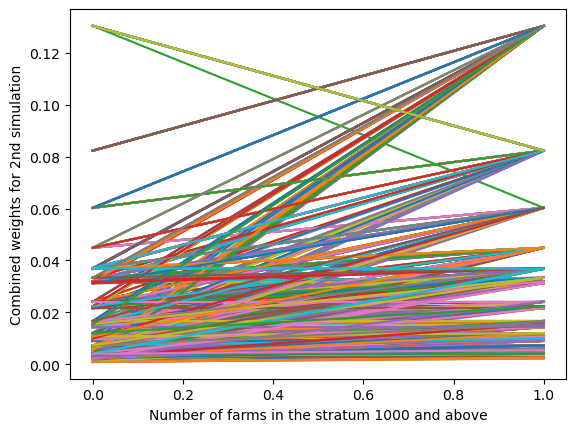

In [3875]:
dicttoshow={}
for i in range(1000):
    dicttoshow[i] = list(points_output.loc[np.where((points_output['boot']==i)&(points_output['farm_siz']==1000))].ave_prob_2)
    
results = pd.DataFrame(dicttoshow)

# results1 = pd.DataFrame({'SAC': value1, 'TD3': value2, 'DDPG': value3,'Boot':value4, 'Boot1':value5, 'Boot1':value6})

results.plot(legend=False)
# plt.legend(loc='lower right')
plt.xlabel("Number of farms in the stratum 1000 and above")
plt.ylabel("Combined weights for 2nd simulation")
# results.plot()


In [3876]:
farm_pd

num_farms  Acreage  0.8_percent_allo  0.8_farm_size  confup95  conflow95  \
0         97       49              3802           39.2  0.817096   0.623687   
1        281      179             40239          143.2  0.795368   0.656830   
2         93      499             37125          399.2  0.857439   0.839671   
3         17      999             13586          799.2  0.857439   0.763044   
4          2     1000              1600          800.0  0.821466   0.704526   

   confupdis95  conflowdis95  originallo  originalhi  originallod  originalhid  
0     0.141422      0.087755    0.264909    0.857439     0.000324     0.585839  
1     0.094070      0.071830    0.175934    0.857439     0.000000     0.585839  
2     0.137861      0.084363    0.335009    0.857439     0.000000     0.585839  
3     0.207859      0.039365    0.037921    0.857439     0.002986     0.585839  
4     0.143466      0.016663    0.704526    0.821466     0.016663     0.143466

In [3877]:
conf = {}

for i in range(2):
    intern = []
    for d in range(1000):
        intern.append(points_output.loc[np.where((points_output['boot']==d)&\
                                               (points_output['farm_siz']==1000))].ave_prob_2.values[i])
    conf[i]=intern

lowerb =[]
upper = []
meanv = []
for i in conf.keys():
    lowerb.append(np.min(conf[i]))
    meanv.append(np.mean(conf[i]))
    upper.append(np.max(conf[i]))
farmsinstr=[i for i in range(len(conf.keys()))]

resulting = pd.DataFrame(
        list(
            zip(farmsinstr,
                lowerb, 
                meanv,
                upper)
        ),
        columns=[
            'farms in stratum',
            'Lower_interval',
            'mean_',
            'Upper_interval']
    )

Text(0, 0.5, 'Combined weights')

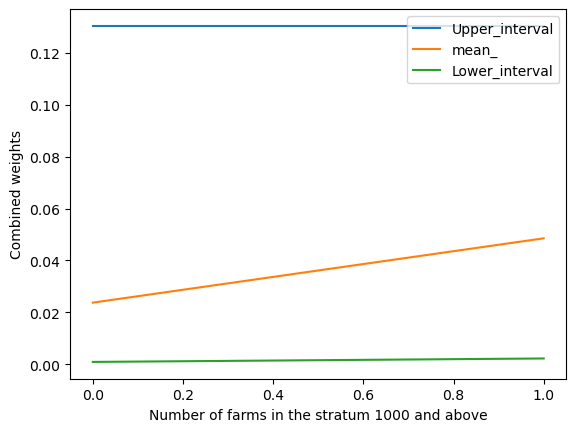

In [3878]:
resulting.Upper_interval.plot()
resulting.mean_.plot()
resulting.Lower_interval.plot()
plt.legend(loc='upper right')
plt.xlabel("Number of farms in the stratum 1000 and above")
plt.ylabel("Combined weights")

In [3855]:
farm_pd

num_farms  Acreage  0.8_percent_allo  0.8_farm_size  confup95  conflow95  \
0         97       49              3802           39.2  0.817096   0.623687   
1        281      179             40239          143.2  0.795368   0.656830   
2         93      499             37125          399.2  0.857439   0.839671   
3         17      999             13586          799.2  0.857439   0.763044   
4          2     1000              1600          800.0  0.821466   0.704526   

   confupdis95  conflowdis95  originallo  originalhi  originallod  originalhid  
0     0.141422      0.087755    0.264909    0.857439     0.000324     0.585839  
1     0.094070      0.071830    0.175934    0.857439     0.000000     0.585839  
2     0.137861      0.084363    0.335009    0.857439     0.000000     0.585839  
3     0.207859      0.039365    0.037921    0.857439     0.002986     0.585839  
4     0.143466      0.016663    0.704526    0.821466     0.016663     0.143466

In [3879]:
conf = {}

for i in range(93):
    intern = []
    for d in range(1000):
        intern.append(plotpnts.loc[np.where((plotpnts['boot']==d)&\
                                               (plotpnts['farm_siz']==499))].Ave_prob.values[i])
    conf[i]=intern

lowerb =[]
upper = []
meanv = []
for i in conf.keys():
    lowerb.append(np.min(conf[i]))
    meanv.append(np.mean(conf[i]))
    upper.append(np.max(conf[i]))
farmsinstr=[i for i in range(len(conf.keys()))]

resulting = pd.DataFrame(
        list(
            zip(farmsinstr,
                lowerb, 
                meanv,
                upper)
        ),
        columns=[
            'farms in stratum',
            'Lower_interval',
            'mean_',
            'Upper_interval']
    )



Text(0, 0.5, 'Combined weights for 1st simulation')

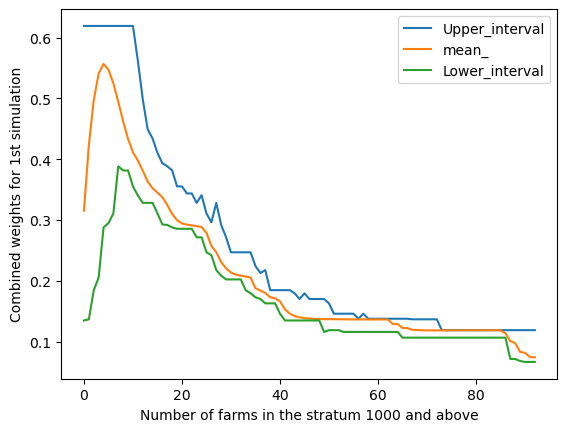

In [3880]:
resulting.Upper_interval.plot()
resulting.mean_.plot()
resulting.Lower_interval.plot()
plt.legend(loc='upper right')
plt.xlabel("Number of farms in the stratum 1000 and above")
plt.ylabel("Combined weights for 1st simulation")

Text(0, 0.5, 'Combined weights for 1st simulation')

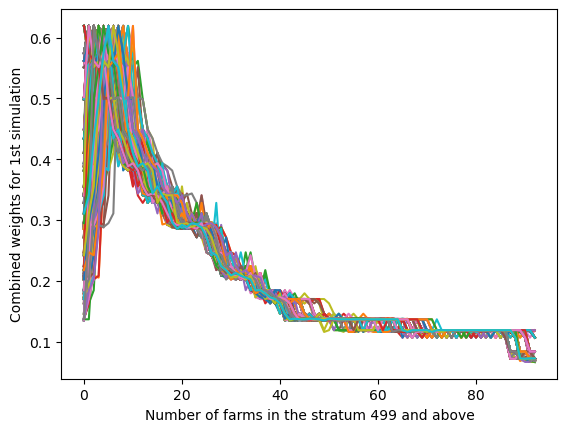

In [3882]:
dicttoshow={}
for i in range(1000):
    dicttoshow[i] = list(plotpnts.loc[np.where((plotpnts['boot']==i)&(plotpnts['farm_siz']==499))].Ave_prob)
    
results = pd.DataFrame(dicttoshow)

# results1 = pd.DataFrame({'SAC': value1, 'TD3': value2, 'DDPG': value3,'Boot':value4, 'Boot1':value5, 'Boot1':value6})

results.plot(legend=False)
# plt.legend(loc='lower right')
plt.xlabel("Number of farms in the stratum 499 and above")
plt.ylabel("Combined weights for 1st simulation")
# results.plot()


In [2952]:
np.quantile(list(plotpnts.loc[np.where((plotpnts['boot']==900)&(plotpnts['farm_siz']==999))].Ave_prob),0.976),\
np.quantile(list(plotpnts.loc[np.where((plotpnts['boot']==900)&(plotpnts['farm_siz']==999))].Ave_prob),0.2)

(0.45751309449950217, 0.170103535349272)

array([[<Axes: title={'center': 'Ave_prob'}>]], dtype=object)

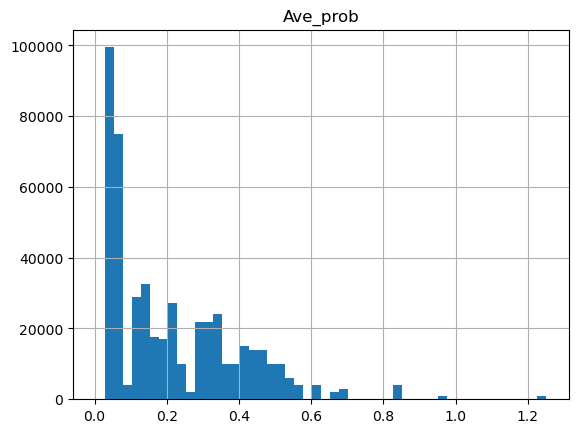

In [2851]:
plotpnts.hist('Ave_prob', bins=50)

### What follows after this line was the first attempt on the simulation and has drastically changed, 
### two new simulations are in place and new graphs have been created above this point to support the results

In [77]:
'''For the new inclusive zones needed changes '''
boot=[]

def generate_random(polygon):
  point = None
  minx, miny, maxx, maxy = polygon.bounds
  while point==None:
      pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
      if polygon.contains(pnt):
          point = (pnt)
  return point

points_output = []
for j in range(1000):

  check_grid =[]
  divis['area_leftover'] = float(0) #make all leftover area be 0
  divis['acres']=divis['geometry'].area*0.0002471
  countapn = 0

  for i,r in farm_pd[::-1].iterrows(): #::-1 to start allocating the bigger farms first
      siz=r.Acreage

      for y in range(int(r['num_farms'])):
          
          inclu_area = divis.sample(n=1) #we first pick a farm to initiate the process

          while float(inclu_area['geometry'].area*0.0002471)<siz and float(inclu_area['area_leftover'])<siz:
              '''While loop if the farm is bigger than zone, AND if farm is bigger than the remaineder area, PICK AGAIN '''

              # print(' PICKED AGAIN CAUSE farm '+str(siz)+' was BIGGER than inclusive '+\
              #       str(float(inclu_area['geometry'].area*0.0002471)), 'area leftover was '+ str(float(inclu_area['area_leftover'])))

              inclu_area = divis.sample(n=1)

          idd = int(inclu_area['new_fid']) #if the farm doesn;t fit in the inclusive zone, pick AGAIN
          # print ('work with this                _________'+str(idd))

          if idd not in check_grid: #this means that we never worked with this specific zone before
#               print ('it was not in checkgrid')

              if float(inclu_area['area_leftover']) == 0: #Making sure that there wasnt leftover area,

                  luoo = np.where(divis['new_fid'] == idd)

                  area_left = (inclu_area['geometry'].area*0.0002471) - siz 

                  divis.loc[[luoo[0][0]],['area_leftover']] = float(area_left.values[0])
                  # divis.loc[idd,'area_leftover']=float(area_left) #We update the appropriate column that will be used again if 
                                                                #same zone is picked again  


                  po_df = gpd.GeoDataFrame(geometry=[generate_random(divis.loc[luoo[0][0]].geometry)],crs=divis.crs)
                  po_df['boot'] = int(j)
                  # po_df['new_fid'] = int(divis.loc[idd,'new_fid'])
                  
                  po_df['new_fid'] = int(divis.loc[[luoo[0][0]]].new_fid.values[0])
                  po_df['farm_siz']=(float(siz))
                  po_df['APN'] = apn[countapn]
                  points_output.append(po_df)

                  # print ('NEWID '+str(divis.loc[idd,'new_fid'])+' FROM '+str(float(inclu_area['geometry'].area*0.0002471))+\
                  #         ' TO the following '+str(float(divis.loc[idd,'area_leftover']))) #had to be changed to a newer format 

                  # print ('NEWID '+str(int(divis.loc[[luoo[0][0]]].new_fid.values[0]))+' FROM '+str(float(inclu_area['geometry'].area*0.0002471))+\
                  #         ' TO the following '+str(divis.loc[[luoo[0][0]],['area_leftover']].values[0][0])) #had to be changed to a newer format 
                  


          if idd in check_grid: # This means that we worked with this zone before and HAS LEFTOVER area
              # the_leftover = float(divis.loc[idd,'area_leftover'])
              the_leftover = float(divis.loc[[luoo[0][0]],['area_leftover']].values[0][0])
              if the_leftover - siz<0: #If we run out of space, PICK AGAIN

                  # print (str(divis.loc[idd,'area_leftover']) +' IT CANNOT FIT '+str(siz)+' which HAS INITIAL SIZE  '+\
                  #         str(float(divis.loc[idd,'geometry'].area*0.0002471))) #had to be reworked
                  # print (str(divis.loc[[luoo[0][0]],['area_leftover']].values[0][0]) +' IT CANNOT FIT '+str(siz)+' which HAS INITIAL SIZE  '+\
                  #         str(float(float(divis.loc[[luoo[0][0]],'acres']))))
                  
                  picked_again = divis.sample(n=1)
                  counter=0

                  updated = None

                  while updated is None :#keep on picking until the farm (siz) can fit
                      counter+=1
                      '''You need to find a way to only store one area of the two above for update otherwise it goes to the negatives'''
                      picked_again = divis.sample(n=1)
                      # print(counter,' WHILELOOP picked ', float(picked_again['area_leftover']), float(picked_again['geometry'].area*0.0002471), \
                      #       ' whileloop newID picked ', int(picked_again['new_fid']))

#                       print(counter,' WHILELOOP picked ', float(picked_again['area_leftover']), float(picked_again['acres']), \
#                             ' whileloop newID picked ', int(picked_again['new_fid']))

                      if float(picked_again['area_leftover'])>siz:
                        updated = float(picked_again['area_leftover'])
                        idd=int(picked_again['new_fid'])
                      if float(picked_again['area_leftover']) == 0.0 and float(picked_again['acres']) > siz:
                        updated = float(picked_again['acres'])
                        idd=int(picked_again['new_fid'])                  

                  # print ('had to fit new area the previous was_____ ',updated,' farm size of ',float(siz))
                  
                  area_update2=updated-siz # Calculate the new leftover area

                  # divis.loc[idd,'area_leftover']=float(area_update2) #was changed 

                  luo = np.where(divis['new_fid'] == idd)


                  divis.loc[[luo[0][0]],['area_leftover']] = float(area_update2)

#                   print(float(area_update2),'and this was the result after fitting')


                  po_df = gpd.GeoDataFrame(geometry=[generate_random(divis.loc[luo[0][0]].geometry)],crs=divis.crs)
                  po_df['boot'] = int(j)
                  po_df['new_fid'] = int(divis.loc[[luo[0][0]]].new_fid.values[0])
                  po_df['farm_siz']=(float(siz))
                  po_df['APN'] = apn[countapn]
                  points_output.append(po_df)



              if the_leftover - siz >0: # Make sure that if we fit a farm, we dont run out of space

                  # print (str(idd)+' was selected before AND IT FITS')

                  # print ('this is the previous____'+str(divis.loc[[luoo[0][0]],['area_leftover']].values[0][0]))
                  
                  # area_update= float(divis.loc[idd,'area_leftover'])-siz
                  area_update= float(divis.loc[[luoo[0][0]],['area_leftover']].values)-siz

                  # divis.loc[idd,'area_leftover']=float(area_update)
                  divis.loc[[luoo[0][0]],['area_leftover']] = float(area_update)

                  # print ('this the new '+str(float(divis.loc[[luoo[0][0]],['area_leftover']].values)))

                  po_df = gpd.GeoDataFrame(geometry=[generate_random(divis.loc[luoo[0][0]].geometry)],crs=divis.crs)
                  po_df['boot'] = int(j)
                  po_df['new_fid'] = int(divis.loc[[luoo[0][0]]].new_fid.values[0])
                  po_df['farm_siz']=(float(siz))
                  po_df['APN'] = apn[countapn]
                  points_output.append(po_df)
          countapn +=1

          if idd not in check_grid:# Carefull where u use this in the itteration
            check_grid.append(idd)  

          lufo = np.where(divis['new_fid'] == idd)
        

  #         print ('___THE FINAL   ' + str(divis.loc[[lufo[0][0]],['area_leftover']].values[0][0]))
  # print ('/                                                               break')
  check_grid =[]
  divis['area_leftover'] = float(0) #make all leftover area be 0
  divis['acres']=divis['geometry'].area*0.0002471
  idd=None
        
  percent_allocated=[float((100*(k['acres']-k['area_leftover']))/k['acres']) if k['area_leftover']>0 else 0.0 for n,k in divis.iterrows()]
  #     divis['prctAREA_used']=percent_allocated


  boot.append(percent_allocated)

  #     del divis['area_leftover']
  #     del divis['prctAREA_used']

  percent_allocated=0
  print ('______________________________________________________________________________________________________________THAT WAS ' +str(j)+ '   boots')
  check_grid =[]
  divis['area_leftover'] = float(0) #make all leftover area be 0
  divis['acres']=divis['geometry'].area*0.0002471
  idd=None

points_output = gpd.GeoDataFrame(pd.concat(points_output,ignore_index=True))
points_output.to_file('out_points_boots')

______________________________________________________________________________________________________________THAT WAS 0   boots
______________________________________________________________________________________________________________THAT WAS 1   boots
______________________________________________________________________________________________________________THAT WAS 2   boots
______________________________________________________________________________________________________________THAT WAS 3   boots
______________________________________________________________________________________________________________THAT WAS 4   boots
______________________________________________________________________________________________________________THAT WAS 5   boots
______________________________________________________________________________________________________________THAT WAS 6   boots
_________________________________________________________________________________________________

______________________________________________________________________________________________________________THAT WAS 64   boots
______________________________________________________________________________________________________________THAT WAS 65   boots
______________________________________________________________________________________________________________THAT WAS 66   boots
______________________________________________________________________________________________________________THAT WAS 67   boots
______________________________________________________________________________________________________________THAT WAS 68   boots
______________________________________________________________________________________________________________THAT WAS 69   boots
______________________________________________________________________________________________________________THAT WAS 70   boots
__________________________________________________________________________________________

______________________________________________________________________________________________________________THAT WAS 127   boots
______________________________________________________________________________________________________________THAT WAS 128   boots
______________________________________________________________________________________________________________THAT WAS 129   boots
______________________________________________________________________________________________________________THAT WAS 130   boots
______________________________________________________________________________________________________________THAT WAS 131   boots
______________________________________________________________________________________________________________THAT WAS 132   boots
______________________________________________________________________________________________________________THAT WAS 133   boots
___________________________________________________________________________________

______________________________________________________________________________________________________________THAT WAS 190   boots
______________________________________________________________________________________________________________THAT WAS 191   boots
______________________________________________________________________________________________________________THAT WAS 192   boots
______________________________________________________________________________________________________________THAT WAS 193   boots
______________________________________________________________________________________________________________THAT WAS 194   boots
______________________________________________________________________________________________________________THAT WAS 195   boots
______________________________________________________________________________________________________________THAT WAS 196   boots
___________________________________________________________________________________

______________________________________________________________________________________________________________THAT WAS 253   boots
______________________________________________________________________________________________________________THAT WAS 254   boots
______________________________________________________________________________________________________________THAT WAS 255   boots
______________________________________________________________________________________________________________THAT WAS 256   boots
______________________________________________________________________________________________________________THAT WAS 257   boots
______________________________________________________________________________________________________________THAT WAS 258   boots
______________________________________________________________________________________________________________THAT WAS 259   boots
___________________________________________________________________________________

______________________________________________________________________________________________________________THAT WAS 316   boots
______________________________________________________________________________________________________________THAT WAS 317   boots
______________________________________________________________________________________________________________THAT WAS 318   boots
______________________________________________________________________________________________________________THAT WAS 319   boots
______________________________________________________________________________________________________________THAT WAS 320   boots
______________________________________________________________________________________________________________THAT WAS 321   boots
______________________________________________________________________________________________________________THAT WAS 322   boots
___________________________________________________________________________________

______________________________________________________________________________________________________________THAT WAS 379   boots
______________________________________________________________________________________________________________THAT WAS 380   boots
______________________________________________________________________________________________________________THAT WAS 381   boots
______________________________________________________________________________________________________________THAT WAS 382   boots
______________________________________________________________________________________________________________THAT WAS 383   boots
______________________________________________________________________________________________________________THAT WAS 384   boots
______________________________________________________________________________________________________________THAT WAS 385   boots
___________________________________________________________________________________

______________________________________________________________________________________________________________THAT WAS 442   boots
______________________________________________________________________________________________________________THAT WAS 443   boots
______________________________________________________________________________________________________________THAT WAS 444   boots
______________________________________________________________________________________________________________THAT WAS 445   boots
______________________________________________________________________________________________________________THAT WAS 446   boots
______________________________________________________________________________________________________________THAT WAS 447   boots
______________________________________________________________________________________________________________THAT WAS 448   boots
___________________________________________________________________________________

______________________________________________________________________________________________________________THAT WAS 505   boots
______________________________________________________________________________________________________________THAT WAS 506   boots
______________________________________________________________________________________________________________THAT WAS 507   boots
______________________________________________________________________________________________________________THAT WAS 508   boots
______________________________________________________________________________________________________________THAT WAS 509   boots
______________________________________________________________________________________________________________THAT WAS 510   boots
______________________________________________________________________________________________________________THAT WAS 511   boots
___________________________________________________________________________________

______________________________________________________________________________________________________________THAT WAS 568   boots
______________________________________________________________________________________________________________THAT WAS 569   boots
______________________________________________________________________________________________________________THAT WAS 570   boots
______________________________________________________________________________________________________________THAT WAS 571   boots
______________________________________________________________________________________________________________THAT WAS 572   boots
______________________________________________________________________________________________________________THAT WAS 573   boots
______________________________________________________________________________________________________________THAT WAS 574   boots
___________________________________________________________________________________

______________________________________________________________________________________________________________THAT WAS 631   boots
______________________________________________________________________________________________________________THAT WAS 632   boots
______________________________________________________________________________________________________________THAT WAS 633   boots
______________________________________________________________________________________________________________THAT WAS 634   boots
______________________________________________________________________________________________________________THAT WAS 635   boots
______________________________________________________________________________________________________________THAT WAS 636   boots
______________________________________________________________________________________________________________THAT WAS 637   boots
___________________________________________________________________________________

______________________________________________________________________________________________________________THAT WAS 694   boots
______________________________________________________________________________________________________________THAT WAS 695   boots
______________________________________________________________________________________________________________THAT WAS 696   boots
______________________________________________________________________________________________________________THAT WAS 697   boots
______________________________________________________________________________________________________________THAT WAS 698   boots
______________________________________________________________________________________________________________THAT WAS 699   boots
______________________________________________________________________________________________________________THAT WAS 700   boots
___________________________________________________________________________________

______________________________________________________________________________________________________________THAT WAS 757   boots
______________________________________________________________________________________________________________THAT WAS 758   boots
______________________________________________________________________________________________________________THAT WAS 759   boots
______________________________________________________________________________________________________________THAT WAS 760   boots
______________________________________________________________________________________________________________THAT WAS 761   boots
______________________________________________________________________________________________________________THAT WAS 762   boots
______________________________________________________________________________________________________________THAT WAS 763   boots
___________________________________________________________________________________

______________________________________________________________________________________________________________THAT WAS 820   boots
______________________________________________________________________________________________________________THAT WAS 821   boots
______________________________________________________________________________________________________________THAT WAS 822   boots
______________________________________________________________________________________________________________THAT WAS 823   boots
______________________________________________________________________________________________________________THAT WAS 824   boots
______________________________________________________________________________________________________________THAT WAS 825   boots
______________________________________________________________________________________________________________THAT WAS 826   boots
___________________________________________________________________________________

______________________________________________________________________________________________________________THAT WAS 883   boots
______________________________________________________________________________________________________________THAT WAS 884   boots
______________________________________________________________________________________________________________THAT WAS 885   boots
______________________________________________________________________________________________________________THAT WAS 886   boots
______________________________________________________________________________________________________________THAT WAS 887   boots
______________________________________________________________________________________________________________THAT WAS 888   boots
______________________________________________________________________________________________________________THAT WAS 889   boots
___________________________________________________________________________________

______________________________________________________________________________________________________________THAT WAS 946   boots
______________________________________________________________________________________________________________THAT WAS 947   boots
______________________________________________________________________________________________________________THAT WAS 948   boots
______________________________________________________________________________________________________________THAT WAS 949   boots
______________________________________________________________________________________________________________THAT WAS 950   boots
______________________________________________________________________________________________________________THAT WAS 951   boots
______________________________________________________________________________________________________________THAT WAS 952   boots
___________________________________________________________________________________

In [520]:
%pwd

'C:\\Users\\zenus\\Downloads\\Resilio_box_desktop\\Proposal\\PADUS_2_0'

In [521]:
points_output = gpd.read_file('C:/Users/zenus/Downloads/Resilio_box_desktop/Proposal/figshare_Dijks/decenter_boots/decenter_boots.shp')

In [522]:
points_output

boot  new_fid  farm_siz           APN de_center  \
0          0       32    1000.0  131709000001     32_14   
1          0        5    1000.0  131900000110       5_5   
2          0       23     999.0  120328000001     23_17   
3          0       27     999.0  120100000053      27_4   
4          0       34     999.0  120124000006      34_6   
...      ...      ...       ...           ...       ...   
489995   999       51      49.0  157936000001     51_19   
489996   999       29      49.0  131704000042      29_5   
489997   999       18      49.0  146534000021      18_2   
489998   999        1      49.0  146534000022       1_3   
489999   999       28      49.0  157725001001      28_1   

                              geometry  
0       POINT (467841.039 4437882.251)  
1       POINT (473280.375 4456688.908)  
2       POINT (491883.642 4430492.960)  
3       POINT (481699.458 4455714.672)  
4       POINT (479906.479 4432963.843)  
...                                ...  
489995  POINT (458161.117 4434511.410)  
489996  POINT (495220.173 4454689.849)  
489997  POINT (482757.113 4420114.229)  
489998  POINT (461487.352 4446498.650)  
489999  POINT (493828.709 4445344.042)  

[490000 rows x 6 columns]

In [16]:
scor = 'C:/Users/zenus/Downloads/Resilio_box_desktop/Proposal/figshare_Dijks/decenter_boots/decenter_boots.shp'
points_output = gpd.read_file(scor)

In [523]:
points_output.loc[np.where((points_output['farm_siz']==499)&(points_output['boot']==39))]

boot  new_fid  farm_siz           APN de_center  \
19129    39       34     499.0  119900000002      34_5   
19130    39       34     499.0  120509003001      34_6   
19131    39       23     499.0  120334000011     23_18   
19132    39       48     499.0  146518001003     48_11   
19133    39       44     499.0  158128000016      44_2   
...     ...      ...       ...           ...       ...   
19217    39       27     499.0  158300301001      27_4   
19218    39       27     499.0  131536000031      27_4   
19219    39       27     499.0  157731000002      27_4   
19220    39       27     499.0  157935000006      27_4   
19221    39       27     499.0  120516000014      27_4   

                             geometry  
19129  POINT (479228.395 4432689.387)  
19130  POINT (480357.497 4432775.388)  
19131  POINT (493151.043 4431419.794)  
19132  POINT (491228.523 4424407.698)  
19133  POINT (491083.023 4435040.768)  
...                               ...  
19217  POINT (475534.882 4456473.223)  
19218  POINT (479050.130 4453926.469)  
19219  POINT (483686.146 4451679.637)  
19220  POINT (478347.738 4454805.096)  
19221  POINT (479961.922 4451352.456)  

[93 rows x 6 columns]

In [524]:
for f,z in farm_pd.iterrows():
  analyze =points_output[points_output['farm_siz']==z['Acreage']]
  # name = str(z['0.8_farm_size']).split('.')[-2]
  name = str(z['Acreage'])
  divis['count_'+str(name)] = int(0)
  for i,j in divis.iterrows():
    countem = np.count_nonzero(np.where(analyze['new_fid']==j['new_fid']))
    fod=np.where(divis['new_fid']==j['new_fid'])
    print (countem,j['new_fid'],z['Acreage'],j['acres'])
    divis['count_'+str(name)][fod[0][0]] = countem
#     divis.loc[j['new_fid'],'count_'+str(name)] = countem
#   # divis['f_size'+str(z['Acreage'])]=countem

2307 1 49.0 6653.064344419821
2279 2 49.0 5838.232297659914
2214 3 49.0 5221.790503883301
2177 4 49.0 4589.345380433277
1671 5 49.0 2143.5228143459117
1382 6 49.0 2099.7337374995977
1672 7 49.0 2737.5321824883813
1075 8 49.0 1533.7403830708436
209 9 49.0 714.8272952256895
1104 10 49.0 1908.777384151397
879 14 49.0 1234.9502285786828
1639 15 49.0 2528.5282893742165
1634 16 49.0 2628.2227871486057
2145 17 49.0 4864.77184827861
2315 18 49.0 7784.296043015587
2308 19 49.0 5038.071357938481
2315 20 49.0 7756.524907210997
2179 21 49.0 5131.566955042523
2318 22 49.0 4626.339664908878
2014 23 49.0 3797.162795682734
2084 24 49.0 3347.233008601176
2385 25 49.0 11531.630077197242
2176 26 49.0 4326.733303186229
2296 27 49.0 13439.658885161703
2211 28 49.0 344.5969088287824
1968 29 49.0 3218.371284663388
2044 30 49.0 3170.893185097172
1496 31 49.0 2128.4231515982688
2292 32 49.0 7690.6780010077655
2191 33 49.0 4579.326583171265
1417 34 49.0 2376.2819484793195
1581 36 49.0 1815.2622872419356
1820 37

C:\Users\zenus\AppData\Local\Temp\ipykernel_33800\518855761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  divis['count_'+str(name)][fod[0][0]] = countem
C:\Users\zenus\AppData\Local\Temp\ipykernel_33800\518855761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  divis['count_'+str(name)][fod[0][0]] = countem
C:\Users\zenus\AppData\Local\Temp\ipykernel_33800\518855761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  divis[

353 1 999.0 6653.064344419821
351 2 999.0 5838.232297659914
382 3 999.0 5221.790503883301
312 4 999.0 4589.345380433277
358 5 999.0 2143.5228143459117
337 6 999.0 2099.7337374995977
353 7 999.0 2737.5321824883813
300 8 999.0 1533.7403830708436
0 9 999.0 714.8272952256895
279 10 999.0 1908.777384151397
269 14 999.0 1234.9502285786828
344 15 999.0 2528.5282893742165
354 16 999.0 2628.2227871486057
372 17 999.0 4864.77184827861
364 18 999.0 7784.296043015587
373 19 999.0 5038.071357938481
359 20 999.0 7756.524907210997
371 21 999.0 5131.566955042523
318 22 999.0 4626.339664908878
378 23 999.0 3797.162795682734
358 24 999.0 3347.233008601176
393 25 999.0 11531.630077197242
400 26 999.0 4326.733303186229
383 27 999.0 13439.658885161703
0 28 999.0 344.5969088287824
359 29 999.0 3218.371284663388
357 30 999.0 3170.893185097172
324 31 999.0 2128.4231515982688
380 32 999.0 7690.6780010077655
369 33 999.0 4579.326583171265
331 34 999.0 2376.2819484793195
295 36 999.0 1815.2622872419356
333 37 99

C:\Users\zenus\AppData\Local\Temp\ipykernel_33800\518855761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  divis['count_'+str(name)][fod[0][0]] = countem
C:\Users\zenus\AppData\Local\Temp\ipykernel_33800\518855761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  divis['count_'+str(name)][fod[0][0]] = countem


In [525]:
divis

neighb     Shape_Leng    Shape_Area  \
0        1  193576.263600  2.692458e+07   
1        2   76732.604800  2.362700e+07   
2        3  149735.368728  2.113230e+07   
3        4   55450.304400  1.857283e+07   
4        5   17338.442800  8.674718e+06   
5        6   37875.592400  8.497506e+06   
6        7   52378.817800  1.107864e+07   
7        8   61084.389200  6.206962e+06   
8        9   15702.740800  2.892866e+06   
9       10   83417.528770  7.724716e+06   
10      14   29951.523800  4.997775e+06   
11      15   73433.764481  1.023281e+07   
12      16   55086.815600  1.063627e+07   
13      17   77768.549600  1.968746e+07   
14      18  102776.617200  3.150261e+07   
15      19  212041.522600  2.038880e+07   
16      20  260967.188600  3.139023e+07   
17      21  234596.037200  2.076717e+07   
18      22  181871.902000  1.872254e+07   
19      23  109810.140800  1.536691e+07   
20      24   46617.511200  1.354607e+07   
21      25  201627.554600  4.666787e+07   
22      26  120096.886200  1.751005e+07   
23      27  136781.048400  5.438955e+07   
24      28   23147.725578  1.394565e+06   
25      29   45458.988235  1.302457e+07   
26      30  175401.794200  1.283243e+07   
27      31  170930.876000  8.613610e+06   
28      32  208043.137000  3.112375e+07   
29      33   76496.336600  1.853228e+07   
30      34   82818.686287  9.616681e+06   
31      36   69299.632252  7.346266e+06   
32      37  112881.622800  8.788262e+06   
33      38   33979.568149  5.289405e+06   
34      40   21434.405427  1.991821e+06   
35      41  103612.643600  1.661268e+07   
36      42   68161.108584  8.900152e+06   
37      43  142637.663267  1.291393e+07   
38      44   31696.272200  7.907735e+06   
39      45   75948.025305  1.188002e+07   
40      46   78277.435400  2.288975e+07   
41      47   88402.703472  2.373174e+07   
42      48   74876.935682  7.539843e+06   
43      49  108247.138400  1.214092e+07   
44      50   73786.336214  8.994711e+06   
45      51  224145.719000  1.175991e+07   
46      52  194822.846913  6.845730e+07   
47      11   50325.101800  5.837674e+06   
48      12   31496.354600  9.195206e+06   
49      13   42164.768000  1.316480e+07   
50      35   76041.975000  2.480514e+07   
51      39  158527.066342  5.182654e+07   

                                             geometry         acres  new_fid  \
0   MULTIPOLYGON (((460150.702 4447016.716, 460150...   6653.064344        1   
1   MULTIPOLYGON (((484686.234 4445408.276, 484686...   5838.232298        2   
2   MULTIPOLYGON (((487784.981 4443845.271, 487784...   5221.790504        3   
3   MULTIPOLYGON (((488775.489 4451224.105, 488775...   4589.345380        4   
4   POLYGON ((472127.676 4454595.469, 472127.676 4...   2143.522814        5   
5   MULTIPOLYGON (((458996.623 4453432.303, 458996...   2099.733737        6   
6   MULTIPOLYGON (((463122.227 4449733.799, 463285...   2737.532182        7   
7   MULTIPOLYGON (((458923.925 4444953.914, 458923...   1533.740383        8   
8   MULTIPOLYGON (((455552.561 4441473.503, 455498...    714.827295        9   
9   MULTIPOLYGON (((465766.612 4418455.539, 465766...   1908.777384       10   
10  MULTIPOLYGON (((486349.198 4419409.698, 486349...   1234.950229       14   
11  MULTIPOLYGON (((483886.557 4436402.827, 483886...   2528.528289       15   
12  MULTIPOLYGON (((480542.455 4434539.943, 480542...   2628.222787       16   
13  MULTIPOLYGON (((477498.232 4434258.239, 477498...   4864.771848       17   
14  MULTIPOLYGON (((480060.832 4419773.188, 480060...   7784.296043       18   
15  MULTIPOLYGON (((454871.019 4424007.839, 454871...   5038.071358       19   
16  MULTIPOLYGON (((469301.547 4429478.354, 469283...   7756.524907       20   
17  MULTIPOLYGON (((458551.348 4424616.684, 458551...   5131.566955       21   
18  MULTIPOLYGON (((461541.048 4436902.624, 461541...   4626.339665       22   
19  MULTIPOLYGON (((490683.809 4427724.518, 490683...   3797.162796       23   
20  MULTIPOLYGON (((491183.606 4437420.597, 

In [526]:
# sorted_df = divis.sort_values(by=['count_499.0'], ascending=True)
# sorted_df['neighb'][::-1].values

In [527]:
farmpdd= farm_pd.copy()

In [528]:
farmpdd

num_farms  Acreage  0.8_percent_allo  0.8_farm_size
0         97       49              3802           39.2
1        281      179             40239          143.2
2         93      499             37125          399.2
3         17      999             13586          799.2
4          2     1000              1600          800.0

In [529]:
first_choice = {}
second_choice=[]
third_choice = []
fourth_choice = []

for f,z in farmpdd.iterrows():
    second_choice=[]
    sorted_df = divis.sort_values(by=['count_'+str(z['Acreage'])], ascending=True)
    first_choice['choice_'+str(f)] = sorted_df['neighb'][::-1].values[0:15]
    second_choice.append(sorted_df['neighb'][::-1].values[0:15])
    if len(farmpdd.keys()) <14 :
        for i,y in enumerate(second_choice[0]):
            farmpdd['choice_'+str(f)] = y
            print('yes')
#     if 'choice' in farmpdd.keys()[4]:
#         farmpdd[str(f)+'_choice'] = first_choice[0]
#         print(f)
        
#     first_choice.append(np.where(divis['count_'+str(z['Acreage'])]==np.sort(divis['count_'+str(z['Acreage'])])[-1])[0][0])
#     second_choice.append(np.where(divis['count_'+str(z['Acreage'])]==np.sort(divis['count_'+str(z['Acreage'])])[-2])[0][0])
#     third_choice.append(np.where(divis['count_'+str(z['Acreage'])]==np.sort(divis['count_'+str(z['Acreage'])])[-3])[0][0])
#     fourth_choice.append(np.where(divis['count_'+str(z['Acreage'])]==np.sort(divis['count_'+str(z['Acreage'])])[-4])[0][0])
# farm_pd['first_choice_zone']=first_choice
# farm_pd['second_choice_zone']=second_choice
# farm_pd['third_choice']=third_choice
# farm_pd['fourth_choice']=fourth_choice
# farm_pd

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [530]:
for i in np.arange(len(farmpdd)):
    farmpdd.loc[i, ['choice_0','choice_1','choice_2','choice_3','choice_4','choice_5','choice_6','choice_7','choice_8',\
                    'choice_9','choice_10','choice_11','choice_12','choice_13','choice_14']] \
    = list(list(first_choice.values())[i])
#     print(i)

In [531]:
farmpdd = farmpdd.astype(int)
farmpdd

num_farms  Acreage  0.8_percent_allo  0.8_farm_size  choice_0  choice_1  \
0         97       49              3802             39        46        25   
1        281      179             40239            143        46        52   
2         93      499             37125            399        39        18   
3         17      999             13586            799        35        26   
4          2     1000              1600            800        51        48   

   choice_2  choice_3  choice_4  choice_5  choice_6  choice_7  choice_8  \
0        52        39        22        18        20        19         1   
1        27        39        18        32        25        20         1   
2        20        32        27        46        22         4         1   
3        25        27         3        32        23        19        17   
4        47        15        41        13        24        27        34   

   choice_9  choice_10  choice_11  choice_12  choice_13  choice_14  
0        27         32          2         35         47          3  
1         2         35         47          3         17         19  
2        25          2         21          3         35         47  
3        47         21         33         41         52         49  
4         7         49         16         50         46         33

In [532]:
divis

neighb     Shape_Leng    Shape_Area  \
0        1  193576.263600  2.692458e+07   
1        2   76732.604800  2.362700e+07   
2        3  149735.368728  2.113230e+07   
3        4   55450.304400  1.857283e+07   
4        5   17338.442800  8.674718e+06   
5        6   37875.592400  8.497506e+06   
6        7   52378.817800  1.107864e+07   
7        8   61084.389200  6.206962e+06   
8        9   15702.740800  2.892866e+06   
9       10   83417.528770  7.724716e+06   
10      14   29951.523800  4.997775e+06   
11      15   73433.764481  1.023281e+07   
12      16   55086.815600  1.063627e+07   
13      17   77768.549600  1.968746e+07   
14      18  102776.617200  3.150261e+07   
15      19  212041.522600  2.038880e+07   
16      20  260967.188600  3.139023e+07   
17      21  234596.037200  2.076717e+07   
18      22  181871.902000  1.872254e+07   
19      23  109810.140800  1.536691e+07   
20      24   46617.511200  1.354607e+07   
21      25  201627.554600  4.666787e+07   
22      26  120096.886200  1.751005e+07   
23      27  136781.048400  5.438955e+07   
24      28   23147.725578  1.394565e+06   
25      29   45458.988235  1.302457e+07   
26      30  175401.794200  1.283243e+07   
27      31  170930.876000  8.613610e+06   
28      32  208043.137000  3.112375e+07   
29      33   76496.336600  1.853228e+07   
30      34   82818.686287  9.616681e+06   
31      36   69299.632252  7.346266e+06   
32      37  112881.622800  8.788262e+06   
33      38   33979.568149  5.289405e+06   
34      40   21434.405427  1.991821e+06   
35      41  103612.643600  1.661268e+07   
36      42   68161.108584  8.900152e+06   
37      43  142637.663267  1.291393e+07   
38      44   31696.272200  7.907735e+06   
39      45   75948.025305  1.188002e+07   
40      46   78277.435400  2.288975e+07   
41      47   88402.703472  2.373174e+07   
42      48   74876.935682  7.539843e+06   
43      49  108247.138400  1.214092e+07   
44      50   73786.336214  8.994711e+06   
45      51  224145.719000  1.175991e+07   
46      52  194822.846913  6.845730e+07   
47      11   50325.101800  5.837674e+06   
48      12   31496.354600  9.195206e+06   
49      13   42164.768000  1.316480e+07   
50      35   76041.975000  2.480514e+07   
51      39  158527.066342  5.182654e+07   

                                             geometry         acres  new_fid  \
0   MULTIPOLYGON (((460150.702 4447016.716, 460150...   6653.064344        1   
1   MULTIPOLYGON (((484686.234 4445408.276, 484686...   5838.232298        2   
2   MULTIPOLYGON (((487784.981 4443845.271, 487784...   5221.790504        3   
3   MULTIPOLYGON (((488775.489 4451224.105, 488775...   4589.345380        4   
4   POLYGON ((472127.676 4454595.469, 472127.676 4...   2143.522814        5   
5   MULTIPOLYGON (((458996.623 4453432.303, 458996...   2099.733737        6   
6   MULTIPOLYGON (((463122.227 4449733.799, 463285...   2737.532182        7   
7   MULTIPOLYGON (((458923.925 4444953.914, 458923...   1533.740383        8   
8   MULTIPOLYGON (((455552.561 4441473.503, 455498...    714.827295        9   
9   MULTIPOLYGON (((465766.612 4418455.539, 465766...   1908.777384       10   
10  MULTIPOLYGON (((486349.198 4419409.698, 486349...   1234.950229       14   
11  MULTIPOLYGON (((483886.557 4436402.827, 483886...   2528.528289       15   
12  MULTIPOLYGON (((480542.455 4434539.943, 480542...   2628.222787       16   
13  MULTIPOLYGON (((477498.232 4434258.239, 477498...   4864.771848       17   
14  MULTIPOLYGON (((480060.832 4419773.188, 480060...   7784.296043       18   
15  MULTIPOLYGON (((454871.019 4424007.839, 454871...   5038.071358       19   
16  MULTIPOLYGON (((469301.547 4429478.354, 469283...   7756.524907       20   
17  MULTIPOLYGON (((458551.348 4424616.684, 458551...   5131.566955       21   
18  MULTIPOLYGON (((461541.048 4436902.624, 461541...   4626.339665       22   
19  MULTIPOLYGON (((490683.809 4427724.518, 490683...   3797.162796       23   
20  MULTIPOLYGON (((491183.606 4437420.597, 

In [533]:
from matplotlib import pyplot as plt

In [534]:
# divis = divis.rename(columns = {'count_9.0':'count_9'})
divis = divis.rename(columns = {'count_49.0':'count_49'})
divis = divis.rename(columns = {'count_179.0':'count_179'})
divis = divis.rename(columns = {'count_499.0':'count_499'})
divis = divis.rename(columns = {'count_999.0':'count_999'})
divis = divis.rename(columns = {'count_1000.0':'count_1000'})

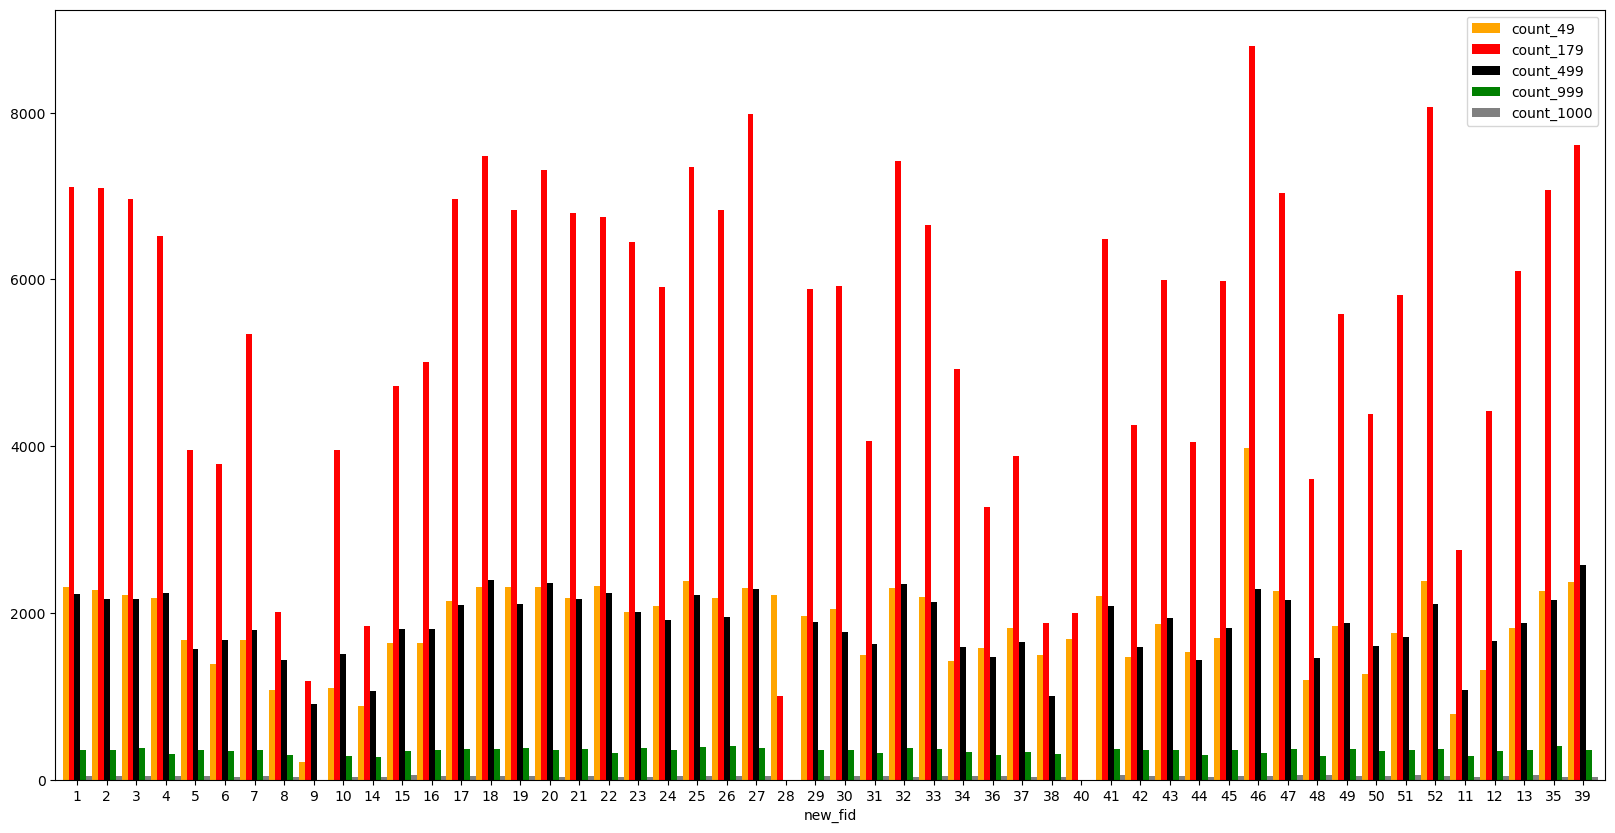

In [535]:
plt.rcParams["figure.figsize"] = (20, 10)

# divis.plot.bar(x='new_fid',y='count_999.0',rot=0)
divis.plot.bar(x='new_fid',y=['count_49','count_179','count_499','count_999','count_1000'],\
               rot=0,color=['orange','red','black','green','grey'], width=1)

# divis.set_ylabel('Acres of inclusive zones',fontsize=16)
# ax.set_xlabel('ID of Inclusive zone', fontsize=16)
# ax2.set_ylabel('# of times farms allocated in each zone',fontsize=16)

#seperate bar plots
#add the number of farms*boot allocations, how many farms does any inclusive zone gets in an itteration, how many inclusive zones does any farm get allocated to
#use 6% slope ? and exclude area from inclusive zones 
#find the upper limit of 8th class 2000 Acres and above
#re-run with the 1000 times
# if we add up the parcel acres and usda acres are they the same
#split up the farm parcels into similar grouping as USDA 


plt.show()

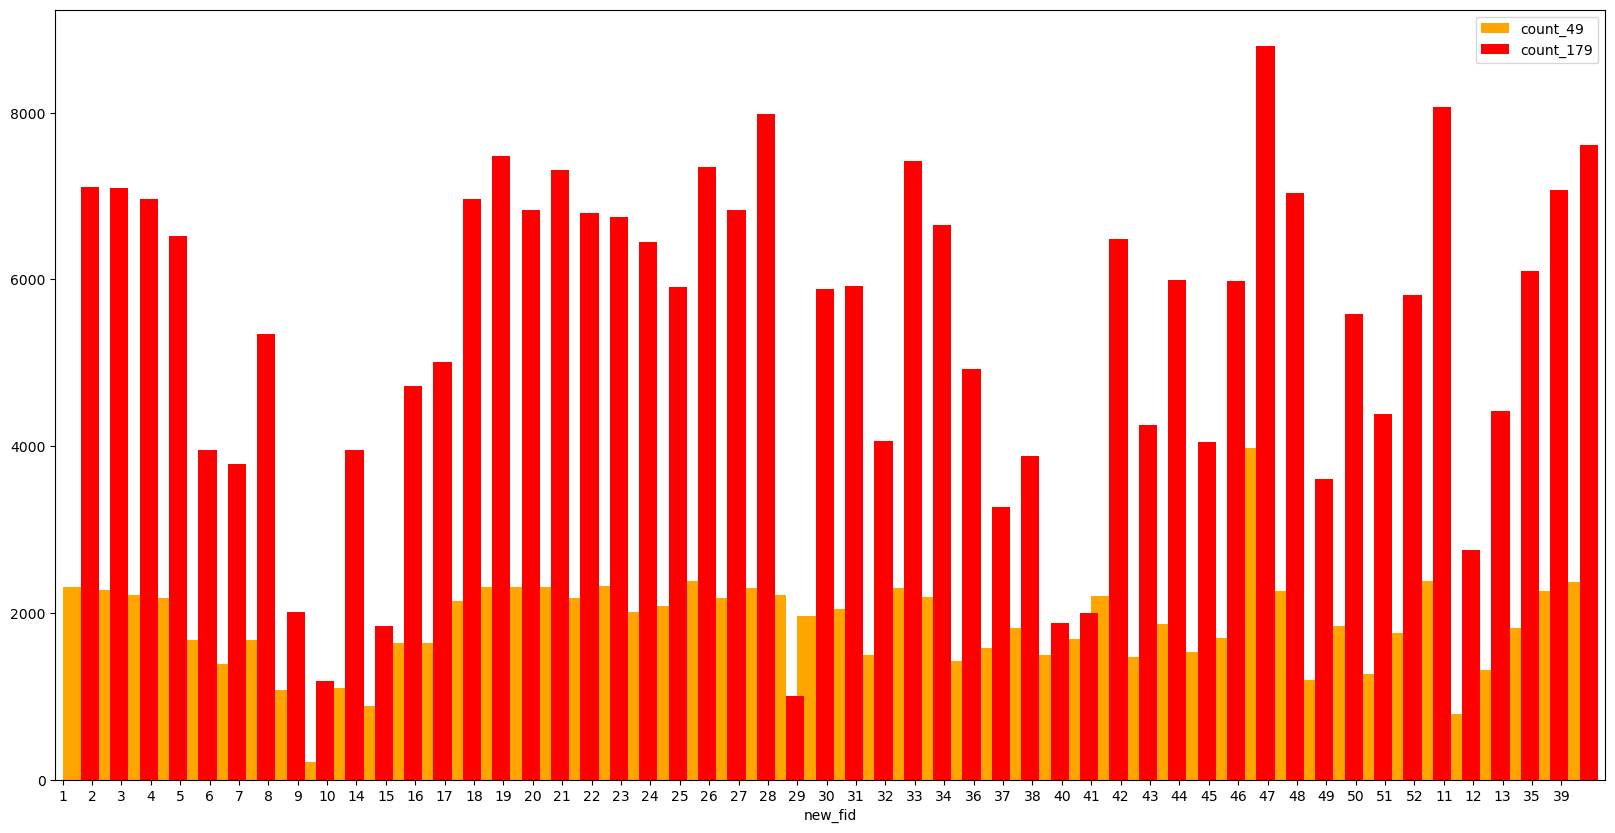

In [536]:
plt.rcParams["figure.figsize"] = (20, 10)

# divis.plot.bar(x='new_fid',y='count_999.0',rot=0)
divis.plot.bar(x='new_fid',y=['count_49','count_179'],\
               rot=0,color=['orange','red'], align = 'edge', width=1.24)

# divis.set_ylabel('Acres of inclusive zones',fontsize=16)
# ax.set_xlabel('ID of Inclusive zone', fontsize=16)
# ax2.set_ylabel('# of times farms allocated in each zone',fontsize=16)

#seperate bar plots
#add the number of farms*boot allocations, how many farms does any inclusive zone gets in an itteration, how many inclusive zones does any farm get allocated to
#use 6% slope ? and exclude area from inclusive zones 
#find the upper limit of 8th class 2000 Acres and above
#re-run with the 1000 times
# if we add up the parcel acres and usda acres are they the same
#split up the farm parcels into similar grouping as USDA 


plt.show()

In [103]:
points_output.loc[np.where((points_output['boot']==99) & (points_output['new_fid']==3))].values

array([[99, 3, 499.0, '157725000011', <POINT (485590.003 4449719.726)>],
       [99, 3, 499.0, '145736000019', <POINT (487753.279 4446823.087)>],
       [99, 3, 499.0, '157721000061', <POINT (486279.723 4447233.33)>],
       [99, 3, 179.0, '131515400012', <POINT (485684.108 4445018.986)>],
       [99, 3, 179.0, '131533000024', <POINT (486140.819 4445201.645)>],
       [99, 3, 179.0, '132100000030', <POINT (486197.142 4445471.169)>],
       [99, 3, 179.0, '145902000002', <POINT (486641.728 4448843.548)>],
       [99, 3, 179.0, '145911000019', <POINT (486731.507 4449654.984)>],
       [99, 3, 179.0, '146505000001', <POINT (484140.889 4449644.465)>],
       [99, 3, 179.0, '146503000003', <POINT (486194.541 4450192.522)>],
       [99, 3, 179.0, '158311000029', <POINT (485800.135 4445608.875)>],
       [99, 3, 179.0, '146514022003', <POINT (485579.948 4445308.637)>],
       [99, 3, 49.0, '157517219005', <POINT (482786.793 4449564.151)>]],
      dtype=object)

In [104]:
np.sum(points_output.loc[np.where((points_output['boot']==9) & (points_output['new_fid']==4))]['farm_siz'])

1226.0

In [25]:
divis['neighb'][0]

1

In [42]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


In [537]:
divis100 = divis

In [32]:
pos = np.where(divis100['count_49'] == np.sort(divis100['count_49'])[-2])
pos[0][0]

48

In [33]:
np.sort(divis100['count_49'])[-3]

2367

In [111]:
np.where(divis100['count_49'] == np.sort(divis100['count_49'])[-2])[0][0]

48

In [43]:
steps = [0.000001,0.00001,0.0001,0.001,0.01,0.1]
upperstep = [0.000006,0.00006,0.0006,0.006,0.06,0.6]

oppositesteps = [0.1,0.01,0.001,0.0001,0.00001,0.000001]
oppositeupper = [0.6, 0.06, 0.006, 0.0006, 0.00006, 0.000006]

In [41]:
# steps = [0.000001,0.001,0.01,0.1,1,10]
# upperstep = [0.000006,0.006,0.06,0.6,6,60]

In [44]:
score, oppositescore = [], []
for i in range(len(upperstep)):
#     for y in steps:
# #         print(upperstep[y])
    print(np.arange(0,upperstep[i],steps[i]))
    score.extend(np.arange(0,upperstep[i],steps[i]))
    oppositescore.extend(np.arange(0,oppositeupper[i],oppositesteps[i]))

[0.e+00 1.e-06 2.e-06 3.e-06 4.e-06 5.e-06]
[0.e+00 1.e-05 2.e-05 3.e-05 4.e-05 5.e-05]
[0.     0.0001 0.0002 0.0003 0.0004 0.0005]
[0.    0.001 0.002 0.003 0.004 0.005]
[0.   0.01 0.02 0.03 0.04 0.05]
[0.  0.1 0.2 0.3 0.4 0.5]


In [45]:
score[5] , score[21]

(4.9999999999999996e-06, 0.003)

In [46]:
score[-21] = 0.0003
score[-27] = 3e-05
score[-3] = 0.3
score[-31] = 5e-06


In [47]:
oppositescore[21] = 0.0003
oppositescore[27] = 3e-05
oppositescore [3] = 0.3
oppositescore[35] = 5e-06

In [48]:
idpref, idopposite = [] , []
for y in reversed(farm_pd['Acreage']):
    for i in reversed(range(-6,0)):
#         print(divis100['new_fid'].loc[divis100['count_'+str(y)].sort_values().keys()[i]])
        idpref.append('count_'+str(y)+'_'+str(divis100['new_fid'].loc[divis100['count_'+str(y)].sort_values().keys()[i]]))
        idopposite.append('count_'+str(y)+'_'+str(divis100['new_fid'].loc[divis100['count_'+str(y)].sort_values().keys()[i]]))

In [49]:
dictscore = {}
oppositedict = {}
for i in range(len(idpref)):
#     print(idpref[i],score[i])
    dictscore[idpref[i]] = score[i]
    oppositedict[idopposite[i]] = oppositescore[i]

In [196]:
dictscore

{'count_1000_51': 0.0,
 'count_1000_48': 1e-06,
 'count_1000_47': 2e-06,
 'count_1000_15': 3e-06,
 'count_1000_41': 4e-06,
 'count_1000_55': 5e-06,
 'count_999_56': 0.0,
 'count_999_26': 1e-05,
 'count_999_25': 2e-05,
 'count_999_27': 3e-05,
 'count_999_3': 4e-05,
 'count_999_32': 5e-05,
 'count_499_57': 0.0,
 'count_499_18': 0.0001,
 'count_499_20': 0.0002,
 'count_499_32': 0.0003,
 'count_499_27': 0.0004,
 'count_499_46': 0.0005,
 'count_179_52': 0.0,
 'count_179_27': 0.001,
 'count_179_57': 0.002,
 'count_179_18': 0.003,
 'count_179_32': 0.004,
 'count_179_25': 0.005,
 'count_49_25': 0.0,
 'count_49_52': 0.01,
 'count_49_57': 0.02,
 'count_49_46': 0.03,
 'count_49_22': 0.04,
 'count_49_18': 0.05}

In [51]:
for i in points_output.loc[np.where((points_output['boot']==53) & (points_output['new_fid']==27))].values:
    print(i)
    if str(i[1]) == list(dictscore.keys())[6].split('_')[-1] and str(int(i[2]))==list(dictscore.keys())[6].split('_')[-2]:
        print(list(dictscore.values())[6])

[53 27 999.0 '131900000084' '27_4' <POINT (481865.506 4454968.58)>]
[53 27 999.0 '131731000002' '27_4' <POINT (480070.622 4455427.401)>]
[53 27 179.0 '157910000040' '27_4' <POINT (485119.921 4456820.231)>]
[53 27 179.0 '146502003001' '27_4' <POINT (484741.421 4453269.494)>]
[53 27 179.0 '119900000001' '27_4' <POINT (479632.843 4451712.355)>]
[53 27 179.0 '120113000073' '27_4' <POINT (479342.485 4452902.654)>]
[53 27 179.0 '120514000005' '27_4' <POINT (479096.479 4452026.678)>]
[53 27 179.0 '146503000003' '27_4' <POINT (481644.585 4452813.705)>]
[53 27 179.0 '157523000018' '27_4' <POINT (484155.858 4454371.537)>]
[53 27 179.0 '120322000020' '27_4' <POINT (479948.623 4452440.879)>]
[53 27 179.0 '132118000033' '27_4' <POINT (482229.147 4454792.717)>]
[53 27 179.0 '131534000048' '27_4' <POINT (478574.094 4452822.338)>]
[53 27 49.0 '131521000014' '27_4' <POINT (475874.499 4454860.164)>]
[53 27 49.0 '146516005001' '27_4' <POINT (478843.553 4455312.605)>]


In [55]:
# for k in range(0,1000):
#     for i in points_output.loc[np.where((points_output['boot']==k) & (points_output['new_fid']==27))].values:
#         print(i)
#         if str(i[1]) == list(dictscore.keys())[6].split('_')[-1] and str(int(i[2]))==list(dictscore.keys())[6].split('_')[-2]:
#             print(list(dictscore.values())[6] , k)

In [52]:
idlist = [i.split('_')[-1] for i,n in dictscore.items()]

In [119]:
idlist

['51',
 '48',
 '47',
 '15',
 '41',
 '55',
 '56',
 '26',
 '25',
 '27',
 '3',
 '32',
 '57',
 '18',
 '20',
 '32',
 '27',
 '46',
 '52',
 '27',
 '57',
 '18',
 '32',
 '25',
 '25',
 '52',
 '57',
 '46',
 '22',
 '18']

In [120]:
points_output

boot  new_fid  farm_siz           APN de_center  \
0          0       32    1000.0  131709000001     32_14   
1          0        5    1000.0  131900000110       5_5   
2          0       23     999.0  120328000001     23_17   
3          0       27     999.0  120100000053      27_4   
4          0       34     999.0  120124000006      34_6   
...      ...      ...       ...           ...       ...   
489995   999       51      49.0  157936000001     51_19   
489996   999       29      49.0  131704000042      29_5   
489997   999       18      49.0  146534000021      18_2   
489998   999        1      49.0  146534000022       1_3   
489999   999       28      49.0  157725001001      28_1   

                              geometry  score  opp_score  
0       POINT (467841.039 4437882.251)    0.0        0.0  
1       POINT (473280.375 4456688.908)    0.0        0.0  
2       POINT (491883.642 4430492.960)    0.0        0.0  
3       POINT (481699.458 4455714.672)    0.0        0.0  
4       POINT (479906.479 4432963.843)    0.0        0.0  
...                                ...    ...        ...  
489995  POINT (458161.117 4434511.410)    0.0        0.0  
489996  POINT (495220.173 4454689.849)    0.0        0.0  
489997  POINT (482757.113 4420114.229)    0.0        0.0  
489998  POINT (461487.352 4446498.650)    0.0        0.0  
489999  POINT (493828.709 4445344.042)    0.0        0.0  

[490000 rows x 8 columns]

In [68]:
points_output['score'] = 0.0
points_output['opp_score'] = 0.0

In [131]:
temp = points_output.loc[np.where(points_output['boot']==482)]

In [132]:
for i,v in temp.iterrows():
    print(i)
    construct = 'count_'+str(int(v['farm_siz']))+'_'+str(v['new_fid'])
    getscore = dictscore.get(construct)
    getopp = oppositedict.get(construct)
#     print(temp)
    if getscore == None:
        points_output.loc[i,['score']] = 10.0
        points_output.loc[i,['opp_score']] = 10.0
    if getscore != None:
        points_output.loc[i,['score']] = getscore
        points_output.loc[i,['opp_score']] = getopp


236180
236181
236182
236183
236184
236185
236186
236187
236188
236189
236190
236191
236192
236193
236194
236195
236196
236197
236198
236199
236200
236201
236202
236203
236204
236205
236206
236207
236208
236209
236210
236211
236212
236213
236214
236215
236216
236217
236218
236219
236220
236221
236222
236223
236224
236225
236226
236227
236228
236229
236230
236231
236232
236233
236234
236235
236236
236237
236238
236239
236240
236241
236242
236243
236244
236245
236246
236247
236248
236249
236250
236251
236252
236253
236254
236255
236256
236257
236258
236259
236260
236261
236262
236263
236264
236265
236266
236267
236268
236269
236270
236271
236272
236273
236274
236275
236276
236277
236278
236279
236280
236281
236282
236283
236284
236285
236286
236287
236288
236289
236290
236291
236292
236293
236294
236295
236296
236297
236298
236299
236300
236301
236302
236303
236304
236305
236306
236307
236308
236309
236310
236311
236312
236313
236314
236315
236316
236317
236318
236319
236320
236321
236322

In [138]:
scored = {}
boot = 0
for k in range(0,1000):
    temp = points_output.loc[np.where(points_output['boot']==k)]
    startscore = 0
#     bootscorring[k]=0
    temp['score'] = 0.0
    for i,v in temp.iterrows():
        
        construct = 'count_'+str(int(v['farm_siz']))+'_'+str(v['new_fid'])
        getscore = dictscore.get(construct)
        getopp = oppositedict.get(construct)
#         print(temp)
        if getscore == None:
            points_output.loc[i,['score']] = 10.0
            points_output.loc[i,['opp_score']] = 10.0
        if getscore != None:
            points_output.loc[i,['score']] = getscore
            points_output.loc[i,['opp_score']] = getopp
    print(k)
#         if str(v['new_fid']) in idlist:
#             for j,m in dictscore.items():
#     #             print(j,m)
#                 if str(v['new_fid']) == j.split('_')[-1] and str(int(v['farm_siz']))==j.split('_')[-2]:
# #                     print(i,str(v['new_fid']), str(int(v['farm_siz'])))
#                     startscore+=m
    
#                     points_output.at[i,['score']] = float(m)
# #                     points_output.at[i,['opp_score']] = float(oppositedict[j])
# #                     print(m)
#                 if str(v['new_fid']) == j.split('_')[-1] and str(int(v['farm_siz']))!=j.split('_')[-2]:
#                     points_output.at[i,['score']] = 10
# #                     points_output.at[i,['opp_score']] = 10
#                     startscore += 10
#         if str(v['new_fid']) not in idlist:
# #                 print(10)
#             startscore += 10
#             points_output.at[i,['score']] = 10
# #             points_output.at[i,['opp_score']] = 10

#     scored[k] = startscore

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [167]:
np.sum(points_output.loc[np.where(points_output['boot']==28)]['score'])

3260.61716

In [168]:
temp = points_output.loc[np.where(points_output['boot']==28)]
temp

boot  new_fid  farm_siz           APN de_center  \
13720    28       18    1000.0  131709000001      18_2   
13721    28       21    1000.0  131900000110     21_12   
13722    28       25     999.0  120328000001      25_8   
13723    28       37     999.0  120100000053     37_10   
13724    28       15     999.0  120124000006      15_3   
...     ...      ...       ...           ...       ...   
14205    28       43      49.0  157936000001     43_17   
14206    28       32      49.0  131704000042     32_11   
14207    28       17      49.0  146534000021      17_3   
14208    28       10      49.0  146534000022     10_13   
14209    28       25      49.0  157725001001     25_21   

                             geometry     score  opp_score  
13720  POINT (482186.388 4421133.086)  10.00000      10.00  
13721  POINT (459321.467 4428495.557)  10.00000      10.00  
13722  POINT (477653.621 4439960.125)   0.00002       0.02  
13723  POINT (454918.626 4423805.556)  10.00000      10.00  
13724  POINT (486514.324 4436412.195)  10.00000      10.00  
...                               ...       ...        ...  
14205  POINT (460409.874 4420954.139)  10.00000      10.00  
14206  POINT (471464.546 4437310.362)  10.00000      10.00  
14207  POINT (479860.412 4436644.778)  10.00000      10.00  
14208  POINT (468763.100 4419545.456)  10.00000      10.00  
14209  POINT (486132.107 4442168.604)   0.00000       0.00  

[490 rows x 8 columns]

In [141]:
points_output.loc[np.where(points_output['boot']==888)].loc[435274]

boot                                                 888
new_fid                                               44
farm_siz                                           179.0
APN                                         131529000027
de_center                                           44_1
geometry     POINT (489720.5592933911 4432040.053720685)
score                                               10.0
opp_score                                           10.0
Name: 435274, dtype: object

In [142]:
scoredd, oposcoredd = {},{}
for k in range(0,1000):
    temp = points_output.loc[np.where(points_output['boot']==k)]
    scoredd[k] = np.sum(points_output.loc[np.where(points_output['boot']==k)]['score'])
    oposcoredd[k] = np.sum(points_output.loc[np.where(points_output['boot']==k)]['opp_score'])

In [143]:
sort_data = sorted(scoredd.items(), key=lambda x: x[1])
sort_data_dict = dict(sort_data)

sort_opp = sorted(oposcoredd.items(), key=lambda x: x[1])
sort_data_opp = dict(sort_opp)

In [144]:
sort_data_opp

{28: 3260.12864,
 511: 3350.48437,
 486: 3360.4459699999998,
 106: 3380.06876,
 88: 3390.12759,
 272: 3460.1276100000005,
 9: 3490.10626,
 929: 3490.13805,
 66: 3510.08691,
 36: 3510.12166,
 827: 3520.07924,
 833: 3550.0717799999993,
 108: 3620.0769500000006,
 934: 3630.09092,
 417: 3630.0928799999997,
 431: 3650.11136,
 122: 3650.17482,
 340: 3660.03285,
 871: 3670.3727799999997,
 651: 3680.09755,
 821: 3680.23005,
 477: 3690.0647900000004,
 653: 3690.10304,
 278: 3700.0870400000003,
 885: 3700.13017,
 336: 3700.4755400000004,
 70: 3710.1224999999995,
 567: 3730.06181,
 947: 3730.3041599999997,
 735: 3740.1004199999998,
 519: 3760.1556100000003,
 824: 3770.08138,
 921: 3770.13698,
 697: 3800.07467,
 597: 3800.08275,
 652: 3800.15396,
 852: 3820.05971,
 577: 3820.08495,
 164: 3820.1277500000006,
 784: 3820.1807,
 391: 3830.09526,
 57: 3840.08908,
 783: 3850.1582099999996,
 670: 3850.5083,
 72: 3860.0604500000004,
 513: 3860.06841,
 930: 3860.13555,
 2: 3870.06052,
 204: 3870.0731800000

In [224]:
sort_data

[(28, 3260.61716),
 (511, 3350.463544),
 (486, 3360.509204),
 (106, 3380.24111),
 (88, 3390.3106500000004),
 (272, 3460.5682499999994),
 (929, 3490.3113000000003),
 (9, 3490.41514),
 (66, 3510.3196500000004),
 (36, 3510.73249),
 (827, 3520.65974),
 (833, 3550.6188),
 (108, 3620.41805),
 (934, 3630.43796),
 (417, 3630.73674),
 (122, 3650.5017900000003),
 (431, 3650.6720600000003),
 (340, 3660.2988),
 (871, 3670.6852329999997),
 (651, 3680.50327),
 (821, 3680.71848),
 (653, 3690.46214),
 (477, 3690.7667),
 (278, 3700.39124),
 (885, 3700.48099),
 (336, 3700.742534),
 (70, 3710.5418999999997),
 (567, 3730.32704),
 (947, 3730.6812419999997),
 (735, 3740.50722),
 (519, 3760.4968000000003),
 (921, 3770.4193999999998),
 (824, 3770.55145),
 (697, 3800.4982099999997),
 (597, 3800.57703),
 (652, 3800.5990009999996),
 (784, 3820.48535),
 (164, 3820.48946),
 (577, 3820.60002),
 (852, 3820.60601),
 (391, 3830.5506600000003),
 (57, 3840.6433),
 (783, 3850.404),
 (670, 3850.590083),
 (513, 3860.524709

In [229]:
scorekeys, scorevalues = [],[]
for i in sort_data:
#     print(i[1])
    scorekeys.append(i[0])
    scorevalues.append(i[1])

In [314]:
import seaborn as sns

<Axes: xlabel='id', ylabel='Score'>

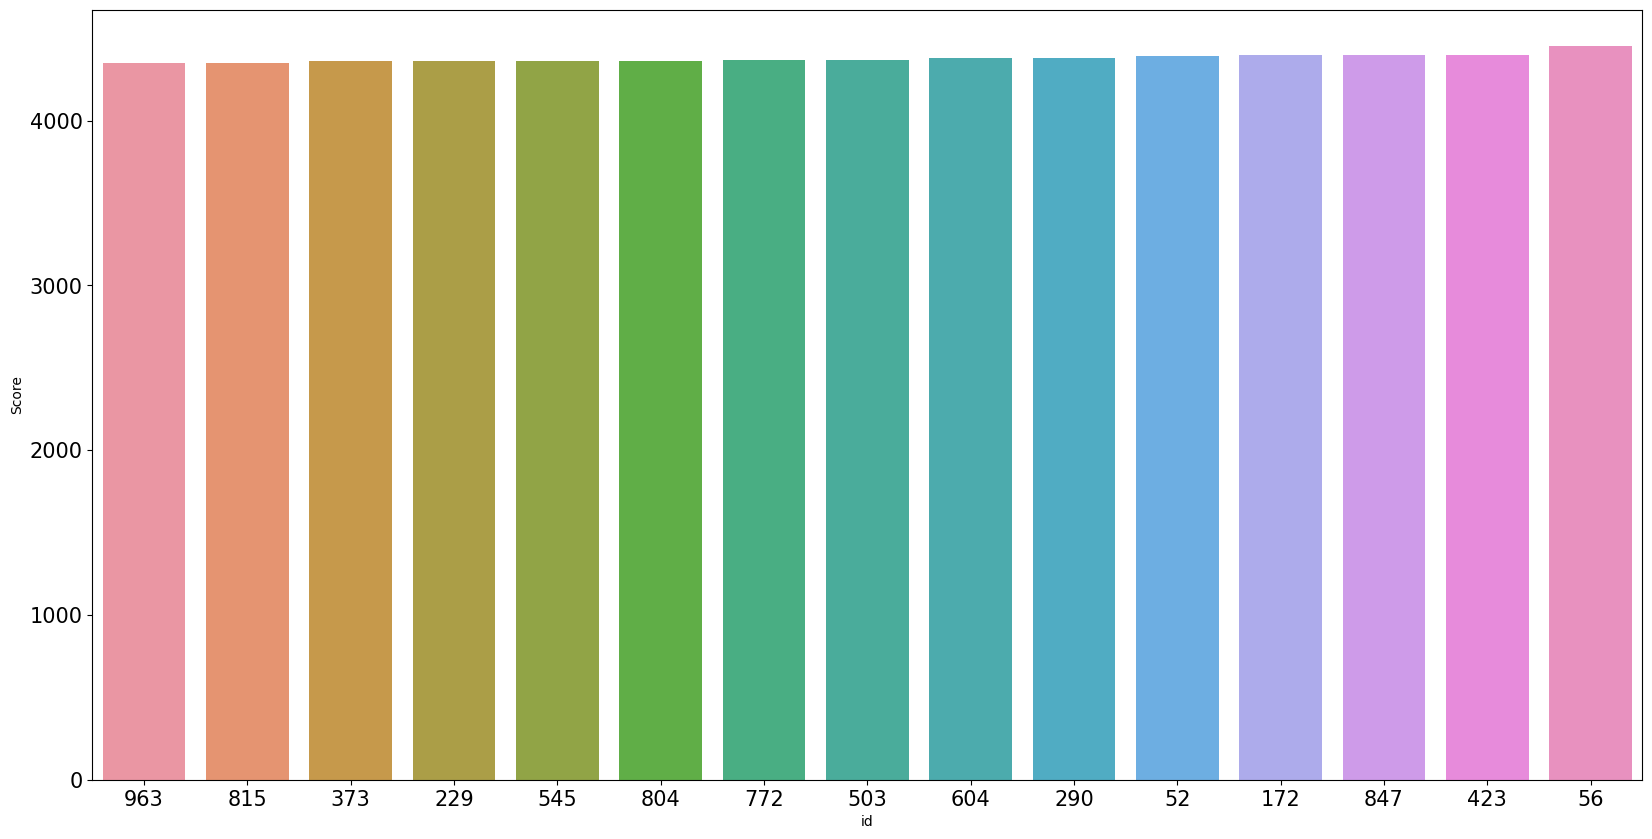

In [336]:
# colors = plt.cm.Reds(norm(df["Speed"])) 
df = pd.DataFrame({'id' : scorekeys[985::], 'Score': scorevalues[985::]})
result = df.groupby('id')['Score']
result = df.groupby(["id"])['Score'].median().reset_index().sort_values('Score')

sns.barplot(x='id', y="Score", data=df ,order=result['id'])
# bar = sns.barplot( data = result, x = 'id', y = 'Score')


In [297]:
dtt = pd.DataFrame(sort_data)

In [524]:
dtt.to_csv('scored_boots')

In [527]:
dtt.to_excel('scored_excel.xls')

In [564]:
points_output.to_file('scored_boots')

In [516]:
min(scoredd, key = scoredd.get)

482

In [565]:
%pwd

'C:\\Users\\zenus\\Downloads\\Resilio_box_desktop\\Proposal\\PADUS_2_0'

In [34]:
x=[]

6602

In [390]:
farmpdd

num_farms  Acreage  0.8_percent_allo  0.8_farm_size  choice_0  choice_1  \
0         97       49              3802             39        46        25   
1        281      179             40239            143        46        52   
2         93      499             37125            399        57        18   
3         17      999             13586            799        56        26   
4          2     1000              1600            800        51        48   

   choice_2  choice_3  choice_4  choice_5  choice_6  
0        52        57        22        18        20  
1        27        57        18        32        25  
2        20        32        27        46        22  
3        25        27         3        32        23  
4        47        15        41        55        24

In [94]:
97*49

4753

In [454]:
mixmax = {}
for i,v in farm_pd[::-1].iterrows():
    build = 'count_'+str(int(v.Acreage))
    
    mixmax[int(v.Acreage)] = \
    [divis.sort_values(by=[build], ascending=True)['new_fid'].values[-1],\
     divis.sort_values(by=[build], ascending=True)[build].values[-1]
       ,divis.sort_values(by=[build], ascending=True)['acres'].values[-1],v.num_farms,\
     v.Acreage*v.num_farms,\
    divis.sort_values(by=[build], ascending=True)['new_fid'].values[-2],\
    divis.sort_values(by=[build], ascending=True)['acres'].values[-2],\
    divis.sort_values(by=[build], ascending=True)['new_fid'].values[-3],\
    divis.sort_values(by=[build], ascending=True)['acres'].values[-3],\
    divis.sort_values(by=[build], ascending=True)['new_fid'].values[-4],\
    divis.sort_values(by=[build], ascending=True)['acres'].values[-4],\
    divis.sort_values(by=[build], ascending=True)['new_fid'].values[-5],\
    divis.sort_values(by=[build], ascending=True)['acres'].values[-5],\
    divis.sort_values(by=[build], ascending=True)['new_fid'].values[-6],\
    divis.sort_values(by=[build], ascending=True)['acres'].values[-6],\
    divis.sort_values(by=[build], ascending=True)['new_fid'].values[-7],\
    divis.sort_values(by=[build], ascending=True)['acres'].values[-7],\
    divis.sort_values(by=[build], ascending=True)['new_fid'].values[-8],\
    divis.sort_values(by=[build], ascending=True)['acres'].values[-8],\
    divis.sort_values(by=[build], ascending=True)['new_fid'].values[-9],\
    divis.sort_values(by=[build], ascending=True)['acres'].values[-9],\
    divis.sort_values(by=[build], ascending=True)['new_fid'].values[-10],\
    divis.sort_values(by=[build], ascending=True)['acres'].values[-10],\
    divis.sort_values(by=[build], ascending=True)['new_fid'].values[-11],\
    divis.sort_values(by=[build], ascending=True)['acres'].values[-11],\
    divis.sort_values(by=[build], ascending=True)['new_fid'].values[-12],\
    divis.sort_values(by=[build], ascending=True)['acres'].values[-12],\
    divis.sort_values(by=[build], ascending=True)['new_fid'].values[-13],\
    divis.sort_values(by=[build], ascending=True)['acres'].values[-13],\
    divis.sort_values(by=[build], ascending=True)['new_fid'].values[-14],\
    divis.sort_values(by=[build], ascending=True)['acres'].values[-14]]

In [455]:
mixmax

{1000: [51,
  55,
  2905.8732722410778,
  2.0,
  2000.0,
  48,
  1863.0951647445822,
  47,
  5864.113462392307,
  15,
  2528.5282893742165,
  41,
  4104.992320452051,
  55,
  3253.023245918368,
  24,
  3347.233008601176,
  27,
  13439.658885161703,
  34,
  2376.2819484793195,
  7,
  2737.5321824883813,
  49,
  3000.02188892863,
  16,
  2628.2227871486057,
  50,
  2222.592997269614,
  46,
  6115.087052205271],
 999: [56,
  405,
  6129.350157460896,
  17.0,
  16983.0,
  26,
  4326.733303186229,
  25,
  11531.630077197242,
  27,
  13439.658885161703,
  3,
  5221.790503883301,
  32,
  7690.6780010077655,
  23,
  3797.162795682734,
  19,
  5038.071357938481,
  17,
  4864.77184827861,
  47,
  5864.113462392307,
  21,
  5131.566955042523,
  33,
  4579.326583171265,
  41,
  4104.992320452051,
  52,
  16915.798440274295],
 499: [57,
  2573,
  12806.337473844773,
  93.0,
  46407.0,
  18,
  7784.296043015587,
  20,
  7756.524907210997,
  32,
  7690.6780010077655,
  27,
  13439.658885161703,
  46,

In [767]:
datff[9] = mixmax.get(9)

In [175]:
datff[49] = mixmax.get(49)
datff[179] = mixmax.get(179)
datff[499] = mixmax.get(499)
datff[999] = mixmax.get(999)
datff[1000] = mixmax.get(1000)

In [176]:
datff

49            179           499           999          1000
0     25.000000     52.000000     57.000000     56.000000    51.000000
1   2385.000000   8073.000000   2573.000000    405.000000    55.000000
2  11531.630077  16915.798440  12806.337474   6129.350157  2905.873272
3     97.000000    281.000000     93.000000     17.000000     2.000000
4   4753.000000  50299.000000  46407.000000  16983.000000  2000.000000
5     52.000000     27.000000     18.000000     26.000000    48.000000
6  16915.798440  13439.658885   7784.296043   4326.733303  1863.095165
7     57.000000     57.000000     20.000000     25.000000    47.000000
8  12806.337474  12806.337474   7756.524907  11531.630077  5864.113462

In [174]:
datff = pd.DataFrame(columns = mixmax.keys())

In [283]:
mixmax

{1000: ([51,
   55,
   2905.8732722410778,
   2.0,
   2000.0,
   48,
   1863.0951647445822,
   47,
   5864.113462392307],
  15,
  2528.5282893742165),
 999: ([56,
   405,
   6129.350157460896,
   17.0,
   16983.0,
   26,
   4326.733303186229,
   25,
   11531.630077197242],
  27,
  13439.658885161703),
 499: ([57,
   2573,
   12806.337473844773,
   93.0,
   46407.0,
   18,
   7784.296043015587,
   20,
   7756.524907210997],
  32,
  7690.6780010077655),
 179: ([46,
   8796,
   6115.087052205271,
   281.0,
   50299.0,
   52,
   16915.798440274295,
   27,
   13439.658885161703],
  57,
  12806.337473844773),
 49: ([46,
   3977,
   6115.087052205271,
   97.0,
   4753.0,
   25,
   11531.630077197242,
   52,
   16915.798440274295],
  57,
  12806.337473844773)}

In [290]:
for i,y in mixmax.items():
#     print(mixmax.get(i))
    
    picked = random.choice(list(range(int(mixmax.get(i)[3]))))
    print(mixmax.get(i)[0] , y)
    gettopthree = [mixmax.get(i)[0],mixmax.get(i)[5],mixmax.get(i)[7],mixmax.get(i)[9]]
#     print(gettopthree)

51 [51, 55, 2905.8732722410778, 2.0, 2000.0, 48, 1863.0951647445822, 47, 5864.113462392307, 15, 2528.5282893742165]
56 [56, 405, 6129.350157460896, 17.0, 16983.0, 26, 4326.733303186229, 25, 11531.630077197242, 27, 13439.658885161703]
57 [57, 2573, 12806.337473844773, 93.0, 46407.0, 18, 7784.296043015587, 20, 7756.524907210997, 32, 7690.6780010077655]
46 [46, 8796, 6115.087052205271, 281.0, 50299.0, 52, 16915.798440274295, 27, 13439.658885161703, 57, 12806.337473844773]
46 [46, 3977, 6115.087052205271, 97.0, 4753.0, 25, 11531.630077197242, 52, 16915.798440274295, 57, 12806.337473844773]


In [291]:
gettopthree

[46, 25, 52, 57]

In [292]:
farmpdd

num_farms  Acreage  0.8_percent_allo  0.8_farm_size  choice_0  choice_1  \
0         97       49              3802             39        46        25   
1        281      179             40239            143        46        52   
2         93      499             37125            399        57        18   
3         17      999             13586            799        56        26   
4          2     1000              1600            800        51        48   

   choice_2  choice_3  choice_4  choice_5  
0        52        57        22        18  
1        27        57        18        32  
2        20        32        27        46  
3        25        27         3        32  
4        47        15        41        55

In [490]:
diviss = divis.copy()

In [491]:
diviss

neighb     Shape_Leng    Shape_Area  \
0        1  193576.263600  2.692458e+07   
1        2   76732.604800  2.362700e+07   
2        3  149735.368728  2.113230e+07   
3        4   55450.304400  1.857283e+07   
4        5   17338.442800  8.674718e+06   
5        6   37875.592400  8.497506e+06   
6        7   52378.817800  1.107864e+07   
7        8   61084.389200  6.206962e+06   
8        9   15702.740800  2.892866e+06   
9       10   83417.528770  7.724716e+06   
10      11    2580.774600  1.008275e+05   
11      14   29951.523800  4.997775e+06   
12      15   73433.764481  1.023281e+07   
13      16   55086.815600  1.063627e+07   
14      17   77768.549600  1.968746e+07   
15      18  102776.617200  3.150261e+07   
16      19  212041.522600  2.038880e+07   
17      20  260967.188600  3.139023e+07   
18      21  234596.037200  2.076717e+07   
19      22  181871.902000  1.872254e+07   
20      23  109810.140800  1.536691e+07   
21      24   46617.511200  1.354607e+07   
22      25  201627.554600  4.666787e+07   
23      26  120096.886200  1.751005e+07   
24      27  136781.048400  5.438955e+07   
25      28   23147.725578  1.394565e+06   
26      29   45458.988235  1.302457e+07   
27      30  175401.794200  1.283243e+07   
28      31  170930.876000  8.613610e+06   
29      32  208043.137000  3.112375e+07   
30      33   76496.336600  1.853228e+07   
31      34   82818.686287  9.616681e+06   
32      36   69299.632252  7.346266e+06   
33      37  112881.622800  8.788262e+06   
34      38   33979.568149  5.289405e+06   
35      40   21434.405427  1.991821e+06   
36      41  103612.643600  1.661268e+07   
37      42   68161.108584  8.900152e+06   
38      43  142637.663267  1.291393e+07   
39      44   31696.272200  7.907735e+06   
40      45   75948.025305  1.188002e+07   
41      46   78277.435400  2.288975e+07   
42      47   88402.703472  2.373174e+07   
43      48   74876.935682  7.539843e+06   
44      49  108247.138400  1.214092e+07   
45      50   73786.336214  8.994711e+06   
46      51  224145.719000  1.175991e+07   
47      52  194822.846913  6.845730e+07   
48      53   50325.101800  5.837674e+06   
49      54   31496.354600  9.195206e+06   
50      55   42164.768000  1.316480e+07   
51      56   76041.975000  2.480514e+07   
52      57  158527.066342  5.182654e+07   

                                             geometry         acres  new_fid  \
0   MULTIPOLYGON (((460150.702 4447016.716, 460150...   6653.064344        1   
1   MULTIPOLYGON (((484686.234 4445408.276, 484686...   5838.232298        2   
2   MULTIPOLYGON (((487784.981 4443845.271, 487784...   5221.790504        3   
3   MULTIPOLYGON (((488775.489 4451224.105, 488775...   4589.345380        4   
4   POLYGON ((472127.676 4454595.469, 472127.676 4...   2143.522814        5   
5   MULTIPOLYGON (((458996.623 4453432.303, 458996...   2099.733737        6   
6   MULTIPOLYGON (((463122.227 4449733.799, 463285...   2737.532182        7   
7   MULTIPOLYGON (((458923.925 4444953.914, 458923...   1533.740383        8   
8   MULTIPOLYGON (((455552.561 4441473.503, 455498...    714.827295        9   
9   MULTIPOLYGON (((465766.612 4418455.539, 465766...   1908.777384       10   
10  POLYGON ((469992.176 4421726.943, 469992.176 4...     24.914481       11   
11  MULTIPOLYGON (((486349.198 4419409.698, 486349...   1234.950229       14   
12  MULTIPOLYGON (((483886.557 4436402.827, 483886...   2528.528289       15   
13  MULTIPOLYGON (((480542.455 4434539.943, 480542...   2628.222787       16   
14  MULTIPOLYGON (((477498.232 4434258.239, 477498...   4864.771848       17   
15  MULTIPOLYGON (((480060.832 4419773.188, 480060...   7784.296043       18   
16  MULTIPOLYGON (((454871.019 4424007.839, 454871...   5038.071358       19   
17  MULTIPOLYGON (((469301.547 4429478.354, 469283...   7756.524907       20   
18  MULTIPOLYGON (((458551.348 4424616.684, 458551...   5131.566955       21   
19  MULTIPOLYGON (((461541.048 4436902.624, 461541...   4626.339665       22   
2

In [492]:
perfcallo = []
catcallocation = []
for i,y in mixmax.items():
#     print(mixmax.get(i))
    
    picked = random.choice(list(range(int(mixmax.get(i)[3]))))
#     print(picked)
    if picked >0:
        lower = 0
        mid = picked
        upper = len(list(range(int(mixmax.get(i)[3]))))
        gettopthree = [mixmax.get(i)[0],mixmax.get(i)[5],mixmax.get(i)[7],mixmax.get(i)[9],mixmax.get(i)[11],\
                       mixmax.get(i)[13],mixmax.get(i)[15],mixmax.get(i)[17],mixmax.get(i)[19],\
                      mixmax.get(i)[21],mixmax.get(i)[23],mixmax.get(i)[25],mixmax.get(i)[27],\
                      mixmax.get(i)[29]]
        
        
        
        print(lower,mid,upper,i)
            
        for g in range(lower,mid):
            
            empty = None

            if float(diviss.loc[np.where(diviss['neighb']== mixmax.get(i)[0])].acres)-i >=0  and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[0]) \
                                                 & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[0]) \
                                                 & (points_output['farm_siz']==i))].index[g]])
                diviss.loc[diviss.loc[np.where(diviss['neighb']==mixmax.get(i)[0])].index,'acres'] = \
                                diviss.loc[np.where(diviss['neighb']==mixmax.get(i)[0])].acres - i
                empty = 1

            if float(diviss.loc[np.where(diviss['neighb']== mixmax.get(i)[0])].acres)-i < 0  and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[1])].acres)-i >=0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[1]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[1]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[1])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[1])].acres - i
                
                empty= 1

            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[1])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[2])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[2]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[2]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[2])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[2])].acres - i
                empty = 1
                
                
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[2])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[3])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[3]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[3]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[3])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[3])].acres - i
                empty = 1
                
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[3])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[4])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[4]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[4]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[4])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[4])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[4])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[5])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[5]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[5]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[5])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[5])].acres - i
                empty = 1
                
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[5])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[6])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[6]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[6]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[6])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[6])].acres - i
                empty = 1
                
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[6])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[7])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[7]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[7]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[7])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[7])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[7])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[8])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[8]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[8]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[8])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[8])].acres - i
                empty = 1
                
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[8])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[9])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[9]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[9]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[9])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[9])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[9])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[10])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[10]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[10]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[10])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[10])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[10])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[11])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[11]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[11]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[11])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[11])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[11])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[12])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[12]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[12]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[12])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[12])].acres - i
                empty = 1


            
            
        for g in range(mid,upper):
            empty = None

            if float(diviss.loc[np.where(diviss['neighb']== mixmax.get(i)[0])].acres)-i >=0  and empty==None:

                indx = points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[0]) \
                                                 & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[0]) \
                                                 & (points_output['farm_siz']==i))].index[g]])
                diviss.loc[diviss.loc[np.where(diviss['neighb']==mixmax.get(i)[0])].index,'acres'] = \
                                diviss.loc[np.where(diviss['neighb']==mixmax.get(i)[0])].acres - i
                empty = 1

            if float(diviss.loc[np.where(diviss['neighb']== mixmax.get(i)[0])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[1])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[1]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[1]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[1])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[1])].acres - i
                empty = 1

            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[1])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[2])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[2]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[2]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[2])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[2])].acres - i
                empty=1
                
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[2])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[3])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[3]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[3]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[3])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[3])].acres - i
                empty = 1
                
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[3])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[4])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[4]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[4]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[4])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[4])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[4])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[5])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[5]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[5]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[5])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[5])].acres - i
                empty = 1
                
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[5])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[6])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[6]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[6]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[6])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[6])].acres - i
                empty = 1
                
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[6])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[7])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[7]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[7]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[7])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[7])].acres - i
                empty = 1
                
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[7])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[8])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[8]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[8]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[8])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[8])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[8])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[9])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[9]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[9]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[9])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[9])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[9])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[10])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[10]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[10]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[10])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[10])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[10])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[11])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[11]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[11]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[11])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[11])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[11])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[12])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[12]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[12]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[12])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[12])].acres - i
                empty = 1
        

    if picked == 0:
        lower = picked
        upper = len(list(range(int(mixmax.get(i)[3]))))
        print('it was 0 ', lower, upper )
        for g in (lower,upper+1):
            empty = None
            if float(diviss.loc[np.where(diviss['neighb']== mixmax.get(i)[0])].acres)-i >=0 and empty==None:

                indx = points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[0]) \
                                                 & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[0]) \
                                                 & (points_output['farm_siz']==i))].index[g]])
                diviss.loc[diviss.loc[np.where(diviss['neighb']==mixmax.get(i)[0])].index,'acres'] = \
                                diviss.loc[np.where(diviss['neighb']==mixmax.get(i)[0])].acres - i
                empty= 1

            if float(diviss.loc[np.where(diviss['neighb']== mixmax.get(i)[0])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[1])].acres)-i>0 and empty==None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[1]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[1]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[1])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[1])].acres - i
                empty = 1

            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[1])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[2])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[2]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[2]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[2])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[2])].acres - i
                empty = 1
                
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[2])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[3])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[3]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[3]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[3])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[3])].acres - i
                empty = 1
                
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[3])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[4])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[4]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[4]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[4])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[4])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[4])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[5])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[5]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[5]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[5])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[5])].acres - i
                empty = 1
                
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[5])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[6])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[6]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[6]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[6])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[6])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[6])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[7])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[7]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[7]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[7])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[7])].acres - i
                empty = 1
                
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[7])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[8])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[8]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[8]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[8])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[8])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[8])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[9])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[9]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[9]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[9])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[9])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[9])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[10])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[10]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[10]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[10])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[10])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[10])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[11])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[11]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[11]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[11])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[11])].acres - i
                empty = 1
            if float(diviss.loc[np.where(diviss['neighb']== gettopthree[11])].acres)-i<0 and \
            float(diviss.loc[np.where(diviss['neighb']== gettopthree[12])].acres)-i>0 and empty == None:

                indx = points_output.loc[np.where((points_output['new_fid']== gettopthree[12]) \
                                             & (points_output['farm_siz']==i))].index

                perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==gettopthree[12]) \
                 & (points_output['farm_siz']==i))].index[g]])

                diviss.loc[diviss.loc[np.where(diviss['neighb']==gettopthree[12])].index,'acres'] = \
                diviss.loc[np.where(diviss['neighb']==gettopthree[12])].acres - i
                empty = 1


0 1 2 1000
0 13 17 999
0 17 93 499
0 242 281 179
0 27 97 49


In [493]:
len(perfcallo)

490

In [494]:
diviss

neighb     Shape_Leng    Shape_Area  \
0        1  193576.263600  2.692458e+07   
1        2   76732.604800  2.362700e+07   
2        3  149735.368728  2.113230e+07   
3        4   55450.304400  1.857283e+07   
4        5   17338.442800  8.674718e+06   
5        6   37875.592400  8.497506e+06   
6        7   52378.817800  1.107864e+07   
7        8   61084.389200  6.206962e+06   
8        9   15702.740800  2.892866e+06   
9       10   83417.528770  7.724716e+06   
10      11    2580.774600  1.008275e+05   
11      14   29951.523800  4.997775e+06   
12      15   73433.764481  1.023281e+07   
13      16   55086.815600  1.063627e+07   
14      17   77768.549600  1.968746e+07   
15      18  102776.617200  3.150261e+07   
16      19  212041.522600  2.038880e+07   
17      20  260967.188600  3.139023e+07   
18      21  234596.037200  2.076717e+07   
19      22  181871.902000  1.872254e+07   
20      23  109810.140800  1.536691e+07   
21      24   46617.511200  1.354607e+07   
22      25  201627.554600  4.666787e+07   
23      26  120096.886200  1.751005e+07   
24      27  136781.048400  5.438955e+07   
25      28   23147.725578  1.394565e+06   
26      29   45458.988235  1.302457e+07   
27      30  175401.794200  1.283243e+07   
28      31  170930.876000  8.613610e+06   
29      32  208043.137000  3.112375e+07   
30      33   76496.336600  1.853228e+07   
31      34   82818.686287  9.616681e+06   
32      36   69299.632252  7.346266e+06   
33      37  112881.622800  8.788262e+06   
34      38   33979.568149  5.289405e+06   
35      40   21434.405427  1.991821e+06   
36      41  103612.643600  1.661268e+07   
37      42   68161.108584  8.900152e+06   
38      43  142637.663267  1.291393e+07   
39      44   31696.272200  7.907735e+06   
40      45   75948.025305  1.188002e+07   
41      46   78277.435400  2.288975e+07   
42      47   88402.703472  2.373174e+07   
43      48   74876.935682  7.539843e+06   
44      49  108247.138400  1.214092e+07   
45      50   73786.336214  8.994711e+06   
46      51  224145.719000  1.175991e+07   
47      52  194822.846913  6.845730e+07   
48      53   50325.101800  5.837674e+06   
49      54   31496.354600  9.195206e+06   
50      55   42164.768000  1.316480e+07   
51      56   76041.975000  2.480514e+07   
52      57  158527.066342  5.182654e+07   

                                             geometry        acres  new_fid  \
0   MULTIPOLYGON (((460150.702 4447016.716, 460150...    30.064344        1   
1   MULTIPOLYGON (((484686.234 4445408.276, 484686...   110.232298        2   
2   MULTIPOLYGON (((487784.981 4443845.271, 487784...  2894.790504        3   
3   MULTIPOLYGON (((488775.489 4451224.105, 488775...  4589.345380        4   
4   POLYGON ((472127.676 4454595.469, 472127.676 4...  2143.522814        5   
5   MULTIPOLYGON (((458996.623 4453432.303, 458996...  2099.733737        6   
6   MULTIPOLYGON (((463122.227 4449733.799, 463285...  2737.532182        7   
7   MULTIPOLYGON (((458923.925 4444953.914, 458923...  1533.740383        8   
8   MULTIPOLYGON (((455552.561 4441473.503, 455498...   714.827295        9   
9   MULTIPOLYGON (((465766.612 4418455.539, 465766...  1908.777384       10   
10  POLYGON ((469992.176 4421726.943, 469992.176 4...    24.914481       11   
11  MULTIPOLYGON (((486349.198 4419409.698, 486349...  1234.950229       14   
12  MULTIPOLYGON (((483886.557 4436402.827, 483886...  2528.528289       15   
13  MULTIPOLYGON (((480542.455 4434539.943, 480542...  2628.222787       16   
14  MULTIPOLYGON (((477498.232 4434258.239, 477498...  4864.771848       17   
15  MULTIPOLYGON (((480060.832 4419773.188, 480060...   120.296043       18   
16  MULTIPOLYGON (((454871.019 4424007.839, 454871...  5038.071358       19   
17  MULTIPOLYGON (((469301.547 4429478.354, 469283...    92.524907       20   
18  MULTIPOLYGON (((458551.348 4424616.684, 458551...  5131.566955       21   
19  MULTIPOLYGON (((461541.048 4436902.624, 461541...   118.339665       22   
20  MULTIPOLYGON (((49

In [469]:
farmpdd

num_farms  Acreage  0.8_percent_allo  0.8_farm_size  choice_0  choice_1  \
0         97       49              3802             39        46        25   
1        281      179             40239            143        46        52   
2         93      499             37125            399        57        18   
3         17      999             13586            799        56        26   
4          2     1000              1600            800        51        48   

   choice_2  choice_3  choice_4  choice_5  choice_6  choice_7  choice_8  \
0        52        57        22        18        20        19         1   
1        27        57        18        32        25        20         1   
2        20        32        27        46        22         4         1   
3        25        27         3        32        23        19        17   
4        47        15        41        55        24        27        34   

   choice_9  choice_10  choice_11  choice_12  choice_13  choice_14  
0        27         32          2         56         47          3  
1         2         56         47          3         17         26  
2        25          2         21          3         56         47  
3        47         21         33         41         52         49  
4         7         49         16         50         46         33

In [543]:
%pwd

'C:\\Users\\zenus\\Downloads\\Resilio_box_desktop\\Proposal\\PADUS_2_0'

In [544]:
farmpdd.to_excel('Farm_frequencies.xlsx')

In [468]:
len(gg.loc[np.where(gg['farm_siz']==179)])

281

In [315]:
# perfcallo = []
# catcallocation = []
# for i,y in mixmax.items():
# #     print(mixmax.get(i))
    
#     picked = random.choice(list(range(int(mixmax.get(i)[3]))))
# #     print(picked)
#     if picked >0:
#         lower = 0
#         mid = picked
#         upper = len(list(range(int(mixmax.get(i)[3]))))
        
#         print(lower,mid,upper,i)
#         indx = points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[0]) \
#                                              & (points_output['farm_siz']==i))].index
#         for g in range(lower,mid):
            
#             perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[0]) \
#                                              & (points_output['farm_siz']==i))].index[g]])
#             mixmax.get(i)[2] = mixmax.get(i)[2] - i
#         for g in range(mid,upper):
            
#             getsecond = mixmax.get(i)[6]
            
#             if getsecond > i:
#                 mixmax.get(i)[6] = mixmax.get(i)[6] - i

#     #             print(mixmax.get(i)[6])
#                 perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[5]) \
#                                                  & (points_output['farm_siz']==i))].index[g]])

#             if getsecond < i:
#                 perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[7]) \
#                                                  & (points_output['farm_siz']==i))].index[g]])

            
#     if picked == 0:
#         lower = picked
#         upper = len(list(range(int(mixmax.get(i)[3]))))
#         print('it was 0 ', lower, upper )
#         for g in (lower,upper+1):
#             indx = points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[0]) \
#                                              & (points_output['farm_siz']==i))].index

#             getarea = mixmax.get(i)[2]
#             getsecond = mixmax.get(i)[6]
            

#             if getarea > i:
#                 perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[0]) \
#                                                  & (points_output['farm_siz']==i))].index[g]])
#                 mixmax.get(i)[2] = mixmax.get(i)[2] - i
#     #             listndx.append

#             if getarea < i and getsecond > i:
#                 mixmax.get(i)[6] = mixmax.get(i)[6] - i

#                 print(mixmax.get(i)[6])
#                 perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[5]) \
#                                                  & (points_output['farm_siz']==i))].index[g]])

#             if getarea < i and getsecond < i:
#                 perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[7]) \
#                                                  & (points_output['farm_siz']==i))].index[g]])
            
# #     points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[0]) & (points_output['new_fid']==4))]['farm_siz']
# #     for k in range(int(mixmax.get(i)[3])):
# #         print(k)

In [474]:
len(perfcallo)

490

In [495]:
boott = [i['boot'] for i in perfcallo]
newfid = [i['new_fid'] for i in perfcallo]
farmsiz =  [i['farm_siz'] for i in perfcallo]
Apn =  [i['APN'] for i in perfcallo]
geomm =  [i['geometry'] for i in perfcallo]

gg = gpd.GeoDataFrame(geometry=geomm, crs=points_output.crs)
gg['boot'] = boott
gg['new_fid'] = newfid
gg['farm_siz'] = farmsiz
gg['APN'] = Apn


In [497]:

len(gg.loc[np.where((gg['farm_siz']==179)&(gg['new_fid']==46))]) 

34

In [270]:
len(gg.loc[np.where((gg['farm_siz']==179)&(gg['new_fid']==27))]) 

155

In [503]:
diviss

neighb     Shape_Leng    Shape_Area  \
0        1  193576.263600  2.692458e+07   
1        2   76732.604800  2.362700e+07   
2        3  149735.368728  2.113230e+07   
3        4   55450.304400  1.857283e+07   
4        5   17338.442800  8.674718e+06   
5        6   37875.592400  8.497506e+06   
6        7   52378.817800  1.107864e+07   
7        8   61084.389200  6.206962e+06   
8        9   15702.740800  2.892866e+06   
9       10   83417.528770  7.724716e+06   
10      11    2580.774600  1.008275e+05   
11      14   29951.523800  4.997775e+06   
12      15   73433.764481  1.023281e+07   
13      16   55086.815600  1.063627e+07   
14      17   77768.549600  1.968746e+07   
15      18  102776.617200  3.150261e+07   
16      19  212041.522600  2.038880e+07   
17      20  260967.188600  3.139023e+07   
18      21  234596.037200  2.076717e+07   
19      22  181871.902000  1.872254e+07   
20      23  109810.140800  1.536691e+07   
21      24   46617.511200  1.354607e+07   
22      25  201627.554600  4.666787e+07   
23      26  120096.886200  1.751005e+07   
24      27  136781.048400  5.438955e+07   
25      28   23147.725578  1.394565e+06   
26      29   45458.988235  1.302457e+07   
27      30  175401.794200  1.283243e+07   
28      31  170930.876000  8.613610e+06   
29      32  208043.137000  3.112375e+07   
30      33   76496.336600  1.853228e+07   
31      34   82818.686287  9.616681e+06   
32      36   69299.632252  7.346266e+06   
33      37  112881.622800  8.788262e+06   
34      38   33979.568149  5.289405e+06   
35      40   21434.405427  1.991821e+06   
36      41  103612.643600  1.661268e+07   
37      42   68161.108584  8.900152e+06   
38      43  142637.663267  1.291393e+07   
39      44   31696.272200  7.907735e+06   
40      45   75948.025305  1.188002e+07   
41      46   78277.435400  2.288975e+07   
42      47   88402.703472  2.373174e+07   
43      48   74876.935682  7.539843e+06   
44      49  108247.138400  1.214092e+07   
45      50   73786.336214  8.994711e+06   
46      51  224145.719000  1.175991e+07   
47      52  194822.846913  6.845730e+07   
48      53   50325.101800  5.837674e+06   
49      54   31496.354600  9.195206e+06   
50      55   42164.768000  1.316480e+07   
51      56   76041.975000  2.480514e+07   
52      57  158527.066342  5.182654e+07   

                                             geometry        acres  new_fid  \
0   MULTIPOLYGON (((460150.702 4447016.716, 460150...    30.064344        1   
1   MULTIPOLYGON (((484686.234 4445408.276, 484686...   110.232298        2   
2   MULTIPOLYGON (((487784.981 4443845.271, 487784...  2894.790504        3   
3   MULTIPOLYGON (((488775.489 4451224.105, 488775...  4589.345380        4   
4   POLYGON ((472127.676 4454595.469, 472127.676 4...  2143.522814        5   
5   MULTIPOLYGON (((458996.623 4453432.303, 458996...  2099.733737        6   
6   MULTIPOLYGON (((463122.227 4449733.799, 463285...  2737.532182        7   
7   MULTIPOLYGON (((458923.925 4444953.914, 458923...  1533.740383        8   
8   MULTIPOLYGON (((455552.561 4441473.503, 455498...   714.827295        9   
9   MULTIPOLYGON (((465766.612 4418455.539, 465766...  1908.777384       10   
10  POLYGON ((469992.176 4421726.943, 469992.176 4...    24.914481       11   
11  MULTIPOLYGON (((486349.198 4419409.698, 486349...  1234.950229       14   
12  MULTIPOLYGON (((483886.557 4436402.827, 483886...  2528.528289       15   
13  MULTIPOLYGON (((480542.455 4434539.943, 480542...  2628.222787       16   
14  MULTIPOLYGON (((477498.232 4434258.239, 477498...  4864.771848       17   
15  MULTIPOLYGON (((480060.832 4419773.188, 480060...   120.296043       18   
16  MULTIPOLYGON (((454871.019 4424007.839, 454871...  5038.071358       19   
17  MULTIPOLYGON (((469301.547 4429478.354, 469283...    92.524907       20   
18  MULTIPOLYGON (((458551.348 4424616.684, 458551...  5131.566955       21   
19  MULTIPOLYGON (((461541.048 4436902.624, 461541...   118.339665       22   
20  MULTIPOLYGON (((49

In [499]:
gg.to_file('farm_allocation_distributedrandomly')

In [502]:
diviss = diviss.rename(columns = {'count_49.0':'count_49'})
diviss = diviss.rename(columns = {'count_179.0':'count_179'})
diviss = diviss.rename(columns = {'count_499.0':'count_499'})
diviss = diviss.rename(columns = {'count_999.0':'count_999'})
diviss = diviss.rename(columns = {'count_1000.0':'count_1000'})

In [507]:
diviss.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True])

In [508]:
# remove duplicate columns (based on column names)
diviss = diviss.loc[:, ~diviss.columns.duplicated()]

In [511]:
diviss['strt_ACR'] = divis['acres']
diviss

C:\Users\zenus\anaconda3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


neighb     Shape_Leng    Shape_Area  \
0        1  193576.263600  2.692458e+07   
1        2   76732.604800  2.362700e+07   
2        3  149735.368728  2.113230e+07   
3        4   55450.304400  1.857283e+07   
4        5   17338.442800  8.674718e+06   
5        6   37875.592400  8.497506e+06   
6        7   52378.817800  1.107864e+07   
7        8   61084.389200  6.206962e+06   
8        9   15702.740800  2.892866e+06   
9       10   83417.528770  7.724716e+06   
10      11    2580.774600  1.008275e+05   
11      14   29951.523800  4.997775e+06   
12      15   73433.764481  1.023281e+07   
13      16   55086.815600  1.063627e+07   
14      17   77768.549600  1.968746e+07   
15      18  102776.617200  3.150261e+07   
16      19  212041.522600  2.038880e+07   
17      20  260967.188600  3.139023e+07   
18      21  234596.037200  2.076717e+07   
19      22  181871.902000  1.872254e+07   
20      23  109810.140800  1.536691e+07   
21      24   46617.511200  1.354607e+07   
22      25  201627.554600  4.666787e+07   
23      26  120096.886200  1.751005e+07   
24      27  136781.048400  5.438955e+07   
25      28   23147.725578  1.394565e+06   
26      29   45458.988235  1.302457e+07   
27      30  175401.794200  1.283243e+07   
28      31  170930.876000  8.613610e+06   
29      32  208043.137000  3.112375e+07   
30      33   76496.336600  1.853228e+07   
31      34   82818.686287  9.616681e+06   
32      36   69299.632252  7.346266e+06   
33      37  112881.622800  8.788262e+06   
34      38   33979.568149  5.289405e+06   
35      40   21434.405427  1.991821e+06   
36      41  103612.643600  1.661268e+07   
37      42   68161.108584  8.900152e+06   
38      43  142637.663267  1.291393e+07   
39      44   31696.272200  7.907735e+06   
40      45   75948.025305  1.188002e+07   
41      46   78277.435400  2.288975e+07   
42      47   88402.703472  2.373174e+07   
43      48   74876.935682  7.539843e+06   
44      49  108247.138400  1.214092e+07   
45      50   73786.336214  8.994711e+06   
46      51  224145.719000  1.175991e+07   
47      52  194822.846913  6.845730e+07   
48      53   50325.101800  5.837674e+06   
49      54   31496.354600  9.195206e+06   
50      55   42164.768000  1.316480e+07   
51      56   76041.975000  2.480514e+07   
52      57  158527.066342  5.182654e+07   

                                             geometry        acres  new_fid  \
0   MULTIPOLYGON (((460150.702 4447016.716, 460150...    30.064344        1   
1   MULTIPOLYGON (((484686.234 4445408.276, 484686...   110.232298        2   
2   MULTIPOLYGON (((487784.981 4443845.271, 487784...  2894.790504        3   
3   MULTIPOLYGON (((488775.489 4451224.105, 488775...  4589.345380        4   
4   POLYGON ((472127.676 4454595.469, 472127.676 4...  2143.522814        5   
5   MULTIPOLYGON (((458996.623 4453432.303, 458996...  2099.733737        6   
6   MULTIPOLYGON (((463122.227 4449733.799, 463285...  2737.532182        7   
7   MULTIPOLYGON (((458923.925 4444953.914, 458923...  1533.740383        8   
8   MULTIPOLYGON (((455552.561 4441473.503, 455498...   714.827295        9   
9   MULTIPOLYGON (((465766.612 4418455.539, 465766...  1908.777384       10   
10  POLYGON ((469992.176 4421726.943, 469992.176 4...    24.914481       11   
11  MULTIPOLYGON (((486349.198 4419409.698, 486349...  1234.950229       14   
12  MULTIPOLYGON (((483886.557 4436402.827, 483886...  2528.528289       15   
13  MULTIPOLYGON (((480542.455 4434539.943, 480542...  2628.222787       16   
14  MULTIPOLYGON (((477498.232 4434258.239, 477498...  4864.771848       17   
15  MULTIPOLYGON (((480060.832 4419773.188, 480060...   120.296043       18   
16  MULTIPOLYGON (((454871.019 4424007.839, 454871...  5038.071358       19   
17  MULTIPOLYGON (((469301.547 4429478.354, 469283...    92.524907       20   
18  MULTIPOLYGON (((458551.348 4424616.684, 458551...  5131.566955       21   
19  MULTIPOLYGON (((461541.048 4436902.624, 461541...   118.339665       22   
20  MULTIPOLYGON (((49

In [512]:
diviss.to_file('candidates_after490farms')

In [57]:
mixmax = {}
for i,v in farm_pd.iterrows():
    build = 'count_'+str(int(v.Acreage))
    
    mixmax[int(v.Acreage)] = \
    [divis.sort_values(by=[build], ascending=True)['new_fid'].values[-1],\
     divis.sort_values(by=[build], ascending=True)[build].values[-1]
       ,divis.sort_values(by=[build], ascending=True)['acres'].values[-1],v.num_farms,\
     v.Acreage*v.num_farms,\
    divis.sort_values(by=[build], ascending=True)['new_fid'].values[-2],\
    divis.sort_values(by=[build], ascending=True)['acres'].values[-2],\
    divis.sort_values(by=[build], ascending=True)['new_fid'].values[-3],\
    divis.sort_values(by=[build], ascending=True)['acres'].values[-3]]
    
    
perfcallo = []
for i,y in mixmax.items():
    print(mixmax.get(i))
#     points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[0]) & (points_output['new_fid']==4))]['farm_siz']
    for k in range(int(mixmax.get(i)[3])):
        listndx = []
        indx = points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[0]) \
                                             & (points_output['farm_siz']==i))].index

        getarea = mixmax.get(i)[2]
        getsecond = mixmax.get(i)[6]
        
        if getarea > i:
            perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[0]) \
                                             & (points_output['farm_siz']==i))].index[k]])
            mixmax.get(i)[2] = mixmax.get(i)[2] - i
#             listndx.append
        
        if getarea < i and getsecond > i:
            mixmax.get(i)[6] = mixmax.get(i)[6] - i
            
            print(mixmax.get(i)[6])
            perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[5]) \
                                             & (points_output['farm_siz']==i))].index[k]])
            
        if getarea < i and getsecond < i:
            perfcallo.append(points_output.loc[points_output.loc[np.where((points_output['new_fid']==mixmax.get(i)[7]) \
                                             & (points_output['farm_siz']==i))].index[k]])


[46, 3977, 6115.087052205271, 97.0, 4753.0, 25, 11531.630077197242, 52, 16915.798440274295]
[46, 8796, 6115.087052205271, 281.0, 50299.0, 52, 16915.798440274295, 27, 13439.658885161703]
16736.798440274295
16557.798440274295
16378.798440274295
16199.798440274295
16020.798440274295
15841.798440274295
15662.798440274295
15483.798440274295
15304.798440274295
15125.798440274295
14946.798440274295
14767.798440274295
14588.798440274295
14409.798440274295
14230.798440274295
14051.798440274295
13872.798440274295
13693.798440274295
13514.798440274295
13335.798440274295
13156.798440274295
12977.798440274295
12798.798440274295
12619.798440274295
12440.798440274295
12261.798440274295
12082.798440274295
11903.798440274295
11724.798440274295
11545.798440274295
11366.798440274295
11187.798440274295
11008.798440274295
10829.798440274295
10650.798440274295
10471.798440274295
10292.798440274295
10113.798440274295
9934.798440274295
9755.798440274295
9576.798440274295
9397.798440274295
9218.798440274295
90

In [58]:
mixmax

{49: [46,
  3977,
  1362.087052205271,
  97.0,
  4753.0,
  25,
  11531.630077197242,
  52,
  16915.798440274295],
 179: [46,
  8796,
  29.087052205270993,
  281.0,
  50299.0,
  52,
  89.79844027429499,
  27,
  13439.658885161703],
 499: [57,
  2573,
  331.33747384477283,
  93.0,
  46407.0,
  18,
  299.2960430155872,
  20,
  7756.524907210997],
 999: [56,
  405,
  135.3501574608963,
  17.0,
  16983.0,
  26,
  330.733303186229,
  25,
  11531.630077197242],
 1000: [51,
  55,
  905.8732722410778,
  2.0,
  2000.0,
  48,
  1863.0951647445822,
  47,
  5864.113462392307]}

In [59]:
len(perfcallo)

490

In [60]:
boott = [i['boot'] for i in perfcallo]
newfid = [i['new_fid'] for i in perfcallo]
farmsiz =  [i['farm_siz'] for i in perfcallo]
Apn =  [i['APN'] for i in perfcallo]
geomm =  [i['geometry'] for i in perfcallo]

gg = gpd.GeoDataFrame(geometry=geomm)
gg['boot'] = boott
gg['new_fid'] = newfid
gg['farm_siz'] = farmsiz
gg['APN'] = Apn


geometry  boot  new_fid  farm_siz           APN
0    POINT (484785.578 4442151.983)     0       25      49.0  120508009001
1    POINT (477979.270 4441027.143)     0       25      49.0  131913007006
2    POINT (481553.614 4444508.879)     0       25      49.0  146519003001
3    POINT (485598.390 4440905.675)     0       25      49.0  146314200014
4    POINT (478987.042 4442683.159)     1       25      49.0  131520000062
..                              ...   ...      ...       ...           ...
485  POINT (485455.237 4444633.113)    43       25     999.0  120328000001
486  POINT (477404.042 4440174.914)    47       25     999.0  131731000002
487  POINT (486558.094 4442402.370)    53       25     999.0  120328000001
488  POINT (455607.319 4438952.106)     8       51    1000.0  131709000001
489  POINT (459982.897 4432996.976)    13       51    1000.0  131900000110

[490 rows x 5 columns]

In [62]:
%pwd

'C:\\Users\\zenus\\Downloads\\Resilio_box_desktop\\Proposal\\PADUS_2_0'

In [61]:
gg.to_file('farm_allocation_mixmax')

In [721]:
gg.loc[np.where(gg['farm_siz']==499)]

geometry  boot  new_fid  farm_siz           APN
606  POINT (490976.257 4456384.262)     1       47     499.0  146309013003
607  POINT (490624.841 4456174.275)     1       47     499.0  146135000001
608  POINT (489835.355 4456109.337)     4       47     499.0  131528001005
609  POINT (488915.794 4452538.684)     5       47     499.0  120524000040
610  POINT (490745.220 4451477.278)     5       47     499.0  120125000007
611  POINT (490038.248 4450953.655)    11       47     499.0  131521000029
612  POINT (489890.001 4450660.885)    11       47     499.0  131528001005
613  POINT (490191.794 4452620.474)    12       47     499.0  146135000001
614  POINT (490959.893 4456593.820)    20       47     499.0  119900000002
615  POINT (489042.234 4455659.187)    22       47     499.0  146135000001
616  POINT (490206.698 4452455.263)    25       47     499.0  146135000001
617  POINT (490183.241 4453774.531)    27       47     499.0  158128000016
618  POINT (492231.944 4453932.217)    27       47     499.0  120502000007
619  POINT (491157.810 4455354.367)    28       47     499.0  131511000065
620  POINT (489224.611 4455809.307)    36       47     499.0  120125000007
621  POINT (490792.078 4455317.772)    36       47     499.0  146525000001
622  POINT (489011.281 4452081.688)    36       47     499.0  146518001001
623  POINT (489991.270 4456172.787)    39       47     499.0  146525000001
624  POINT (492479.247 4455118.722)    39       47     499.0  146518001001
625  POINT (489319.326 4455916.626)    40       47     499.0  131521000029
626  POINT (489167.469 4453724.914)    41       47     499.0  120325000018
627  POINT (481336.657 4424349.670)    62       18     499.0  131528001005
628  POINT (480854.355 4422133.544)    62       18     499.0  146309013003

In [550]:
len(gg.loc[np.where((gg['farm_siz']==179)&(gg['new_fid']==32))])

42

In [586]:
len(gg.loc[np.where(gg['farm_siz']==9)])

333

(0.0, 7625.310000000001)

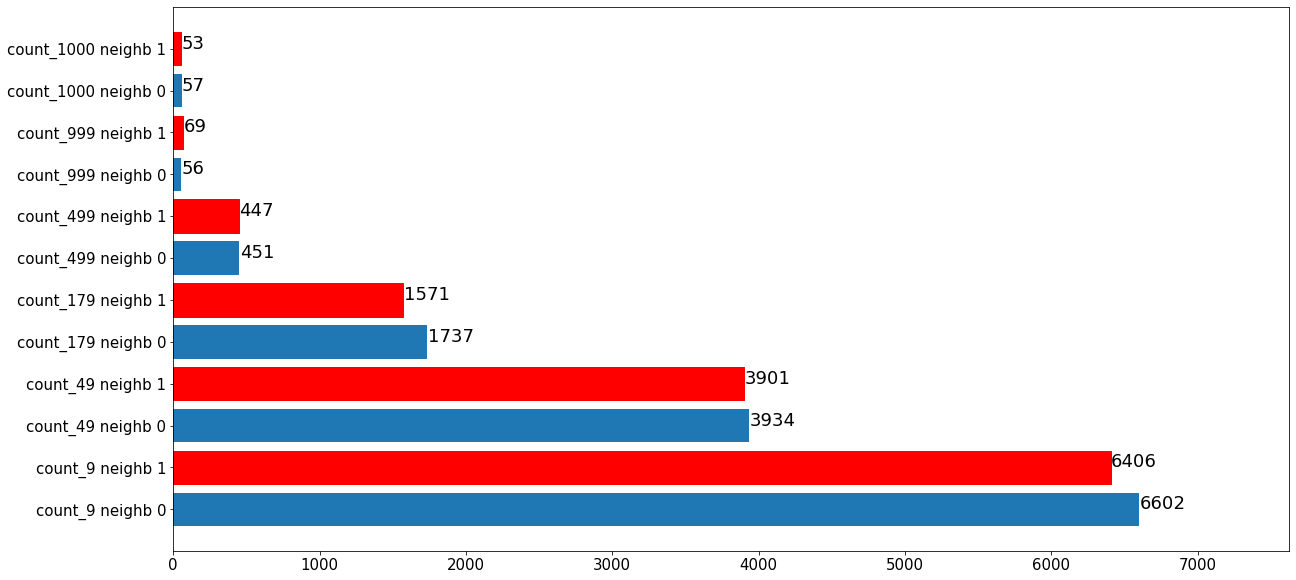

In [83]:
plt.rcParams["figure.figsize"] = (20, 10)
# bar = plt.figure()
fig, ax = plt.subplots()

x = ['count_9 neighb 0','count_9 neighb 1', 'count_49 neighb 0','count_49 neighb 1', 'count_179 neighb 0','count_179 neighb 1',\
     'count_499 neighb 0','count_499 neighb 1', 'count_999 neighb 0','count_999 neighb 1',\
     'count_1000 neighb 0','count_1000 neighb 1']

y = [divis['count_9'][0],    divis['count_9'][6] , divis['count_49'][0],divis['count_49'][6], \
     divis['count_179'][0],divis['count_179'][6],divis['count_499'][0],divis['count_499'][6]
     ,divis['count_999'][0],divis['count_999'][6],divis['count_1000'][0],divis['count_1000'][6]]

bar = ax.barh(x,y)
bar[1].set_color('red')
bar[3].set_color('red')
bar[5].set_color('red')
bar[7].set_color('red')
bar[9].set_color('red')
bar[11].set_color('red')
# ax.bar_label(bar)
for i, value in enumerate(y):
    ax.text(value + 3, i, str(value),fontsize = 18)
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)

    
# plt.title('Farm size =< 9 Acres',loc='center', fontsize=15)
# plt.rc('ytick', labelsize=15) 
# plt.rc('xtick', labelsize=15) 
# plt.show()

In [146]:
# plt.rcParams["figure.figsize"] = (8, 9)
# bar= plt.figure()
# bar=plt.barh(divis100['new_fid'],divis100['count_9'], color = 'grey')
# # bar=plt.barh(divis100['new_fid'],divis100['count_9'], color = 'grey')


# bar[divis100['count_9'].sort_values().keys()[-1]].set_color('maroon')
# bar[divis100['count_9'].sort_values().keys()[-2]].set_color('brown')
# bar[divis100['count_9'].sort_values().keys()[-3]].set_color('red')
# bar[divis100['count_9'].sort_values().keys()[-4]].set_color('tomato')
# bar[divis100['count_9'].sort_values().keys()[-5]].set_color('lightsalmon')
# bar[divis100['count_9'].sort_values().keys()[-6]].set_color('peachpuff')

# # plt.title('SOMETHING')
# plt.xlabel('Farms allocated for 1000 iterrations',fontsize=15)
# plt.ylabel('ID of Inclusive zone', fontsize=15)

# maroon_p = mpatches.Patch(color='maroon',label='Zone '+\
#                           str(divis100['new_fid'].loc[divis100['count_9'].sort_values().keys()[-1]])+\
#                         ' has '+str(divis100['count_9'].loc[divis100['count_9'].sort_values().keys()[-1]])+str(' farms'))
# brown_p = mpatches.Patch(color='brown', label='Zone '+\
#                           str(divis100['new_fid'].loc[divis100['count_9'].sort_values().keys()[-2]])+\
#                         ' has '+str(divis100['count_9'].loc[divis100['count_9'].sort_values().keys()[-2]])+str(' farms'))
# lightcor_p = mpatches.Patch(color='red', label='Zone '+\
#                           str(divis100['new_fid'].loc[divis100['count_9'].sort_values().keys()[-3]])+\
#                         ' has '+str(divis100['count_9'].loc[divis100['count_9'].sort_values().keys()[-3]])+str(' farms'))
# tomato_p = mpatches.Patch(color='tomato', label='Zone '+\
#                           str(divis100['new_fid'].loc[divis100['count_9'].sort_values().keys()[-4]])+\
#                         ' has '+str(divis100['count_9'].loc[divis100['count_9'].sort_values().keys()[-4]])+str(' farms'))
# lightsalmon_p = mpatches.Patch(color='lightsalmon', label='Zone '+\
#                           str(divis100['new_fid'].loc[divis100['count_9'].sort_values().keys()[-5]])+\
#                         ' has '+str(divis100['count_9'].loc[divis100['count_9'].sort_values().keys()[-5]])+str(' farms'))
# peachpuff_p = mpatches.Patch(color='peachpuff', label='Zone '+\
#                           str(divis100['new_fid'].loc[divis100['count_9'].sort_values().keys()[-6]])+\
#                         ' has '+str(divis100['count_9'].loc[divis100['count_9'].sort_values().keys()[-6]])+str(' farms'))

# plt.legend(handles=[maroon_p,brown_p,lightcor_p,tomato_p,lightsalmon_p,peachpuff_p], fontsize = 12\
#            ,bbox_to_anchor=(0.5, 1.1),loc='lower center',ncol=3, fancybox=True, shadow=True)

# # plt.legend(bbox_to_anchor=(1.05, 1.0), loc='lower center')
# plt.title('Farm size =< 9 Acres',loc='center', fontsize=15)
# plt.rc('ytick', labelsize=15) 
# plt.rc('xtick', labelsize=15) 
# plt.show()

In [155]:
np.sum(divis100.count_179)

280999

In [153]:
divis100


neighb     Shape_Leng    Shape_Area  \
0        1  193576.263600  2.692458e+07   
1        2   76732.604800  2.362700e+07   
2        3  149735.368728  2.113230e+07   
3        4   55450.304400  1.857283e+07   
4        5   17338.442800  8.674718e+06   
5        6   37875.592400  8.497506e+06   
6        7   52378.817800  1.107864e+07   
7        8   61084.389200  6.206962e+06   
8        9   15702.740800  2.892866e+06   
9       10   83417.528770  7.724716e+06   
10      11    2580.774600  1.008275e+05   
11      12   12413.162000  1.857671e+06   
12      14   29951.523800  4.997775e+06   
13      15   73433.764481  1.023281e+07   
14      16   55086.815600  1.063627e+07   
15      17   77768.549600  1.968746e+07   
16      18  102776.617200  3.150261e+07   
17      19  212041.522600  2.038880e+07   
18      20  260967.188600  3.139023e+07   
19      21  234596.037200  2.076717e+07   
20      22  181871.902000  1.872254e+07   
21      23  109810.140800  1.536691e+07   
22      24   46617.511200  1.354607e+07   
23      25  201627.554600  4.666787e+07   
24      26  120096.886200  1.751005e+07   
25      27  136781.048400  5.438955e+07   
26      28   23147.725578  1.394565e+06   
27      29   45458.988235  1.302457e+07   
28      30  175401.794200  1.283243e+07   
29      31  170930.876000  8.613610e+06   
30      32  208043.137000  3.112375e+07   
31      33   76496.336600  1.853228e+07   
32      34   82818.686287  9.616681e+06   
33      36   69299.632252  7.346266e+06   
34      37  112881.622800  8.788262e+06   
35      38   33979.568149  5.289405e+06   
36      40   21434.405427  1.991821e+06   
37      41  103612.643600  1.661268e+07   
38      42   68161.108584  8.900152e+06   
39      43  142637.663267  1.291393e+07   
40      44   31696.272200  7.907735e+06   
41      45   75948.025305  1.188002e+07   
42      46   78277.435400  2.288975e+07   
43      47   88402.703472  2.373174e+07   
44      48   74876.935682  7.539843e+06   
45      49  108247.138400  1.214092e+07   
46      50   73786.336214  8.994711e+06   
47      51  224145.719000  1.175991e+07   
48      52  194822.846913  6.845730e+07   
49      53   50325.101800  5.837674e+06   
50      54   31496.354600  9.195206e+06   
51      55   42164.768000  1.316480e+07   
52      56   76041.975000  2.480514e+07   
53      57  158527.066342  5.182654e+07   

                                             geometry         acres  new_fid  \
0   MULTIPOLYGON (((460150.702 4447016.716, 460150...   6653.064344        1   
1   MULTIPOLYGON (((484686.234 4445408.276, 484686...   5838.232298        2   
2   MULTIPOLYGON (((487784.981 4443845.271, 487784...   5221.790504        3   
3   MULTIPOLYGON (((488775.489 4451224.105, 488775...   4589.345380        4   
4   POLYGON ((472127.676 4454595.469, 472127.676 4...   2143.522814        5   
5   MULTIPOLYGON (((458996.623 4453432.303, 458996...   2099.733737        6   
6   MULTIPOLYGON (((463122.227 4449733.799, 463285...   2737.532182        7   
7   MULTIPOLYGON (((458923.925 4444953.914, 458923...   1533.740383        8   
8   MULTIPOLYGON (((455552.561 4441473.503, 455498...    714.827295        9   
9   MULTIPOLYGON (((465766.612 4418455.539, 465766...   1908.777384       10   
10  POLYGON ((469992.176 4421726.943, 469992.176 4...     24.914481       11   
11  MULTIPOLYGON (((469128.889 4453368.693, 469128...    459.030428       12   
12  MULTIPOLYGON (((486349.198 4419409.698, 486349...   1234.950229       14   
13  MULTIPOLYGON (((483886.557 4436402.827, 483886...   2528.528289       15   
14  MULTIPOLYGON (((480542.455 4434539.943, 480542...   2628.222787       16   
15  MULTIPOLYGON (((477498.232 4434258.239, 477498...   4864.771848       17   
16  MULTIPOLYGON (((480060.832 4419773.188, 480060...   7784.296043       18   
17  MULTIPOLYGON (((454871.019 4424007.839, 454871...   5038.071358       19   
18  MULTIPOLYGON (((469301.547 4429478.354, 469283...   7756.524907       20   
19  MULTIPOLYGON (((458551.348 4424616

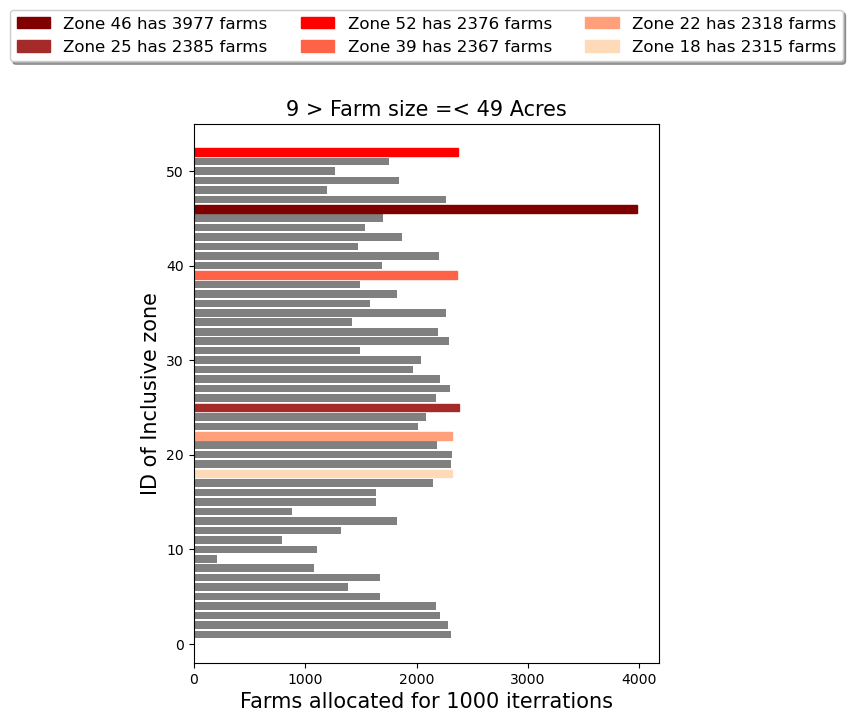

In [538]:
plt.rcParams["figure.figsize"] = (6, 7)
bar= plt.figure()
bar=plt.barh(divis100['new_fid'],divis100['count_49'], color = 'grey')
# bar=plt.barh(divis100['new_fid'],divis100['count_9'], color = 'grey')


bar[divis100['count_49'].sort_values().keys()[-1]].set_color('maroon')
bar[divis100['count_49'].sort_values().keys()[-2]].set_color('brown')
bar[divis100['count_49'].sort_values().keys()[-3]].set_color('red')
bar[divis100['count_49'].sort_values().keys()[-4]].set_color('tomato')
bar[divis100['count_49'].sort_values().keys()[-5]].set_color('lightsalmon')
bar[divis100['count_49'].sort_values().keys()[-6]].set_color('peachpuff')

# plt.title('SOMETHING')
plt.xlabel('Farms allocated for 1000 iterrations',fontsize=15)
plt.ylabel('ID of Inclusive zone', fontsize=15)

maroon_p = mpatches.Patch(color='maroon',label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_49'].sort_values().keys()[-1]])+\
                        ' has '+str(divis100['count_49'].loc[divis100['count_49'].sort_values().keys()[-1]])+str(' farms'))
brown_p = mpatches.Patch(color='brown', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_49'].sort_values().keys()[-2]])+\
                        ' has '+str(divis100['count_49'].loc[divis100['count_49'].sort_values().keys()[-2]])+str(' farms'))
lightcor_p = mpatches.Patch(color='red', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_49'].sort_values().keys()[-3]])+\
                        ' has '+str(divis100['count_49'].loc[divis100['count_49'].sort_values().keys()[-3]])+str(' farms'))
tomato_p = mpatches.Patch(color='tomato', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_49'].sort_values().keys()[-4]])+\
                        ' has '+str(divis100['count_49'].loc[divis100['count_49'].sort_values().keys()[-4]])+str(' farms'))
lightsalmon_p = mpatches.Patch(color='lightsalmon', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_49'].sort_values().keys()[-5]])+\
                        ' has '+str(divis100['count_49'].loc[divis100['count_49'].sort_values().keys()[-5]])+str(' farms'))
peachpuff_p = mpatches.Patch(color='peachpuff', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_49'].sort_values().keys()[-6]])+\
                        ' has '+str(divis100['count_49'].loc[divis100['count_49'].sort_values().keys()[-6]])+str(' farms'))

plt.legend(handles=[maroon_p,brown_p,lightcor_p,tomato_p,lightsalmon_p,peachpuff_p], fontsize = 12\
           ,bbox_to_anchor=(0.5, 1.1),loc='lower center',ncol=3, fancybox=True, shadow=True)

# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='lower center')
plt.title('9 > Farm size =< 49 Acres',loc='center', fontsize=15)
plt.rc('ytick', labelsize=15) 
plt.rc('xtick', labelsize=15) 
plt.show()

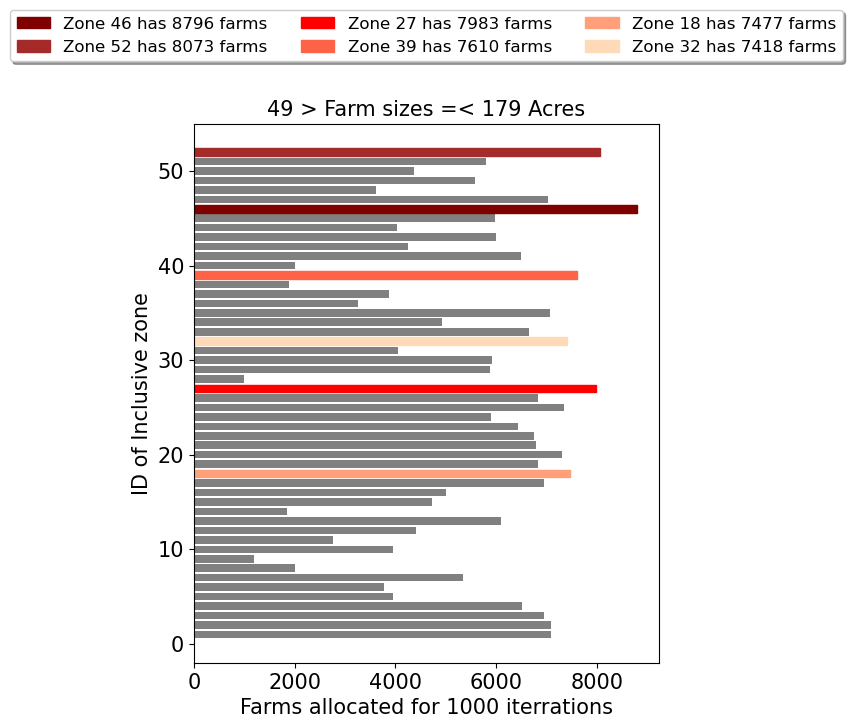

In [539]:
plt.rcParams["figure.figsize"] = (6, 7)
bar= plt.figure()
bar=plt.barh(divis100['new_fid'],divis100['count_179'], color = 'grey')
# bar=plt.barh(divis100['new_fid'],divis100['count_9'], color = 'grey')


bar[divis100['count_179'].sort_values().keys()[-1]].set_color('maroon')
bar[divis100['count_179'].sort_values().keys()[-2]].set_color('brown')
bar[divis100['count_179'].sort_values().keys()[-3]].set_color('red')
bar[divis100['count_179'].sort_values().keys()[-4]].set_color('tomato')
bar[divis100['count_179'].sort_values().keys()[-5]].set_color('lightsalmon')
bar[divis100['count_179'].sort_values().keys()[-6]].set_color('peachpuff')

# plt.title('SOMETHING')
plt.xlabel('Farms allocated for 1000 iterrations',fontsize=15)
plt.ylabel('ID of Inclusive zone', fontsize=15)

maroon_p = mpatches.Patch(color='maroon',label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_179'].sort_values().keys()[-1]])+\
                        ' has '+str(divis100['count_179'].loc[divis100['count_179'].sort_values().keys()[-1]])+str(' farms'))
brown_p = mpatches.Patch(color='brown', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_179'].sort_values().keys()[-2]])+\
                        ' has '+str(divis100['count_179'].loc[divis100['count_179'].sort_values().keys()[-2]])+str(' farms'))
lightcor_p = mpatches.Patch(color='red', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_179'].sort_values().keys()[-3]])+\
                        ' has '+str(divis100['count_179'].loc[divis100['count_179'].sort_values().keys()[-3]])+str(' farms'))
tomato_p = mpatches.Patch(color='tomato', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_179'].sort_values().keys()[-4]])+\
                        ' has '+str(divis100['count_179'].loc[divis100['count_179'].sort_values().keys()[-4]])+str(' farms'))
lightsalmon_p = mpatches.Patch(color='lightsalmon', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_179'].sort_values().keys()[-5]])+\
                        ' has '+str(divis100['count_179'].loc[divis100['count_179'].sort_values().keys()[-5]])+str(' farms'))
peachpuff_p = mpatches.Patch(color='peachpuff', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_179'].sort_values().keys()[-6]])+\
                        ' has '+str(divis100['count_179'].loc[divis100['count_179'].sort_values().keys()[-6]])+str(' farms'))

plt.legend(handles=[maroon_p,brown_p,lightcor_p,tomato_p,lightsalmon_p,peachpuff_p], fontsize = 12\
           ,bbox_to_anchor=(0.5, 1.1),loc='lower center',ncol=3, fancybox=True, shadow=True)

# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='lower center')
plt.title('49 > Farm sizes =< 179 Acres',loc='center',fontsize = 15)
plt.rc('ytick', labelsize=15) 
plt.rc('xtick', labelsize=15) 
plt.show()

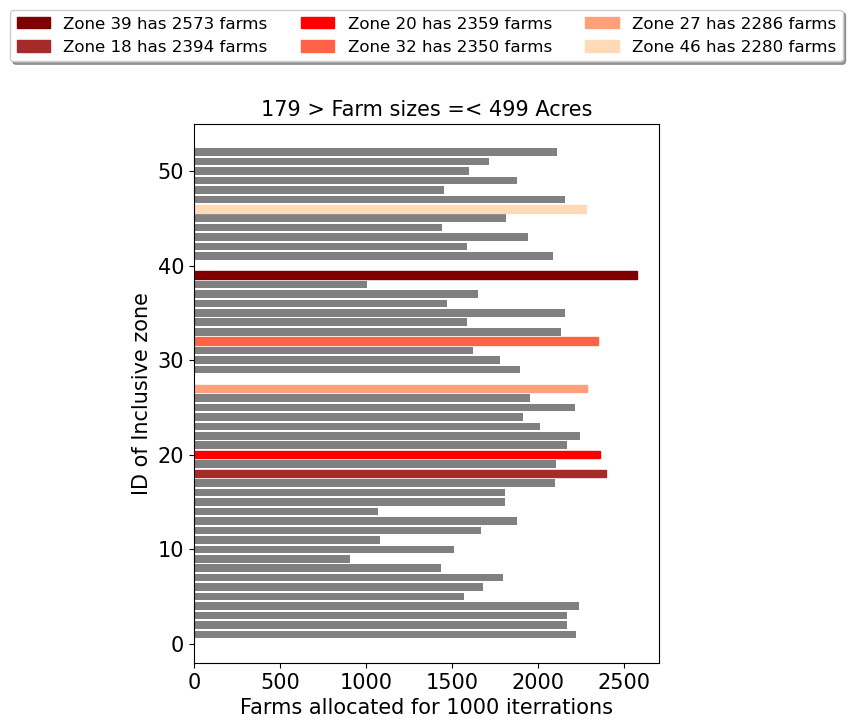

In [540]:
plt.rcParams["figure.figsize"] = (6, 7)
bar= plt.figure()
bar=plt.barh(divis100['new_fid'],divis100['count_499'], color = 'grey')
# bar=plt.barh(divis100['new_fid'],divis100['count_9'], color = 'grey')


bar[divis100['count_499'].sort_values().keys()[-1]].set_color('maroon')
bar[divis100['count_499'].sort_values().keys()[-2]].set_color('brown')
bar[divis100['count_499'].sort_values().keys()[-3]].set_color('red')
bar[divis100['count_499'].sort_values().keys()[-4]].set_color('tomato')
bar[divis100['count_499'].sort_values().keys()[-5]].set_color('lightsalmon')
bar[divis100['count_499'].sort_values().keys()[-6]].set_color('peachpuff')

# plt.title('SOMETHING')
plt.xlabel('Farms allocated for 1000 iterrations',fontsize=15)
plt.ylabel('ID of Inclusive zone', fontsize=15)

maroon_p = mpatches.Patch(color='maroon',label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_499'].sort_values().keys()[-1]])+\
                        ' has '+str(divis100['count_499'].loc[divis100['count_499'].sort_values().keys()[-1]])+str(' farms'))
brown_p = mpatches.Patch(color='brown', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_499'].sort_values().keys()[-2]])+\
                        ' has '+str(divis100['count_499'].loc[divis100['count_499'].sort_values().keys()[-2]])+str(' farms'))
lightcor_p = mpatches.Patch(color='red', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_499'].sort_values().keys()[-3]])+\
                        ' has '+str(divis100['count_499'].loc[divis100['count_499'].sort_values().keys()[-3]])+str(' farms'))
tomato_p = mpatches.Patch(color='tomato', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_499'].sort_values().keys()[-4]])+\
                        ' has '+str(divis100['count_499'].loc[divis100['count_499'].sort_values().keys()[-4]])+str(' farms'))
lightsalmon_p = mpatches.Patch(color='lightsalmon', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_499'].sort_values().keys()[-5]])+\
                        ' has '+str(divis100['count_499'].loc[divis100['count_499'].sort_values().keys()[-5]])+str(' farms'))
peachpuff_p = mpatches.Patch(color='peachpuff', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_499'].sort_values().keys()[-6]])+\
                        ' has '+str(divis100['count_499'].loc[divis100['count_499'].sort_values().keys()[-6]])+str(' farms'))

plt.legend(handles=[maroon_p,brown_p,lightcor_p,tomato_p,lightsalmon_p,peachpuff_p], fontsize = 12\
           ,bbox_to_anchor=(0.5, 1.1),loc='lower center',ncol=3, fancybox=True, shadow=True)

# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='lower center')
plt.title('179 > Farm sizes =< 499 Acres',loc='center',fontsize = 15)
plt.rc('ytick', labelsize=15) 
plt.rc('xtick', labelsize=15) 
plt.show()

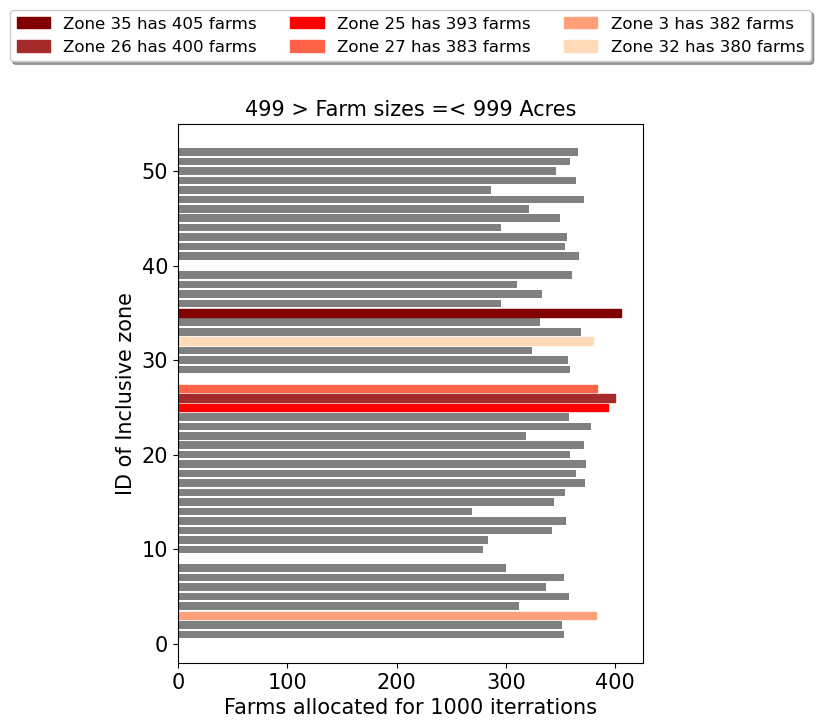

In [541]:
plt.rcParams["figure.figsize"] = (6, 7)
bar= plt.figure()
bar=plt.barh(divis100['new_fid'],divis100['count_999'], color = 'grey')
# bar=plt.barh(divis100['new_fid'],divis100['count_9'], color = 'grey')


bar[divis100['count_999'].sort_values().keys()[-1]].set_color('maroon')
bar[divis100['count_999'].sort_values().keys()[-2]].set_color('brown')
bar[divis100['count_999'].sort_values().keys()[-3]].set_color('red')
bar[divis100['count_999'].sort_values().keys()[-4]].set_color('tomato')
bar[divis100['count_999'].sort_values().keys()[-5]].set_color('lightsalmon')
bar[divis100['count_999'].sort_values().keys()[-6]].set_color('peachpuff')

# plt.title('SOMETHING')
plt.xlabel('Farms allocated for 1000 iterrations',fontsize=15)
plt.ylabel('ID of Inclusive zone', fontsize=15)

maroon_p = mpatches.Patch(color='maroon',label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_999'].sort_values().keys()[-1]])+\
                        ' has '+str(divis100['count_999'].loc[divis100['count_999'].sort_values().keys()[-1]])+str(' farms'))
brown_p = mpatches.Patch(color='brown', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_999'].sort_values().keys()[-2]])+\
                        ' has '+str(divis100['count_999'].loc[divis100['count_999'].sort_values().keys()[-2]])+str(' farms'))
lightcor_p = mpatches.Patch(color='red', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_999'].sort_values().keys()[-3]])+\
                        ' has '+str(divis100['count_999'].loc[divis100['count_999'].sort_values().keys()[-3]])+str(' farms'))
tomato_p = mpatches.Patch(color='tomato', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_999'].sort_values().keys()[-4]])+\
                        ' has '+str(divis100['count_999'].loc[divis100['count_999'].sort_values().keys()[-4]])+str(' farms'))
lightsalmon_p = mpatches.Patch(color='lightsalmon', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_999'].sort_values().keys()[-5]])+\
                        ' has '+str(divis100['count_999'].loc[divis100['count_999'].sort_values().keys()[-5]])+str(' farms'))
peachpuff_p = mpatches.Patch(color='peachpuff', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_999'].sort_values().keys()[-6]])+\
                        ' has '+str(divis100['count_999'].loc[divis100['count_999'].sort_values().keys()[-6]])+str(' farms'))

plt.legend(handles=[maroon_p,brown_p,lightcor_p,tomato_p,lightsalmon_p,peachpuff_p], fontsize = 12\
           ,bbox_to_anchor=(0.5, 1.1),loc='lower center',ncol=3, fancybox=True, shadow=True)

# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='lower center')
plt.title('499 > Farm sizes =< 999 Acres',loc='center', fontsize = 15)
plt.rc('ytick', labelsize=15) 
plt.rc('xtick', labelsize=15) 
plt.show()

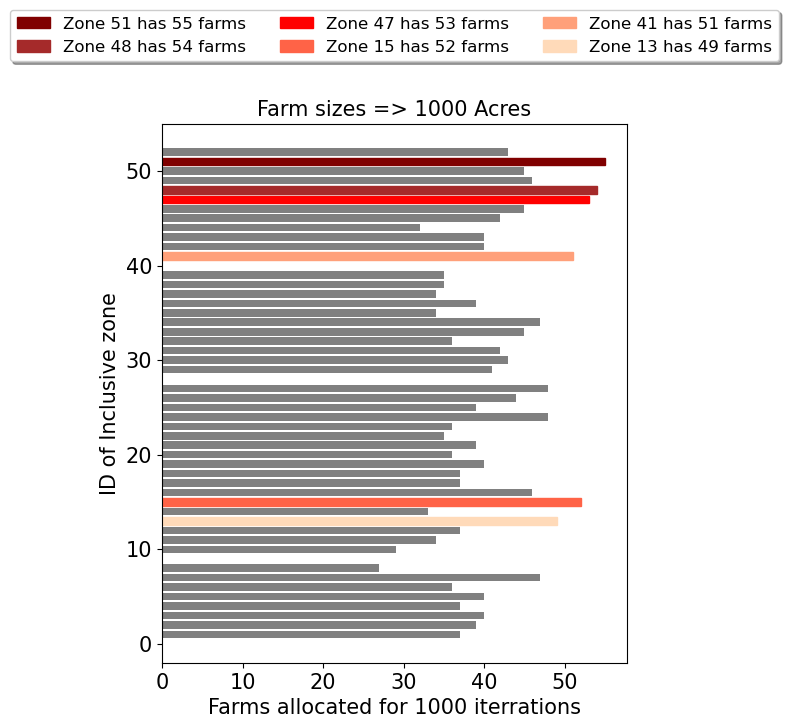

In [542]:
plt.rcParams["figure.figsize"] = (6, 7)
bar= plt.figure()
bar=plt.barh(divis100['new_fid'],divis100['count_1000'], color = 'grey')
# bar=plt.barh(divis100['new_fid'],divis100['count_9'], color = 'grey')


bar[divis100['count_1000'].sort_values().keys()[-1]].set_color('maroon')
bar[divis100['count_1000'].sort_values().keys()[-2]].set_color('brown')
bar[divis100['count_1000'].sort_values().keys()[-3]].set_color('red')
bar[divis100['count_1000'].sort_values().keys()[-4]].set_color('tomato')
bar[divis100['count_1000'].sort_values().keys()[-5]].set_color('lightsalmon')
bar[divis100['count_1000'].sort_values().keys()[-6]].set_color('peachpuff')

# plt.title('SOMETHING')
plt.xlabel('Farms allocated for 1000 iterrations',fontsize=15)
plt.ylabel('ID of Inclusive zone', fontsize=15)

maroon_p = mpatches.Patch(color='maroon',label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_1000'].sort_values().keys()[-1]])+\
                        ' has '+str(divis100['count_1000'].loc[divis100['count_1000'].sort_values().keys()[-1]])+str(' farms'))
brown_p = mpatches.Patch(color='brown', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_1000'].sort_values().keys()[-2]])+\
                        ' has '+str(divis100['count_1000'].loc[divis100['count_1000'].sort_values().keys()[-2]])+str(' farms'))
lightcor_p = mpatches.Patch(color='red', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_1000'].sort_values().keys()[-3]])+\
                        ' has '+str(divis100['count_1000'].loc[divis100['count_1000'].sort_values().keys()[-3]])+str(' farms'))
tomato_p = mpatches.Patch(color='tomato', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_1000'].sort_values().keys()[-4]])+\
                        ' has '+str(divis100['count_1000'].loc[divis100['count_1000'].sort_values().keys()[-4]])+str(' farms'))
lightsalmon_p = mpatches.Patch(color='lightsalmon', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_1000'].sort_values().keys()[-5]])+\
                        ' has '+str(divis100['count_1000'].loc[divis100['count_1000'].sort_values().keys()[-5]])+str(' farms'))
peachpuff_p = mpatches.Patch(color='peachpuff', label='Zone '+\
                          str(divis100['new_fid'].loc[divis100['count_1000'].sort_values().keys()[-6]])+\
                        ' has '+str(divis100['count_1000'].loc[divis100['count_1000'].sort_values().keys()[-6]])+str(' farms'))

plt.legend(handles=[maroon_p,brown_p,lightcor_p,tomato_p,lightsalmon_p,peachpuff_p], fontsize = 12\
           ,bbox_to_anchor=(0.5, 1.1),loc='lower center',ncol=3, fancybox=True, shadow=True)

# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='lower center')
plt.title('Farm sizes => 1000 Acres',loc='center', fontsize = 15)
plt.rc('ytick', labelsize=15) 
plt.rc('xtick', labelsize=15) 
plt.show()

In [856]:
divis100

neighb     Shape_Leng    Shape_Area  \
0        1  193576.263600  2.692458e+07   
1        2   76732.604800  2.362700e+07   
2        3  149735.368728  2.113230e+07   
3        4   55450.304400  1.857283e+07   
4        5   17338.442800  8.674718e+06   
5        6   37875.592400  8.497506e+06   
6        7   52378.817800  1.107864e+07   
7        8   61084.389200  6.206962e+06   
8        9   15702.740800  2.892866e+06   
9       10   83417.528770  7.724716e+06   
10      11    2580.774600  1.008275e+05   
11      12   12413.162000  1.857671e+06   
12      14   29951.523800  4.997775e+06   
13      15   73433.764481  1.023281e+07   
14      16   55086.815600  1.063627e+07   
15      17   77768.549600  1.968746e+07   
16      18  102776.617200  3.150261e+07   
17      19  212041.522600  2.038880e+07   
18      20  260967.188600  3.139023e+07   
19      21  234596.037200  2.076717e+07   
20      22  181871.902000  1.872254e+07   
21      23  109810.140800  1.536691e+07   
22      24   46617.511200  1.354607e+07   
23      25  201627.554600  4.666787e+07   
24      26  120096.886200  1.751005e+07   
25      27  136781.048400  5.438955e+07   
26      28   23147.725578  1.394565e+06   
27      29   45458.988235  1.302457e+07   
28      30  175401.794200  1.283243e+07   
29      31  170930.876000  8.613610e+06   
30      32  208043.137000  3.112375e+07   
31      33   76496.336600  1.853228e+07   
32      34   82818.686287  9.616681e+06   
33      36   69299.632252  7.346266e+06   
34      37  112881.622800  8.788262e+06   
35      38   33979.568149  5.289405e+06   
36      40   21434.405427  1.991821e+06   
37      41  103612.643600  1.661268e+07   
38      42   68161.108584  8.900152e+06   
39      43  142637.663267  1.291393e+07   
40      44   31696.272200  7.907735e+06   
41      45   75948.025305  1.188002e+07   
42      46   78277.435400  2.288975e+07   
43      47   88402.703472  2.373174e+07   
44      48   74876.935682  7.539843e+06   
45      49  108247.138400  1.214092e+07   
46      50   73786.336214  8.994711e+06   
47      51  224145.719000  1.175991e+07   
48      52  194822.846913  6.845730e+07   
49      53   50325.101800  5.837674e+06   
50      54   31496.354600  9.195206e+06   
51      55   42164.768000  1.316480e+07   
52      56   76041.975000  2.480514e+07   
53      57  158527.066342  5.182654e+07   

                                             geometry         acres  new_fid  \
0   MULTIPOLYGON (((460150.702 4447016.716, 460150...   6653.064344        1   
1   MULTIPOLYGON (((484686.234 4445408.276, 484686...   5838.232298        2   
2   MULTIPOLYGON (((487784.981 4443845.271, 487784...   5221.790504        3   
3   MULTIPOLYGON (((488775.489 4451224.105, 488775...   4589.345380        4   
4   POLYGON ((472127.676 4454595.469, 472127.676 4...   2143.522814        5   
5   MULTIPOLYGON (((458996.623 4453432.303, 458996...   2099.733737        6   
6   MULTIPOLYGON (((463122.227 4449733.799, 463285...   2737.532182        7   
7   MULTIPOLYGON (((458923.925 4444953.914, 458923...   1533.740383        8   
8   MULTIPOLYGON (((455552.561 4441473.503, 455498...    714.827295        9   
9   MULTIPOLYGON (((465766.612 4418455.539, 465766...   1908.777384       10   
10  POLYGON ((469992.176 4421726.943, 469992.176 4...     24.914481       11   
11  MULTIPOLYGON (((469128.889 4453368.693, 469128...    459.030428       12   
12  MULTIPOLYGON (((486349.198 4419409.698, 486349...   1234.950229       14   
13  MULTIPOLYGON (((483886.557 4436402.827, 483886...   2528.528289       15   
14  MULTIPOLYGON (((480542.455 4434539.943, 480542...   2628.222787       16   
15  MULTIPOLYGON (((477498.232 4434258.239, 477498...   4864.771848       17   
16  MULTIPOLYGON (((480060.832 4419773.188, 480060...   7784.296043       18   
17  MULTIPOLYGON (((454871.019 4424007.839, 454871...   5038.071358       19   
18  MULTIPOLYGON (((469301.547 4429478.354, 469283...   7756.524907       20   
19  MULTIPOLYGON (((458551.348 4424616

In [876]:
divis100['count_1000'].sort_values().keys()[-5]

38

In [874]:
divis100['new_fid'].loc[divis100['count_1000'].sort_values().keys()[-5]]

42

In [38]:
foo = np.where(points_output.boot==12)

In [37]:
points_output.loc[foo[0]]

boot  new_fid  farm_siz           APN                        geometry
635      1       32    1000.0  120301000003  POINT (466954.751 4437708.130)
636      1       46    1000.0  120334000011  POINT (471379.917 4455083.256)
637      1       44    1000.0  158122000092  POINT (490869.700 4432095.690)
638      1       33     999.0  120508003001  POINT (474493.266 4441616.471)
639      1       45     999.0  157900000022  POINT (482871.790 4427834.000)
...    ...      ...       ...           ...                             ...
1265     1       55       9.0  158122000095  POINT (488209.200 4434181.481)
1266     1        3       9.0  131530000010  POINT (486145.042 4445269.775)
1267     1       54       9.0  146113100012  POINT (487089.826 4430829.116)
1268     1       43       9.0  146335207027  POINT (461191.381 4422118.295)
1269     1       50       9.0  146335207027  POINT (491145.793 4422480.187)

[635 rows x 5 columns]

In [42]:
oneboot = points_output.loc[foo[0]]

In [49]:
points_output.loc[foo[0]].farm_siz==1000.0

7620     True
7621     True
7622     True
7623    False
7624    False
        ...  
8250    False
8251    False
8252    False
8253    False
8254    False
Name: farm_siz, Length: 635, dtype: bool

In [53]:
oneboot.farm_siz.keys()

Int64Index([7620, 7621, 7622, 7623, 7624, 7625, 7626, 7627, 7628, 7629,
            ...
            8245, 8246, 8247, 8248, 8249, 8250, 8251, 8252, 8253, 8254],
           dtype='int64', length=635)